In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt 
from pathlib import Path
import numpy as np
import librosa
import pickle
from tqdm import tqdm
import time

# Dataset

https://www.kaggle.com/chrisfilo/urbansound8k

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music. The classes are drawn from the urban sound taxonomy. For a detailed description of the dataset and how it was compiled please refer to our paper.
All excerpts are taken from field recordings uploaded to www.freesound.org. The files are pre-sorted into ten folds (folders named fold1-fold10) to help in the reproduction of and comparison with the automatic classification results reported in the article above.

In addition to the sound excerpts, a CSV file containing metadata about each excerpt is also provided.

AUDIO FILES INCLUDED
8732 audio files of urban sounds (see description above) in WAV format. The sampling rate, bit depth, and number of channels are the same as those of the original file uploaded to Freesound (and hence may vary from file to file).

META-DATA FILES INCLUDED
UrbanSound8k.csv
This file contains meta-data information about every audio file in the dataset. This includes:

slicefilename:
The name of the audio file. The name takes the following format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav, where:
[fsID] = the Freesound ID of the recording from which this excerpt (slice) is taken
[classID] = a numeric identifier of the sound class (see description of classID below for further details)
[occurrenceID] = a numeric identifier to distinguish different occurrences of the sound within the original recording
[sliceID] = a numeric identifier to distinguish different slices taken from the same occurrence

fsID:
The Freesound ID of the recording from which this excerpt (slice) is taken

start
The start time of the slice in the original Freesound recording

end:
The end time of slice in the original Freesound recording

salience:
A (subjective) salience rating of the sound. 1 = foreground, 2 = background.

fold:
The fold number (1-10) to which this file has been allocated.

classID:
A numeric identifier of the sound class:
0 = airconditioner 1 = carhorn
2 = childrenplaying 3 = dogbark
4 = drilling
5 = engineidling 6 = gunshot
7 = jackhammer
8 = siren
9 = street_music

class:
The class name: airconditioner, carhorn, childrenplaying, dogbark, drilling, engineidling, gunshot, jackhammer,
siren, street_music.

In [2]:
# Read data
dataset_dir = Path(r"../../../UrbanSound8K")
dataset_df = pd.read_csv(dataset_dir.joinpath("UrbanSound8K.csv"))
print(dataset_df.head(5))
print(dataset_df.info())

      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 no

In [6]:
# Statistics
print(f"Total size = {dataset_df.shape}")
unique_classes = dataset_df["class"].unique()
for cl in unique_classes:
    print(f"class {cl}: {dataset_df[dataset_df['class']==cl].shape[0]} ({round(dataset_df[dataset_df['class']==cl].shape[0]/dataset_df.shape[0], 3)})")

Total size = (8732, 8)
class dog_bark: 1000 (0.115)
class children_playing: 1000 (0.115)
class car_horn: 429 (0.049)
class air_conditioner: 1000 (0.115)
class street_music: 1000 (0.115)
class gun_shot: 374 (0.043)
class siren: 929 (0.106)
class engine_idling: 1000 (0.115)
class jackhammer: 1000 (0.115)
class drilling: 1000 (0.115)


# Extract features (MFCC)

In [3]:
save_mfcc_dir = dataset_dir.joinpath("mfcc2")
save_mfcc_dir.mkdir(exist_ok=True)

In [50]:

# Generate and save as pkl

# Iterate for all items
max_length = -1
for index, row in tqdm(dataset_df.iterrows()):
    wav_file_path = dataset_dir.joinpath(f"fold{row['fold']}", row['slice_file_name'])
    signal, sr = librosa.load(wav_file_path)
    length = len(signal)
    if length > max_length:
        max_length = length
for index, row in tqdm(dataset_df.iterrows()):
    wav_file_path = dataset_dir.joinpath(f"fold{row['fold']}", row['slice_file_name'])
    pkl_dir_path = save_mfcc_dir.joinpath(f"fold{row['fold']}")
    pkl_dir_path.mkdir(exist_ok=True, parents=True)
    signal, sr = librosa.load(wav_file_path)
    signal = np.append(signal, np.array([0 for i in range(max_length - len(signal))]), 0)
    mfcc = librosa.feature.mfcc(y=signal, sr=sr)
    with open(pkl_dir_path.joinpath(f"{wav_file_path.stem}.pkl"), 'wb') as f:
        pickle.dump(mfcc, f)
        


8732it [24:24,  5.96it/s]
0it [00:00, ?it/s]

(20, 174)
(20, 174)


3it [00:00,  6.94it/s]

(20, 174)
(20, 174)


6it [00:00,  5.77it/s]

(20, 174)
(20, 174)


7it [00:01,  5.68it/s]

(20, 174)
(20, 174)


8it [00:01,  5.51it/s]

(20, 174)


11it [00:01,  7.82it/s]

(20, 174)
(20, 174)
(20, 174)


13it [00:01,  9.66it/s]

(20, 174)
(20, 174)


15it [00:02,  8.53it/s]

(20, 174)
(20, 174)


18it [00:02,  6.66it/s]

(20, 174)
(20, 174)


19it [00:02,  6.22it/s]

(20, 174)
(20, 174)


21it [00:03,  5.98it/s]

(20, 174)
(20, 174)

22it [00:03,  5.75it/s]


(20, 174)


25it [00:03,  5.54it/s]

(20, 174)
(20, 174)


26it [00:04,  5.62it/s]

(20, 174)
(20, 174)


28it [00:04,  5.46it/s]

(20, 174)
(20, 174)


30it [00:04,  5.43it/s]

(20, 174)
(20, 174)


33it [00:05,  5.60it/s]

(20, 174)
(20, 174)


34it [00:05,  5.47it/s]

(20, 174)
(20, 174)

35it [00:05,  5.49it/s]


(20, 174)

37it [00:06,  5.46it/s]


(20, 174)


38it [00:06,  5.44it/s]

(20, 174)
(20, 174)

40it [00:06,  5.47it/s]


(20, 174)


41it [00:06,  5.45it/s]

(20, 174)
(20, 174)


44it [00:07,  5.49it/s]

(20, 174)
(20, 174)


45it [00:07,  5.46it/s]

(20, 174)
(20, 174)


48it [00:08,  5.56it/s]

(20, 174)
(20, 174)


49it [00:08,  5.51it/s]

(20, 174)
(20, 174)


52it [00:08,  5.46it/s]

(20, 174)
(20, 174)


53it [00:09,  5.40it/s]

(20, 174)


55it [00:09,  5.41it/s]

(20, 174)
(20, 174)


56it [00:09,  5.41it/s]

(20, 174)
(20, 174)


58it [00:09,  5.42it/s]

(20, 174)
(20, 174)


60it [00:10,  5.31it/s]

(20, 174)
(20, 174)

61it [00:10,  5.22it/s]


(20, 174)


64it [00:11,  5.39it/s]

(20, 174)
(20, 174)


65it [00:11,  5.16it/s]

(20, 174)
(20, 174)


67it [00:11,  5.40it/s]

(20, 174)


68it [00:11,  5.14it/s]

(20, 174)
(20, 174)


70it [00:12,  5.19it/s]

(20, 174)
(20, 174)


73it [00:12,  5.32it/s]

(20, 174)
(20, 174)


74it [00:12,  5.35it/s]

(20, 174)
(20, 174)


76it [00:13,  5.25it/s]

(20, 174)
(20, 174)

78it [00:13,  5.33it/s]


(20, 174)


79it [00:13,  5.22it/s]

(20, 174)
(20, 174)


81it [00:14,  5.25it/s]

(20, 174)


82it [00:14,  5.22it/s]

(20, 174)
(20, 174)


84it [00:14,  5.30it/s]

(20, 174)
(20, 174)


86it [00:15,  5.35it/s]

(20, 174)
(20, 174)


88it [00:15,  5.25it/s]

(20, 174)
(20, 174)


90it [00:16,  5.17it/s]

(20, 174)
(20, 174)


93it [00:16,  5.21it/s]

(20, 174)
(20, 174)


94it [00:16,  5.27it/s]

(20, 174)
(20, 174)

95it [00:16,  5.31it/s]


(20, 174)


98it [00:17,  5.49it/s]

(20, 174)
(20, 174)


99it [00:17,  5.45it/s]

(20, 174)
(20, 174)


104it [00:18,  9.44it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


105it [00:18,  8.02it/s]

(20, 174)
(20, 174)


107it [00:18,  8.42it/s]

(20, 174)
(20, 174)


109it [00:19,  7.00it/s]

(20, 174)
(20, 174)


111it [00:19,  6.14it/s]

(20, 174)
(20, 174)


113it [00:19,  5.79it/s]

(20, 174)
(20, 174)


116it [00:20,  5.60it/s]

(20, 174)
(20, 174)


117it [00:20,  5.69it/s]

(20, 174)


118it [00:20,  5.46it/s]

(20, 174)
(20, 174)


120it [00:21,  5.49it/s]

(20, 174)
(20, 174)


122it [00:21,  5.33it/s]

(20, 174)
(20, 174)


124it [00:21,  5.36it/s]

(20, 174)
(20, 174)

125it [00:21,  5.38it/s]


(20, 174)


127it [00:22,  5.27it/s]

(20, 174)
(20, 174)


130it [00:22,  5.53it/s]

(20, 174)
(20, 174)


131it [00:23,  5.54it/s]

(20, 174)


133it [00:23,  5.37it/s]

(20, 174)
(20, 174)


134it [00:23,  5.46it/s]

(20, 174)
(20, 174)


136it [00:23,  5.49it/s]

(20, 174)
(20, 174)


138it [00:24,  5.42it/s]

(20, 174)
(20, 174)


140it [00:24,  5.50it/s]

(20, 174)
(20, 174)


142it [00:25,  5.47it/s]

(20, 174)
(20, 174)


144it [00:25,  5.52it/s]

(20, 174)
(20, 174)


146it [00:25,  5.48it/s]

(20, 174)
(20, 174)

148it [00:26,  5.55it/s]


(20, 174)


149it [00:26,  5.39it/s]

(20, 174)
(20, 174)


151it [00:26,  5.43it/s]

(20, 174)
(20, 174)


154it [00:27,  5.51it/s]

(20, 174)
(20, 174)


155it [00:27,  5.45it/s]

(20, 174)
(20, 174)


157it [00:27,  5.60it/s]

(20, 174)
(20, 174)


160it [00:28,  5.36it/s]

(20, 174)
(20, 174)


162it [00:28,  5.32it/s]

(20, 174)
(20, 174)


163it [00:28,  5.21it/s]

(20, 174)
(20, 174)


166it [00:29,  5.37it/s]

(20, 174)
(20, 174)


168it [00:29,  5.58it/s]

(20, 174)
(20, 174)


169it [00:30,  5.53it/s]

(20, 174)
(20, 174)


172it [00:30,  5.40it/s]

(20, 174)
(20, 174)


173it [00:30,  5.39it/s]

(20, 174)


174it [00:31,  5.27it/s]

(20, 174)
(20, 174)


176it [00:31,  5.23it/s]

(20, 174)
(20, 174)


178it [00:31,  5.23it/s]

(20, 174)
(20, 174)


180it [00:32,  5.32it/s]

(20, 174)
(20, 174)

181it [00:32,  5.27it/s]


(20, 174)


184it [00:32,  5.92it/s]

(20, 174)
(20, 174)


186it [00:33,  5.61it/s]

(20, 174)
(20, 174)


187it [00:33,  5.41it/s]

(20, 174)
(20, 174)


189it [00:33,  5.42it/s]

(20, 174)
(20, 174)


192it [00:34,  5.36it/s]

(20, 174)
(20, 174)


194it [00:34,  5.81it/s]

(20, 174)
(20, 174)


196it [00:34,  8.10it/s]

(20, 174)
(20, 174)


198it [00:35,  6.65it/s]

(20, 174)
(20, 174)


199it [00:35,  6.25it/s]

(20, 174)
(20, 174)


201it [00:35,  5.79it/s]

(20, 174)
(20, 174)


204it [00:36,  6.34it/s]

(20, 174)
(20, 174)


205it [00:36,  6.07it/s]

(20, 174)
(20, 174)


208it [00:36,  5.75it/s]

(20, 174)
(20, 174)


209it [00:37,  5.65it/s]

(20, 174)


211it [00:37,  5.57it/s]

(20, 174)
(20, 174)


213it [00:37,  5.49it/s]

(20, 174)
(20, 174)


215it [00:38,  5.94it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


218it [00:38,  6.22it/s]

(20, 174)
(20, 174)


221it [00:39,  5.66it/s]

(20, 174)
(20, 174)


222it [00:39,  5.57it/s]

(20, 174)
(20, 174)


224it [00:39,  5.35it/s]

(20, 174)
(20, 174)


226it [00:40,  5.28it/s]

(20, 174)


227it [00:40,  5.19it/s]

(20, 174)
(20, 174)


229it [00:40,  5.18it/s]

(20, 174)
(20, 174)


231it [00:41,  4.84it/s]

(20, 174)
(20, 174)

232it [00:41,  4.88it/s]


(20, 174)

233it [00:41,  4.90it/s]


(20, 174)


235it [00:41,  5.05it/s]

(20, 174)
(20, 174)


237it [00:42,  5.11it/s]

(20, 174)
(20, 174)


240it [00:42,  5.27it/s]

(20, 174)
(20, 174)


241it [00:43,  5.19it/s]

(20, 174)
(20, 174)

242it [00:43,  5.25it/s]


(20, 174)


245it [00:43,  5.22it/s]

(20, 174)
(20, 174)


246it [00:44,  5.28it/s]

(20, 174)


247it [00:44,  5.19it/s]

(20, 174)
(20, 174)


249it [00:44,  5.18it/s]

(20, 174)
(20, 174)


251it [00:44,  5.23it/s]

(20, 174)
(20, 174)


254it [00:45,  5.26it/s]

(20, 174)
(20, 174)


255it [00:45,  5.31it/s]

(20, 174)


256it [00:45,  5.08it/s]

(20, 174)
(20, 174)

258it [00:46,  5.27it/s]


(20, 174)


259it [00:46,  5.26it/s]

(20, 174)
(20, 174)


262it [00:47,  5.44it/s]

(20, 174)
(20, 174)


263it [00:47,  5.30it/s]

(20, 174)
(20, 174)


265it [00:47,  5.35it/s]

(20, 174)
(20, 174)


267it [00:47,  5.49it/s]

(20, 174)
(20, 174)


269it [00:48,  5.46it/s]

(20, 174)
(20, 174)


272it [00:48,  5.39it/s]

(20, 174)
(20, 174)


273it [00:49,  5.52it/s]

(20, 174)
(20, 174)


276it [00:49,  5.53it/s]

(20, 174)
(20, 174)


277it [00:49,  5.49it/s]

(20, 174)
(20, 174)


279it [00:50,  4.22it/s]

(20, 174)


280it [00:50,  3.63it/s]

(20, 174)


281it [00:51,  3.30it/s]

(20, 174)


282it [00:51,  3.09it/s]

(20, 174)


283it [00:51,  2.98it/s]

(20, 174)


284it [00:52,  2.95it/s]

(20, 174)


285it [00:52,  2.87it/s]

(20, 174)


286it [00:52,  2.83it/s]

(20, 174)


287it [00:53,  2.80it/s]

(20, 174)


288it [00:53,  2.80it/s]

(20, 174)


289it [00:53,  2.76it/s]

(20, 174)


290it [00:54,  2.76it/s]

(20, 174)


291it [00:54,  2.76it/s]

(20, 174)


292it [00:55,  2.76it/s]

(20, 174)


293it [00:55,  2.72it/s]

(20, 174)


294it [00:55,  2.77it/s]

(20, 174)


295it [00:56,  2.72it/s]

(20, 174)


296it [00:56,  2.73it/s]

(20, 174)
(20, 174)

297it [00:56,  3.16it/s]


(20, 174)


299it [00:57,  3.93it/s]

(20, 174)
(20, 174)


301it [00:57,  4.54it/s]

(20, 174)
(20, 174)


303it [00:57,  4.97it/s]

(20, 174)
(20, 174)


305it [00:58,  5.06it/s]

(20, 174)
(20, 174)


307it [00:58,  5.06it/s]

(20, 174)
(20, 174)


309it [00:59,  5.23it/s]

(20, 174)
(20, 174)

310it [00:59,  5.26it/s]


(20, 174)


313it [00:59,  5.54it/s]

(20, 174)
(20, 174)


315it [01:00,  5.55it/s]

(20, 174)
(20, 174)


317it [01:00,  5.52it/s]

(20, 174)
(20, 174)


318it [01:00,  5.33it/s]

(20, 174)
(20, 174)


320it [01:01,  5.42it/s]

(20, 174)
(20, 174)


322it [01:01,  5.40it/s]

(20, 174)
(20, 174)

324it [01:01,  5.49it/s]


(20, 174)


326it [01:02,  5.49it/s]

(20, 174)
(20, 174)


327it [01:02,  5.33it/s]

(20, 174)
(20, 174)


329it [01:02,  5.37it/s]

(20, 174)
(20, 174)


332it [01:03,  5.60it/s]

(20, 174)
(20, 174)


333it [01:03,  5.54it/s]

(20, 174)
(20, 174)


335it [01:03,  5.53it/s]

(20, 174)
(20, 174)


338it [01:04,  5.47it/s]

(20, 174)
(20, 174)


339it [01:04,  5.41it/s]

(20, 174)
(20, 174)

340it [01:04,  5.41it/s]


(20, 174)


342it [01:05,  5.42it/s]

(20, 174)
(20, 174)


345it [01:05,  5.63it/s]

(20, 174)
(20, 174)


346it [01:05,  5.52it/s]

(20, 174)
(20, 174)


348it [01:06,  5.43it/s]

(20, 174)


350it [01:06,  5.31it/s]

(20, 174)
(20, 174)


351it [01:06,  5.36it/s]

(20, 174)
(20, 174)


354it [01:07,  5.34it/s]

(20, 174)
(20, 174)


355it [01:07,  5.23it/s]

(20, 174)


356it [01:07,  4.81it/s]

(20, 174)
(20, 174)


358it [01:08,  5.08it/s]

(20, 174)
(20, 174)


360it [01:08,  4.92it/s]

(20, 174)
(20, 174)


362it [01:08,  5.13it/s]

(20, 174)
(20, 174)


365it [01:09,  5.42it/s]

(20, 174)
(20, 174)


366it [01:09,  5.41it/s]

(20, 174)
(20, 174)


368it [01:10,  5.19it/s]

(20, 174)


369it [01:10,  4.79it/s]

(20, 174)


370it [01:10,  4.87it/s]

(20, 174)


371it [01:10,  4.90it/s]

(20, 174)


372it [01:10,  4.92it/s]

(20, 174)
(20, 174)


374it [01:11,  4.91it/s]

(20, 174)
(20, 174)

375it [01:11,  4.96it/s]


(20, 174)


377it [01:11,  5.10it/s]

(20, 174)


378it [01:12,  4.96it/s]

(20, 174)
(20, 174)


380it [01:12,  4.93it/s]

(20, 174)


381it [01:12,  5.06it/s]

(20, 174)


382it [01:12,  5.03it/s]

(20, 174)


384it [01:13,  5.19it/s]

(20, 174)
(20, 174)


385it [01:13,  5.18it/s]

(20, 174)


386it [01:13,  5.10it/s]

(20, 174)
(20, 174)

387it [01:13,  5.16it/s]


(20, 174)

388it [01:14,  5.14it/s]


(20, 174)

389it [01:14,  5.23it/s]


(20, 174)


391it [01:14,  5.11it/s]

(20, 174)
(20, 174)


393it [01:15,  5.05it/s]

(20, 174)
(20, 174)


395it [01:15,  5.13it/s]

(20, 174)
(20, 174)


398it [01:16,  5.16it/s]

(20, 174)
(20, 174)


399it [01:16,  5.11it/s]

(20, 174)
(20, 174)

400it [01:16,  5.20it/s]

401it [01:16,  5.12it/s]

(20, 174)
(20, 174)


403it [01:16,  5.30it/s]

(20, 174)
(20, 174)


406it [01:17,  5.17it/s]

(20, 174)
(20, 174)


407it [01:17,  5.23it/s]

(20, 174)
(20, 174)


409it [01:18,  5.35it/s]

(20, 174)
(20, 174)


411it [01:18,  5.40it/s]

(20, 174)
(20, 174)


413it [01:18,  5.46it/s]

(20, 174)
(20, 174)


415it [01:19,  5.22it/s]

(20, 174)
(20, 174)


418it [01:19,  5.39it/s]

(20, 174)
(20, 174)


419it [01:19,  5.40it/s]

(20, 174)
(20, 174)


422it [01:20,  5.34it/s]

(20, 174)
(20, 174)


423it [01:20,  5.37it/s]

(20, 174)
(20, 174)


425it [01:21,  5.32it/s]

(20, 174)
(20, 174)

426it [01:21,  5.39it/s]


(20, 174)


429it [01:21,  5.51it/s]

(20, 174)
(20, 174)


430it [01:21,  5.49it/s]

(20, 174)


431it [01:22,  4.82it/s]

(20, 174)
(20, 174)


433it [01:22,  5.10it/s]

(20, 174)


435it [01:23,  5.21it/s]

(20, 174)
(20, 174)


436it [01:23,  5.31it/s]

(20, 174)
(20, 174)


438it [01:23,  5.37it/s]

(20, 174)
(20, 174)


440it [01:23,  5.30it/s]

(20, 174)
(20, 174)


442it [01:24,  5.34it/s]

(20, 174)
(20, 174)


444it [01:24,  5.30it/s]

(20, 174)
(20, 174)


446it [01:25,  5.30it/s]

(20, 174)
(20, 174)


448it [01:25,  5.35it/s]

(20, 174)
(20, 174)


450it [01:25,  5.37it/s]

(20, 174)
(20, 174)


452it [01:26,  5.27it/s]

(20, 174)
(20, 174)


454it [01:26,  5.34it/s]

(20, 174)
(20, 174)

455it [01:26,  5.26it/s]


(20, 174)


457it [01:27,  5.35it/s]

(20, 174)
(20, 174)

459it [01:27,  5.38it/s]


(20, 174)


460it [01:27,  5.39it/s]

(20, 174)
(20, 174)


462it [01:28,  5.37it/s]

(20, 174)
(20, 174)


464it [01:28,  5.40it/s]

(20, 174)


465it [01:28,  5.25it/s]

(20, 174)
(20, 174)


468it [01:29,  5.45it/s]

(20, 174)
(20, 174)


470it [01:29,  5.52it/s]

(20, 174)
(20, 174)


472it [01:29,  5.57it/s]

(20, 174)
(20, 174)


473it [01:30,  5.52it/s]

(20, 174)
(20, 174)


475it [01:30,  5.40it/s]

(20, 174)
(20, 174)


477it [01:30,  5.46it/s]

(20, 174)
(20, 174)

479it [01:31,  5.49it/s]


(20, 174)


480it [01:31,  5.55it/s]

(20, 174)
(20, 174)

482it [01:31,  5.47it/s]


(20, 174)


483it [01:31,  5.51it/s]

(20, 174)
(20, 174)


486it [01:32,  5.53it/s]

(20, 174)
(20, 174)


488it [01:32,  5.51it/s]

(20, 174)
(20, 174)


489it [01:33,  5.41it/s]

(20, 174)
(20, 174)


491it [01:33,  5.25it/s]

(20, 174)
(20, 174)


494it [01:33,  5.50it/s]

(20, 174)
(20, 174)


495it [01:34,  5.48it/s]

(20, 174)
(20, 174)


500it [01:34, 10.10it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)


503it [01:35,  6.88it/s]

(20, 174)
(20, 174)


505it [01:35,  5.95it/s]

(20, 174)
(20, 174)


507it [01:35,  5.58it/s]

(20, 174)
(20, 174)


510it [01:36,  5.58it/s]

(20, 174)
(20, 174)


512it [01:36,  5.56it/s]

(20, 174)
(20, 174)


513it [01:36,  5.52it/s]

(20, 174)
(20, 174)


515it [01:37,  5.64it/s]

(20, 174)
(20, 174)


517it [01:37,  5.51it/s]

(20, 174)
(20, 174)


519it [01:38,  5.27it/s]

(20, 174)
(20, 174)

520it [01:38,  5.31it/s]


(20, 174)


522it [01:38,  5.34it/s]

(20, 174)
(20, 174)


524it [01:39,  5.35it/s]

(20, 174)
(20, 174)


526it [01:39,  5.40it/s]

(20, 174)
(20, 174)


529it [01:39,  5.57it/s]

(20, 174)
(20, 174)


531it [01:40,  5.52it/s]

(20, 174)
(20, 174)


532it [01:40,  5.49it/s]

(20, 174)
(20, 174)


535it [01:41,  5.51it/s]

(20, 174)
(20, 174)


536it [01:41,  5.49it/s]

(20, 174)
(20, 174)


538it [01:41,  5.46it/s]

(20, 174)
(20, 174)


541it [01:42,  5.52it/s]

(20, 174)
(20, 174)


542it [01:42,  5.48it/s]

(20, 174)
(20, 174)


544it [01:42,  5.51it/s]

(20, 174)
(20, 174)


545it [01:42,  5.48it/s]

(20, 174)
(20, 174)


549it [01:43,  5.95it/s]

(20, 174)
(20, 174)


550it [01:43,  5.79it/s]

(20, 174)
(20, 174)


551it [01:43,  5.68it/s]

(20, 174)


553it [01:44,  6.57it/s]

(20, 174)
(20, 174)

554it [01:44,  6.19it/s]


(20, 174)


556it [01:44,  5.84it/s]

(20, 174)
(20, 174)


559it [01:45,  5.52it/s]

(20, 174)
(20, 174)


561it [01:45,  7.81it/s]

(20, 174)
(20, 174)
(20, 174)


564it [01:45,  7.87it/s]

(20, 174)
(20, 174)


565it [01:45,  7.06it/s]

(20, 174)
(20, 174)


567it [01:46,  6.10it/s]

(20, 174)
(20, 174)


569it [01:46,  5.73it/s]

(20, 174)
(20, 174)


571it [01:47,  5.52it/s]

(20, 174)
(20, 174)


573it [01:47,  5.53it/s]

(20, 174)
(20, 174)


576it [01:47,  5.49it/s]

(20, 174)
(20, 174)


577it [01:48,  5.33it/s]

(20, 174)
(20, 174)


579it [01:48,  5.41it/s]

(20, 174)
(20, 174)


582it [01:49,  5.47it/s]

(20, 174)
(20, 174)


584it [01:49,  5.57it/s]

(20, 174)
(20, 174)


586it [01:49,  5.54it/s]

(20, 174)
(20, 174)


587it [01:49,  5.49it/s]

(20, 174)
(20, 174)

588it [01:50,  5.46it/s]


(20, 174)


590it [01:50,  5.36it/s]

(20, 174)
(20, 174)


592it [01:50,  5.39it/s]

(20, 174)
(20, 174)

593it [01:51,  5.40it/s]


(20, 174)

595it [01:51,  5.47it/s]


(20, 174)


596it [01:51,  5.32it/s]

(20, 174)
(20, 174)


598it [01:52,  5.36it/s]

(20, 174)
(20, 174)

600it [01:52,  5.82it/s]


(20, 174)


601it [01:52,  5.77it/s]

(20, 174)
(20, 174)

602it [01:52,  5.66it/s]


(20, 174)


604it [01:53,  6.23it/s]

(20, 174)
(20, 174)


606it [01:53,  5.85it/s]

(20, 174)
(20, 174)


609it [01:53,  6.43it/s]

(20, 174)
(20, 174)


611it [01:54,  6.01it/s]

(20, 174)
(20, 174)


613it [01:54,  6.62it/s]

(20, 174)
(20, 174)


614it [01:54,  6.15it/s]

(20, 174)
(20, 174)


616it [01:54,  5.85it/s]

(20, 174)
(20, 174)


618it [01:55,  5.68it/s]

(20, 174)
(20, 174)


620it [01:55,  5.55it/s]

(20, 174)
(20, 174)


622it [01:56,  5.54it/s]

(20, 174)


624it [01:56,  5.38it/s]

(20, 174)
(20, 174)


625it [01:56,  5.39it/s]

(20, 174)
(20, 174)

626it [01:56,  5.40it/s]


(20, 174)
(20, 174)


629it [01:57,  6.43it/s]

(20, 174)
(20, 174)


632it [01:57,  5.87it/s]

(20, 174)
(20, 174)


633it [01:57,  5.74it/s]

(20, 174)
(20, 174)


635it [01:58,  5.56it/s]

(20, 174)
(20, 174)


637it [01:58,  5.66it/s]

(20, 174)
(20, 174)


640it [01:59,  5.65it/s]

(20, 174)
(20, 174)


641it [01:59,  5.25it/s]

(20, 174)
(20, 174)


643it [01:59,  5.05it/s]

(20, 174)
(20, 174)


645it [02:00,  5.11it/s]

(20, 174)
(20, 174)

646it [02:00,  5.06it/s]


(20, 174)


648it [02:00,  5.14it/s]

(20, 174)


649it [02:01,  4.74it/s]

(20, 174)
(20, 174)


651it [02:01,  4.84it/s]

(20, 174)
(20, 174)


654it [02:02,  5.15it/s]

(20, 174)
(20, 174)


655it [02:02,  5.15it/s]

(20, 174)
(20, 174)


657it [02:02,  5.08it/s]

(20, 174)


659it [02:02,  5.19it/s]

(20, 174)
(20, 174)


660it [02:03,  5.22it/s]

(20, 174)
(20, 174)


662it [02:03,  5.18it/s]

(20, 174)
(20, 174)


664it [02:03,  5.21it/s]

(20, 174)
(20, 174)


666it [02:04,  5.31it/s]

(20, 174)
(20, 174)


668it [02:04,  5.34it/s]

(20, 174)
(20, 174)


670it [02:05,  5.06it/s]

(20, 174)
(20, 174)


672it [02:05,  5.23it/s]

(20, 174)
(20, 174)


674it [02:05,  5.21it/s]

(20, 174)
(20, 174)

675it [02:06,  5.18it/s]


(20, 174)


677it [02:06,  5.07it/s]

(20, 174)
(20, 174)


679it [02:06,  5.29it/s]

(20, 174)
(20, 174)


680it [02:07,  5.20it/s]

(20, 174)


682it [02:07,  5.01it/s]

(20, 174)


683it [02:07,  4.16it/s]

(20, 174)


684it [02:08,  3.71it/s]

(20, 174)


685it [02:08,  3.42it/s]

(20, 174)


686it [02:08,  3.25it/s]

(20, 174)


687it [02:09,  3.07it/s]

(20, 174)


688it [02:09,  2.97it/s]

(20, 174)


689it [02:09,  2.93it/s]

(20, 174)


690it [02:10,  2.87it/s]

(20, 174)


691it [02:10,  2.82it/s]

(20, 174)


692it [02:11,  2.82it/s]

(20, 174)


693it [02:11,  2.82it/s]

(20, 174)


694it [02:11,  2.85it/s]

(20, 174)


695it [02:12,  2.75it/s]

(20, 174)


696it [02:12,  2.74it/s]

(20, 174)


697it [02:12,  2.73it/s]

(20, 174)


698it [02:13,  2.73it/s]

(20, 174)


699it [02:13,  2.74it/s]

(20, 174)


700it [02:13,  2.76it/s]

(20, 174)


701it [02:14,  2.71it/s]

(20, 174)


702it [02:14,  2.73it/s]

(20, 174)


703it [02:15,  2.72it/s]

(20, 174)


704it [02:15,  2.70it/s]

(20, 174)


705it [02:15,  2.67it/s]

(20, 174)


706it [02:16,  2.61it/s]

(20, 174)


707it [02:16,  2.58it/s]

(20, 174)


708it [02:16,  2.62it/s]

(20, 174)


709it [02:17,  2.57it/s]

(20, 174)


710it [02:17,  2.59it/s]

(20, 174)


711it [02:18,  2.55it/s]

(20, 174)


712it [02:18,  2.58it/s]

(20, 174)


713it [02:18,  2.57it/s]

(20, 174)


714it [02:19,  2.59it/s]

(20, 174)


715it [02:19,  2.61it/s]

(20, 174)


716it [02:20,  2.63it/s]

(20, 174)


717it [02:20,  2.67it/s]

(20, 174)


718it [02:20,  2.65it/s]

(20, 174)


719it [02:21,  2.69it/s]

(20, 174)


720it [02:21,  2.68it/s]

(20, 174)


721it [02:21,  2.67it/s]

(20, 174)


722it [02:22,  2.65it/s]

(20, 174)


723it [02:22,  2.70it/s]

(20, 174)


724it [02:23,  2.65it/s]

(20, 174)


725it [02:23,  2.67it/s]

(20, 174)


726it [02:23,  2.68it/s]

(20, 174)


727it [02:24,  2.69it/s]

(20, 174)


728it [02:24,  2.67it/s]

(20, 174)


729it [02:24,  2.67it/s]

(20, 174)


730it [02:25,  2.67it/s]

(20, 174)


731it [02:25,  3.00it/s]

(20, 174)


732it [02:25,  2.91it/s]

(20, 174)


733it [02:26,  2.82it/s]

(20, 174)


734it [02:26,  2.78it/s]

(20, 174)


735it [02:26,  2.92it/s]

(20, 174)


737it [02:27,  3.58it/s]

(20, 174)
(20, 174)


738it [02:27,  4.29it/s]

(20, 174)


739it [02:27,  3.93it/s]

(20, 174)


740it [02:28,  3.47it/s]

(20, 174)


741it [02:28,  3.16it/s]

(20, 174)


742it [02:29,  2.93it/s]

(20, 174)


743it [02:29,  2.80it/s]

(20, 174)


744it [02:29,  2.72it/s]

(20, 174)


745it [02:30,  2.72it/s]

(20, 174)


746it [02:30,  2.68it/s]

(20, 174)


747it [02:30,  2.66it/s]

(20, 174)


748it [02:31,  2.61it/s]

(20, 174)


749it [02:31,  2.61it/s]

(20, 174)


750it [02:32,  2.64it/s]

(20, 174)


751it [02:32,  2.63it/s]

(20, 174)


752it [02:32,  2.65it/s]

(20, 174)


753it [02:33,  2.68it/s]

(20, 174)


754it [02:33,  2.69it/s]

(20, 174)
(20, 174)


757it [02:34,  3.98it/s]

(20, 174)
(20, 174)


758it [02:34,  4.30it/s]

(20, 174)
(20, 174)

759it [02:34,  4.58it/s]


(20, 174)


762it [02:34,  7.20it/s]

(20, 174)
(20, 174)


764it [02:35,  6.29it/s]

(20, 174)
(20, 174)


765it [02:35,  6.03it/s]

(20, 174)
(20, 174)


767it [02:35,  5.66it/s]

(20, 174)
(20, 174)


769it [02:36,  5.44it/s]

(20, 174)
(20, 174)


771it [02:36,  5.30it/s]

(20, 174)
(20, 174)


773it [02:36,  5.45it/s]

(20, 174)
(20, 174)

774it [02:37,  5.26it/s]


(20, 174)


776it [02:37,  5.45it/s]

(20, 174)
(20, 174)


779it [02:38,  5.47it/s]

(20, 174)
(20, 174)


780it [02:38,  5.32it/s]

(20, 174)


781it [02:38,  5.21it/s]

(20, 174)
(20, 174)

783it [02:38,  5.37it/s]


(20, 174)


784it [02:38,  5.39it/s]

(20, 174)
(20, 174)


786it [02:39,  5.45it/s]

(20, 174)
(20, 174)


788it [02:39,  5.30it/s]

(20, 174)


789it [02:39,  5.18it/s]

(20, 174)
(20, 174)


791it [02:40,  5.13it/s]

(20, 174)
(20, 174)


793it [02:40,  5.15it/s]

(20, 174)


794it [02:40,  5.09it/s]

(20, 174)


795it [02:41,  5.06it/s]

(20, 174)
(20, 174)


797it [02:41,  5.02it/s]

(20, 174)
(20, 174)


799it [02:41,  5.02it/s]

(20, 174)
(20, 174)


801it [02:42,  5.90it/s]

(20, 174)
(20, 174)


804it [02:42,  5.45it/s]

(20, 174)
(20, 174)


805it [02:42,  5.44it/s]

(20, 174)
(20, 174)


808it [02:43,  5.38it/s]

(20, 174)
(20, 174)


809it [02:43,  5.23it/s]

(20, 174)


811it [02:44,  5.04it/s]

(20, 174)
(20, 174)


812it [02:44,  5.07it/s]

(20, 174)
(20, 174)


814it [02:44,  5.27it/s]

(20, 174)
(20, 174)


818it [02:44,  8.91it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


820it [02:45,  9.77it/s]

(20, 174)
(20, 174)
(20, 174)


823it [02:45,  7.07it/s]

(20, 174)


824it [02:45,  6.49it/s]

(20, 174)


825it [02:46,  6.06it/s]

(20, 174)
(20, 174)


827it [02:46,  5.57it/s]

(20, 174)
(20, 174)


829it [02:46,  5.42it/s]

(20, 174)


830it [02:47,  5.09it/s]

(20, 174)
(20, 174)

831it [02:47,  5.15it/s]


(20, 174)

832it [02:47,  5.21it/s]


(20, 174)


834it [02:47,  5.35it/s]

(20, 174)
(20, 174)


836it [02:48,  5.47it/s]

(20, 174)
(20, 174)


838it [02:48,  5.36it/s]

(20, 174)


840it [02:49,  5.05it/s]

(20, 174)
(20, 174)


841it [02:49,  4.76it/s]

(20, 174)
(20, 174)


844it [02:49,  5.16it/s]

(20, 174)
(20, 174)


846it [02:50,  5.37it/s]

(20, 174)
(20, 174)


847it [02:50,  5.21it/s]

(20, 174)
(20, 174)


849it [02:50,  5.25it/s]

(20, 174)
(20, 174)


852it [02:51,  5.36it/s]

(20, 174)
(20, 174)


853it [02:51,  5.39it/s]

(20, 174)
(20, 174)


856it [02:52,  5.43it/s]

(20, 174)
(20, 174)


857it [02:52,  5.57it/s]

(20, 174)
(20, 174)


859it [02:52,  5.42it/s]

(20, 174)
(20, 174)


861it [02:52,  5.53it/s]

(20, 174)
(20, 174)


864it [02:53,  7.63it/s]

(20, 174)
(20, 174)


865it [02:53,  6.68it/s]

(20, 174)
(20, 174)


867it [02:53,  5.69it/s]

(20, 174)
(20, 174)

868it [02:54,  5.51it/s]


(20, 174)


871it [02:54,  6.36it/s]

(20, 174)
(20, 174)


872it [02:54,  5.80it/s]

(20, 174)


873it [02:54,  5.56it/s]

(20, 174)


874it [02:55,  5.39it/s]

(20, 174)


877it [02:55,  7.65it/s]

(20, 174)
(20, 174)
(20, 174)


878it [02:55,  6.77it/s]

(20, 174)
(20, 174)


880it [02:56,  6.09it/s]

(20, 174)
(20, 174)


882it [02:56,  5.61it/s]

(20, 174)


883it [02:56,  5.28it/s]

(20, 174)
(20, 174)


885it [02:57,  5.13it/s]

(20, 174)


886it [02:57,  5.09it/s]

(20, 174)


887it [02:57,  5.04it/s]

(20, 174)
(20, 174)


889it [02:57,  5.15it/s]

(20, 174)
(20, 174)


892it [02:58,  5.10it/s]

(20, 174)
(20, 174)


893it [02:58,  5.07it/s]

(20, 174)
(20, 174)


895it [02:58,  5.24it/s]

(20, 174)
(20, 174)

896it [02:59,  5.20it/s]


(20, 174)


898it [02:59,  5.35it/s]

(20, 174)
(20, 174)


900it [02:59,  5.39it/s]

(20, 174)


901it [03:00,  5.26it/s]

(20, 174)
(20, 174)


903it [03:00,  5.27it/s]

(20, 174)
(20, 174)

904it [03:00,  5.25it/s]


(20, 174)

905it [03:00,  5.17it/s]


(20, 174)


907it [03:01,  5.06it/s]

(20, 174)
(20, 174)


910it [03:01,  5.22it/s]

(20, 174)
(20, 174)


912it [03:01,  7.62it/s]

(20, 174)
(20, 174)
(20, 174)


916it [03:02, 10.68it/s]

(20, 174)
(20, 174)
(20, 174)


921it [03:02, 15.49it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)


925it [03:03,  8.11it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


928it [03:03,  6.67it/s]

(20, 174)
(20, 174)

929it [03:03,  6.43it/s]


(20, 174)

930it [03:04,  6.06it/s]


(20, 174)


933it [03:04,  5.46it/s]

(20, 174)
(20, 174)


935it [03:05,  5.53it/s]

(20, 174)
(20, 174)


937it [03:05,  7.08it/s]

(20, 174)
(20, 174)
(20, 174)


939it [03:05,  8.85it/s]

(20, 174)
(20, 174)

940it [03:05,  7.61it/s]


(20, 174)


943it [03:06,  6.33it/s]

(20, 174)
(20, 174)


944it [03:06,  6.83it/s]

(20, 174)


945it [03:06,  6.19it/s]

(20, 174)
(20, 174)


947it [03:06,  5.62it/s]

(20, 174)
(20, 174)


949it [03:07,  5.48it/s]

(20, 174)
(20, 174)


951it [03:07,  5.33it/s]

(20, 174)
(20, 174)

953it [03:08,  5.40it/s]


(20, 174)


954it [03:08,  5.41it/s]

(20, 174)
(20, 174)


956it [03:08,  5.19it/s]

(20, 174)
(20, 174)


958it [03:08,  5.22it/s]

(20, 174)
(20, 174)


960it [03:09,  5.24it/s]

(20, 174)
(20, 174)


962it [03:09,  5.16it/s]

(20, 174)


963it [03:09,  5.23it/s]

(20, 174)
(20, 174)


966it [03:10,  5.39it/s]

(20, 174)
(20, 174)


967it [03:10,  5.14it/s]

(20, 174)
(20, 174)

968it [03:10,  5.22it/s]

969it [03:11,  5.14it/s]

(20, 174)


970it [03:11,  4.76it/s]

(20, 174)


971it [03:11,  4.73it/s]

(20, 174)
(20, 174)


973it [03:11,  4.97it/s]

(20, 174)
(20, 174)


975it [03:12,  5.06it/s]

(20, 174)
(20, 174)


977it [03:12,  5.02it/s]

(20, 174)
(20, 174)


979it [03:13,  5.07it/s]

(20, 174)
(20, 174)


981it [03:13,  5.07it/s]

(20, 174)
(20, 174)


983it [03:13,  5.15it/s]

(20, 174)


984it [03:14,  5.01it/s]

(20, 174)
(20, 174)


986it [03:14,  5.18it/s]

(20, 174)
(20, 174)


988it [03:14,  5.14it/s]

(20, 174)
(20, 174)


990it [03:15,  5.23it/s]

(20, 174)


991it [03:15,  5.13it/s]

(20, 174)
(20, 174)


992it [03:15,  5.10it/s]

(20, 174)


994it [03:15,  6.07it/s]

(20, 174)


995it [03:16,  5.76it/s]

(20, 174)
(20, 174)


997it [03:16,  6.37it/s]

(20, 174)
(20, 174)

999it [03:16,  5.98it/s]


(20, 174)


1001it [03:17,  5.96it/s]

(20, 174)
(20, 174)


1002it [03:17,  5.52it/s]

(20, 174)
(20, 174)


1004it [03:17,  5.35it/s]

(20, 174)
(20, 174)


1006it [03:18,  5.27it/s]

(20, 174)
(20, 174)

1007it [03:18,  5.21it/s]


(20, 174)


1009it [03:18,  5.18it/s]

(20, 174)
(20, 174)


1011it [03:19,  5.18it/s]

(20, 174)
(20, 174)


1013it [03:19,  5.46it/s]

(20, 174)
(20, 174)


1015it [03:19,  5.48it/s]

(20, 174)


1016it [03:19,  5.32it/s]

(20, 174)
(20, 174)


1019it [03:20,  5.34it/s]

(20, 174)
(20, 174)


1020it [03:20,  5.23it/s]

(20, 174)
(20, 174)


1022it [03:21,  5.22it/s]

(20, 174)


1023it [03:21,  4.75it/s]

(20, 174)
(20, 174)

1024it [03:21,  4.93it/s]

1025it [03:21,  4.83it/s]

(20, 174)
(20, 174)

1026it [03:21,  4.80it/s]


(20, 174)


1028it [03:22,  4.86it/s]

(20, 174)


1029it [03:22,  4.90it/s]

(20, 174)
(20, 174)


1031it [03:22,  5.05it/s]

(20, 174)
(20, 174)


1033it [03:23,  5.04it/s]

(20, 174)
(20, 174)


1035it [03:23,  5.08it/s]

(20, 174)


1036it [03:24,  4.51it/s]

(20, 174)
(20, 174)

1037it [03:24,  4.72it/s]


(20, 174)


1039it [03:24,  5.06it/s]

(20, 174)
(20, 174)


1041it [03:24,  5.14it/s]

(20, 174)
(20, 174)


1044it [03:25,  5.44it/s]

(20, 174)
(20, 174)


1045it [03:25,  5.36it/s]

(20, 174)
(20, 174)


1048it [03:26,  5.45it/s]

(20, 174)
(20, 174)


1049it [03:26,  5.36it/s]

(20, 174)
(20, 174)


1051it [03:26,  5.14it/s]

(20, 174)
(20, 174)


1053it [03:27,  5.19it/s]

(20, 174)
(20, 174)


1055it [03:27,  5.09it/s]

(20, 174)
(20, 174)

1056it [03:27,  5.18it/s]

1057it [03:28,  5.12it/s]

(20, 174)
(20, 174)


1059it [03:28,  5.28it/s]

(20, 174)


1060it [03:28,  4.98it/s]

(20, 174)
(20, 174)

1061it [03:28,  4.95it/s]

1062it [03:29,  4.87it/s]

(20, 174)
(20, 174)


1064it [03:29,  5.01it/s]

(20, 174)


1066it [03:29,  5.06it/s]

(20, 174)
(20, 174)


1067it [03:29,  5.28it/s]

(20, 174)
(20, 174)


1069it [03:30,  5.34it/s]

(20, 174)
(20, 174)


1072it [03:30,  5.40it/s]

(20, 174)
(20, 174)


1073it [03:31,  5.23it/s]

(20, 174)


1075it [03:31,  5.28it/s]

(20, 174)
(20, 174)


1076it [03:31,  5.42it/s]

(20, 174)
(20, 174)

1077it [03:31,  5.31it/s]


(20, 174)


1081it [03:32,  7.12it/s]

(20, 174)
(20, 174)
(20, 174)


1083it [03:32,  8.89it/s]

(20, 174)
(20, 174)
(20, 174)


1085it [03:32,  8.41it/s]

(20, 174)
(20, 174)


1088it [03:33,  6.90it/s]

(20, 174)
(20, 174)
(20, 174)


1090it [03:33,  7.15it/s]

(20, 174)
(20, 174)


1092it [03:34,  6.18it/s]

(20, 174)
(20, 174)

1093it [03:34,  6.01it/s]


(20, 174)


1095it [03:34,  5.84it/s]

(20, 174)
(20, 174)


1097it [03:34,  5.70it/s]

(20, 174)
(20, 174)


1100it [03:35,  5.57it/s]

(20, 174)
(20, 174)


1101it [03:35,  5.38it/s]

(20, 174)
(20, 174)

1102it [03:35,  5.39it/s]


(20, 174)

1103it [03:36,  5.28it/s]

1105it [03:36,  5.39it/s]

(20, 174)
(20, 174)


1107it [03:36,  5.43it/s]

(20, 174)
(20, 174)


1109it [03:37,  5.57it/s]

(20, 174)
(20, 174)


1111it [03:37,  5.55it/s]

(20, 174)
(20, 174)


1112it [03:37,  5.52it/s]

(20, 174)


1113it [03:37,  4.83it/s]

(20, 174)
(20, 174)


1116it [03:38,  5.26it/s]

(20, 174)
(20, 174)


1117it [03:38,  5.32it/s]

(20, 174)
(20, 174)


1119it [03:39,  5.36it/s]

(20, 174)
(20, 174)

1120it [03:39,  5.42it/s]


(20, 174)

1121it [03:39,  5.42it/s]

1122it [03:39,  5.00it/s]

(20, 174)
(20, 174)


1124it [03:40,  5.27it/s]

(20, 174)
(20, 174)

1125it [03:40,  5.30it/s]


(20, 174)


1128it [03:40,  5.13it/s]

(20, 174)
(20, 174)


1130it [03:41,  5.31it/s]

(20, 174)
(20, 174)


1131it [03:41,  4.96it/s]

(20, 174)
(20, 174)


1133it [03:41,  5.17it/s]

(20, 174)
(20, 174)


1135it [03:42,  5.17it/s]

(20, 174)
(20, 174)


1138it [03:42,  5.44it/s]

(20, 174)
(20, 174)


1140it [03:43,  5.41it/s]

(20, 174)
(20, 174)


1141it [03:43,  5.40it/s]

(20, 174)
(20, 174)

1142it [03:43,  5.50it/s]


(20, 174)

1143it [03:43,  5.43it/s]

1145it [03:44,  5.14it/s]

(20, 174)
(20, 174)


1147it [03:44,  7.40it/s]

(20, 174)
(20, 174)
(20, 174)


1149it [03:44,  7.42it/s]

(20, 174)
(20, 174)


1151it [03:44,  6.10it/s]

(20, 174)
(20, 174)


1153it [03:45,  5.61it/s]

(20, 174)
(20, 174)


1155it [03:45,  5.29it/s]

(20, 174)
(20, 174)


1157it [03:46,  4.95it/s]

(20, 174)
(20, 174)


1159it [03:46,  5.11it/s]

(20, 174)
(20, 174)

1160it [03:46,  5.08it/s]


(20, 174)


1162it [03:47,  5.03it/s]

(20, 174)
(20, 174)


1164it [03:47,  4.88it/s]

(20, 174)
(20, 174)


1166it [03:47,  5.12it/s]

(20, 174)
(20, 174)


1169it [03:48,  5.37it/s]

(20, 174)
(20, 174)


1171it [03:48,  6.31it/s]

(20, 174)
(20, 174)
(20, 174)


1173it [03:48,  8.91it/s]

(20, 174)
(20, 174)


1175it [03:48,  9.02it/s]

(20, 174)
(20, 174)

1177it [03:49,  7.02it/s]


(20, 174)


1178it [03:49,  6.54it/s]

(20, 174)
(20, 174)


1180it [03:49,  5.78it/s]

(20, 174)


1181it [03:50,  5.61it/s]

(20, 174)
(20, 174)


1183it [03:50,  5.55it/s]

(20, 174)


1184it [03:50,  5.36it/s]

(20, 174)
(20, 174)


1186it [03:51,  5.18it/s]

(20, 174)
(20, 174)


1188it [03:51,  5.05it/s]

(20, 174)


1189it [03:51,  5.13it/s]

(20, 174)
(20, 174)


1191it [03:52,  5.29it/s]

(20, 174)
(20, 174)


1193it [03:52,  5.29it/s]

(20, 174)


1194it [03:52,  5.20it/s]

(20, 174)
(20, 174)


1196it [03:53,  4.54it/s]

(20, 174)


1197it [03:53,  4.56it/s]

(20, 174)
(20, 174)

1198it [03:53,  4.74it/s]


(20, 174)


1200it [03:54,  3.83it/s]

(20, 174)


1201it [03:54,  3.40it/s]

(20, 174)


1202it [03:54,  3.13it/s]

(20, 174)


1203it [03:55,  2.95it/s]

(20, 174)
(20, 174)


1205it [03:55,  3.71it/s]

(20, 174)
(20, 174)


1207it [03:55,  4.45it/s]

(20, 174)
(20, 174)

1208it [03:56,  4.59it/s]


(20, 174)


1210it [03:56,  5.04it/s]

(20, 174)
(20, 174)

1211it [03:56,  5.05it/s]

1212it [03:56,  4.87it/s]

(20, 174)
(20, 174)


1214it [03:57,  5.03it/s]

(20, 174)
(20, 174)

1215it [03:57,  5.10it/s]


(20, 174)


1217it [03:58,  4.05it/s]

(20, 174)


1218it [03:58,  3.52it/s]

(20, 174)


1219it [03:58,  3.30it/s]

(20, 174)


1220it [03:59,  3.16it/s]

(20, 174)


1221it [03:59,  3.01it/s]

(20, 174)


1222it [03:59,  2.96it/s]

(20, 174)


1223it [04:00,  2.93it/s]

(20, 174)


1224it [04:00,  2.82it/s]

(20, 174)


1225it [04:00,  2.80it/s]

(20, 174)
(20, 174)


1227it [04:01,  3.59it/s]

(20, 174)
(20, 174)


1230it [04:01,  4.64it/s]

(20, 174)
(20, 174)


1231it [04:02,  4.74it/s]

(20, 174)
(20, 174)


1234it [04:02,  5.24it/s]

(20, 174)
(20, 174)


1235it [04:02,  5.31it/s]

(20, 174)


1236it [04:03,  5.15it/s]

(20, 174)


1237it [04:03,  4.93it/s]

(20, 174)


1238it [04:03,  4.71it/s]

(20, 174)
(20, 174)


1240it [04:03,  5.04it/s]

(20, 174)
(20, 174)


1242it [04:04,  5.25it/s]

(20, 174)
(20, 174)


1245it [04:04,  5.26it/s]

(20, 174)
(20, 174)


1246it [04:05,  5.23it/s]

(20, 174)
(20, 174)

1247it [04:05,  5.28it/s]


(20, 174)

1248it [04:05,  5.23it/s]


(20, 174)

1249it [04:05,  5.25it/s]

1250it [04:05,  5.13it/s]

(20, 174)
(20, 174)


1253it [04:06,  5.41it/s]

(20, 174)
(20, 174)


1254it [04:06,  5.28it/s]

(20, 174)
(20, 174)

1255it [04:06,  5.28it/s]


(20, 174)

1256it [04:06,  5.27it/s]


(20, 174)

1257it [04:07,  5.31it/s]


(20, 174)


1259it [04:07,  5.33it/s]

(20, 174)


1260it [04:07,  5.22it/s]

(20, 174)
(20, 174)


1261it [04:07,  5.29it/s]

(20, 174)


1263it [04:08,  6.29it/s]

(20, 174)
(20, 174)


1265it [04:08,  5.73it/s]

(20, 174)


1266it [04:08,  5.50it/s]

(20, 174)
(20, 174)


1269it [04:09,  5.72it/s]

(20, 174)
(20, 174)


1271it [04:09,  5.45it/s]

(20, 174)
(20, 174)


1273it [04:10,  5.60it/s]

(20, 174)
(20, 174)


1274it [04:10,  5.40it/s]

(20, 174)
(20, 174)


1277it [04:10,  5.47it/s]

(20, 174)
(20, 174)


1278it [04:10,  5.36it/s]

(20, 174)


1279it [04:11,  5.25it/s]

(20, 174)


1280it [04:11,  4.85it/s]

(20, 174)


1282it [04:11,  4.90it/s]

(20, 174)
(20, 174)


1283it [04:12,  5.05it/s]

(20, 174)
(20, 174)


1285it [04:12,  5.12it/s]

(20, 174)
(20, 174)


1287it [04:12,  5.27it/s]

(20, 174)


1288it [04:12,  5.31it/s]

(20, 174)


1289it [04:13,  5.08it/s]

(20, 174)
(20, 174)


1291it [04:13,  5.19it/s]

(20, 174)
(20, 174)


1293it [04:13,  5.38it/s]

(20, 174)
(20, 174)

1294it [04:14,  5.25it/s]


(20, 174)


1296it [04:14,  5.27it/s]

(20, 174)


1297it [04:14,  5.28it/s]

(20, 174)


1298it [04:14,  5.19it/s]

(20, 174)
(20, 174)

1300it [04:15,  5.35it/s]


(20, 174)


1301it [04:15,  5.11it/s]

(20, 174)


1302it [04:15,  5.07it/s]

(20, 174)


1303it [04:15,  5.05it/s]

(20, 174)


1304it [04:16,  4.90it/s]

(20, 174)
(20, 174)

1305it [04:16,  5.05it/s]

1306it [04:16,  5.02it/s]

(20, 174)
(20, 174)


1310it [04:16,  8.30it/s]

(20, 174)
(20, 174)
(20, 174)


1313it [04:17,  9.91it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


1316it [04:17,  8.20it/s]

(20, 174)
(20, 174)


1318it [04:17,  6.60it/s]

(20, 174)
(20, 174)


1319it [04:18,  6.28it/s]

(20, 174)


1320it [04:18,  5.86it/s]

(20, 174)
(20, 174)


1322it [04:18,  5.40it/s]

(20, 174)


1323it [04:18,  5.28it/s]

(20, 174)


1324it [04:19,  5.18it/s]

(20, 174)
(20, 174)


1326it [04:19,  5.20it/s]

(20, 174)
(20, 174)

1327it [04:19,  5.14it/s]


(20, 174)


1329it [04:20,  5.12it/s]

(20, 174)
(20, 174)


1331it [04:20,  5.14it/s]

(20, 174)
(20, 174)


1334it [04:21,  5.05it/s]

(20, 174)
(20, 174)


1336it [04:21,  5.18it/s]

(20, 174)
(20, 174)


1337it [04:21,  5.24it/s]

(20, 174)
(20, 174)


1339it [04:22,  5.45it/s]

(20, 174)
(20, 174)


1341it [04:22,  5.46it/s]

(20, 174)
(20, 174)


1343it [04:22,  5.41it/s]

(20, 174)
(20, 174)


1345it [04:23,  5.42it/s]

(20, 174)


1346it [04:23,  4.82it/s]

(20, 174)


1348it [04:23,  4.83it/s]

(20, 174)
(20, 174)


1350it [04:24,  5.12it/s]

(20, 174)
(20, 174)


1351it [04:24,  5.10it/s]

(20, 174)
(20, 174)


1353it [04:24,  5.23it/s]

(20, 174)


1354it [04:25,  4.56it/s]

(20, 174)
(20, 174)


1356it [04:25,  4.92it/s]

(20, 174)
(20, 174)


1358it [04:25,  5.03it/s]

(20, 174)
(20, 174)


1361it [04:26,  5.37it/s]

(20, 174)
(20, 174)


1362it [04:26,  5.24it/s]

(20, 174)
(20, 174)


1364it [04:26,  5.39it/s]

(20, 174)
(20, 174)


1367it [04:27,  5.49it/s]

(20, 174)
(20, 174)


1368it [04:27,  5.43it/s]

(20, 174)
(20, 174)

1369it [04:27,  5.39it/s]

1370it [04:28,  5.12it/s]

(20, 174)
(20, 174)


1372it [04:28,  5.10it/s]

(20, 174)


1373it [04:28,  3.88it/s]

(20, 174)


1374it [04:29,  3.38it/s]

(20, 174)


1375it [04:29,  3.10it/s]

(20, 174)


1376it [04:30,  2.93it/s]

(20, 174)


1377it [04:30,  2.88it/s]

(20, 174)


1378it [04:30,  2.66it/s]

(20, 174)


1379it [04:31,  2.66it/s]

(20, 174)


1380it [04:31,  2.68it/s]

(20, 174)
(20, 174)
(20, 174)


1382it [04:31,  4.05it/s]

(20, 174)
(20, 174)


1385it [04:32,  4.95it/s]

(20, 174)
(20, 174)

1386it [04:32,  5.07it/s]

1387it [04:32,  4.96it/s]

(20, 174)


1388it [04:32,  4.69it/s]

(20, 174)
(20, 174)

1389it [04:33,  4.89it/s]


(20, 174)

1391it [04:33,  5.24it/s]


(20, 174)


1392it [04:33,  5.22it/s]

(20, 174)
(20, 174)


1395it [04:34,  5.38it/s]

(20, 174)
(20, 174)


1396it [04:34,  5.25it/s]

(20, 174)
(20, 174)


1399it [04:34,  5.11it/s]

(20, 174)
(20, 174)


1401it [04:35,  5.32it/s]

(20, 174)
(20, 174)


1403it [04:35,  5.42it/s]

(20, 174)
(20, 174)


1404it [04:35,  5.42it/s]

(20, 174)
(20, 174)


1406it [04:36,  5.39it/s]

(20, 174)


1408it [04:36,  4.92it/s]

(20, 174)
(20, 174)


1410it [04:36,  6.49it/s]

(20, 174)
(20, 174)
(20, 174)


1413it [04:37,  8.31it/s]

(20, 174)
(20, 174)
(20, 174)


1416it [04:37,  8.99it/s]

(20, 174)
(20, 174)
(20, 174)


1419it [04:37,  9.24it/s]

(20, 174)
(20, 174)


1420it [04:37,  9.45it/s]

(20, 174)
(20, 174)
(20, 174)


1424it [04:38,  8.98it/s]

(20, 174)
(20, 174)


1427it [04:38,  9.77it/s]

(20, 174)
(20, 174)
(20, 174)


1429it [04:38, 10.12it/s]

(20, 174)
(20, 174)


1431it [04:39,  8.76it/s]

(20, 174)
(20, 174)


1432it [04:39,  8.61it/s]

(20, 174)
(20, 174)
(20, 174)


1436it [04:39,  8.53it/s]

(20, 174)
(20, 174)


1438it [04:39,  9.43it/s]

(20, 174)
(20, 174)
(20, 174)


1440it [04:40,  9.41it/s]

(20, 174)
(20, 174)


1442it [04:40,  7.43it/s]

(20, 174)
(20, 174)


1444it [04:40,  6.31it/s]

(20, 174)
(20, 174)


1446it [04:41,  5.86it/s]

(20, 174)
(20, 174)


1448it [04:41,  5.44it/s]

(20, 174)
(20, 174)


1451it [04:42,  5.42it/s]

(20, 174)
(20, 174)


1452it [04:42,  6.12it/s]

(20, 174)
(20, 174)
(20, 174)

1455it [04:42,  7.90it/s]


(20, 174)


1457it [04:42,  7.98it/s]

(20, 174)
(20, 174)


1459it [04:43,  8.31it/s]

(20, 174)
(20, 174)


1461it [04:43,  7.71it/s]

(20, 174)
(20, 174)


1463it [04:43,  8.22it/s]

(20, 174)
(20, 174)


1464it [04:43,  8.25it/s]

(20, 174)
(20, 174)


1466it [04:44,  7.10it/s]

(20, 174)
(20, 174)


1468it [04:44,  5.97it/s]

(20, 174)
(20, 174)

1470it [04:44,  5.76it/s]


(20, 174)


1471it [04:44,  6.46it/s]

(20, 174)
(20, 174)
(20, 174)

1473it [04:45,  7.92it/s]


(20, 174)


1476it [04:45,  8.44it/s]

(20, 174)
(20, 174)
(20, 174)


1480it [04:45, 11.58it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)

1482it [04:45, 12.08it/s]


(20, 174)
(20, 174)


1484it [04:46,  8.76it/s]

(20, 174)
(20, 174)
(20, 174)


1488it [04:46,  9.76it/s]

(20, 174)
(20, 174)
(20, 174)


1492it [04:46, 10.88it/s]

(20, 174)
(20, 174)
(20, 174)


1494it [04:47, 11.71it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


1496it [04:47,  8.35it/s]

(20, 174)


1498it [04:47,  7.04it/s]

(20, 174)
(20, 174)

1499it [04:48,  6.68it/s]

1500it [04:48,  5.98it/s]

(20, 174)


1501it [04:48,  5.28it/s]

(20, 174)


1502it [04:48,  5.06it/s]

(20, 174)
(20, 174)

1503it [04:48,  5.09it/s]


(20, 174)

1504it [04:49,  5.04it/s]

1505it [04:49,  4.91it/s]

(20, 174)


1506it [04:49,  4.86it/s]

(20, 174)


1507it [04:49,  4.59it/s]

(20, 174)


1508it [04:50,  4.64it/s]

(20, 174)
(20, 174)

1509it [04:50,  4.74it/s]


(20, 174)


1511it [04:50,  5.01it/s]

(20, 174)
(20, 174)

1512it [04:50,  5.14it/s]

1513it [04:50,  5.05it/s]

(20, 174)
(20, 174)


1515it [04:51,  6.19it/s]

(20, 174)
(20, 174)


1518it [04:51,  6.19it/s]

(20, 174)
(20, 174)


1520it [04:51,  7.09it/s]

(20, 174)
(20, 174)


1522it [04:52,  7.47it/s]

(20, 174)
(20, 174)


1524it [04:52,  8.37it/s]

(20, 174)
(20, 174)


1525it [04:52,  7.21it/s]

(20, 174)
(20, 174)


1527it [04:53,  5.61it/s]

(20, 174)
(20, 174)

1528it [04:53,  5.41it/s]


(20, 174)


1530it [04:53,  5.18it/s]

(20, 174)
(20, 174)


1532it [04:54,  5.20it/s]

(20, 174)


1533it [04:54,  4.50it/s]

(20, 174)
(20, 174)


1535it [04:54,  4.81it/s]

(20, 174)
(20, 174)


1537it [04:55,  3.89it/s]

(20, 174)


1538it [04:55,  3.45it/s]

(20, 174)


1539it [04:56,  3.17it/s]

(20, 174)


1540it [04:56,  3.53it/s]

(20, 174)
(20, 174)

1541it [04:56,  3.88it/s]

1542it [04:56,  3.56it/s]

(20, 174)


1543it [04:57,  3.80it/s]

(20, 174)


1544it [04:57,  3.65it/s]

(20, 174)
(20, 174)


1546it [04:57,  4.25it/s]

(20, 174)
(20, 174)

1547it [04:57,  4.47it/s]

1548it [04:58,  4.59it/s]

(20, 174)
(20, 174)

1549it [04:58,  4.75it/s]


(20, 174)

1550it [04:58,  4.83it/s]


(20, 174)


1552it [04:58,  4.83it/s]

(20, 174)
(20, 174)


1554it [04:59,  5.00it/s]

(20, 174)
(20, 174)

1555it [04:59,  4.97it/s]


(20, 174)


1557it [04:59,  5.04it/s]

(20, 174)
(20, 174)

1558it [05:00,  4.95it/s]

1559it [05:00,  4.53it/s]

(20, 174)


1560it [05:00,  4.57it/s]

(20, 174)
(20, 174)


1562it [05:00,  4.75it/s]

(20, 174)


1563it [05:01,  4.62it/s]

(20, 174)


1564it [05:01,  4.64it/s]

(20, 174)


1565it [05:01,  4.60it/s]

(20, 174)
(20, 174)


1567it [05:02,  4.43it/s]

(20, 174)


1568it [05:02,  4.09it/s]

(20, 174)
(20, 174)


1570it [05:02,  4.47it/s]

(20, 174)
(20, 174)


1572it [05:03,  4.79it/s]

(20, 174)
(20, 174)

1573it [05:03,  4.90it/s]

1574it [05:03,  4.90it/s]

(20, 174)


1575it [05:03,  4.94it/s]

(20, 174)
(20, 174)

1576it [05:04,  4.93it/s]

1577it [05:04,  4.47it/s]

(20, 174)
(20, 174)


1579it [05:04,  4.67it/s]

(20, 174)


1580it [05:04,  4.27it/s]

(20, 174)
(20, 174)


1582it [05:05,  4.46it/s]

(20, 174)
(20, 174)


1584it [05:05,  4.62it/s]

(20, 174)
(20, 174)


1586it [05:06,  4.39it/s]

(20, 174)


1587it [05:06,  4.56it/s]

(20, 174)
(20, 174)


1589it [05:06,  4.83it/s]

(20, 174)
(20, 174)


1591it [05:07,  4.81it/s]

(20, 174)
(20, 174)

1592it [05:07,  4.86it/s]


(20, 174)

1593it [05:07,  4.79it/s]


(20, 174)


1595it [05:08,  4.48it/s]

(20, 174)
(20, 174)

1596it [05:08,  4.57it/s]

1597it [05:08,  4.54it/s]

(20, 174)


1599it [05:08,  4.93it/s]

(20, 174)
(20, 174)


1600it [05:09,  5.44it/s]

(20, 174)
(20, 174)
(20, 174)


1603it [05:09,  6.32it/s]

(20, 174)


1604it [05:09,  5.87it/s]

(20, 174)


1605it [05:09,  5.15it/s]

(20, 174)


1606it [05:10,  5.05it/s]

(20, 174)
(20, 174)


1608it [05:10,  5.08it/s]

(20, 174)
(20, 174)


1610it [05:10,  5.61it/s]

(20, 174)
(20, 174)


1612it [05:11,  5.32it/s]

(20, 174)


1613it [05:11,  4.84it/s]

(20, 174)


1614it [05:11,  4.55it/s]

(20, 174)


1615it [05:12,  4.54it/s]

(20, 174)
(20, 174)


1617it [05:12,  4.65it/s]

(20, 174)


1618it [05:12,  4.76it/s]

(20, 174)
(20, 174)

1619it [05:12,  4.80it/s]


(20, 174)


1621it [05:13,  4.94it/s]

(20, 174)
(20, 174)


1623it [05:13,  4.90it/s]

(20, 174)
(20, 174)


1625it [05:14,  5.03it/s]

(20, 174)
(20, 174)

1627it [05:14,  5.66it/s]


(20, 174)


1629it [05:14,  5.98it/s]

(20, 174)
(20, 174)


1630it [05:14,  5.27it/s]

(20, 174)


1631it [05:15,  4.76it/s]

(20, 174)
(20, 174)


1633it [05:15,  4.75it/s]

(20, 174)


1634it [05:15,  4.80it/s]

(20, 174)


1635it [05:15,  4.80it/s]

(20, 174)
(20, 174)

1636it [05:16,  4.83it/s]

1639it [05:16,  6.48it/s]

(20, 174)
(20, 174)
(20, 174)


1642it [05:16,  8.99it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)


1645it [05:17,  7.59it/s]

(20, 174)


1646it [05:17,  6.70it/s]

(20, 174)
(20, 174)


1648it [05:17,  6.51it/s]

(20, 174)
(20, 174)


1650it [05:18,  5.71it/s]

(20, 174)
(20, 174)


1652it [05:18,  5.41it/s]

(20, 174)


1653it [05:18,  4.98it/s]

(20, 174)


1654it [05:19,  4.90it/s]

(20, 174)
(20, 174)


1656it [05:19,  4.60it/s]

(20, 174)


1657it [05:19,  4.56it/s]

(20, 174)
(20, 174)

1658it [05:19,  4.68it/s]


(20, 174)


1660it [05:20,  4.76it/s]

(20, 174)
(20, 174)


1662it [05:20,  4.90it/s]

(20, 174)


1663it [05:20,  4.71it/s]

(20, 174)
(20, 174)


1665it [05:21,  4.82it/s]

(20, 174)
(20, 174)

1666it [05:21,  4.91it/s]


(20, 174)

1667it [05:21,  4.96it/s]

1668it [05:21,  4.84it/s]

(20, 174)


1669it [05:22,  4.80it/s]

(20, 174)
(20, 174)

1670it [05:22,  4.79it/s]


(20, 174)


1672it [05:22,  4.76it/s]

(20, 174)


1673it [05:23,  4.77it/s]

(20, 174)
(20, 174)


1675it [05:23,  4.91it/s]

(20, 174)


1676it [05:23,  4.44it/s]

(20, 174)
(20, 174)

1677it [05:23,  4.62it/s]

1678it [05:24,  4.67it/s]

(20, 174)


1679it [05:24,  4.60it/s]

(20, 174)


1680it [05:24,  4.57it/s]

(20, 174)


1681it [05:24,  4.63it/s]

(20, 174)


1682it [05:24,  4.62it/s]

(20, 174)


1683it [05:25,  4.64it/s]

(20, 174)


1684it [05:25,  4.65it/s]

(20, 174)


1685it [05:25,  4.54it/s]

(20, 174)
(20, 174)


1687it [05:26,  4.65it/s]

(20, 174)


1688it [05:26,  4.73it/s]

(20, 174)
(20, 174)


1690it [05:26,  4.84it/s]

(20, 174)
(20, 174)


1692it [05:27,  4.88it/s]

(20, 174)
(20, 174)


1694it [05:27,  4.89it/s]

(20, 174)


1695it [05:27,  4.49it/s]

(20, 174)


1696it [05:27,  4.62it/s]

(20, 174)


1697it [05:28,  4.67it/s]

(20, 174)
(20, 174)


1699it [05:28,  4.63it/s]

(20, 174)
(20, 174)


1701it [05:29,  4.79it/s]

(20, 174)
(20, 174)

1702it [05:29,  4.86it/s]

1703it [05:29,  4.38it/s]

(20, 174)


1704it [05:29,  4.50it/s]

(20, 174)
(20, 174)


1706it [05:30,  4.70it/s]

(20, 174)
(20, 174)


1708it [05:30,  4.81it/s]

(20, 174)
(20, 174)

1709it [05:30,  4.85it/s]

1710it [05:30,  4.86it/s]

(20, 174)


1711it [05:31,  4.41it/s]

(20, 174)
(20, 174)


1713it [05:31,  4.78it/s]

(20, 174)
(20, 174)

1714it [05:31,  4.80it/s]

1715it [05:32,  4.63it/s]

(20, 174)


1716it [05:32,  4.65it/s]

(20, 174)
(20, 174)

1717it [05:32,  4.73it/s]


(20, 174)

1718it [05:32,  4.72it/s]

1719it [05:32,  4.66it/s]

(20, 174)


1720it [05:33,  4.29it/s]

(20, 174)
(20, 174)

1721it [05:33,  4.46it/s]


(20, 174)

1722it [05:33,  4.60it/s]

1723it [05:33,  4.43it/s]

(20, 174)
(20, 174)


1725it [05:34,  4.71it/s]

(20, 174)
(20, 174)


1727it [05:34,  4.83it/s]

(20, 174)


1728it [05:34,  4.48it/s]

(20, 174)
(20, 174)


1730it [05:35,  4.74it/s]

(20, 174)
(20, 174)


1732it [05:35,  4.88it/s]

(20, 174)
(20, 174)


1734it [05:36,  4.95it/s]

(20, 174)
(20, 174)


1736it [05:36,  4.88it/s]

(20, 174)
(20, 174)

1737it [05:36,  4.95it/s]


(20, 174)

1738it [05:36,  4.98it/s]


(20, 174)


1740it [05:37,  5.01it/s]

(20, 174)
(20, 174)

1741it [05:37,  5.03it/s]


(20, 174)

1742it [05:37,  5.00it/s]

1743it [05:37,  4.92it/s]

(20, 174)


1744it [05:38,  4.48it/s]

(20, 174)


1745it [05:38,  4.59it/s]

(20, 174)
(20, 174)


1747it [05:38,  4.75it/s]

(20, 174)
(20, 174)


1749it [05:39,  4.83it/s]

(20, 174)


1750it [05:39,  3.89it/s]

(20, 174)


1751it [05:39,  3.43it/s]

(20, 174)


1752it [05:40,  3.17it/s]

(20, 174)


1753it [05:40,  2.81it/s]

(20, 174)


1754it [05:41,  2.81it/s]

(20, 174)


1755it [05:41,  2.81it/s]

(20, 174)


1756it [05:41,  2.82it/s]

(20, 174)


1757it [05:42,  2.83it/s]

(20, 174)


1758it [05:42,  2.71it/s]

(20, 174)


1759it [05:42,  2.75it/s]

(20, 174)


1760it [05:43,  2.78it/s]

(20, 174)


1761it [05:43,  2.79it/s]

(20, 174)


1762it [05:43,  2.81it/s]

(20, 174)


1763it [05:44,  2.82it/s]

(20, 174)


1764it [05:44,  2.83it/s]

(20, 174)


1765it [05:45,  2.82it/s]

(20, 174)


1766it [05:45,  2.70it/s]

(20, 174)


1767it [05:45,  2.74it/s]

(20, 174)


1768it [05:46,  2.73it/s]

(20, 174)


1769it [05:46,  2.76it/s]

(20, 174)


1770it [05:46,  3.10it/s]

(20, 174)
(20, 174)


1772it [05:47,  4.26it/s]

(20, 174)
(20, 174)


1774it [05:47,  4.62it/s]

(20, 174)


1775it [05:47,  4.68it/s]

(20, 174)
(20, 174)


1777it [05:48,  4.93it/s]

(20, 174)


1778it [05:48,  4.77it/s]

(20, 174)
(20, 174)


1780it [05:48,  4.85it/s]

(20, 174)
(20, 174)


1783it [05:48,  7.15it/s]

(20, 174)
(20, 174)
(20, 174)


1786it [05:49,  8.93it/s]

(20, 174)
(20, 174)
(20, 174)


1788it [05:49, 10.71it/s]

(20, 174)
(20, 174)


1790it [05:49,  8.61it/s]

(20, 174)


1791it [05:49,  7.62it/s]

(20, 174)


1792it [05:50,  6.14it/s]

(20, 174)


1793it [05:50,  5.48it/s]

(20, 174)


1794it [05:50,  5.19it/s]

(20, 174)
(20, 174)


1797it [05:51,  5.27it/s]

(20, 174)
(20, 174)


1798it [05:51,  5.33it/s]

(20, 174)
(20, 174)


1800it [05:51,  5.26it/s]

(20, 174)
(20, 174)


1802it [05:52,  4.93it/s]

(20, 174)


1804it [05:52,  5.46it/s]

(20, 174)
(20, 174)


1806it [05:52,  5.92it/s]

(20, 174)
(20, 174)


1808it [05:53,  6.99it/s]

(20, 174)
(20, 174)


1810it [05:53,  6.41it/s]

(20, 174)
(20, 174)


1812it [05:53,  6.15it/s]

(20, 174)
(20, 174)


1814it [05:54,  6.29it/s]

(20, 174)
(20, 174)


1816it [05:54,  6.26it/s]

(20, 174)
(20, 174)


1818it [05:54,  6.77it/s]

(20, 174)
(20, 174)


1820it [05:54,  6.55it/s]

(20, 174)
(20, 174)


1822it [05:55,  6.34it/s]

(20, 174)
(20, 174)


1824it [05:55,  6.54it/s]

(20, 174)
(20, 174)


1825it [05:55,  7.28it/s]

(20, 174)


1826it [05:55,  5.61it/s]

(20, 174)


1827it [05:56,  5.07it/s]

(20, 174)
(20, 174)

1828it [05:56,  5.04it/s]

1829it [05:56,  4.51it/s]

(20, 174)


1830it [05:56,  4.34it/s]

(20, 174)


1831it [05:57,  4.18it/s]

(20, 174)


1832it [05:57,  4.11it/s]

(20, 174)


1833it [05:57,  4.03it/s]

(20, 174)


1834it [05:57,  4.07it/s]

(20, 174)


1835it [05:58,  4.03it/s]

(20, 174)


1836it [05:58,  4.14it/s]

(20, 174)


1837it [05:58,  4.14it/s]

(20, 174)


1838it [05:58,  4.15it/s]

(20, 174)


1840it [05:59,  4.50it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)

1842it [05:59,  5.31it/s]

1843it [05:59,  5.07it/s]

(20, 174)


1844it [06:00,  4.76it/s]

(20, 174)


1845it [06:00,  4.61it/s]

(20, 174)


1846it [06:00,  4.48it/s]

(20, 174)


1847it [06:00,  4.52it/s]

(20, 174)
(20, 174)


1849it [06:01,  4.88it/s]

(20, 174)
(20, 174)

1850it [06:01,  5.00it/s]


(20, 174)


1852it [06:01,  5.16it/s]

(20, 174)
(20, 174)


1855it [06:02,  4.74it/s]

(20, 174)
(20, 174)


1856it [06:02,  4.90it/s]

(20, 174)
(20, 174)


1858it [06:02,  5.08it/s]

(20, 174)
(20, 174)

1859it [06:03,  5.08it/s]


(20, 174)


1861it [06:03,  5.00it/s]

(20, 174)


1862it [06:03,  4.71it/s]

(20, 174)


1863it [06:04,  4.45it/s]

(20, 174)
(20, 174)


1865it [06:04,  4.88it/s]

(20, 174)
(20, 174)


1867it [06:04,  5.12it/s]

(20, 174)


1868it [06:05,  5.00it/s]

(20, 174)
(20, 174)


1870it [06:05,  4.89it/s]

(20, 174)
(20, 174)


1872it [06:05,  4.55it/s]

(20, 174)
(20, 174)


1874it [06:06,  4.67it/s]

(20, 174)


1875it [06:06,  4.51it/s]

(20, 174)


1876it [06:06,  4.58it/s]

(20, 174)
(20, 174)


1878it [06:07,  4.71it/s]

(20, 174)


1879it [06:07,  4.73it/s]

(20, 174)


1880it [06:07,  4.14it/s]

(20, 174)
(20, 174)


1882it [06:08,  4.66it/s]

(20, 174)
(20, 174)


1884it [06:08,  4.98it/s]

(20, 174)
(20, 174)


1886it [06:08,  5.11it/s]

(20, 174)
(20, 174)


1888it [06:09,  4.26it/s]

(20, 174)
(20, 174)


1890it [06:09,  4.74it/s]

(20, 174)
(20, 174)


1892it [06:10,  4.94it/s]

(20, 174)
(20, 174)

1893it [06:10,  5.05it/s]


(20, 174)

1894it [06:10,  5.05it/s]


(20, 174)

1895it [06:10,  5.13it/s]

1896it [06:10,  4.89it/s]

(20, 174)


1897it [06:11,  4.82it/s]

(20, 174)


1898it [06:11,  4.67it/s]

(20, 174)
(20, 174)


1900it [06:11,  4.99it/s]

(20, 174)
(20, 174)

1901it [06:11,  4.96it/s]

1902it [06:12,  4.86it/s]

(20, 174)


1903it [06:12,  4.62it/s]

(20, 174)
(20, 174)

1904it [06:12,  4.81it/s]


(20, 174)

1905it [06:12,  4.80it/s]

1906it [06:13,  4.78it/s]

(20, 174)


1907it [06:13,  4.78it/s]

(20, 174)
(20, 174)

1908it [06:13,  4.84it/s]


(20, 174)

1909it [06:13,  4.87it/s]


(20, 174)

1910it [06:13,  4.89it/s]

1911it [06:14,  4.20it/s]

(20, 174)
(20, 174)

1912it [06:14,  4.42it/s]


(20, 174)


1914it [06:14,  4.61it/s]

(20, 174)
(20, 174)


1916it [06:15,  4.63it/s]

(20, 174)
(20, 174)


1918it [06:15,  4.26it/s]

(20, 174)


1919it [06:15,  4.39it/s]

(20, 174)


1920it [06:16,  4.41it/s]

(20, 174)


1921it [06:16,  4.42it/s]

(20, 174)
(20, 174)

1922it [06:16,  4.56it/s]

1923it [06:16,  4.57it/s]

(20, 174)


1924it [06:17,  4.16it/s]

(20, 174)


1925it [06:17,  4.34it/s]

(20, 174)


1926it [06:17,  4.42it/s]

(20, 174)
(20, 174)

1927it [06:17,  4.56it/s]

1928it [06:17,  4.26it/s]

(20, 174)


1929it [06:18,  4.05it/s]

(20, 174)
(20, 174)


1931it [06:18,  4.47it/s]

(20, 174)
(20, 174)


1933it [06:19,  4.71it/s]

(20, 174)
(20, 174)


1935it [06:19,  4.82it/s]

(20, 174)


1936it [06:19,  4.47it/s]

(20, 174)


1937it [06:19,  4.21it/s]

(20, 174)
(20, 174)


1939it [06:20,  4.55it/s]

(20, 174)
(20, 174)

1940it [06:20,  4.67it/s]


(20, 174)

1941it [06:20,  4.77it/s]

1942it [06:20,  4.84it/s]

(20, 174)


1943it [06:21,  4.35it/s]

(20, 174)


1944it [06:21,  4.24it/s]

(20, 174)


1945it [06:21,  4.45it/s]

(20, 174)
(20, 174)

1946it [06:21,  4.59it/s]


(20, 174)

1947it [06:22,  4.69it/s]

1948it [06:22,  4.28it/s]

(20, 174)
(20, 174)


1950it [06:22,  5.07it/s]

(20, 174)


1951it [06:22,  4.89it/s]

(20, 174)


1952it [06:23,  4.83it/s]

(20, 174)


1953it [06:23,  4.71it/s]

(20, 174)


1954it [06:23,  4.40it/s]

(20, 174)


1958it [06:23,  8.43it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)


1960it [06:24,  8.93it/s]

(20, 174)
(20, 174)
(20, 174)


1964it [06:24,  9.28it/s]

(20, 174)
(20, 174)


1966it [06:24,  8.78it/s]

(20, 174)
(20, 174)


1967it [06:24,  8.09it/s]

(20, 174)
(20, 174)

1969it [06:25,  7.46it/s]


(20, 174)


1972it [06:25,  8.55it/s]

(20, 174)
(20, 174)
(20, 174)


1973it [06:25,  7.16it/s]

(20, 174)


1974it [06:26,  6.42it/s]

(20, 174)
(20, 174)

1975it [06:26,  5.96it/s]


(20, 174)


1979it [06:26,  8.01it/s]

(20, 174)
(20, 174)
(20, 174)


1980it [06:26,  6.88it/s]

(20, 174)


1981it [06:27,  6.20it/s]

(20, 174)
(20, 174)


1983it [06:27,  4.97it/s]

(20, 174)


1984it [06:27,  4.94it/s]

(20, 174)


1985it [06:28,  4.83it/s]

(20, 174)


1986it [06:28,  4.88it/s]

(20, 174)


1987it [06:28,  4.78it/s]

(20, 174)


1988it [06:28,  4.67it/s]

(20, 174)
(20, 174)

1989it [06:28,  4.77it/s]


(20, 174)

1990it [06:29,  4.84it/s]


(20, 174)

1991it [06:29,  4.87it/s]


(20, 174)


1992it [06:29,  4.90it/s]

(20, 174)

1993it [06:29,  4.91it/s]


(20, 174)


1995it [06:30,  4.94it/s]

(20, 174)


1996it [06:30,  4.49it/s]

(20, 174)
(20, 174)

1997it [06:30,  4.62it/s]


(20, 174)

1998it [06:30,  4.72it/s]


(20, 174)


2000it [06:31,  4.37it/s]

(20, 174)


2001it [06:31,  4.53it/s]

(20, 174)
(20, 174)


2003it [06:31,  4.81it/s]

(20, 174)


2004it [06:32,  4.48it/s]

(20, 174)


2005it [06:32,  4.49it/s]

(20, 174)
(20, 174)

2006it [06:32,  4.65it/s]


(20, 174)


2008it [06:32,  5.32it/s]

(20, 174)


2009it [06:33,  5.12it/s]

(20, 174)


2010it [06:33,  4.89it/s]

(20, 174)


2011it [06:33,  4.81it/s]

(20, 174)
(20, 174)


2013it [06:33,  4.28it/s]

(20, 174)


2014it [06:34,  4.34it/s]

(20, 174)


2015it [06:34,  4.37it/s]

(20, 174)


2016it [06:34,  4.49it/s]

(20, 174)


2017it [06:34,  4.53it/s]

(20, 174)


2018it [06:35,  4.63it/s]

(20, 174)


2019it [06:35,  4.63it/s]

(20, 174)


2020it [06:35,  4.39it/s]

(20, 174)
(20, 174)

2021it [06:35,  4.52it/s]

2022it [06:35,  4.51it/s]

(20, 174)
(20, 174)


2024it [06:36,  4.72it/s]

(20, 174)
(20, 174)

2025it [06:36,  4.70it/s]

2026it [06:36,  4.62it/s]

(20, 174)
(20, 174)

2027it [06:36,  4.66it/s]


(20, 174)


2029it [06:37,  4.78it/s]

(20, 174)
(20, 174)


2031it [06:37,  4.91it/s]

(20, 174)
(20, 174)


2033it [06:38,  4.50it/s]

(20, 174)
(20, 174)

2034it [06:38,  4.65it/s]


(20, 174)

2035it [06:38,  4.75it/s]


(20, 174)

2036it [06:38,  4.79it/s]


(20, 174)

2037it [06:39,  4.78it/s]

2038it [06:39,  4.80it/s]

(20, 174)


2039it [06:39,  4.81it/s]

(20, 174)


2042it [06:39,  6.61it/s]

(20, 174)
(20, 174)
(20, 174)


2044it [06:40,  8.43it/s]

(20, 174)
(20, 174)
(20, 174)


2046it [06:40,  9.90it/s]

(20, 174)
(20, 174)
(20, 174)

2048it [06:40,  9.90it/s]

2050it [06:40,  8.60it/s]

(20, 174)
(20, 174)
(20, 174)


2052it [06:40,  9.53it/s]

(20, 174)
(20, 174)


2056it [06:41, 10.35it/s]

(20, 174)
(20, 174)
(20, 174)


2058it [06:41, 10.52it/s]

(20, 174)
(20, 174)


2060it [06:41, 10.06it/s]

(20, 174)
(20, 174)
(20, 174)


2062it [06:41, 10.34it/s]

(20, 174)
(20, 174)
(20, 174)


2064it [06:41, 10.36it/s]

(20, 174)


2066it [06:42,  7.17it/s]

(20, 174)


2067it [06:42,  5.36it/s]

(20, 174)


2068it [06:43,  4.18it/s]

(20, 174)


2069it [06:43,  3.60it/s]

(20, 174)


2070it [06:44,  3.23it/s]

(20, 174)


2071it [06:44,  2.99it/s]

(20, 174)


2072it [06:44,  3.31it/s]

(20, 174)
(20, 174)


2074it [06:45,  3.96it/s]

(20, 174)


2075it [06:45,  4.13it/s]

(20, 174)
(20, 174)


2077it [06:45,  4.51it/s]

(20, 174)


2078it [06:45,  4.45it/s]

(20, 174)


2079it [06:46,  4.53it/s]

(20, 174)


2080it [06:46,  4.35it/s]

(20, 174)
(20, 174)

2081it [06:46,  4.55it/s]

2082it [06:46,  4.59it/s]

(20, 174)
(20, 174)


2084it [06:47,  4.55it/s]

(20, 174)
(20, 174)


2086it [06:47,  4.65it/s]

(20, 174)
(20, 174)


2088it [06:48,  4.83it/s]

(20, 174)


2089it [06:48,  4.84it/s]

(20, 174)
(20, 174)


2091it [06:48,  4.81it/s]

(20, 174)


2092it [06:48,  4.75it/s]

(20, 174)
(20, 174)


2094it [06:49,  4.79it/s]

(20, 174)
(20, 174)

2097it [06:49,  7.28it/s]


(20, 174)
(20, 174)


2098it [06:49,  6.22it/s]

(20, 174)


2099it [06:50,  5.73it/s]

(20, 174)


2100it [06:50,  5.32it/s]

(20, 174)


2101it [06:50,  5.12it/s]

(20, 174)
(20, 174)

2102it [06:50,  5.01it/s]

2103it [06:50,  4.90it/s]

(20, 174)
(20, 174)

2104it [06:51,  4.89it/s]

2105it [06:51,  4.80it/s]

(20, 174)


2106it [06:51,  4.70it/s]

(20, 174)
(20, 174)

2107it [06:51,  4.81it/s]

2108it [06:52,  4.76it/s]

(20, 174)


2110it [06:52,  5.10it/s]

(20, 174)
(20, 174)


2112it [06:52,  6.35it/s]

(20, 174)
(20, 174)


2113it [06:52,  5.86it/s]

(20, 174)
(20, 174)

2114it [06:53,  5.59it/s]

2115it [06:53,  5.23it/s]

(20, 174)


2116it [06:53,  5.08it/s]

(20, 174)


2117it [06:53,  4.95it/s]

(20, 174)
(20, 174)

2118it [06:53,  4.95it/s]

2119it [06:54,  4.48it/s]

(20, 174)
(20, 174)

2123it [06:54,  8.39it/s]


(20, 174)
(20, 174)
(20, 174)
(20, 174)


2125it [06:54,  9.70it/s]

(20, 174)
(20, 174)


2127it [06:55,  7.24it/s]

(20, 174)


2128it [06:55,  6.53it/s]

(20, 174)


2129it [06:55,  6.05it/s]

(20, 174)


2130it [06:55,  5.63it/s]

(20, 174)


2131it [06:55,  4.95it/s]

(20, 174)


2132it [06:56,  4.90it/s]

(20, 174)


2133it [06:56,  4.85it/s]

(20, 174)
(20, 174)


2135it [06:56,  4.83it/s]

(20, 174)
(20, 174)


2137it [06:57,  4.44it/s]

(20, 174)
(20, 174)


2139it [06:57,  4.53it/s]

(20, 174)


2140it [06:57,  4.62it/s]

(20, 174)


2141it [06:58,  3.58it/s]

(20, 174)


2142it [06:58,  3.14it/s]

(20, 174)


2143it [06:59,  2.75it/s]

(20, 174)


2144it [06:59,  2.66it/s]

(20, 174)


2145it [07:00,  2.62it/s]

(20, 174)


2147it [07:00,  3.15it/s]

(20, 174)
(20, 174)


2148it [07:00,  3.48it/s]

(20, 174)
(20, 174)

2149it [07:00,  3.91it/s]


(20, 174)


2151it [07:01,  4.24it/s]

(20, 174)
(20, 174)

2152it [07:01,  4.38it/s]


(20, 174)

2153it [07:01,  4.54it/s]


(20, 174)

2154it [07:02,  4.61it/s]

2155it [07:02,  4.19it/s]

(20, 174)


2156it [07:02,  4.32it/s]

(20, 174)


2157it [07:02,  4.43it/s]

(20, 174)
(20, 174)

2158it [07:02,  4.58it/s]


(20, 174)


2160it [07:03,  4.24it/s]

(20, 174)
(20, 174)


2162it [07:03,  4.57it/s]

(20, 174)
(20, 174)

2163it [07:04,  4.69it/s]


(20, 174)


2164it [07:04,  4.75it/s]

(20, 174)


2166it [07:04,  5.44it/s]

(20, 174)
(20, 174)

2167it [07:04,  5.33it/s]

2168it [07:05,  4.83it/s]

(20, 174)


2169it [07:05,  4.82it/s]

(20, 174)
(20, 174)

2170it [07:05,  4.89it/s]


(20, 174)

2171it [07:05,  4.92it/s]


(20, 174)

2172it [07:05,  4.98it/s]

2173it [07:06,  4.42it/s]

(20, 174)


2174it [07:06,  4.48it/s]

(20, 174)


2175it [07:06,  4.29it/s]

(20, 174)


2176it [07:06,  4.33it/s]

(20, 174)


2177it [07:07,  4.42it/s]

(20, 174)


2178it [07:07,  4.40it/s]

(20, 174)


2179it [07:07,  4.42it/s]

(20, 174)


2180it [07:07,  4.44it/s]

(20, 174)


2181it [07:07,  4.47it/s]

(20, 174)


2182it [07:08,  4.48it/s]

(20, 174)


2183it [07:08,  4.48it/s]

(20, 174)


2184it [07:08,  4.56it/s]

(20, 174)


2185it [07:08,  4.56it/s]

(20, 174)


2186it [07:09,  4.48it/s]

(20, 174)


2187it [07:09,  4.53it/s]

(20, 174)


2188it [07:09,  4.46it/s]

(20, 174)


2189it [07:09,  4.50it/s]

(20, 174)


2190it [07:09,  4.46it/s]

(20, 174)


2191it [07:10,  4.46it/s]

(20, 174)


2192it [07:10,  4.52it/s]

(20, 174)


2193it [07:10,  4.58it/s]

(20, 174)


2194it [07:10,  4.55it/s]

(20, 174)


2195it [07:11,  4.61it/s]

(20, 174)


2196it [07:11,  4.61it/s]

(20, 174)


2197it [07:11,  4.56it/s]

(20, 174)


2198it [07:11,  4.60it/s]

(20, 174)


2199it [07:11,  4.46it/s]

(20, 174)


2200it [07:12,  4.53it/s]

(20, 174)


2201it [07:12,  4.55it/s]

(20, 174)


2202it [07:12,  4.51it/s]

(20, 174)


2203it [07:12,  4.55it/s]

(20, 174)
(20, 174)

2204it [07:12,  4.67it/s]


(20, 174)


2206it [07:13,  4.70it/s]

(20, 174)
(20, 174)

2207it [07:13,  4.79it/s]


(20, 174)

2208it [07:13,  4.82it/s]


(20, 174)
(20, 174)


2213it [07:14,  9.27it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)

2215it [07:14,  7.09it/s]

2216it [07:14,  6.43it/s]

(20, 174)


2217it [07:14,  6.01it/s]

(20, 174)


2218it [07:15,  5.60it/s]

(20, 174)


2219it [07:15,  5.38it/s]

(20, 174)
(20, 174)


2221it [07:15,  5.15it/s]

(20, 174)
(20, 174)


2223it [07:16,  5.03it/s]

(20, 174)
(20, 174)

2224it [07:16,  5.02it/s]


(20, 174)

2225it [07:16,  5.02it/s]

2226it [07:16,  4.90it/s]

(20, 174)


2227it [07:17,  4.92it/s]

(20, 174)
(20, 174)

2228it [07:17,  4.95it/s]

2229it [07:17,  4.77it/s]

(20, 174)
(20, 174)

2230it [07:17,  4.82it/s]

2231it [07:17,  4.74it/s]

(20, 174)
(20, 174)

2232it [07:18,  4.79it/s]

2233it [07:18,  4.78it/s]

(20, 174)


2234it [07:18,  4.75it/s]

(20, 174)
(20, 174)


2236it [07:18,  4.75it/s]

(20, 174)
(20, 174)


2238it [07:19,  4.87it/s]

(20, 174)
(20, 174)


2240it [07:19,  4.79it/s]

(20, 174)
(20, 174)


2242it [07:20,  4.87it/s]

(20, 174)
(20, 174)


2244it [07:20,  4.76it/s]

(20, 174)
(20, 174)

2246it [07:20,  5.35it/s]


(20, 174)


2247it [07:21,  5.11it/s]

(20, 174)
(20, 174)

2248it [07:21,  5.03it/s]

2249it [07:21,  4.86it/s]

(20, 174)


2250it [07:21,  4.86it/s]

(20, 174)


2251it [07:22,  4.80it/s]

(20, 174)
(20, 174)

2252it [07:22,  4.80it/s]

2253it [07:22,  4.77it/s]

(20, 174)


2254it [07:22,  4.76it/s]

(20, 174)


2255it [07:22,  4.70it/s]

(20, 174)


2256it [07:23,  4.71it/s]

(20, 174)


2257it [07:23,  4.66it/s]

(20, 174)


2258it [07:23,  4.71it/s]

(20, 174)
(20, 174)

2259it [07:23,  4.71it/s]

2260it [07:23,  4.69it/s]

(20, 174)
(20, 174)

2261it [07:24,  4.67it/s]


(20, 174)


2263it [07:24,  4.71it/s]

(20, 174)


2264it [07:24,  4.68it/s]

(20, 174)
(20, 174)


2266it [07:25,  4.72it/s]

(20, 174)


2267it [07:25,  4.70it/s]

(20, 174)


2268it [07:25,  4.66it/s]

(20, 174)


2269it [07:25,  4.64it/s]

(20, 174)
(20, 174)


2271it [07:26,  4.67it/s]

(20, 174)


2272it [07:26,  4.70it/s]

(20, 174)


2273it [07:26,  4.66it/s]

(20, 174)


2274it [07:26,  4.68it/s]

(20, 174)


2275it [07:27,  4.62it/s]

(20, 174)
(20, 174)


2277it [07:27,  4.64it/s]

(20, 174)


2278it [07:27,  4.72it/s]

(20, 174)


2279it [07:28,  4.40it/s]

(20, 174)
(20, 174)

2280it [07:28,  4.55it/s]

2281it [07:28,  4.59it/s]

(20, 174)


2282it [07:28,  4.54it/s]

(20, 174)


2283it [07:28,  4.60it/s]

(20, 174)
(20, 174)


2285it [07:29,  4.76it/s]

(20, 174)
(20, 174)


2287it [07:29,  4.85it/s]

(20, 174)
(20, 174)


2289it [07:30,  4.89it/s]

(20, 174)
(20, 174)


2291it [07:30,  4.93it/s]

(20, 174)
(20, 174)

2292it [07:30,  4.94it/s]

2293it [07:30,  4.94it/s]

(20, 174)


2294it [07:31,  4.94it/s]

(20, 174)


2295it [07:31,  4.51it/s]

(20, 174)


2298it [07:31,  6.73it/s]

(20, 174)
(20, 174)
(20, 174)


2299it [07:31,  6.39it/s]

(20, 174)


2300it [07:32,  5.80it/s]

(20, 174)


2301it [07:32,  5.42it/s]

(20, 174)
(20, 174)

2302it [07:32,  5.28it/s]


(20, 174)


2305it [07:32,  7.05it/s]

(20, 174)
(20, 174)
(20, 174)


2309it [07:33,  9.02it/s]

(20, 174)
(20, 174)
(20, 174)


2311it [07:33,  8.99it/s]

(20, 174)
(20, 174)


2313it [07:33,  8.70it/s]

(20, 174)
(20, 174)
(20, 174)


2315it [07:34,  8.15it/s]

(20, 174)


2316it [07:34,  6.97it/s]

(20, 174)


2317it [07:34,  6.22it/s]

(20, 174)
(20, 174)


2319it [07:34,  5.43it/s]

(20, 174)
(20, 174)


2321it [07:35,  4.66it/s]

(20, 174)


2322it [07:35,  4.69it/s]

(20, 174)
(20, 174)


2324it [07:35,  4.75it/s]

(20, 174)
(20, 174)

2325it [07:36,  4.78it/s]

2326it [07:36,  4.73it/s]

(20, 174)


2327it [07:36,  4.73it/s]

(20, 174)


2328it [07:36,  4.73it/s]

(20, 174)


2329it [07:37,  4.36it/s]

(20, 174)
(20, 174)

2330it [07:37,  4.48it/s]


(20, 174)


2332it [07:37,  4.55it/s]

(20, 174)
(20, 174)

2333it [07:37,  4.64it/s]


(20, 174)

2334it [07:38,  4.68it/s]

2335it [07:38,  4.46it/s]

(20, 174)


2336it [07:38,  4.44it/s]

(20, 174)


2337it [07:38,  4.43it/s]

(20, 174)


2338it [07:39,  4.46it/s]

(20, 174)


2339it [07:39,  4.33it/s]

(20, 174)
(20, 174)


2342it [07:39,  5.30it/s]

(20, 174)
(20, 174)
(20, 174)


2344it [07:40,  6.64it/s]

(20, 174)


2345it [07:40,  5.77it/s]

(20, 174)


2346it [07:40,  5.22it/s]

(20, 174)


2347it [07:40,  5.10it/s]

(20, 174)


2348it [07:40,  4.92it/s]

(20, 174)


2349it [07:41,  4.85it/s]

(20, 174)


2350it [07:41,  4.76it/s]

(20, 174)
(20, 174)

2351it [07:41,  4.78it/s]

2352it [07:41,  4.69it/s]

(20, 174)
(20, 174)


2354it [07:42,  4.70it/s]

(20, 174)
(20, 174)


2356it [07:42,  5.28it/s]

(20, 174)


2357it [07:42,  5.06it/s]

(20, 174)


2358it [07:43,  4.96it/s]

(20, 174)


2359it [07:43,  4.85it/s]

(20, 174)


2360it [07:43,  4.82it/s]

(20, 174)
(20, 174)

2361it [07:43,  4.85it/s]

2362it [07:43,  4.75it/s]

(20, 174)
(20, 174)

2363it [07:44,  4.77it/s]


(20, 174)


2365it [07:44,  4.82it/s]

(20, 174)
(20, 174)

2366it [07:44,  4.86it/s]


(20, 174)


2368it [07:45,  4.71it/s]

(20, 174)


2369it [07:45,  4.67it/s]

(20, 174)


2370it [07:45,  4.68it/s]

(20, 174)
(20, 174)


2372it [07:45,  5.26it/s]

(20, 174)


2373it [07:46,  5.13it/s]

(20, 174)


2374it [07:46,  5.03it/s]

(20, 174)


2375it [07:46,  4.93it/s]

(20, 174)


2376it [07:46,  4.59it/s]

(20, 174)
(20, 174)

2377it [07:46,  4.69it/s]


(20, 174)

2378it [07:47,  4.68it/s]


(20, 174)


2380it [07:47,  4.69it/s]

(20, 174)


2381it [07:47,  4.66it/s]

(20, 174)


2382it [07:48,  4.65it/s]

(20, 174)


2383it [07:48,  4.58it/s]

(20, 174)


2384it [07:48,  4.53it/s]

(20, 174)


2385it [07:48,  4.50it/s]

(20, 174)


2386it [07:48,  4.52it/s]

(20, 174)


2387it [07:49,  4.47it/s]

(20, 174)


2388it [07:49,  3.97it/s]

(20, 174)


2389it [07:49,  4.10it/s]

(20, 174)
(20, 174)


2391it [07:50,  4.33it/s]

(20, 174)


2392it [07:50,  4.41it/s]

(20, 174)
(20, 174)

2393it [07:50,  4.53it/s]

2396it [07:51,  5.89it/s]

(20, 174)
(20, 174)
(20, 174)


2398it [07:51,  7.73it/s]

(20, 174)
(20, 174)
(20, 174)


2400it [07:51,  7.37it/s]

(20, 174)
(20, 174)

2401it [07:51,  6.63it/s]

2402it [07:51,  5.46it/s]

(20, 174)
(20, 174)


2404it [07:52,  5.15it/s]

(20, 174)
(20, 174)

2405it [07:52,  5.02it/s]

2406it [07:52,  4.99it/s]

(20, 174)


2407it [07:53,  4.88it/s]

(20, 174)
(20, 174)


2409it [07:53,  4.82it/s]

(20, 174)


2410it [07:53,  4.88it/s]

(20, 174)


2412it [07:54,  5.10it/s]

(20, 174)
(20, 174)


2413it [07:54,  5.46it/s]

(20, 174)
(20, 174)


2416it [07:54,  5.76it/s]

(20, 174)
(20, 174)


2418it [07:55,  5.93it/s]

(20, 174)
(20, 174)


2420it [07:55,  5.73it/s]

(20, 174)
(20, 174)


2422it [07:55,  5.51it/s]

(20, 174)
(20, 174)


2423it [07:55,  5.75it/s]

(20, 174)
(20, 174)


2426it [07:56,  5.76it/s]

(20, 174)
(20, 174)


2429it [07:56,  7.35it/s]

(20, 174)
(20, 174)
(20, 174)


2431it [07:57,  8.29it/s]

(20, 174)
(20, 174)
(20, 174)

2433it [07:57,  9.40it/s]


(20, 174)
(20, 174)


2435it [07:57,  9.58it/s]

(20, 174)


2436it [07:57,  6.02it/s]

(20, 174)


2437it [07:58,  4.59it/s]

(20, 174)


2438it [07:58,  3.80it/s]

(20, 174)


2439it [07:59,  3.34it/s]

(20, 174)


2440it [07:59,  3.58it/s]

(20, 174)


2441it [07:59,  3.79it/s]

(20, 174)
(20, 174)

2442it [07:59,  4.05it/s]

2443it [07:59,  4.24it/s]

(20, 174)


2444it [08:00,  4.33it/s]

(20, 174)


2445it [08:00,  4.43it/s]

(20, 174)


2446it [08:00,  4.49it/s]

(20, 174)


2447it [08:00,  4.55it/s]

(20, 174)


2449it [08:01,  4.79it/s]

(20, 174)
(20, 174)
(20, 174)

2451it [08:01,  6.02it/s]


(20, 174)


2452it [08:01,  5.69it/s]

(20, 174)
(20, 174)

2453it [08:01,  5.53it/s]

2454it [08:02,  4.87it/s]

(20, 174)
(20, 174)

2455it [08:02,  4.87it/s]


(20, 174)

2456it [08:02,  4.92it/s]

2457it [08:02,  4.86it/s]

(20, 174)


2458it [08:02,  4.39it/s]

(20, 174)
(20, 174)

2459it [08:03,  4.52it/s]


(20, 174)


2461it [08:03,  4.67it/s]

(20, 174)
(20, 174)

2462it [08:03,  4.79it/s]

2463it [08:04,  4.35it/s]

(20, 174)


2464it [08:04,  4.41it/s]

(20, 174)
(20, 174)

2465it [08:04,  4.51it/s]


(20, 174)

2466it [08:04,  4.66it/s]

2467it [08:04,  4.68it/s]

(20, 174)


2468it [08:05,  4.69it/s]

(20, 174)
(20, 174)

2469it [08:05,  4.77it/s]


(20, 174)


2471it [08:05,  4.88it/s]

(20, 174)
(20, 174)

2472it [08:05,  4.96it/s]


(20, 174)


2474it [08:06,  4.98it/s]

(20, 174)
(20, 174)


2476it [08:06,  4.46it/s]

(20, 174)
(20, 174)

2477it [08:06,  4.64it/s]


(20, 174)


2479it [08:07,  4.75it/s]

(20, 174)


2480it [08:07,  4.67it/s]

(20, 174)
(20, 174)


2482it [08:08,  4.83it/s]

(20, 174)
(20, 174)

2483it [08:08,  4.91it/s]


(20, 174)

2484it [08:08,  4.90it/s]

2485it [08:08,  4.85it/s]

(20, 174)
(20, 174)

2486it [08:08,  4.92it/s]

2487it [08:09,  4.46it/s]

(20, 174)
(20, 174)


2489it [08:09,  4.71it/s]

(20, 174)
(20, 174)

2490it [08:09,  4.84it/s]


(20, 174)

2491it [08:09,  4.88it/s]


(20, 174)

2492it [08:10,  4.92it/s]


(20, 174)


2494it [08:10,  4.96it/s]

(20, 174)
(20, 174)


2496it [08:10,  4.99it/s]

(20, 174)


2497it [08:11,  5.02it/s]

(20, 174)


2498it [08:11,  4.56it/s]

(20, 174)
(20, 174)

2499it [08:11,  4.72it/s]


(20, 174)

2500it [08:11,  4.79it/s]

2501it [08:11,  4.87it/s]

(20, 174)
(20, 174)

2502it [08:12,  4.91it/s]


(20, 174)


2504it [08:12,  4.96it/s]

(20, 174)


2505it [08:12,  5.00it/s]

(20, 174)
(20, 174)


2507it [08:13,  5.01it/s]

(20, 174)


2508it [08:13,  4.91it/s]

(20, 174)


2509it [08:13,  4.78it/s]

(20, 174)
(20, 174)


2511it [08:13,  4.81it/s]

(20, 174)


2512it [08:14,  4.77it/s]

(20, 174)


2513it [08:14,  4.78it/s]

(20, 174)


2514it [08:14,  4.74it/s]

(20, 174)


2515it [08:14,  4.70it/s]

(20, 174)


2516it [08:15,  4.34it/s]

(20, 174)
(20, 174)


2518it [08:15,  4.59it/s]

(20, 174)
(20, 174)

2519it [08:15,  4.73it/s]

2520it [08:15,  4.79it/s]

(20, 174)


2521it [08:16,  4.35it/s]

(20, 174)
(20, 174)


2523it [08:16,  4.69it/s]

(20, 174)
(20, 174)


2525it [08:16,  4.88it/s]

(20, 174)
(20, 174)

2526it [08:17,  4.95it/s]

2527it [08:17,  4.52it/s]

(20, 174)
(20, 174)

2528it [08:17,  4.68it/s]


(20, 174)


2530it [08:18,  4.92it/s]

(20, 174)


2531it [08:18,  5.01it/s]

(20, 174)
(20, 174)


2533it [08:18,  5.10it/s]

(20, 174)
(20, 174)


2535it [08:19,  5.11it/s]

(20, 174)


2536it [08:19,  4.60it/s]

(20, 174)


2537it [08:19,  4.48it/s]

(20, 174)


2538it [08:19,  4.53it/s]

(20, 174)


2539it [08:19,  4.49it/s]

(20, 174)


2540it [08:20,  4.50it/s]

(20, 174)


2541it [08:20,  4.13it/s]

(20, 174)
(20, 174)


2543it [08:20,  5.08it/s]

(20, 174)
(20, 174)


2545it [08:21,  5.04it/s]

(20, 174)
(20, 174)

2546it [08:21,  5.03it/s]


(20, 174)


2548it [08:21,  4.90it/s]

(20, 174)
(20, 174)


2550it [08:22,  4.97it/s]

(20, 174)


2551it [08:22,  4.84it/s]

(20, 174)
(20, 174)

2552it [08:22,  4.89it/s]

2553it [08:22,  4.83it/s]

(20, 174)
(20, 174)

2554it [08:23,  4.86it/s]

2555it [08:23,  4.80it/s]

(20, 174)


2556it [08:23,  4.79it/s]

(20, 174)


2557it [08:23,  4.79it/s]

(20, 174)
(20, 174)

2558it [08:23,  4.77it/s]


(20, 174)


2561it [08:24,  6.07it/s]

(20, 174)
(20, 174)


2562it [08:24,  5.59it/s]

(20, 174)
(20, 174)

2563it [08:24,  5.42it/s]

2564it [08:24,  5.19it/s]

(20, 174)
(20, 174)


2566it [08:25,  5.00it/s]

(20, 174)
(20, 174)


2568it [08:25,  4.79it/s]

(20, 174)


2569it [08:25,  4.74it/s]

(20, 174)


2570it [08:26,  4.67it/s]

(20, 174)
(20, 174)


2573it [08:26,  5.48it/s]

(20, 174)
(20, 174)


2575it [08:27,  6.00it/s]

(20, 174)
(20, 174)
(20, 174)


2577it [08:27,  6.35it/s]

(20, 174)


2578it [08:27,  5.90it/s]

(20, 174)


2579it [08:27,  5.51it/s]

(20, 174)


2580it [08:27,  5.34it/s]

(20, 174)


2581it [08:28,  5.14it/s]

(20, 174)
(20, 174)

2582it [08:28,  5.05it/s]


(20, 174)


2585it [08:28,  6.04it/s]

(20, 174)
(20, 174)


2587it [08:29,  7.13it/s]

(20, 174)
(20, 174)


2589it [08:29,  7.02it/s]

(20, 174)
(20, 174)


2592it [08:29,  9.30it/s]

(20, 174)
(20, 174)
(20, 174)


2594it [08:29, 11.15it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


2598it [08:30,  9.50it/s]

(20, 174)
(20, 174)


2600it [08:30,  9.38it/s]

(20, 174)
(20, 174)


2602it [08:30,  8.71it/s]

(20, 174)
(20, 174)


2606it [08:30, 11.77it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


2609it [08:31, 13.84it/s]

(20, 174)
(20, 174)
(20, 174)


2611it [08:31, 12.06it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


2613it [08:31,  9.15it/s]

(20, 174)


2615it [08:32,  7.15it/s]

(20, 174)


2616it [08:32,  6.49it/s]

(20, 174)


2617it [08:32,  5.96it/s]

(20, 174)
(20, 174)

2618it [08:32,  5.65it/s]


(20, 174)


2620it [08:33,  5.23it/s]

(20, 174)
(20, 174)


2622it [08:33,  4.95it/s]

(20, 174)
(20, 174)

2623it [08:33,  4.92it/s]

2624it [08:33,  4.80it/s]

(20, 174)


2625it [08:34,  4.62it/s]

(20, 174)
(20, 174)


2627it [08:34,  4.52it/s]

(20, 174)
(20, 174)

2628it [08:34,  4.59it/s]

2629it [08:35,  4.58it/s]

(20, 174)


2630it [08:35,  4.62it/s]

(20, 174)


2631it [08:35,  4.58it/s]

(20, 174)


2632it [08:35,  4.64it/s]

(20, 174)
(20, 174)


2634it [08:36,  4.68it/s]

(20, 174)


2635it [08:36,  4.31it/s]

(20, 174)
(20, 174)

2636it [08:36,  4.44it/s]


(20, 174)

2637it [08:36,  4.54it/s]

2638it [08:37,  4.61it/s]

(20, 174)


2639it [08:37,  4.62it/s]

(20, 174)


2640it [08:37,  4.66it/s]

(20, 174)


2641it [08:37,  4.65it/s]

(20, 174)
(20, 174)


2643it [08:38,  4.55it/s]

(20, 174)


2644it [08:38,  4.54it/s]

(20, 174)


2645it [08:38,  4.63it/s]

(20, 174)


2646it [08:38,  4.56it/s]

(20, 174)
(20, 174)


2648it [08:39,  4.54it/s]

(20, 174)


2649it [08:39,  4.60it/s]

(20, 174)
(20, 174)

2650it [08:39,  4.68it/s]


(20, 174)


2652it [08:40,  4.77it/s]

(20, 174)
(20, 174)


2654it [08:40,  4.72it/s]

(20, 174)
(20, 174)


2656it [08:40,  4.78it/s]

(20, 174)


2657it [08:41,  4.74it/s]

(20, 174)


2658it [08:41,  4.67it/s]

(20, 174)
(20, 174)


2660it [08:41,  4.62it/s]

(20, 174)
(20, 174)


2662it [08:42,  4.74it/s]

(20, 174)


2663it [08:42,  4.77it/s]

(20, 174)
(20, 174)


2665it [08:42,  4.75it/s]

(20, 174)


2666it [08:43,  4.39it/s]

(20, 174)


2667it [08:43,  4.51it/s]

(20, 174)


2668it [08:43,  4.45it/s]

(20, 174)
(20, 174)


2670it [08:43,  4.63it/s]

(20, 174)
(20, 174)

2672it [08:44,  5.48it/s]


(20, 174)


2673it [08:44,  5.27it/s]

(20, 174)


2674it [08:44,  4.71it/s]

(20, 174)
(20, 174)


2676it [08:45,  4.79it/s]

(20, 174)
(20, 174)


2678it [08:45,  4.81it/s]

(20, 174)
(20, 174)


2680it [08:45,  4.83it/s]

(20, 174)
(20, 174)


2682it [08:46,  4.71it/s]

(20, 174)


2683it [08:46,  4.68it/s]

(20, 174)
(20, 174)

2684it [08:46,  4.67it/s]

2685it [08:47,  4.55it/s]

(20, 174)
(20, 174)

2686it [08:47,  4.65it/s]

2687it [08:47,  4.65it/s]

(20, 174)
(20, 174)

2688it [08:47,  4.70it/s]


(20, 174)


2690it [08:48,  4.66it/s]

(20, 174)


2691it [08:48,  4.74it/s]

(20, 174)


2692it [08:48,  4.73it/s]

(20, 174)


2693it [08:48,  4.36it/s]

(20, 174)


2694it [08:49,  4.49it/s]

(20, 174)
(20, 174)


2696it [08:49,  4.63it/s]

(20, 174)


2697it [08:49,  4.71it/s]

(20, 174)


2698it [08:49,  4.32it/s]

(20, 174)
(20, 174)


2700it [08:50,  4.57it/s]

(20, 174)


2701it [08:50,  4.31it/s]

(20, 174)


2702it [08:50,  4.45it/s]

(20, 174)


2703it [08:51,  4.29it/s]

(20, 174)


2704it [08:51,  4.09it/s]

(20, 174)


2705it [08:51,  4.28it/s]

(20, 174)


2706it [08:51,  4.37it/s]

(20, 174)
(20, 174)

2707it [08:51,  4.47it/s]

2708it [08:52,  4.56it/s]

(20, 174)


2709it [08:52,  4.53it/s]

(20, 174)


2710it [08:52,  4.58it/s]

(20, 174)
(20, 174)


2713it [08:53,  5.11it/s]

(20, 174)
(20, 174)


2714it [08:53,  5.05it/s]

(20, 174)


2715it [08:53,  4.96it/s]

(20, 174)


2716it [08:53,  4.93it/s]

(20, 174)
(20, 174)

2717it [08:54,  4.91it/s]


(20, 174)

2718it [08:54,  4.90it/s]

2719it [08:54,  4.36it/s]

(20, 174)


2720it [08:54,  4.15it/s]

(20, 174)


2721it [08:54,  4.33it/s]

(20, 174)
(20, 174)

2722it [08:55,  4.47it/s]

2723it [08:55,  4.15it/s]

(20, 174)
(20, 174)


2725it [08:55,  4.45it/s]

(20, 174)
(20, 174)

2726it [08:56,  4.58it/s]


(20, 174)


2728it [08:56,  4.69it/s]

(20, 174)
(20, 174)


2730it [08:56,  4.80it/s]

(20, 174)


2731it [08:57,  4.39it/s]

(20, 174)


2732it [08:57,  4.39it/s]

(20, 174)


2733it [08:57,  4.50it/s]

(20, 174)


2734it [08:57,  4.46it/s]

(20, 174)


2735it [08:58,  4.56it/s]

(20, 174)


2736it [08:58,  4.55it/s]

(20, 174)


2737it [08:58,  4.56it/s]

(20, 174)


2738it [08:58,  4.57it/s]

(20, 174)


2739it [08:58,  4.57it/s]

(20, 174)


2740it [08:59,  4.63it/s]

(20, 174)


2741it [08:59,  4.63it/s]

(20, 174)


2742it [08:59,  4.66it/s]

(20, 174)
(20, 174)


2744it [08:59,  4.69it/s]

(20, 174)
(20, 174)


2746it [09:00,  4.76it/s]

(20, 174)
(20, 174)

2747it [09:00,  4.80it/s]


(20, 174)

2748it [09:00,  4.80it/s]

2749it [09:01,  4.37it/s]

(20, 174)


2750it [09:01,  4.48it/s]

(20, 174)


2751it [09:01,  4.06it/s]

(20, 174)


2752it [09:01,  4.20it/s]

(20, 174)


2753it [09:02,  4.36it/s]

(20, 174)
(20, 174)


2755it [09:02,  4.25it/s]

(20, 174)


2756it [09:02,  4.46it/s]

(20, 174)


2757it [09:02,  4.19it/s]

(20, 174)


2758it [09:03,  4.35it/s]

(20, 174)


2759it [09:03,  4.08it/s]

(20, 174)


2760it [09:03,  4.28it/s]

(20, 174)
(20, 174)


2762it [09:04,  4.51it/s]

(20, 174)
(20, 174)

2763it [09:04,  4.63it/s]

2764it [09:04,  4.16it/s]

(20, 174)


2765it [09:04,  4.00it/s]

(20, 174)


2767it [09:05,  5.05it/s]

(20, 174)
(20, 174)


2768it [09:05,  4.55it/s]

(20, 174)


2769it [09:05,  4.51it/s]

(20, 174)


2770it [09:05,  4.58it/s]

(20, 174)
(20, 174)


2772it [09:06,  4.24it/s]

(20, 174)


2773it [09:06,  4.40it/s]

(20, 174)


2774it [09:06,  4.15it/s]

(20, 174)
(20, 174)

2775it [09:07,  4.32it/s]

2776it [09:07,  4.42it/s]

(20, 174)


2777it [09:07,  4.17it/s]

(20, 174)
(20, 174)

2780it [09:07,  6.19it/s]


(20, 174)
(20, 174)
(20, 174)
(20, 174)

2782it [09:08,  6.85it/s]

2783it [09:08,  6.06it/s]

(20, 174)


2784it [09:08,  4.99it/s]

(20, 174)
(20, 174)

2785it [09:08,  4.95it/s]

2786it [09:09,  4.85it/s]

(20, 174)


2787it [09:09,  4.77it/s]

(20, 174)


2788it [09:09,  4.64it/s]

(20, 174)


2789it [09:09,  4.62it/s]

(20, 174)


2790it [09:10,  4.57it/s]

(20, 174)


2791it [09:10,  4.58it/s]

(20, 174)


2792it [09:10,  4.50it/s]

(20, 174)


2793it [09:10,  4.43it/s]

(20, 174)


2794it [09:10,  4.49it/s]

(20, 174)


2795it [09:11,  4.45it/s]

(20, 174)


2796it [09:11,  4.57it/s]

(20, 174)


2797it [09:11,  4.59it/s]

(20, 174)
(20, 174)


2799it [09:11,  4.74it/s]

(20, 174)


2800it [09:12,  4.64it/s]

(20, 174)


2801it [09:12,  4.23it/s]

(20, 174)


2802it [09:12,  4.19it/s]

(20, 174)
(20, 174)


2804it [09:13,  4.52it/s]

(20, 174)
(20, 174)


2806it [09:13,  4.65it/s]

(20, 174)
(20, 174)


2808it [09:13,  4.76it/s]

(20, 174)


2809it [09:14,  4.76it/s]

(20, 174)
(20, 174)


2811it [09:14,  4.79it/s]

(20, 174)
(20, 174)

2812it [09:14,  4.86it/s]

2813it [09:15,  4.68it/s]

(20, 174)
(20, 174)


2815it [09:15,  4.73it/s]

(20, 174)
(20, 174)


2817it [09:15,  4.76it/s]

(20, 174)


2818it [09:16,  4.71it/s]

(20, 174)


2819it [09:16,  4.70it/s]

(20, 174)
(20, 174)

2820it [09:16,  4.73it/s]

2821it [09:16,  4.60it/s]

(20, 174)


2822it [09:16,  4.64it/s]

(20, 174)
(20, 174)


2824it [09:17,  4.66it/s]

(20, 174)


2825it [09:17,  4.62it/s]

(20, 174)
(20, 174)

2826it [09:17,  4.68it/s]

2830it [09:18,  8.40it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)


2832it [09:18,  4.53it/s]

(20, 174)


2833it [09:19,  3.87it/s]

(20, 174)


2836it [09:19,  4.69it/s]

(20, 174)
(20, 174)
(20, 174)


2838it [09:20,  5.83it/s]

(20, 174)
(20, 174)


2839it [09:20,  5.40it/s]

(20, 174)


2840it [09:20,  5.11it/s]

(20, 174)
(20, 174)

2841it [09:20,  5.05it/s]

2842it [09:21,  4.80it/s]

(20, 174)


2843it [09:21,  4.71it/s]

(20, 174)


2844it [09:21,  4.74it/s]

(20, 174)
(20, 174)

2845it [09:21,  4.81it/s]


(20, 174)


2848it [09:22,  6.23it/s]

(20, 174)
(20, 174)
(20, 174)


2850it [09:22,  7.29it/s]

(20, 174)


2851it [09:23,  3.50it/s]

(20, 174)


2852it [09:23,  2.50it/s]

(20, 174)


2853it [09:24,  2.01it/s]

(20, 174)


2854it [09:25,  1.74it/s]

(20, 174)


2855it [09:26,  1.61it/s]

(20, 174)


2856it [09:26,  1.52it/s]

(20, 174)


2857it [09:27,  1.47it/s]

(20, 174)


2858it [09:28,  1.44it/s]

(20, 174)


2859it [09:29,  1.41it/s]

(20, 174)


2860it [09:29,  1.40it/s]

(20, 174)


2861it [09:30,  1.39it/s]

(20, 174)


2862it [09:31,  1.39it/s]

(20, 174)


2863it [09:31,  1.38it/s]

(20, 174)


2864it [09:32,  1.39it/s]

(20, 174)


2865it [09:33,  1.38it/s]

(20, 174)


2866it [09:34,  1.33it/s]

(20, 174)


2867it [09:34,  1.33it/s]

(20, 174)
(20, 174)


2869it [09:35,  2.12it/s]

(20, 174)


2870it [09:35,  2.45it/s]

(20, 174)


2871it [09:35,  2.80it/s]

(20, 174)


2872it [09:35,  3.04it/s]

(20, 174)


2873it [09:36,  3.33it/s]

(20, 174)


2874it [09:36,  3.36it/s]

(20, 174)


2875it [09:36,  3.66it/s]

(20, 174)
(20, 174)

2876it [09:36,  3.96it/s]


(20, 174)


2878it [09:37,  4.21it/s]

(20, 174)
(20, 174)

2879it [09:37,  4.40it/s]

2880it [09:37,  4.45it/s]

(20, 174)


2881it [09:37,  4.51it/s]

(20, 174)


2882it [09:38,  4.25it/s]

(20, 174)


2883it [09:38,  4.32it/s]

(20, 174)


2884it [09:38,  4.34it/s]

(20, 174)


2885it [09:38,  4.36it/s]

(20, 174)


2886it [09:39,  3.98it/s]

(20, 174)
(20, 174)


2888it [09:39,  4.32it/s]

(20, 174)


2889it [09:39,  4.37it/s]

(20, 174)


2890it [09:40,  4.39it/s]

(20, 174)


2891it [09:40,  4.14it/s]

(20, 174)
(20, 174)

2892it [09:40,  4.32it/s]


(20, 174)

2893it [09:40,  4.44it/s]


(20, 174)

2894it [09:40,  4.56it/s]

2895it [09:41,  4.64it/s]

(20, 174)
(20, 174)


2897it [09:41,  4.75it/s]

(20, 174)


2898it [09:41,  4.77it/s]

(20, 174)


2899it [09:42,  4.70it/s]

(20, 174)


2900it [09:42,  4.72it/s]

(20, 174)


2901it [09:42,  3.64it/s]

(20, 174)


2902it [09:43,  3.18it/s]

(20, 174)


2903it [09:43,  2.89it/s]

(20, 174)


2904it [09:43,  2.78it/s]

(20, 174)


2905it [09:44,  2.67it/s]

(20, 174)


2906it [09:44,  2.58it/s]

(20, 174)


2907it [09:45,  2.41it/s]

(20, 174)


2908it [09:45,  2.42it/s]

(20, 174)


2909it [09:45,  2.45it/s]

(20, 174)


2910it [09:46,  2.44it/s]

(20, 174)


2911it [09:46,  2.42it/s]

(20, 174)


2912it [09:47,  2.43it/s]

(20, 174)


2913it [09:47,  2.45it/s]

(20, 174)


2914it [09:48,  2.44it/s]

(20, 174)


2915it [09:48,  2.47it/s]

(20, 174)


2916it [09:48,  2.47it/s]

(20, 174)


2917it [09:49,  2.45it/s]

(20, 174)


2918it [09:49,  2.46it/s]

(20, 174)


2919it [09:50,  2.37it/s]

(20, 174)


2920it [09:50,  2.37it/s]

(20, 174)


2921it [09:50,  2.40it/s]

(20, 174)


2922it [09:51,  2.42it/s]

(20, 174)


2923it [09:51,  2.41it/s]

(20, 174)


2924it [09:52,  2.41it/s]

(20, 174)


2925it [09:52,  2.29it/s]

(20, 174)


2926it [09:53,  2.33it/s]

(20, 174)


2927it [09:53,  2.37it/s]

(20, 174)


2928it [09:53,  2.38it/s]

(20, 174)


2929it [09:54,  2.30it/s]

(20, 174)


2930it [09:54,  2.33it/s]

(20, 174)


2931it [09:55,  2.34it/s]

(20, 174)


2932it [09:55,  2.34it/s]

(20, 174)


2933it [09:56,  2.36it/s]

(20, 174)


2934it [09:56,  2.38it/s]

(20, 174)


2935it [09:56,  2.40it/s]

(20, 174)


2936it [09:57,  2.38it/s]

(20, 174)


2937it [09:57,  2.30it/s]

(20, 174)


2938it [09:58,  2.35it/s]

(20, 174)


2939it [09:58,  2.37it/s]

(20, 174)


2940it [09:59,  2.39it/s]

(20, 174)


2941it [09:59,  2.30it/s]

(20, 174)


2942it [09:59,  2.35it/s]

(20, 174)


2943it [10:00,  2.35it/s]

(20, 174)


2944it [10:00,  2.65it/s]

(20, 174)


2945it [10:00,  2.90it/s]

(20, 174)
(20, 174)

2946it [10:01,  3.33it/s]

2947it [10:01,  2.97it/s]

(20, 174)


2948it [10:01,  2.79it/s]

(20, 174)


2949it [10:02,  2.69it/s]

(20, 174)


2950it [10:02,  2.63it/s]

(20, 174)


2951it [10:03,  2.57it/s]

(20, 174)


2952it [10:03,  2.55it/s]

(20, 174)


2953it [10:03,  2.34it/s]

(20, 174)


2954it [10:04,  2.36it/s]

(20, 174)


2955it [10:04,  2.40it/s]

(20, 174)


2956it [10:05,  2.40it/s]

(20, 174)


2957it [10:05,  2.39it/s]

(20, 174)


2958it [10:06,  2.38it/s]

(20, 174)


2959it [10:06,  2.36it/s]

(20, 174)


2960it [10:06,  2.34it/s]

(20, 174)


2961it [10:07,  2.36it/s]

(20, 174)
(20, 174)


2963it [10:07,  2.91it/s]

(20, 174)


2964it [10:08,  2.79it/s]

(20, 174)


2965it [10:08,  2.71it/s]

(20, 174)


2966it [10:09,  2.64it/s]

(20, 174)


2967it [10:09,  2.58it/s]

(20, 174)


2968it [10:09,  2.54it/s]

(20, 174)


2969it [10:10,  2.36it/s]

(20, 174)


2971it [10:10,  2.89it/s]

(20, 174)
(20, 174)


2973it [10:11,  4.19it/s]

(20, 174)
(20, 174)


2974it [10:11,  4.90it/s]

(20, 174)
(20, 174)

2976it [10:11,  5.50it/s]


(20, 174)


2978it [10:12,  5.92it/s]

(20, 174)
(20, 174)


2980it [10:12,  7.00it/s]

(20, 174)
(20, 174)
(20, 174)

2982it [10:12,  7.94it/s]


(20, 174)


2984it [10:12,  7.77it/s]

(20, 174)
(20, 174)


2986it [10:12,  7.46it/s]

(20, 174)
(20, 174)


2988it [10:13,  7.36it/s]

(20, 174)
(20, 174)


2989it [10:13,  7.11it/s]

(20, 174)
(20, 174)
(20, 174)

2993it [10:13,  9.64it/s]


(20, 174)
(20, 174)


2994it [10:13,  9.66it/s]

(20, 174)
(20, 174)
(20, 174)

2998it [10:14, 11.09it/s]


(20, 174)
(20, 174)


3000it [10:14,  9.90it/s]

(20, 174)
(20, 174)


3002it [10:14,  8.47it/s]

(20, 174)
(20, 174)


3003it [10:14,  8.42it/s]

(20, 174)
(20, 174)
(20, 174)


3008it [10:15,  9.32it/s]

(20, 174)
(20, 174)
(20, 174)


3010it [10:15, 10.07it/s]

(20, 174)
(20, 174)
(20, 174)


3014it [10:15, 11.69it/s]

(20, 174)
(20, 174)
(20, 174)


3016it [10:16, 12.23it/s]

(20, 174)
(20, 174)
(20, 174)


3018it [10:16, 12.50it/s]

(20, 174)
(20, 174)


3020it [10:16,  7.95it/s]

(20, 174)
(20, 174)
(20, 174)


3023it [10:17,  6.14it/s]

(20, 174)
(20, 174)


3025it [10:17,  5.60it/s]

(20, 174)
(20, 174)

3026it [10:17,  5.38it/s]


(20, 174)

3027it [10:18,  5.23it/s]


(20, 174)

3028it [10:18,  5.14it/s]

3029it [10:18,  4.94it/s]

(20, 174)
(20, 174)

3030it [10:18,  4.95it/s]

3031it [10:18,  4.84it/s]

(20, 174)
(20, 174)


3033it [10:19,  4.79it/s]

(20, 174)


3034it [10:19,  4.74it/s]

(20, 174)
(20, 174)

3035it [10:19,  4.88it/s]


(20, 174)

3037it [10:20,  5.55it/s]


(20, 174)


3039it [10:20,  6.71it/s]

(20, 174)
(20, 174)


3040it [10:20,  5.85it/s]

(20, 174)


3041it [10:20,  5.46it/s]

(20, 174)
(20, 174)


3043it [10:21,  5.07it/s]

(20, 174)
(20, 174)


3045it [10:21,  4.74it/s]

(20, 174)
(20, 174)

3046it [10:21,  4.75it/s]


(20, 174)


3048it [10:22,  4.33it/s]

(20, 174)
(20, 174)


3050it [10:22,  4.61it/s]

(20, 174)
(20, 174)


3054it [10:23,  6.89it/s]

(20, 174)
(20, 174)
(20, 174)


3057it [10:23,  8.82it/s]

(20, 174)
(20, 174)
(20, 174)


3058it [10:23,  7.32it/s]

(20, 174)
(20, 174)

3059it [10:23,  6.51it/s]

3060it [10:24,  5.89it/s]

(20, 174)
(20, 174)

3061it [10:24,  5.56it/s]

3062it [10:24,  5.34it/s]

(20, 174)


3063it [10:24,  5.21it/s]

(20, 174)


3064it [10:25,  5.00it/s]

(20, 174)


3065it [10:25,  4.95it/s]

(20, 174)


3066it [10:25,  4.82it/s]

(20, 174)


3067it [10:25,  4.70it/s]

(20, 174)
(20, 174)


3069it [10:26,  4.75it/s]

(20, 174)
(20, 174)


3071it [10:26,  4.72it/s]

(20, 174)
(20, 174)

3072it [10:26,  4.71it/s]

3073it [10:26,  4.47it/s]

(20, 174)
(20, 174)

3074it [10:27,  4.57it/s]

3075it [10:27,  4.52it/s]

(20, 174)
(20, 174)

3076it [10:27,  4.67it/s]

3077it [10:27,  4.07it/s]

(20, 174)
(20, 174)


3079it [10:28,  4.39it/s]

(20, 174)
(20, 174)

3081it [10:28,  4.88it/s]


(20, 174)


3082it [10:28,  4.79it/s]

(20, 174)


3083it [10:29,  4.69it/s]

(20, 174)
(20, 174)


3085it [10:29,  4.74it/s]

(20, 174)


3086it [10:29,  4.73it/s]

(20, 174)
(20, 174)

3087it [10:30,  4.80it/s]

3088it [10:30,  4.74it/s]

(20, 174)
(20, 174)

3089it [10:30,  4.78it/s]


(20, 174)

3090it [10:30,  4.81it/s]

3091it [10:30,  4.75it/s]

(20, 174)


3092it [10:31,  4.62it/s]

(20, 174)


3093it [10:31,  4.59it/s]

(20, 174)
(20, 174)

3094it [10:31,  4.65it/s]

3095it [10:31,  4.64it/s]

(20, 174)


3096it [10:31,  4.59it/s]

(20, 174)


3097it [10:32,  4.62it/s]

(20, 174)


3098it [10:32,  4.59it/s]

(20, 174)
(20, 174)

3099it [10:32,  4.67it/s]

3100it [10:32,  4.27it/s]

(20, 174)


3101it [10:33,  4.18it/s]

(20, 174)


3102it [10:33,  4.31it/s]

(20, 174)
(20, 174)

3103it [10:33,  4.48it/s]


(20, 174)

3104it [10:33,  4.58it/s]

3105it [10:33,  4.57it/s]

(20, 174)


3106it [10:34,  4.49it/s]

(20, 174)


3107it [10:34,  4.44it/s]

(20, 174)


3108it [10:34,  4.43it/s]

(20, 174)


3109it [10:34,  4.25it/s]

(20, 174)


3110it [10:35,  4.34it/s]

(20, 174)


3111it [10:35,  4.38it/s]

(20, 174)


3112it [10:35,  4.45it/s]

(20, 174)


3113it [10:35,  4.42it/s]

(20, 174)


3114it [10:36,  4.41it/s]

(20, 174)


3115it [10:36,  4.26it/s]

(20, 174)


3116it [10:36,  4.32it/s]

(20, 174)


3117it [10:36,  4.32it/s]

(20, 174)


3118it [10:36,  4.31it/s]

(20, 174)
(20, 174)

3119it [10:37,  4.42it/s]

3120it [10:37,  4.46it/s]

(20, 174)


3121it [10:37,  4.59it/s]

(20, 174)


3122it [10:37,  4.58it/s]

(20, 174)


3123it [10:38,  4.64it/s]

(20, 174)


3124it [10:38,  4.52it/s]

(20, 174)


3125it [10:38,  4.47it/s]

(20, 174)


3126it [10:38,  4.47it/s]

(20, 174)


3127it [10:39,  4.10it/s]

(20, 174)


3128it [10:39,  4.17it/s]

(20, 174)


3129it [10:39,  4.22it/s]

(20, 174)
(20, 174)

3130it [10:39,  4.36it/s]

3131it [10:39,  4.45it/s]

(20, 174)


3132it [10:40,  4.44it/s]

(20, 174)


3133it [10:40,  4.50it/s]

(20, 174)


3134it [10:40,  4.10it/s]

(20, 174)
(20, 174)

3135it [10:40,  4.32it/s]


(20, 174)

3136it [10:41,  4.44it/s]

3137it [10:41,  4.41it/s]

(20, 174)


3138it [10:41,  4.50it/s]

(20, 174)


3139it [10:41,  4.41it/s]

(20, 174)
(20, 174)

3140it [10:41,  4.51it/s]

3141it [10:42,  4.49it/s]

(20, 174)


3142it [10:42,  4.55it/s]

(20, 174)


3143it [10:42,  4.19it/s]

(20, 174)


3144it [10:43,  3.50it/s]

(20, 174)


3145it [10:43,  3.46it/s]

(20, 174)
(20, 174)

3146it [10:43,  3.79it/s]

3147it [10:43,  3.62it/s]

(20, 174)


3148it [10:44,  3.85it/s]

(20, 174)


3149it [10:44,  4.06it/s]

(20, 174)


3150it [10:44,  4.14it/s]

(20, 174)


3151it [10:44,  4.24it/s]

(20, 174)
(20, 174)


3153it [10:45,  4.42it/s]

(20, 174)


3154it [10:45,  4.42it/s]

(20, 174)
(20, 174)

3155it [10:45,  4.58it/s]

3158it [10:45,  6.79it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)

3160it [10:46,  8.53it/s]


(20, 174)
(20, 174)


3162it [10:46,  9.92it/s]

(20, 174)
(20, 174)


3164it [10:46,  8.08it/s]

(20, 174)


3165it [10:46,  7.28it/s]

(20, 174)
(20, 174)

3167it [10:47,  6.48it/s]


(20, 174)


3169it [10:47,  6.61it/s]

(20, 174)
(20, 174)


3171it [10:47,  6.24it/s]

(20, 174)
(20, 174)


3173it [10:47,  7.81it/s]

(20, 174)
(20, 174)
(20, 174)

3175it [10:48,  8.80it/s]


(20, 174)
(20, 174)


3177it [10:48,  9.86it/s]

(20, 174)
(20, 174)


3179it [10:48,  8.40it/s]

(20, 174)


3180it [10:48,  7.08it/s]

(20, 174)


3181it [10:49,  6.33it/s]

(20, 174)


3182it [10:49,  5.74it/s]

(20, 174)


3184it [10:49,  5.80it/s]

(20, 174)
(20, 174)


3185it [10:49,  5.50it/s]

(20, 174)
(20, 174)

3186it [10:50,  5.35it/s]

3187it [10:50,  4.58it/s]

(20, 174)
(20, 174)

3188it [10:50,  4.67it/s]

3189it [10:50,  4.62it/s]

(20, 174)


3190it [10:51,  4.36it/s]

(20, 174)
(20, 174)


3192it [10:51,  5.68it/s]

(20, 174)
(20, 174)


3194it [10:51,  6.01it/s]

(20, 174)


3195it [10:51,  5.18it/s]

(20, 174)


3196it [10:52,  5.00it/s]

(20, 174)


3197it [10:52,  4.86it/s]

(20, 174)


3198it [10:52,  4.80it/s]

(20, 174)


3199it [10:52,  4.68it/s]

(20, 174)


3200it [10:52,  4.44it/s]

(20, 174)


3201it [10:53,  4.42it/s]

(20, 174)


3202it [10:53,  4.38it/s]

(20, 174)


3203it [10:53,  4.39it/s]

(20, 174)


3204it [10:53,  4.44it/s]

(20, 174)


3205it [10:54,  4.46it/s]

(20, 174)


3206it [10:54,  4.50it/s]

(20, 174)


3207it [10:54,  4.50it/s]

(20, 174)
(20, 174)

3208it [10:54,  4.53it/s]

3209it [10:55,  4.42it/s]

(20, 174)
(20, 174)

3210it [10:55,  4.54it/s]


(20, 174)

3211it [10:55,  4.63it/s]

3212it [10:55,  4.57it/s]

(20, 174)


3213it [10:55,  4.63it/s]

(20, 174)
(20, 174)

3214it [10:56,  4.67it/s]

3215it [10:56,  4.70it/s]

(20, 174)
(20, 174)

3216it [10:56,  4.76it/s]


(20, 174)

3217it [10:56,  4.80it/s]


(20, 174)


3219it [10:57,  4.83it/s]

(20, 174)
(20, 174)

3220it [10:57,  4.89it/s]

3221it [10:57,  4.47it/s]

(20, 174)
(20, 174)


3223it [10:57,  4.69it/s]

(20, 174)
(20, 174)


3225it [10:58,  4.67it/s]

(20, 174)
(20, 174)


3227it [10:58,  4.80it/s]

(20, 174)
(20, 174)


3229it [10:59,  4.78it/s]

(20, 174)


3230it [10:59,  4.78it/s]

(20, 174)


3231it [10:59,  4.75it/s]

(20, 174)
(20, 174)


3233it [11:00,  4.70it/s]

(20, 174)


3234it [11:00,  4.75it/s]

(20, 174)


3235it [11:00,  4.73it/s]

(20, 174)


3236it [11:00,  4.72it/s]

(20, 174)
(20, 174)


3238it [11:01,  4.73it/s]

(20, 174)


3239it [11:01,  4.73it/s]

(20, 174)


3240it [11:01,  4.70it/s]

(20, 174)


3241it [11:01,  4.71it/s]

(20, 174)


3242it [11:01,  4.64it/s]

(20, 174)


3243it [11:02,  4.49it/s]

(20, 174)


3244it [11:02,  4.50it/s]

(20, 174)


3245it [11:02,  4.61it/s]

(20, 174)


3246it [11:02,  4.71it/s]

(20, 174)


3247it [11:03,  4.58it/s]

(20, 174)


3248it [11:03,  4.18it/s]

(20, 174)
(20, 174)

3249it [11:03,  4.30it/s]


(20, 174)

3250it [11:03,  4.44it/s]


(20, 174)

3251it [11:03,  4.57it/s]

3252it [11:04,  4.55it/s]

(20, 174)
(20, 174)

3253it [11:04,  4.66it/s]

3254it [11:04,  4.70it/s]

(20, 174)
(20, 174)

3255it [11:04,  4.76it/s]


(20, 174)


3257it [11:05,  4.80it/s]

(20, 174)


3258it [11:05,  4.40it/s]

(20, 174)
(20, 174)

3259it [11:05,  4.55it/s]

3260it [11:06,  4.13it/s]

(20, 174)
(20, 174)

3261it [11:06,  4.34it/s]

3262it [11:06,  4.46it/s]

(20, 174)


3263it [11:06,  4.10it/s]

(20, 174)
(20, 174)


3265it [11:07,  4.50it/s]

(20, 174)


3266it [11:07,  4.10it/s]

(20, 174)


3267it [11:07,  3.99it/s]

(20, 174)
(20, 174)


3269it [11:08,  4.98it/s]

(20, 174)
(20, 174)
(20, 174)


3272it [11:08,  6.00it/s]

(20, 174)
(20, 174)

3274it [11:08,  6.55it/s]


(20, 174)
(20, 174)


3276it [11:09,  6.13it/s]

(20, 174)
(20, 174)


3278it [11:09,  6.33it/s]

(20, 174)


3279it [11:09,  5.44it/s]

(20, 174)
(20, 174)

3280it [11:09,  5.32it/s]


(20, 174)


3283it [11:10,  5.39it/s]

(20, 174)
(20, 174)


3284it [11:10,  5.27it/s]

(20, 174)


3285it [11:10,  5.12it/s]

(20, 174)


3286it [11:11,  4.86it/s]

(20, 174)


3288it [11:11,  5.06it/s]

(20, 174)
(20, 174)


3290it [11:11,  5.52it/s]

(20, 174)
(20, 174)


3291it [11:11,  5.79it/s]

(20, 174)


3292it [11:12,  5.32it/s]

(20, 174)


3293it [11:12,  5.15it/s]

(20, 174)


3294it [11:12,  5.05it/s]

(20, 174)


3296it [11:13,  4.79it/s]

(20, 174)
(20, 174)


3298it [11:13,  5.55it/s]

(20, 174)
(20, 174)


3300it [11:13,  5.99it/s]

(20, 174)
(20, 174)
(20, 174)


3303it [11:14,  7.01it/s]

(20, 174)
(20, 174)


3304it [11:14,  7.25it/s]

(20, 174)
(20, 174)
(20, 174)


3308it [11:14,  7.23it/s]

(20, 174)
(20, 174)


3310it [11:15,  6.69it/s]

(20, 174)
(20, 174)


3312it [11:15,  7.02it/s]

(20, 174)
(20, 174)


3314it [11:15,  7.63it/s]

(20, 174)
(20, 174)


3315it [11:15,  7.65it/s]

(20, 174)


3316it [11:15,  6.28it/s]

(20, 174)


3317it [11:16,  5.78it/s]

(20, 174)


3318it [11:16,  4.85it/s]

(20, 174)
(20, 174)

3319it [11:16,  4.89it/s]

3320it [11:16,  4.84it/s]

(20, 174)


3321it [11:17,  4.48it/s]

(20, 174)


3322it [11:17,  4.42it/s]

(20, 174)


3323it [11:17,  4.34it/s]

(20, 174)


3324it [11:17,  3.99it/s]

(20, 174)


3325it [11:18,  4.11it/s]

(20, 174)


3326it [11:18,  4.23it/s]

(20, 174)


3327it [11:18,  3.96it/s]

(20, 174)


3328it [11:18,  4.09it/s]

(20, 174)


3329it [11:19,  4.19it/s]

(20, 174)


3330it [11:19,  3.98it/s]

(20, 174)


3331it [11:19,  4.22it/s]

(20, 174)
(20, 174)

3332it [11:19,  4.42it/s]

3333it [11:20,  3.98it/s]

(20, 174)


3334it [11:20,  4.17it/s]

(20, 174)
(20, 174)

3335it [11:20,  4.37it/s]

3336it [11:20,  4.46it/s]

(20, 174)
(20, 174)

3337it [11:20,  4.60it/s]

3338it [11:21,  4.61it/s]

(20, 174)


3339it [11:21,  4.61it/s]

(20, 174)
(20, 174)


3341it [11:21,  4.59it/s]

(20, 174)
(20, 174)


3343it [11:22,  4.66it/s]

(20, 174)
(20, 174)

3344it [11:22,  4.80it/s]


(20, 174)


3346it [11:22,  4.65it/s]

(20, 174)


3347it [11:22,  4.65it/s]

(20, 174)


3348it [11:23,  4.62it/s]

(20, 174)


3349it [11:23,  4.66it/s]

(20, 174)


3350it [11:23,  4.01it/s]

(20, 174)


3351it [11:23,  4.23it/s]

(20, 174)


3352it [11:24,  4.32it/s]

(20, 174)


3353it [11:24,  4.00it/s]

(20, 174)


3354it [11:24,  4.16it/s]

(20, 174)
(20, 174)

3355it [11:24,  4.34it/s]

3356it [11:25,  4.02it/s]

(20, 174)


3357it [11:25,  4.25it/s]

(20, 174)


3358it [11:25,  4.38it/s]

(20, 174)


3359it [11:25,  4.40it/s]

(20, 174)


3360it [11:26,  4.13it/s]

(20, 174)


3361it [11:26,  4.21it/s]

(20, 174)


3362it [11:26,  4.34it/s]

(20, 174)


3363it [11:26,  3.87it/s]

(20, 174)


3364it [11:27,  3.92it/s]

(20, 174)
(20, 174)

3365it [11:27,  4.15it/s]

3366it [11:27,  4.06it/s]

(20, 174)
(20, 174)

3367it [11:27,  4.25it/s]

3368it [11:28,  4.35it/s]

(20, 174)
(20, 174)


3370it [11:28,  4.42it/s]

(20, 174)


3371it [11:28,  4.37it/s]

(20, 174)


3372it [11:28,  4.48it/s]

(20, 174)


3373it [11:29,  4.51it/s]

(20, 174)
(20, 174)


3375it [11:29,  4.68it/s]

(20, 174)
(20, 174)


3377it [11:29,  4.78it/s]

(20, 174)


3378it [11:30,  4.84it/s]

(20, 174)
(20, 174)


3380it [11:30,  4.85it/s]

(20, 174)
(20, 174)


3382it [11:31,  4.46it/s]

(20, 174)


3383it [11:31,  4.57it/s]

(20, 174)
(20, 174)


3385it [11:31,  4.72it/s]

(20, 174)
(20, 174)

3386it [11:31,  4.80it/s]


(20, 174)

3387it [11:32,  4.82it/s]

3388it [11:32,  4.26it/s]

(20, 174)
(20, 174)

3389it [11:32,  4.45it/s]

3390it [11:32,  4.25it/s]

(20, 174)
(20, 174)

3391it [11:33,  4.44it/s]


(20, 174)


3393it [11:33,  4.64it/s]

(20, 174)
(20, 174)


3395it [11:33,  4.78it/s]

(20, 174)
(20, 174)

3396it [11:34,  4.85it/s]


(20, 174)


3399it [11:34,  5.26it/s]

(20, 174)
(20, 174)


3400it [11:35,  3.88it/s]

(20, 174)


3401it [11:35,  3.29it/s]

(20, 174)


3402it [11:35,  2.97it/s]

(20, 174)


3403it [11:36,  2.79it/s]

(20, 174)


3404it [11:36,  2.66it/s]

(20, 174)


3405it [11:37,  2.60it/s]

(20, 174)


3406it [11:37,  2.56it/s]

(20, 174)


3407it [11:37,  2.52it/s]

(20, 174)


3408it [11:38,  2.50it/s]

(20, 174)


3409it [11:38,  2.48it/s]

(20, 174)


3410it [11:39,  2.47it/s]

(20, 174)


3411it [11:39,  2.45it/s]

(20, 174)


3412it [11:40,  2.33it/s]

(20, 174)


3413it [11:40,  2.36it/s]

(20, 174)


3414it [11:40,  2.38it/s]

(20, 174)


3415it [11:41,  2.38it/s]

(20, 174)


3416it [11:41,  2.39it/s]

(20, 174)


3417it [11:42,  2.39it/s]

(20, 174)


3418it [11:42,  2.39it/s]

(20, 174)


3419it [11:42,  2.39it/s]

(20, 174)


3420it [11:43,  2.41it/s]

(20, 174)
(20, 174)


3422it [11:43,  3.44it/s]

(20, 174)
(20, 174)


3424it [11:44,  3.95it/s]

(20, 174)


3425it [11:44,  4.07it/s]

(20, 174)
(20, 174)


3427it [11:44,  4.10it/s]

(20, 174)
(20, 174)

3428it [11:44,  4.33it/s]


(20, 174)

3429it [11:45,  4.47it/s]


(20, 174)

3431it [11:45,  5.34it/s]


(20, 174)


3432it [11:45,  5.21it/s]

(20, 174)
(20, 174)

3433it [11:45,  5.08it/s]

3434it [11:46,  4.37it/s]

(20, 174)


3435it [11:46,  4.49it/s]

(20, 174)


3436it [11:46,  4.54it/s]

(20, 174)


3437it [11:46,  4.61it/s]

(20, 174)


3438it [11:47,  4.64it/s]

(20, 174)


3439it [11:47,  4.65it/s]

(20, 174)


3440it [11:47,  4.67it/s]

(20, 174)
(20, 174)


3442it [11:47,  5.05it/s]

(20, 174)
(20, 174)


3444it [11:48,  4.73it/s]

(20, 174)


3445it [11:48,  4.69it/s]

(20, 174)


3446it [11:48,  4.65it/s]

(20, 174)


3447it [11:48,  4.68it/s]

(20, 174)
(20, 174)

3448it [11:49,  4.70it/s]

3449it [11:49,  4.72it/s]

(20, 174)


3450it [11:49,  4.72it/s]

(20, 174)


3451it [11:49,  4.72it/s]

(20, 174)


3452it [11:49,  4.72it/s]

(20, 174)


3453it [11:50,  4.73it/s]

(20, 174)
(20, 174)


3455it [11:50,  5.79it/s]

(20, 174)
(20, 174)


3457it [11:50,  5.38it/s]

(20, 174)


3458it [11:51,  5.16it/s]

(20, 174)
(20, 174)


3460it [11:51,  4.93it/s]

(20, 174)


3462it [11:51,  5.24it/s]

(20, 174)
(20, 174)


3464it [11:51,  7.60it/s]

(20, 174)
(20, 174)


3466it [11:52,  6.83it/s]

(20, 174)
(20, 174)


3467it [11:52,  7.41it/s]

(20, 174)
(20, 174)


3471it [11:52,  8.77it/s]

(20, 174)
(20, 174)
(20, 174)


3474it [11:53,  9.30it/s]

(20, 174)
(20, 174)
(20, 174)


3476it [11:53,  8.49it/s]

(20, 174)
(20, 174)


3479it [11:53,  9.17it/s]

(20, 174)
(20, 174)
(20, 174)


3481it [11:54,  7.89it/s]

(20, 174)
(20, 174)


3483it [11:54,  6.90it/s]

(20, 174)
(20, 174)


3485it [11:54,  6.78it/s]

(20, 174)
(20, 174)


3487it [11:55,  7.04it/s]

(20, 174)
(20, 174)


3489it [11:55,  8.29it/s]

(20, 174)
(20, 174)


3490it [11:55,  6.95it/s]

(20, 174)
(20, 174)


3492it [11:55,  6.95it/s]

(20, 174)


3493it [11:55,  6.27it/s]

(20, 174)


3494it [11:56,  5.69it/s]

(20, 174)
(20, 174)


3496it [11:56,  5.99it/s]

(20, 174)
(20, 174)


3498it [11:56,  5.36it/s]

(20, 174)


3499it [11:57,  5.13it/s]

(20, 174)


3500it [11:57,  5.02it/s]

(20, 174)


3501it [11:57,  4.91it/s]

(20, 174)


3502it [11:57,  4.80it/s]

(20, 174)


3503it [11:57,  4.83it/s]

(20, 174)


3504it [11:58,  4.66it/s]

(20, 174)


3505it [11:58,  4.70it/s]

(20, 174)


3506it [11:58,  4.58it/s]

(20, 174)


3508it [11:58,  5.21it/s]

(20, 174)
(20, 174)


3510it [11:59,  5.83it/s]

(20, 174)
(20, 174)


3511it [11:59,  5.25it/s]

(20, 174)


3512it [11:59,  5.09it/s]

(20, 174)


3513it [11:59,  4.89it/s]

(20, 174)
(20, 174)

3514it [12:00,  4.88it/s]

3515it [12:00,  4.77it/s]

(20, 174)
(20, 174)

3516it [12:00,  4.76it/s]

3517it [12:00,  4.77it/s]

(20, 174)


3518it [12:01,  4.64it/s]

(20, 174)


3519it [12:01,  4.61it/s]

(20, 174)


3520it [12:01,  4.57it/s]

(20, 174)
(20, 174)


3522it [12:01,  4.52it/s]

(20, 174)


3523it [12:02,  4.61it/s]

(20, 174)


3524it [12:02,  4.57it/s]

(20, 174)


3525it [12:02,  4.59it/s]

(20, 174)


3526it [12:02,  4.52it/s]

(20, 174)


3527it [12:03,  4.59it/s]

(20, 174)


3528it [12:03,  4.55it/s]

(20, 174)


3529it [12:03,  4.62it/s]

(20, 174)


3530it [12:03,  4.32it/s]

(20, 174)
(20, 174)


3532it [12:04,  4.52it/s]

(20, 174)
(20, 174)


3534it [12:04,  4.69it/s]

(20, 174)
(20, 174)


3536it [12:05,  4.25it/s]

(20, 174)


3537it [12:05,  4.32it/s]

(20, 174)


3538it [12:05,  4.43it/s]

(20, 174)
(20, 174)

3539it [12:05,  4.55it/s]


(20, 174)

3540it [12:05,  4.63it/s]

3541it [12:06,  4.64it/s]

(20, 174)


3542it [12:06,  4.64it/s]

(20, 174)


3543it [12:06,  4.63it/s]

(20, 174)


3544it [12:06,  4.60it/s]

(20, 174)


3545it [12:06,  4.62it/s]

(20, 174)
(20, 174)

3546it [12:07,  4.70it/s]

3547it [12:07,  4.36it/s]

(20, 174)


3548it [12:07,  4.42it/s]

(20, 174)


3549it [12:07,  4.50it/s]

(20, 174)


3550it [12:08,  4.49it/s]

(20, 174)


3551it [12:08,  4.51it/s]

(20, 174)


3552it [12:08,  4.54it/s]

(20, 174)
(20, 174)


3554it [12:08,  4.69it/s]

(20, 174)
(20, 174)


3555it [12:09,  4.71it/s]

(20, 174)


3557it [12:09,  5.77it/s]

(20, 174)


3558it [12:09,  5.48it/s]

(20, 174)


3559it [12:09,  5.15it/s]

(20, 174)


3560it [12:10,  5.02it/s]

(20, 174)


3561it [12:10,  4.96it/s]

(20, 174)
(20, 174)

3562it [12:10,  4.96it/s]

3563it [12:10,  3.83it/s]

(20, 174)


3564it [12:11,  3.34it/s]

(20, 174)


3565it [12:11,  3.00it/s]

(20, 174)


3566it [12:12,  2.81it/s]

(20, 174)


3567it [12:12,  2.69it/s]

(20, 174)


3568it [12:12,  2.62it/s]

(20, 174)


3569it [12:13,  2.56it/s]

(20, 174)


3570it [12:13,  2.55it/s]

(20, 174)


3571it [12:14,  2.52it/s]

(20, 174)


3572it [12:14,  2.49it/s]

(20, 174)


3573it [12:14,  2.51it/s]

(20, 174)


3574it [12:15,  2.49it/s]

(20, 174)


3575it [12:15,  2.89it/s]

(20, 174)


3576it [12:15,  3.23it/s]

(20, 174)


3577it [12:16,  3.49it/s]

(20, 174)


3578it [12:16,  3.75it/s]

(20, 174)


3579it [12:16,  3.95it/s]

(20, 174)


3580it [12:16,  4.13it/s]

(20, 174)


3581it [12:16,  3.94it/s]

(20, 174)


3582it [12:17,  4.13it/s]

(20, 174)


3583it [12:17,  4.24it/s]

(20, 174)
(20, 174)

3584it [12:17,  4.38it/s]

3586it [12:18,  4.70it/s]

(20, 174)
(20, 174)


3587it [12:18,  5.25it/s]

(20, 174)
(20, 174)


3589it [12:18,  4.58it/s]

(20, 174)


3591it [12:19,  4.90it/s]

(20, 174)
(20, 174)


3592it [12:19,  5.33it/s]

(20, 174)
(20, 174)

3593it [12:19,  5.40it/s]

3594it [12:19,  4.98it/s]

(20, 174)
(20, 174)


3597it [12:20,  5.57it/s]

(20, 174)
(20, 174)


3599it [12:20,  5.33it/s]

(20, 174)
(20, 174)


3600it [12:20,  5.68it/s]

(20, 174)
(20, 174)


3603it [12:21,  6.49it/s]

(20, 174)
(20, 174)


3605it [12:21,  7.30it/s]

(20, 174)
(20, 174)


3607it [12:21,  6.92it/s]

(20, 174)
(20, 174)


3609it [12:21,  6.94it/s]

(20, 174)
(20, 174)


3611it [12:22,  7.06it/s]

(20, 174)
(20, 174)


3613it [12:22,  7.13it/s]

(20, 174)
(20, 174)


3615it [12:22,  6.37it/s]

(20, 174)
(20, 174)


3617it [12:23,  5.94it/s]

(20, 174)
(20, 174)


3619it [12:23,  6.18it/s]

(20, 174)
(20, 174)


3621it [12:23,  6.17it/s]

(20, 174)
(20, 174)


3622it [12:24,  6.07it/s]

(20, 174)


3623it [12:24,  5.48it/s]

(20, 174)


3624it [12:24,  4.97it/s]

(20, 174)


3625it [12:24,  4.86it/s]

(20, 174)


3626it [12:24,  4.71it/s]

(20, 174)


3627it [12:25,  4.67it/s]

(20, 174)


3628it [12:25,  4.59it/s]

(20, 174)
(20, 174)


3630it [12:25,  4.48it/s]

(20, 174)


3631it [12:26,  4.52it/s]

(20, 174)
(20, 174)

3632it [12:26,  4.60it/s]

3633it [12:26,  4.60it/s]

(20, 174)
(20, 174)

3634it [12:26,  4.69it/s]

3635it [12:26,  4.62it/s]

(20, 174)
(20, 174)


3637it [12:27,  4.73it/s]

(20, 174)


3638it [12:27,  4.65it/s]

(20, 174)
(20, 174)

3640it [12:27,  5.49it/s]


(20, 174)
(20, 174)

3642it [12:28,  7.11it/s]


(20, 174)
(20, 174)


3644it [12:28,  6.90it/s]

(20, 174)


3645it [12:28,  6.26it/s]

(20, 174)


3646it [12:28,  5.63it/s]

(20, 174)


3647it [12:29,  5.35it/s]

(20, 174)


3648it [12:29,  4.98it/s]

(20, 174)


3649it [12:29,  4.89it/s]

(20, 174)


3650it [12:29,  4.76it/s]

(20, 174)


3651it [12:29,  4.69it/s]

(20, 174)


3652it [12:30,  4.67it/s]

(20, 174)


3653it [12:30,  4.63it/s]

(20, 174)


3654it [12:30,  4.65it/s]

(20, 174)


3655it [12:30,  4.63it/s]

(20, 174)


3656it [12:30,  4.62it/s]

(20, 174)


3657it [12:31,  4.39it/s]

(20, 174)


3658it [12:31,  4.49it/s]

(20, 174)


3659it [12:31,  4.49it/s]

(20, 174)


3660it [12:31,  4.43it/s]

(20, 174)


3661it [12:32,  4.46it/s]

(20, 174)


3662it [12:32,  4.39it/s]

(20, 174)


3663it [12:32,  4.42it/s]

(20, 174)


3664it [12:32,  4.46it/s]

(20, 174)


3665it [12:33,  4.49it/s]

(20, 174)


3666it [12:33,  4.50it/s]

(20, 174)


3667it [12:33,  4.54it/s]

(20, 174)


3668it [12:33,  4.49it/s]

(20, 174)
(20, 174)

3669it [12:33,  4.62it/s]

3670it [12:34,  4.59it/s]

(20, 174)
(20, 174)


3672it [12:34,  4.58it/s]

(20, 174)


3673it [12:34,  4.54it/s]

(20, 174)


3674it [12:34,  4.62it/s]

(20, 174)
(20, 174)

3675it [12:35,  4.69it/s]


(20, 174)

3676it [12:35,  4.75it/s]


(20, 174)

3677it [12:35,  4.77it/s]


(20, 174)

3678it [12:35,  4.76it/s]

3679it [12:36,  4.71it/s]

(20, 174)


3680it [12:36,  4.77it/s]

(20, 174)
(20, 174)

3681it [12:36,  4.79it/s]


(20, 174)

3682it [12:36,  4.80it/s]


(20, 174)

3683it [12:36,  4.83it/s]


(20, 174)


3685it [12:37,  4.86it/s]

(20, 174)
(20, 174)


3687it [12:37,  4.86it/s]

(20, 174)


3688it [12:37,  4.86it/s]

(20, 174)
(20, 174)

3689it [12:38,  4.85it/s]

3690it [12:38,  4.77it/s]

(20, 174)


3691it [12:38,  4.77it/s]

(20, 174)


3692it [12:38,  4.71it/s]

(20, 174)
(20, 174)

3693it [12:38,  4.78it/s]


(20, 174)


3695it [12:39,  4.48it/s]

(20, 174)
(20, 174)


3697it [12:39,  4.63it/s]

(20, 174)
(20, 174)


3701it [12:40,  6.80it/s]

(20, 174)
(20, 174)
(20, 174)


3703it [12:40,  8.10it/s]

(20, 174)
(20, 174)


3706it [12:40,  8.76it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)

3708it [12:41,  9.42it/s]


(20, 174)


3710it [12:41,  9.72it/s]

(20, 174)
(20, 174)


3713it [12:41, 10.28it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)

3716it [12:41, 12.35it/s]


(20, 174)
(20, 174)
(20, 174)


3718it [12:42,  8.19it/s]

(20, 174)
(20, 174)


3720it [12:42,  6.58it/s]

(20, 174)


3721it [12:42,  6.11it/s]

(20, 174)


3722it [12:43,  5.73it/s]

(20, 174)


3723it [12:43,  5.42it/s]

(20, 174)


3724it [12:43,  5.18it/s]

(20, 174)


3725it [12:43,  5.00it/s]

(20, 174)
(20, 174)

3726it [12:43,  4.94it/s]

3727it [12:44,  4.80it/s]

(20, 174)


3728it [12:44,  4.73it/s]

(20, 174)


3729it [12:44,  4.62it/s]

(20, 174)
(20, 174)

3730it [12:44,  4.69it/s]

3731it [12:45,  4.60it/s]

(20, 174)


3732it [12:45,  4.65it/s]

(20, 174)
(20, 174)

3733it [12:45,  4.71it/s]

3734it [12:45,  4.72it/s]

(20, 174)


3735it [12:45,  4.58it/s]

(20, 174)
(20, 174)

3736it [12:46,  4.68it/s]

3738it [12:46,  5.29it/s]

(20, 174)
(20, 174)


3739it [12:46,  4.98it/s]

(20, 174)


3740it [12:46,  4.82it/s]

(20, 174)


3741it [12:47,  4.79it/s]

(20, 174)


3742it [12:47,  4.77it/s]

(20, 174)


3743it [12:47,  3.76it/s]

(20, 174)


3744it [12:48,  3.28it/s]

(20, 174)


3745it [12:48,  2.96it/s]

(20, 174)


3746it [12:48,  2.79it/s]

(20, 174)


3748it [12:49,  3.35it/s]

(20, 174)
(20, 174)
(20, 174)

3750it [12:49,  5.34it/s]


(20, 174)
(20, 174)


3752it [12:49,  5.86it/s]

(20, 174)


3753it [12:50,  5.57it/s]

(20, 174)


3754it [12:50,  5.24it/s]

(20, 174)


3755it [12:50,  5.08it/s]

(20, 174)


3756it [12:50,  4.64it/s]

(20, 174)


3757it [12:50,  4.68it/s]

(20, 174)


3758it [12:51,  4.65it/s]

(20, 174)


3759it [12:51,  4.67it/s]

(20, 174)


3760it [12:51,  4.67it/s]

(20, 174)


3761it [12:51,  4.67it/s]

(20, 174)


3762it [12:52,  4.67it/s]

(20, 174)


3763it [12:52,  4.57it/s]

(20, 174)


3764it [12:52,  4.49it/s]

(20, 174)


3765it [12:52,  4.53it/s]

(20, 174)


3766it [12:52,  4.42it/s]

(20, 174)
(20, 174)


3768it [12:53,  4.46it/s]

(20, 174)


3769it [12:53,  4.56it/s]

(20, 174)


3770it [12:53,  4.49it/s]

(20, 174)


3771it [12:54,  4.45it/s]

(20, 174)


3772it [12:54,  4.52it/s]

(20, 174)


3773it [12:54,  4.43it/s]

(20, 174)


3774it [12:54,  4.41it/s]

(20, 174)


3775it [12:54,  4.44it/s]

(20, 174)


3776it [12:55,  4.40it/s]

(20, 174)


3777it [12:55,  4.47it/s]

(20, 174)


3778it [12:55,  4.38it/s]

(20, 174)


3779it [12:55,  4.37it/s]

(20, 174)


3780it [12:56,  4.36it/s]

(20, 174)


3781it [12:56,  4.36it/s]

(20, 174)


3782it [12:56,  4.37it/s]

(20, 174)


3783it [12:56,  4.41it/s]

(20, 174)


3784it [12:57,  4.35it/s]

(20, 174)


3785it [12:57,  4.42it/s]

(20, 174)


3786it [12:57,  4.41it/s]

(20, 174)


3787it [12:57,  4.39it/s]

(20, 174)


3788it [12:57,  4.38it/s]

(20, 174)


3789it [12:58,  4.40it/s]

(20, 174)


3790it [12:58,  4.35it/s]

(20, 174)


3791it [12:58,  4.37it/s]

(20, 174)


3792it [12:58,  4.41it/s]

(20, 174)


3793it [12:59,  4.46it/s]

(20, 174)


3794it [12:59,  4.39it/s]

(20, 174)


3795it [12:59,  4.44it/s]

(20, 174)


3796it [12:59,  4.27it/s]

(20, 174)


3797it [13:00,  4.24it/s]

(20, 174)


3798it [13:00,  4.32it/s]

(20, 174)


3799it [13:00,  4.39it/s]

(20, 174)


3800it [13:00,  4.40it/s]

(20, 174)


3801it [13:00,  4.42it/s]

(20, 174)


3802it [13:01,  4.46it/s]

(20, 174)


3803it [13:01,  4.49it/s]

(20, 174)


3804it [13:01,  4.49it/s]

(20, 174)


3805it [13:01,  4.46it/s]

(20, 174)


3806it [13:02,  4.51it/s]

(20, 174)


3807it [13:02,  4.54it/s]

(20, 174)


3808it [13:02,  4.44it/s]

(20, 174)
(20, 174)

3809it [13:02,  4.50it/s]

3810it [13:02,  4.14it/s]

(20, 174)


3811it [13:03,  4.30it/s]

(20, 174)


3812it [13:03,  4.40it/s]

(20, 174)


3813it [13:03,  4.47it/s]

(20, 174)


3814it [13:03,  4.50it/s]

(20, 174)


3815it [13:04,  4.50it/s]

(20, 174)


3816it [13:04,  4.53it/s]

(20, 174)


3817it [13:04,  4.56it/s]

(20, 174)


3818it [13:04,  4.22it/s]

(20, 174)
(20, 174)


3820it [13:05,  4.45it/s]

(20, 174)
(20, 174)


3822it [13:05,  4.46it/s]

(20, 174)


3823it [13:05,  4.54it/s]

(20, 174)


3824it [13:06,  4.58it/s]

(20, 174)


3825it [13:06,  4.61it/s]

(20, 174)


3826it [13:06,  4.20it/s]

(20, 174)
(20, 174)


3828it [13:06,  4.44it/s]

(20, 174)


3829it [13:07,  4.55it/s]

(20, 174)


3830it [13:07,  4.57it/s]

(20, 174)


3831it [13:07,  4.59it/s]

(20, 174)


3832it [13:07,  4.61it/s]

(20, 174)


3833it [13:08,  4.63it/s]

(20, 174)


3834it [13:08,  4.25it/s]

(20, 174)


3835it [13:08,  4.40it/s]

(20, 174)


3836it [13:08,  4.47it/s]

(20, 174)


3837it [13:08,  4.52it/s]

(20, 174)


3838it [13:09,  4.56it/s]

(20, 174)


3839it [13:09,  4.61it/s]

(20, 174)


3840it [13:09,  4.61it/s]

(20, 174)


3841it [13:09,  4.16it/s]

(20, 174)


3842it [13:10,  3.99it/s]

(20, 174)


3843it [13:10,  4.08it/s]

(20, 174)


3844it [13:10,  4.16it/s]

(20, 174)


3845it [13:10,  4.25it/s]

(20, 174)


3846it [13:11,  4.36it/s]

(20, 174)


3847it [13:11,  4.46it/s]

(20, 174)


3848it [13:11,  4.46it/s]

(20, 174)


3849it [13:11,  4.53it/s]

(20, 174)


3850it [13:11,  4.55it/s]

(20, 174)
(20, 174)

3851it [13:12,  4.62it/s]

3852it [13:12,  4.45it/s]

(20, 174)


3853it [13:12,  4.45it/s]

(20, 174)


3854it [13:12,  4.41it/s]

(20, 174)


3855it [13:13,  4.35it/s]

(20, 174)


3856it [13:13,  4.41it/s]

(20, 174)


3857it [13:13,  4.41it/s]

(20, 174)


3858it [13:13,  4.35it/s]

(20, 174)


3859it [13:14,  4.45it/s]

(20, 174)


3860it [13:14,  4.53it/s]

(20, 174)


3861it [13:14,  4.55it/s]

(20, 174)


3862it [13:14,  4.57it/s]

(20, 174)


3863it [13:14,  4.57it/s]

(20, 174)


3864it [13:15,  4.60it/s]

(20, 174)


3865it [13:15,  4.62it/s]

(20, 174)


3866it [13:15,  4.27it/s]

(20, 174)
(20, 174)

3867it [13:15,  4.38it/s]

3868it [13:16,  4.39it/s]

(20, 174)


3869it [13:16,  4.47it/s]

(20, 174)


3870it [13:16,  4.51it/s]

(20, 174)


3871it [13:16,  4.53it/s]

(20, 174)


3872it [13:16,  4.56it/s]

(20, 174)
(20, 174)


3874it [13:17,  4.23it/s]

(20, 174)
(20, 174)


3876it [13:17,  4.46it/s]

(20, 174)


3877it [13:18,  4.56it/s]

(20, 174)


3878it [13:18,  4.57it/s]

(20, 174)


3879it [13:18,  4.58it/s]

(20, 174)


3880it [13:18,  4.58it/s]

(20, 174)


3881it [13:18,  4.61it/s]

(20, 174)


3882it [13:19,  4.21it/s]

(20, 174)


3883it [13:19,  4.26it/s]

(20, 174)


3884it [13:19,  4.32it/s]

(20, 174)


3885it [13:19,  4.31it/s]

(20, 174)


3886it [13:20,  4.35it/s]

(20, 174)


3887it [13:20,  4.44it/s]

(20, 174)


3888it [13:20,  4.42it/s]

(20, 174)


3889it [13:20,  4.46it/s]

(20, 174)


3890it [13:20,  4.48it/s]

(20, 174)


3891it [13:21,  4.45it/s]

(20, 174)


3892it [13:21,  4.49it/s]

(20, 174)


3893it [13:21,  4.13it/s]

(20, 174)


3894it [13:21,  4.05it/s]

(20, 174)


3895it [13:22,  4.23it/s]

(20, 174)


3896it [13:22,  4.34it/s]

(20, 174)


3897it [13:22,  4.43it/s]

(20, 174)


3898it [13:22,  4.47it/s]

(20, 174)


3899it [13:23,  4.52it/s]

(20, 174)


3900it [13:23,  4.53it/s]

(20, 174)


3901it [13:23,  4.56it/s]

(20, 174)


3902it [13:23,  4.22it/s]

(20, 174)


3903it [13:23,  4.36it/s]

(20, 174)


3904it [13:24,  4.41it/s]

(20, 174)


3905it [13:24,  4.48it/s]

(20, 174)


3906it [13:24,  4.52it/s]

(20, 174)


3907it [13:24,  4.58it/s]

(20, 174)


3908it [13:25,  4.59it/s]

(20, 174)


3909it [13:25,  4.62it/s]

(20, 174)


3910it [13:25,  4.19it/s]

(20, 174)


3911it [13:25,  4.36it/s]

(20, 174)


3912it [13:25,  4.43it/s]

(20, 174)


3913it [13:26,  4.49it/s]

(20, 174)


3914it [13:26,  4.36it/s]

(20, 174)


3915it [13:26,  4.02it/s]

(20, 174)


3916it [13:26,  4.22it/s]

(20, 174)


3917it [13:27,  4.32it/s]

(20, 174)


3918it [13:27,  4.42it/s]

(20, 174)


3919it [13:27,  4.45it/s]

(20, 174)


3920it [13:27,  4.01it/s]

(20, 174)


3921it [13:28,  4.16it/s]

(20, 174)


3922it [13:28,  4.28it/s]

(20, 174)


3923it [13:28,  3.94it/s]

(20, 174)
(20, 174)


3925it [13:29,  4.28it/s]

(20, 174)


3926it [13:29,  4.40it/s]

(20, 174)


3927it [13:29,  4.42it/s]

(20, 174)


3928it [13:29,  4.46it/s]

(20, 174)
(20, 174)


3930it [13:30,  4.55it/s]

(20, 174)


3931it [13:30,  4.20it/s]

(20, 174)
(20, 174)


3933it [13:30,  4.40it/s]

(20, 174)
(20, 174)


3935it [13:31,  4.54it/s]

(20, 174)
(20, 174)


3937it [13:31,  4.60it/s]

(20, 174)
(20, 174)


3939it [13:32,  4.28it/s]

(20, 174)
(20, 174)

3940it [13:32,  4.45it/s]

3941it [13:32,  4.51it/s]

(20, 174)


3942it [13:32,  4.56it/s]

(20, 174)


3943it [13:33,  4.59it/s]

(20, 174)


3944it [13:33,  4.60it/s]

(20, 174)
(20, 174)

3945it [13:33,  4.62it/s]

3946it [13:33,  4.56it/s]

(20, 174)


3947it [13:33,  4.53it/s]

(20, 174)


3948it [13:34,  4.04it/s]

(20, 174)


3949it [13:34,  4.19it/s]

(20, 174)


3950it [13:34,  4.24it/s]

(20, 174)


3951it [13:34,  4.38it/s]

(20, 174)


3952it [13:35,  4.34it/s]

(20, 174)


3953it [13:35,  4.43it/s]

(20, 174)


3954it [13:35,  4.48it/s]

(20, 174)
(20, 174)

3955it [13:35,  4.55it/s]


(20, 174)


3957it [13:36,  4.59it/s]

(20, 174)
(20, 174)

3958it [13:36,  4.66it/s]

3959it [13:36,  4.61it/s]

(20, 174)


3960it [13:37,  3.63it/s]

(20, 174)
(20, 174)

3961it [13:37,  3.90it/s]

3962it [13:37,  4.09it/s]

(20, 174)


3963it [13:37,  3.80it/s]

(20, 174)
(20, 174)

3964it [13:37,  4.05it/s]

3965it [13:38,  4.20it/s]

(20, 174)
(20, 174)


3967it [13:38,  4.42it/s]

(20, 174)


3968it [13:38,  4.12it/s]

(20, 174)
(20, 174)


3970it [13:39,  4.35it/s]

(20, 174)
(20, 174)


3972it [13:39,  4.27it/s]

(20, 174)
(20, 174)

3973it [13:40,  4.43it/s]

3974it [13:40,  4.38it/s]

(20, 174)


3975it [13:40,  3.99it/s]

(20, 174)
(20, 174)

3976it [13:40,  4.18it/s]


(20, 174)


3979it [13:41,  5.25it/s]

(20, 174)
(20, 174)


3981it [13:41,  6.59it/s]

(20, 174)
(20, 174)


3982it [13:41,  7.20it/s]

(20, 174)
(20, 174)

3985it [13:41,  8.33it/s]


(20, 174)
(20, 174)


3987it [13:42, 10.20it/s]

(20, 174)
(20, 174)
(20, 174)


3989it [13:42, 11.31it/s]

(20, 174)
(20, 174)
(20, 174)

3991it [13:42,  7.47it/s]

3992it [13:42,  6.62it/s]

(20, 174)


3993it [13:43,  5.95it/s]

(20, 174)


3994it [13:43,  5.41it/s]

(20, 174)


3995it [13:43,  5.19it/s]

(20, 174)


3996it [13:43,  5.02it/s]

(20, 174)


3997it [13:44,  4.89it/s]

(20, 174)


3998it [13:44,  4.79it/s]

(20, 174)


3999it [13:44,  4.74it/s]

(20, 174)


4000it [13:44,  4.66it/s]

(20, 174)


4001it [13:44,  4.65it/s]

(20, 174)


4002it [13:45,  4.15it/s]

(20, 174)


4003it [13:45,  3.92it/s]

(20, 174)


4004it [13:45,  4.14it/s]

(20, 174)


4005it [13:45,  4.27it/s]

(20, 174)


4006it [13:46,  4.36it/s]

(20, 174)


4007it [13:46,  4.46it/s]

(20, 174)


4008it [13:46,  4.08it/s]

(20, 174)


4009it [13:46,  4.25it/s]

(20, 174)


4010it [13:47,  3.60it/s]

(20, 174)


4011it [13:47,  3.60it/s]

(20, 174)


4012it [13:47,  3.89it/s]

(20, 174)


4013it [13:48,  3.63it/s]

(20, 174)


4014it [13:48,  3.91it/s]

(20, 174)


4015it [13:48,  4.10it/s]

(20, 174)


4016it [13:48,  4.22it/s]

(20, 174)
(20, 174)

4017it [13:48,  4.36it/s]

4018it [13:49,  4.07it/s]

(20, 174)
(20, 174)


4021it [13:49,  4.32it/s]

(20, 174)
(20, 174)


4023it [13:50,  5.58it/s]

(20, 174)
(20, 174)


4024it [13:50,  5.21it/s]

(20, 174)
(20, 174)


4026it [13:50,  4.84it/s]

(20, 174)
(20, 174)


4028it [13:51,  4.68it/s]

(20, 174)
(20, 174)


4030it [13:51,  4.62it/s]

(20, 174)
(20, 174)


4033it [13:52,  5.22it/s]

(20, 174)
(20, 174)


4034it [13:52,  5.03it/s]

(20, 174)


4035it [13:52,  4.92it/s]

(20, 174)


4036it [13:52,  4.79it/s]

(20, 174)


4037it [13:53,  4.72it/s]

(20, 174)


4038it [13:53,  4.54it/s]

(20, 174)


4039it [13:53,  4.58it/s]

(20, 174)


4040it [13:53,  4.50it/s]

(20, 174)


4041it [13:54,  4.51it/s]

(20, 174)


4042it [13:54,  4.51it/s]

(20, 174)


4043it [13:54,  4.46it/s]

(20, 174)


4044it [13:54,  4.49it/s]

(20, 174)


4045it [13:54,  4.51it/s]

(20, 174)


4046it [13:55,  4.54it/s]

(20, 174)


4047it [13:55,  4.56it/s]

(20, 174)


4048it [13:55,  4.57it/s]

(20, 174)


4049it [13:55,  4.57it/s]

(20, 174)


4050it [13:55,  4.59it/s]

(20, 174)


4051it [13:56,  4.59it/s]

(20, 174)


4052it [13:56,  3.75it/s]

(20, 174)


4053it [13:56,  4.01it/s]

(20, 174)


4054it [13:57,  4.03it/s]

(20, 174)


4055it [13:57,  4.20it/s]

(20, 174)


4056it [13:57,  4.28it/s]

(20, 174)


4057it [13:57,  4.27it/s]

(20, 174)


4058it [13:57,  4.40it/s]

(20, 174)


4059it [13:58,  4.33it/s]

(20, 174)


4060it [13:58,  4.41it/s]

(20, 174)


4061it [13:58,  4.38it/s]

(20, 174)
(20, 174)

4062it [13:58,  4.50it/s]

4063it [13:59,  4.47it/s]

(20, 174)


4064it [13:59,  4.43it/s]

(20, 174)


4065it [13:59,  4.46it/s]

(20, 174)


4066it [13:59,  4.51it/s]

(20, 174)
(20, 174)


4068it [14:00,  4.50it/s]

(20, 174)


4069it [14:00,  4.60it/s]

(20, 174)


4070it [14:00,  4.52it/s]

(20, 174)


4071it [14:00,  4.53it/s]

(20, 174)


4072it [14:01,  4.48it/s]

(20, 174)


4073it [14:01,  4.51it/s]

(20, 174)


4074it [14:01,  4.47it/s]

(20, 174)
(20, 174)


4076it [14:01,  4.57it/s]

(20, 174)
(20, 174)


4078it [14:02,  4.64it/s]

(20, 174)
(20, 174)


4080it [14:02,  4.65it/s]

(20, 174)
(20, 174)


4082it [14:03,  4.31it/s]

(20, 174)


4083it [14:03,  4.45it/s]

(20, 174)


4084it [14:03,  4.48it/s]

(20, 174)


4085it [14:03,  4.49it/s]

(20, 174)


4086it [14:04,  4.52it/s]

(20, 174)


4087it [14:04,  4.54it/s]

(20, 174)


4088it [14:04,  4.57it/s]

(20, 174)


4089it [14:04,  4.43it/s]

(20, 174)


4090it [14:05,  4.11it/s]

(20, 174)
(20, 174)

4091it [14:05,  4.28it/s]

4092it [14:05,  4.36it/s]

(20, 174)


4093it [14:05,  4.44it/s]

(20, 174)


4094it [14:05,  4.49it/s]

(20, 174)


4095it [14:06,  4.54it/s]

(20, 174)


4096it [14:06,  4.05it/s]

(20, 174)


4097it [14:06,  4.22it/s]

(20, 174)


4098it [14:06,  3.99it/s]

(20, 174)
(20, 174)

4099it [14:07,  4.19it/s]


(20, 174)

4100it [14:07,  4.31it/s]

4101it [14:07,  4.39it/s]

(20, 174)


4102it [14:07,  4.45it/s]

(20, 174)


4103it [14:08,  4.49it/s]

(20, 174)


4104it [14:08,  4.55it/s]

(20, 174)


4105it [14:08,  4.57it/s]

(20, 174)


4106it [14:08,  4.19it/s]

(20, 174)
(20, 174)

4107it [14:08,  4.36it/s]

4108it [14:09,  4.37it/s]

(20, 174)


4109it [14:09,  4.36it/s]

(20, 174)


4110it [14:09,  4.44it/s]

(20, 174)


4111it [14:09,  4.44it/s]

(20, 174)


4112it [14:10,  4.49it/s]

(20, 174)


4113it [14:10,  4.53it/s]

(20, 174)


4114it [14:10,  4.53it/s]

(20, 174)


4115it [14:10,  4.41it/s]

(20, 174)


4116it [14:10,  4.44it/s]

(20, 174)


4117it [14:11,  4.33it/s]

(20, 174)


4118it [14:11,  4.36it/s]

(20, 174)


4119it [14:11,  4.37it/s]

(20, 174)


4120it [14:11,  4.39it/s]

(20, 174)


4121it [14:12,  4.37it/s]

(20, 174)


4122it [14:12,  4.39it/s]

(20, 174)
(20, 174)

4123it [14:12,  4.50it/s]


(20, 174)

4124it [14:12,  4.61it/s]


(20, 174)

4125it [14:12,  4.71it/s]

4126it [14:13,  4.70it/s]

(20, 174)


4127it [14:13,  4.75it/s]

(20, 174)
(20, 174)

4128it [14:13,  4.75it/s]

4129it [14:13,  4.56it/s]

(20, 174)


4130it [14:14,  3.98it/s]

(20, 174)


4131it [14:14,  4.08it/s]

(20, 174)


4132it [14:14,  4.09it/s]

(20, 174)


4133it [14:14,  4.14it/s]

(20, 174)


4134it [14:15,  4.28it/s]

(20, 174)


4135it [14:15,  4.41it/s]

(20, 174)
(20, 174)
(20, 174)

4137it [14:15,  5.94it/s]

4138it [14:15,  5.40it/s]

(20, 174)


4139it [14:15,  5.09it/s]

(20, 174)


4140it [14:16,  4.96it/s]

(20, 174)


4141it [14:16,  4.76it/s]

(20, 174)


4143it [14:16,  5.43it/s]

(20, 174)
(20, 174)


4144it [14:16,  5.01it/s]

(20, 174)


4145it [14:17,  4.77it/s]

(20, 174)
(20, 174)


4147it [14:17,  4.66it/s]

(20, 174)


4148it [14:17,  4.69it/s]

(20, 174)
(20, 174)

4149it [14:18,  4.73it/s]

4150it [14:18,  4.63it/s]

(20, 174)


4153it [14:18,  6.53it/s]

(20, 174)
(20, 174)
(20, 174)


4155it [14:18,  8.48it/s]

(20, 174)
(20, 174)
(20, 174)


4159it [14:19,  9.90it/s]

(20, 174)
(20, 174)
(20, 174)


4161it [14:19, 11.10it/s]

(20, 174)
(20, 174)
(20, 174)


4164it [14:19,  8.32it/s]

(20, 174)
(20, 174)
(20, 174)


4168it [14:20, 10.74it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


4170it [14:20,  8.80it/s]

(20, 174)
(20, 174)
(20, 174)

4173it [14:20,  7.18it/s]


(20, 174)


4175it [14:21,  6.59it/s]

(20, 174)
(20, 174)


4176it [14:21,  6.83it/s]

(20, 174)
(20, 174)
(20, 174)


4179it [14:21,  7.88it/s]

(20, 174)


4180it [14:22,  5.07it/s]

(20, 174)


4181it [14:22,  3.94it/s]

(20, 174)


4182it [14:22,  3.36it/s]

(20, 174)


4183it [14:23,  3.03it/s]

(20, 174)


4184it [14:23,  3.25it/s]

(20, 174)


4185it [14:23,  3.53it/s]

(20, 174)


4186it [14:24,  3.81it/s]

(20, 174)


4187it [14:24,  3.97it/s]

(20, 174)


4188it [14:24,  4.17it/s]

(20, 174)
(20, 174)

4189it [14:24,  4.32it/s]

4190it [14:24,  4.40it/s]

(20, 174)
(20, 174)

4191it [14:25,  4.47it/s]


(20, 174)

4192it [14:25,  4.55it/s]

4193it [14:25,  4.55it/s]

(20, 174)
(20, 174)


4195it [14:25,  4.61it/s]

(20, 174)


4196it [14:26,  4.64it/s]

(20, 174)


4197it [14:26,  4.65it/s]

(20, 174)


4198it [14:26,  4.59it/s]

(20, 174)


4199it [14:26,  4.67it/s]

(20, 174)


4200it [14:27,  4.68it/s]

(20, 174)
(20, 174)

4201it [14:27,  4.71it/s]

4202it [14:27,  4.68it/s]

(20, 174)
(20, 174)

4203it [14:27,  4.72it/s]


(20, 174)

4204it [14:27,  4.74it/s]

4205it [14:28,  4.70it/s]

(20, 174)


4206it [14:28,  4.61it/s]

(20, 174)


4207it [14:28,  4.52it/s]

(20, 174)


4208it [14:28,  4.41it/s]

(20, 174)


4209it [14:29,  4.28it/s]

(20, 174)


4210it [14:29,  4.36it/s]

(20, 174)


4212it [14:29,  5.01it/s]

(20, 174)
(20, 174)


4213it [14:29,  4.92it/s]

(20, 174)


4214it [14:30,  4.82it/s]

(20, 174)


4215it [14:30,  4.66it/s]

(20, 174)


4216it [14:30,  4.63it/s]

(20, 174)


4217it [14:30,  4.53it/s]

(20, 174)
(20, 174)

4218it [14:30,  4.61it/s]

4219it [14:31,  4.46it/s]

(20, 174)


4220it [14:31,  4.54it/s]

(20, 174)


4221it [14:31,  4.46it/s]

(20, 174)


4222it [14:31,  4.50it/s]

(20, 174)


4223it [14:32,  4.52it/s]

(20, 174)
(20, 174)


4225it [14:32,  4.53it/s]

(20, 174)
(20, 174)


4227it [14:32,  4.64it/s]

(20, 174)
(20, 174)


4229it [14:33,  4.77it/s]

(20, 174)


4230it [14:33,  4.74it/s]

(20, 174)


4231it [14:33,  4.74it/s]

(20, 174)


4232it [14:34,  4.58it/s]

(20, 174)


4233it [14:34,  4.64it/s]

(20, 174)
(20, 174)

4234it [14:34,  4.69it/s]

4235it [14:34,  4.63it/s]

(20, 174)
(20, 174)

4236it [14:34,  4.68it/s]


(20, 174)

4237it [14:35,  4.72it/s]

4238it [14:35,  4.66it/s]

(20, 174)


4239it [14:35,  4.55it/s]

(20, 174)


4240it [14:35,  4.52it/s]

(20, 174)


4241it [14:35,  4.57it/s]

(20, 174)


4242it [14:36,  4.58it/s]

(20, 174)


4243it [14:36,  4.60it/s]

(20, 174)


4244it [14:36,  4.58it/s]

(20, 174)


4245it [14:36,  4.59it/s]

(20, 174)


4246it [14:37,  4.61it/s]

(20, 174)
(20, 174)

4247it [14:37,  4.66it/s]

4248it [14:37,  4.63it/s]

(20, 174)


4249it [14:37,  4.62it/s]

(20, 174)
(20, 174)

4250it [14:37,  4.69it/s]


(20, 174)

4251it [14:38,  4.70it/s]

4252it [14:38,  4.72it/s]

(20, 174)
(20, 174)

4253it [14:38,  4.77it/s]


(20, 174)


4255it [14:38,  4.77it/s]

(20, 174)
(20, 174)

4256it [14:39,  4.85it/s]


(20, 174)

4257it [14:39,  4.82it/s]

4258it [14:39,  4.83it/s]

(20, 174)
(20, 174)

4260it [14:39,  5.37it/s]


(20, 174)


4261it [14:40,  5.06it/s]

(20, 174)
(20, 174)

4262it [14:40,  4.97it/s]

4263it [14:40,  4.82it/s]

(20, 174)


4264it [14:40,  4.80it/s]

(20, 174)


4265it [14:40,  4.76it/s]

(20, 174)
(20, 174)


4267it [14:41,  4.79it/s]

(20, 174)
(20, 174)


4269it [14:41,  4.81it/s]

(20, 174)
(20, 174)


4271it [14:42,  4.85it/s]

(20, 174)
(20, 174)


4273it [14:42,  4.32it/s]

(20, 174)


4274it [14:42,  4.18it/s]

(20, 174)


4275it [14:43,  4.35it/s]

(20, 174)
(20, 174)

4276it [14:43,  4.48it/s]

4277it [14:43,  4.57it/s]

(20, 174)


4278it [14:43,  4.61it/s]

(20, 174)
(20, 174)


4281it [14:44,  6.35it/s]

(20, 174)
(20, 174)
(20, 174)


4285it [14:44, 10.75it/s]

(20, 174)
(20, 174)
(20, 174)


4287it [14:44, 10.16it/s]

(20, 174)
(20, 174)


4291it [14:45, 10.47it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)


4293it [14:45,  7.43it/s]

(20, 174)


4294it [14:45,  6.52it/s]

(20, 174)


4295it [14:45,  6.06it/s]

(20, 174)


4296it [14:46,  5.53it/s]

(20, 174)


4297it [14:46,  5.26it/s]

(20, 174)


4298it [14:46,  5.06it/s]

(20, 174)


4299it [14:46,  4.87it/s]

(20, 174)


4300it [14:47,  3.48it/s]

(20, 174)


4301it [14:47,  3.07it/s]

(20, 174)


4302it [14:48,  2.69it/s]

(20, 174)


4303it [14:48,  2.62it/s]

(20, 174)


4304it [14:49,  2.42it/s]

(20, 174)


4305it [14:49,  2.41it/s]

(20, 174)


4306it [14:49,  2.41it/s]

(20, 174)


4307it [14:50,  2.33it/s]

(20, 174)


4308it [14:50,  2.35it/s]

(20, 174)


4309it [14:51,  2.25it/s]

(20, 174)


4310it [14:51,  2.30it/s]

(20, 174)


4311it [14:52,  2.33it/s]

(20, 174)


4312it [14:52,  2.36it/s]

(20, 174)


4313it [14:53,  2.37it/s]

(20, 174)


4314it [14:53,  2.38it/s]

(20, 174)


4315it [14:53,  2.38it/s]

(20, 174)


4316it [14:54,  2.39it/s]

(20, 174)


4317it [14:54,  2.39it/s]

(20, 174)


4318it [14:55,  2.37it/s]

(20, 174)


4319it [14:55,  2.39it/s]

(20, 174)


4320it [14:55,  2.38it/s]

(20, 174)


4321it [14:56,  2.40it/s]

(20, 174)


4322it [14:56,  2.40it/s]

(20, 174)


4323it [14:57,  2.41it/s]

(20, 174)


4324it [14:57,  2.41it/s]

(20, 174)


4325it [14:58,  2.41it/s]

(20, 174)


4326it [14:58,  2.41it/s]

(20, 174)


4327it [14:58,  2.41it/s]

(20, 174)


4328it [14:59,  2.40it/s]

(20, 174)


4329it [14:59,  2.41it/s]

(20, 174)


4330it [15:00,  2.40it/s]

(20, 174)


4331it [15:00,  2.41it/s]

(20, 174)


4332it [15:00,  2.41it/s]

(20, 174)


4333it [15:01,  2.40it/s]

(20, 174)


4334it [15:01,  2.41it/s]

(20, 174)


4335it [15:02,  2.31it/s]

(20, 174)


4336it [15:02,  2.32it/s]

(20, 174)


4337it [15:03,  2.35it/s]

(20, 174)


4338it [15:03,  2.38it/s]

(20, 174)


4339it [15:03,  2.25it/s]

(20, 174)


4340it [15:04,  2.29it/s]

(20, 174)


4341it [15:04,  2.32it/s]

(20, 174)


4342it [15:05,  2.35it/s]

(20, 174)


4343it [15:05,  2.23it/s]

(20, 174)


4344it [15:06,  2.29it/s]

(20, 174)


4345it [15:06,  2.32it/s]

(20, 174)


4346it [15:06,  2.31it/s]

(20, 174)


4347it [15:07,  2.20it/s]

(20, 174)


4348it [15:07,  2.26it/s]

(20, 174)


4349it [15:08,  2.31it/s]

(20, 174)


4350it [15:08,  2.34it/s]

(20, 174)


4351it [15:09,  2.36it/s]

(20, 174)


4352it [15:09,  2.36it/s]

(20, 174)


4353it [15:10,  2.26it/s]

(20, 174)


4354it [15:10,  2.30it/s]

(20, 174)


4355it [15:10,  2.23it/s]

(20, 174)


4356it [15:11,  2.28it/s]

(20, 174)


4357it [15:11,  2.23it/s]

(20, 174)


4358it [15:12,  2.28it/s]

(20, 174)


4359it [15:12,  2.30it/s]

(20, 174)


4360it [15:13,  2.34it/s]

(20, 174)


4361it [15:13,  2.21it/s]

(20, 174)


4362it [15:14,  2.27it/s]

(20, 174)


4363it [15:14,  2.18it/s]

(20, 174)


4364it [15:14,  2.24it/s]

(20, 174)


4365it [15:15,  2.16it/s]

(20, 174)


4366it [15:15,  2.24it/s]

(20, 174)


4367it [15:16,  2.15it/s]

(20, 174)


4368it [15:16,  2.22it/s]

(20, 174)


4369it [15:17,  2.16it/s]

(20, 174)


4370it [15:17,  2.21it/s]

(20, 174)


4371it [15:18,  2.14it/s]

(20, 174)


4372it [15:18,  2.22it/s]

(20, 174)


4373it [15:19,  2.19it/s]

(20, 174)


4374it [15:19,  2.24it/s]

(20, 174)


4375it [15:19,  2.17it/s]

(20, 174)


4376it [15:20,  2.23it/s]

(20, 174)


4377it [15:20,  2.16it/s]

(20, 174)


4378it [15:21,  2.23it/s]

(20, 174)


4379it [15:21,  2.10it/s]

(20, 174)


4380it [15:22,  2.18it/s]

(20, 174)


4381it [15:22,  2.23it/s]

(20, 174)


4382it [15:23,  2.27it/s]

(20, 174)


4383it [15:23,  2.17it/s]

(20, 174)


4384it [15:24,  2.24it/s]

(20, 174)


4385it [15:24,  2.26it/s]

(20, 174)


4386it [15:24,  2.30it/s]

(20, 174)


4387it [15:25,  2.20it/s]

(20, 174)


4388it [15:25,  2.27it/s]

(20, 174)


4389it [15:26,  2.18it/s]

(20, 174)


4390it [15:26,  2.25it/s]

(20, 174)


4391it [15:27,  2.19it/s]

(20, 174)


4392it [15:27,  2.25it/s]

(20, 174)


4393it [15:28,  2.21it/s]

(20, 174)


4394it [15:28,  2.26it/s]

(20, 174)


4395it [15:28,  2.65it/s]

(20, 174)


4396it [15:28,  3.01it/s]

(20, 174)


4397it [15:29,  3.09it/s]

(20, 174)


4398it [15:29,  3.40it/s]

(20, 174)


4399it [15:29,  3.24it/s]

(20, 174)


4400it [15:30,  3.52it/s]

(20, 174)


4401it [15:30,  3.75it/s]

(20, 174)


4402it [15:30,  3.59it/s]

(20, 174)


4403it [15:30,  3.78it/s]

(20, 174)


4405it [15:31,  4.48it/s]

(20, 174)
(20, 174)


4407it [15:31,  5.05it/s]

(20, 174)
(20, 174)


4410it [15:31,  7.55it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


4414it [15:32, 10.50it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


4416it [15:32,  8.00it/s]

(20, 174)


4417it [15:32,  6.83it/s]

(20, 174)


4418it [15:32,  6.20it/s]

(20, 174)


4419it [15:33,  5.77it/s]

(20, 174)
(20, 174)

4420it [15:33,  5.53it/s]


(20, 174)

4421it [15:33,  5.32it/s]

4422it [15:33,  5.16it/s]

(20, 174)
(20, 174)


4424it [15:34,  4.90it/s]

(20, 174)
(20, 174)


4426it [15:34,  5.41it/s]

(20, 174)


4427it [15:34,  5.22it/s]

(20, 174)


4428it [15:34,  5.00it/s]

(20, 174)


4429it [15:35,  4.80it/s]

(20, 174)


4430it [15:35,  4.71it/s]

(20, 174)


4431it [15:35,  4.66it/s]

(20, 174)


4432it [15:35,  4.64it/s]

(20, 174)


4433it [15:36,  4.61it/s]

(20, 174)


4435it [15:36,  4.85it/s]

(20, 174)
(20, 174)


4436it [15:36,  4.83it/s]

(20, 174)


4437it [15:36,  4.72it/s]

(20, 174)


4438it [15:37,  4.65it/s]

(20, 174)


4439it [15:37,  4.58it/s]

(20, 174)


4440it [15:37,  4.50it/s]

(20, 174)


4443it [15:37,  6.25it/s]

(20, 174)
(20, 174)
(20, 174)


4444it [15:38,  6.27it/s]

(20, 174)
(20, 174)
(20, 174)


4447it [15:38,  5.68it/s]

(20, 174)


4448it [15:38,  5.34it/s]

(20, 174)


4449it [15:39,  5.09it/s]

(20, 174)


4450it [15:39,  4.90it/s]

(20, 174)


4451it [15:39,  4.83it/s]

(20, 174)


4452it [15:39,  4.76it/s]

(20, 174)
(20, 174)


4454it [15:40,  4.75it/s]

(20, 174)
(20, 174)


4456it [15:40,  5.42it/s]

(20, 174)


4457it [15:40,  5.23it/s]

(20, 174)


4458it [15:40,  4.87it/s]

(20, 174)


4459it [15:41,  4.82it/s]

(20, 174)


4460it [15:41,  4.63it/s]

(20, 174)


4461it [15:41,  4.57it/s]

(20, 174)


4462it [15:41,  4.52it/s]

(20, 174)


4463it [15:42,  4.45it/s]

(20, 174)
(20, 174)


4465it [15:42,  5.23it/s]

(20, 174)


4466it [15:42,  5.10it/s]

(20, 174)


4467it [15:42,  4.96it/s]

(20, 174)


4468it [15:43,  4.70it/s]

(20, 174)


4469it [15:43,  4.63it/s]

(20, 174)


4470it [15:43,  4.60it/s]

(20, 174)


4471it [15:43,  4.57it/s]

(20, 174)


4472it [15:43,  4.63it/s]

(20, 174)


4473it [15:44,  4.17it/s]

(20, 174)


4474it [15:44,  4.28it/s]

(20, 174)


4475it [15:44,  4.25it/s]

(20, 174)


4476it [15:44,  4.38it/s]

(20, 174)


4477it [15:45,  4.36it/s]

(20, 174)


4478it [15:45,  4.39it/s]

(20, 174)


4479it [15:45,  4.36it/s]

(20, 174)


4480it [15:45,  4.40it/s]

(20, 174)


4481it [15:46,  4.36it/s]

(20, 174)


4482it [15:46,  4.38it/s]

(20, 174)


4483it [15:46,  4.47it/s]

(20, 174)


4484it [15:46,  4.41it/s]

(20, 174)


4485it [15:46,  4.51it/s]

(20, 174)


4486it [15:47,  4.57it/s]

(20, 174)
(20, 174)

4487it [15:47,  4.61it/s]

4488it [15:47,  4.18it/s]

(20, 174)


4489it [15:47,  4.29it/s]

(20, 174)


4490it [15:48,  4.42it/s]

(20, 174)


4491it [15:48,  4.45it/s]

(20, 174)


4492it [15:48,  4.53it/s]

(20, 174)
(20, 174)

4493it [15:48,  4.61it/s]

4494it [15:48,  4.49it/s]

(20, 174)
(20, 174)


4496it [15:49,  4.66it/s]

(20, 174)
(20, 174)


4498it [15:49,  4.64it/s]

(20, 174)
(20, 174)

4499it [15:49,  4.76it/s]

4500it [15:50,  4.44it/s]

(20, 174)


4501it [15:50,  4.54it/s]

(20, 174)
(20, 174)

4502it [15:50,  4.62it/s]

4503it [15:50,  4.49it/s]

(20, 174)
(20, 174)

4504it [15:51,  4.60it/s]

4505it [15:51,  4.49it/s]

(20, 174)


4506it [15:51,  4.39it/s]

(20, 174)


4507it [15:51,  4.19it/s]

(20, 174)
(20, 174)

4508it [15:52,  4.38it/s]


(20, 174)

4509it [15:52,  4.48it/s]

4510it [15:52,  4.53it/s]

(20, 174)


4511it [15:52,  4.51it/s]

(20, 174)


4512it [15:52,  4.39it/s]

(20, 174)


4513it [15:53,  4.48it/s]

(20, 174)


4514it [15:53,  4.52it/s]

(20, 174)
(20, 174)

4515it [15:53,  4.55it/s]


(20, 174)

4516it [15:53,  4.58it/s]

4517it [15:54,  4.49it/s]

(20, 174)


4518it [15:54,  4.53it/s]

(20, 174)


4519it [15:54,  4.47it/s]

(20, 174)


4520it [15:54,  4.51it/s]

(20, 174)


4521it [15:54,  4.54it/s]

(20, 174)


4522it [15:55,  4.57it/s]

(20, 174)


4523it [15:55,  4.57it/s]

(20, 174)


4524it [15:55,  4.58it/s]

(20, 174)


4525it [15:55,  4.58it/s]

(20, 174)


4526it [15:56,  4.17it/s]

(20, 174)
(20, 174)

4527it [15:56,  4.32it/s]

4528it [15:56,  4.37it/s]

(20, 174)


4531it [15:56,  6.12it/s]

(20, 174)
(20, 174)
(20, 174)


4533it [15:57,  6.03it/s]

(20, 174)
(20, 174)


4535it [15:57,  6.15it/s]

(20, 174)
(20, 174)


4537it [15:57,  6.43it/s]

(20, 174)
(20, 174)


4538it [15:58,  5.52it/s]

(20, 174)


4539it [15:58,  5.13it/s]

(20, 174)


4540it [15:58,  4.86it/s]

(20, 174)


4541it [15:58,  4.45it/s]

(20, 174)


4542it [15:59,  4.45it/s]

(20, 174)


4543it [15:59,  4.38it/s]

(20, 174)


4544it [15:59,  4.35it/s]

(20, 174)


4545it [15:59,  4.30it/s]

(20, 174)


4546it [16:00,  4.39it/s]

(20, 174)


4547it [16:00,  4.34it/s]

(20, 174)


4548it [16:00,  4.42it/s]

(20, 174)
(20, 174)


4550it [16:00,  5.16it/s]

(20, 174)


4551it [16:01,  5.00it/s]

(20, 174)


4552it [16:01,  4.65it/s]

(20, 174)


4553it [16:01,  4.57it/s]

(20, 174)


4554it [16:01,  4.58it/s]

(20, 174)


4556it [16:02,  5.02it/s]

(20, 174)
(20, 174)


4558it [16:02,  5.73it/s]

(20, 174)
(20, 174)


4559it [16:02,  5.88it/s]

(20, 174)


4560it [16:02,  5.42it/s]

(20, 174)


4561it [16:02,  5.09it/s]

(20, 174)
(20, 174)


4563it [16:03,  4.66it/s]

(20, 174)
(20, 174)

4564it [16:03,  4.77it/s]

4565it [16:03,  4.63it/s]

(20, 174)


4566it [16:04,  4.42it/s]

(20, 174)


4567it [16:04,  4.44it/s]

(20, 174)


4568it [16:04,  4.33it/s]

(20, 174)


4569it [16:04,  4.31it/s]

(20, 174)


4570it [16:05,  4.39it/s]

(20, 174)


4571it [16:05,  4.25it/s]

(20, 174)


4574it [16:05,  6.59it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


4578it [16:05, 11.02it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


4580it [16:06,  9.67it/s]

(20, 174)
(20, 174)


4582it [16:06,  7.04it/s]

(20, 174)
(20, 174)


4584it [16:06,  5.87it/s]

(20, 174)
(20, 174)

4585it [16:07,  5.66it/s]

4586it [16:07,  5.31it/s]

(20, 174)


4587it [16:07,  5.10it/s]

(20, 174)
(20, 174)


4589it [16:08,  4.85it/s]

(20, 174)


4590it [16:08,  4.84it/s]

(20, 174)


4591it [16:08,  4.73it/s]

(20, 174)


4592it [16:08,  4.73it/s]

(20, 174)


4593it [16:08,  4.60it/s]

(20, 174)


4594it [16:09,  4.68it/s]

(20, 174)


4595it [16:09,  4.44it/s]

(20, 174)


4596it [16:09,  4.54it/s]

(20, 174)


4597it [16:09,  4.50it/s]

(20, 174)


4598it [16:10,  4.53it/s]

(20, 174)


4599it [16:10,  4.48it/s]

(20, 174)
(20, 174)

4600it [16:10,  4.61it/s]

4601it [16:10,  4.40it/s]

(20, 174)
(20, 174)

4603it [16:11,  5.11it/s]


(20, 174)


4604it [16:11,  5.10it/s]

(20, 174)


4605it [16:11,  4.82it/s]

(20, 174)


4606it [16:11,  4.65it/s]

(20, 174)


4607it [16:11,  4.51it/s]

(20, 174)


4608it [16:12,  4.45it/s]

(20, 174)


4609it [16:12,  4.42it/s]

(20, 174)
(20, 174)

4610it [16:12,  4.51it/s]

4611it [16:12,  4.47it/s]

(20, 174)


4612it [16:13,  4.53it/s]

(20, 174)


4613it [16:13,  3.95it/s]

(20, 174)


4614it [16:13,  4.04it/s]

(20, 174)
(20, 174)

4615it [16:13,  4.25it/s]

4616it [16:14,  4.30it/s]

(20, 174)


4617it [16:14,  4.37it/s]

(20, 174)


4618it [16:14,  4.38it/s]

(20, 174)
(20, 174)

4619it [16:14,  4.49it/s]

4620it [16:14,  4.41it/s]

(20, 174)


4621it [16:15,  4.39it/s]

(20, 174)
(20, 174)


4623it [16:15,  5.64it/s]

(20, 174)


4624it [16:15,  4.22it/s]

(20, 174)


4625it [16:16,  3.63it/s]

(20, 174)


4626it [16:16,  3.17it/s]

(20, 174)


4627it [16:16,  3.28it/s]

(20, 174)


4628it [16:17,  3.61it/s]

(20, 174)
(20, 174)
(20, 174)


4631it [16:17,  5.65it/s]

(20, 174)


4632it [16:17,  5.21it/s]

(20, 174)


4633it [16:17,  5.06it/s]

(20, 174)


4635it [16:18,  5.45it/s]

(20, 174)
(20, 174)


4637it [16:18,  6.56it/s]

(20, 174)
(20, 174)


4639it [16:18,  7.42it/s]

(20, 174)
(20, 174)


4640it [16:18,  7.84it/s]

(20, 174)
(20, 174)

4641it [16:19,  6.74it/s]

4642it [16:19,  5.67it/s]

(20, 174)


4643it [16:19,  5.25it/s]

(20, 174)


4645it [16:19,  5.51it/s]

(20, 174)
(20, 174)


4646it [16:20,  5.10it/s]

(20, 174)


4647it [16:20,  4.80it/s]

(20, 174)
(20, 174)

4648it [16:20,  4.76it/s]

4649it [16:20,  4.11it/s]

(20, 174)
(20, 174)


4651it [16:21,  4.40it/s]

(20, 174)
(20, 174)


4653it [16:21,  4.40it/s]

(20, 174)


4654it [16:21,  4.48it/s]

(20, 174)


4655it [16:22,  4.48it/s]

(20, 174)
(20, 174)

4657it [16:22,  5.28it/s]


(20, 174)


4658it [16:22,  5.03it/s]

(20, 174)


4659it [16:23,  3.85it/s]

(20, 174)


4660it [16:23,  3.31it/s]

(20, 174)


4661it [16:23,  2.97it/s]

(20, 174)


4662it [16:24,  2.76it/s]

(20, 174)


4663it [16:24,  2.62it/s]

(20, 174)


4665it [16:25,  3.20it/s]

(20, 174)
(20, 174)


4667it [16:25,  3.73it/s]

(20, 174)
(20, 174)


4668it [16:26,  3.75it/s]

(20, 174)


4669it [16:26,  3.59it/s]

(20, 174)


4670it [16:26,  3.81it/s]

(20, 174)


4671it [16:26,  3.91it/s]

(20, 174)


4672it [16:27,  3.28it/s]

(20, 174)


4673it [16:27,  3.51it/s]

(20, 174)


4674it [16:27,  3.25it/s]

(20, 174)


4675it [16:28,  2.80it/s]

(20, 174)


4676it [16:28,  2.57it/s]

(20, 174)


4677it [16:29,  2.53it/s]

(20, 174)


4678it [16:29,  2.50it/s]

(20, 174)


4679it [16:30,  2.43it/s]

(20, 174)


4680it [16:30,  2.40it/s]

(20, 174)


4681it [16:30,  2.40it/s]

(20, 174)


4682it [16:31,  2.40it/s]

(20, 174)


4683it [16:31,  2.39it/s]

(20, 174)


4684it [16:32,  2.39it/s]

(20, 174)


4685it [16:32,  2.40it/s]

(20, 174)


4686it [16:32,  2.39it/s]

(20, 174)


4687it [16:33,  2.40it/s]

(20, 174)


4688it [16:33,  2.54it/s]

(20, 174)


4689it [16:34,  2.67it/s]

(20, 174)


4690it [16:34,  2.57it/s]

(20, 174)
(20, 174)

4691it [16:34,  3.00it/s]


(20, 174)

4692it [16:34,  3.43it/s]

4694it [16:35,  4.16it/s]

(20, 174)
(20, 174)


4695it [16:35,  4.70it/s]

(20, 174)


4697it [16:35,  4.43it/s]

(20, 174)
(20, 174)


4699it [16:36,  5.37it/s]

(20, 174)
(20, 174)


4701it [16:36,  6.07it/s]

(20, 174)
(20, 174)


4703it [16:36,  5.45it/s]

(20, 174)
(20, 174)


4704it [16:37,  4.06it/s]

(20, 174)


4705it [16:37,  3.76it/s]

(20, 174)


4706it [16:37,  3.85it/s]

(20, 174)


4707it [16:38,  4.03it/s]

(20, 174)


4708it [16:38,  4.17it/s]

(20, 174)


4709it [16:38,  4.23it/s]

(20, 174)


4710it [16:38,  4.34it/s]

(20, 174)


4711it [16:39,  4.27it/s]

(20, 174)


4712it [16:39,  4.39it/s]

(20, 174)


4713it [16:39,  4.32it/s]

(20, 174)


4714it [16:39,  4.24it/s]

(20, 174)


4715it [16:39,  4.28it/s]

(20, 174)


4716it [16:40,  4.37it/s]

(20, 174)


4717it [16:40,  4.35it/s]

(20, 174)


4718it [16:40,  4.45it/s]

(20, 174)
(20, 174)


4720it [16:40,  5.36it/s]

(20, 174)


4721it [16:41,  5.17it/s]

(20, 174)
(20, 174)

4722it [16:41,  5.05it/s]

4723it [16:41,  4.85it/s]

(20, 174)
(20, 174)


4727it [16:42,  6.57it/s]

(20, 174)
(20, 174)
(20, 174)


4729it [16:42,  8.39it/s]

(20, 174)
(20, 174)


4730it [16:42,  5.41it/s]

(20, 174)


4731it [16:42,  5.16it/s]

(20, 174)


4732it [16:43,  4.97it/s]

(20, 174)


4733it [16:43,  4.73it/s]

(20, 174)
(20, 174)

4734it [16:43,  4.76it/s]

4735it [16:43,  4.75it/s]

(20, 174)


4736it [16:44,  4.74it/s]

(20, 174)


4737it [16:44,  4.59it/s]

(20, 174)


4738it [16:44,  4.63it/s]

(20, 174)


4739it [16:44,  4.60it/s]

(20, 174)


4740it [16:44,  4.64it/s]

(20, 174)


4741it [16:45,  4.62it/s]

(20, 174)


4742it [16:45,  4.58it/s]

(20, 174)
(20, 174)


4744it [16:45,  4.52it/s]

(20, 174)


4745it [16:45,  4.60it/s]

(20, 174)


4746it [16:46,  4.55it/s]

(20, 174)
(20, 174)

4747it [16:46,  4.61it/s]

4748it [16:46,  4.59it/s]

(20, 174)


4749it [16:46,  4.55it/s]

(20, 174)
(20, 174)

4750it [16:47,  4.61it/s]

4751it [16:47,  4.51it/s]

(20, 174)


4752it [16:47,  4.52it/s]

(20, 174)


4753it [16:47,  4.56it/s]

(20, 174)
(20, 174)


4755it [16:48,  4.60it/s]

(20, 174)
(20, 174)


4757it [16:48,  4.60it/s]

(20, 174)


4758it [16:48,  4.65it/s]

(20, 174)


4759it [16:49,  4.43it/s]

(20, 174)
(20, 174)

4760it [16:49,  4.53it/s]

4761it [16:49,  4.54it/s]

(20, 174)
(20, 174)

4762it [16:49,  4.61it/s]

4763it [16:49,  4.60it/s]

(20, 174)


4764it [16:50,  4.58it/s]

(20, 174)
(20, 174)

4765it [16:50,  4.66it/s]

4766it [16:50,  4.53it/s]

(20, 174)


4767it [16:50,  4.12it/s]

(20, 174)


4768it [16:51,  4.31it/s]

(20, 174)
(20, 174)

4769it [16:51,  4.44it/s]

4770it [16:51,  4.47it/s]

(20, 174)
(20, 174)


4772it [16:51,  4.60it/s]

(20, 174)
(20, 174)


4774it [16:52,  4.69it/s]

(20, 174)
(20, 174)

4775it [16:52,  4.79it/s]

4776it [16:52,  4.65it/s]

(20, 174)
(20, 174)


4778it [16:53,  4.71it/s]

(20, 174)
(20, 174)

4779it [16:53,  4.79it/s]


(20, 174)

4780it [16:53,  4.78it/s]

4781it [16:53,  4.60it/s]

(20, 174)


4782it [16:54,  4.42it/s]

(20, 174)


4783it [16:54,  4.47it/s]

(20, 174)


4784it [16:54,  4.45it/s]

(20, 174)


4785it [16:54,  4.41it/s]

(20, 174)


4786it [16:54,  4.44it/s]

(20, 174)


4787it [16:55,  4.19it/s]

(20, 174)


4788it [16:55,  4.17it/s]

(20, 174)


4789it [16:55,  4.25it/s]

(20, 174)
(20, 174)


4791it [16:56,  4.37it/s]

(20, 174)


4792it [16:56,  4.41it/s]

(20, 174)


4793it [16:56,  4.42it/s]

(20, 174)


4794it [16:56,  4.52it/s]

(20, 174)


4795it [16:57,  4.44it/s]

(20, 174)


4796it [16:57,  4.44it/s]

(20, 174)


4797it [16:57,  4.47it/s]

(20, 174)


4798it [16:57,  4.50it/s]

(20, 174)


4799it [16:57,  4.50it/s]

(20, 174)


4800it [16:58,  4.45it/s]

(20, 174)


4801it [16:58,  4.23it/s]

(20, 174)


4802it [16:58,  4.28it/s]

(20, 174)


4805it [16:59,  6.74it/s]

(20, 174)
(20, 174)
(20, 174)


4806it [16:59,  6.95it/s]

(20, 174)


4807it [16:59,  6.25it/s]

(20, 174)


4808it [16:59,  5.71it/s]

(20, 174)


4809it [16:59,  5.19it/s]

(20, 174)


4810it [17:00,  4.83it/s]

(20, 174)


4811it [17:00,  4.47it/s]

(20, 174)


4812it [17:00,  4.41it/s]

(20, 174)


4813it [17:00,  4.41it/s]

(20, 174)


4814it [17:00,  4.44it/s]

(20, 174)


4815it [17:01,  4.40it/s]

(20, 174)


4816it [17:01,  4.37it/s]

(20, 174)


4817it [17:01,  4.37it/s]

(20, 174)


4818it [17:01,  4.40it/s]

(20, 174)


4819it [17:02,  4.38it/s]

(20, 174)


4820it [17:02,  4.33it/s]

(20, 174)


4821it [17:02,  4.39it/s]

(20, 174)


4822it [17:02,  4.44it/s]

(20, 174)


4823it [17:03,  4.32it/s]

(20, 174)


4824it [17:03,  4.45it/s]

(20, 174)


4825it [17:03,  4.39it/s]

(20, 174)


4826it [17:03,  4.45it/s]

(20, 174)


4827it [17:03,  4.39it/s]

(20, 174)


4828it [17:04,  4.35it/s]

(20, 174)


4829it [17:04,  4.36it/s]

(20, 174)


4830it [17:04,  4.39it/s]

(20, 174)
(20, 174)

4831it [17:04,  4.49it/s]

4832it [17:05,  4.39it/s]

(20, 174)


4833it [17:05,  4.34it/s]

(20, 174)


4834it [17:05,  4.25it/s]

(20, 174)


4835it [17:05,  4.33it/s]

(20, 174)


4836it [17:06,  4.31it/s]

(20, 174)


4838it [17:06,  4.96it/s]

(20, 174)
(20, 174)


4839it [17:06,  4.81it/s]

(20, 174)


4840it [17:06,  4.73it/s]

(20, 174)


4841it [17:07,  4.50it/s]

(20, 174)


4842it [17:07,  4.54it/s]

(20, 174)


4843it [17:07,  4.42it/s]

(20, 174)


4844it [17:07,  4.50it/s]

(20, 174)


4845it [17:07,  4.48it/s]

(20, 174)


4846it [17:08,  4.42it/s]

(20, 174)


4847it [17:08,  4.39it/s]

(20, 174)


4848it [17:08,  4.04it/s]

(20, 174)
(20, 174)


4850it [17:09,  4.14it/s]

(20, 174)
(20, 174)


4852it [17:09,  4.34it/s]

(20, 174)


4853it [17:09,  4.48it/s]

(20, 174)


4854it [17:10,  4.52it/s]

(20, 174)


4855it [17:10,  4.50it/s]

(20, 174)


4856it [17:10,  4.41it/s]

(20, 174)


4857it [17:10,  4.46it/s]

(20, 174)
(20, 174)

4858it [17:10,  4.55it/s]

4859it [17:11,  4.54it/s]

(20, 174)


4860it [17:11,  3.60it/s]

(20, 174)


4861it [17:12,  3.11it/s]

(20, 174)


4862it [17:12,  2.89it/s]

(20, 174)


4863it [17:12,  2.72it/s]

(20, 174)


4864it [17:13,  3.07it/s]

(20, 174)


4865it [17:13,  3.39it/s]

(20, 174)


4866it [17:13,  3.62it/s]

(20, 174)


4867it [17:13,  3.82it/s]

(20, 174)


4868it [17:13,  4.00it/s]

(20, 174)


4869it [17:14,  4.11it/s]

(20, 174)


4870it [17:14,  4.26it/s]

(20, 174)


4871it [17:14,  4.36it/s]

(20, 174)


4872it [17:14,  4.34it/s]

(20, 174)


4873it [17:15,  4.39it/s]

(20, 174)


4874it [17:15,  4.35it/s]

(20, 174)


4875it [17:15,  4.42it/s]

(20, 174)


4876it [17:15,  4.36it/s]

(20, 174)


4877it [17:16,  4.25it/s]

(20, 174)


4878it [17:16,  4.34it/s]

(20, 174)


4879it [17:16,  4.28it/s]

(20, 174)


4880it [17:16,  4.42it/s]

(20, 174)
(20, 174)

4881it [17:16,  4.49it/s]

4882it [17:17,  4.35it/s]

(20, 174)
(20, 174)


4884it [17:17,  4.22it/s]

(20, 174)


4885it [17:18,  3.53it/s]

(20, 174)


4886it [17:18,  3.14it/s]

(20, 174)


4887it [17:18,  2.88it/s]

(20, 174)


4888it [17:19,  3.15it/s]

(20, 174)


4889it [17:19,  3.41it/s]

(20, 174)


4890it [17:19,  3.64it/s]

(20, 174)


4891it [17:19,  3.83it/s]

(20, 174)


4892it [17:20,  4.01it/s]

(20, 174)


4893it [17:20,  4.10it/s]

(20, 174)


4894it [17:20,  4.22it/s]

(20, 174)


4895it [17:20,  4.33it/s]

(20, 174)


4896it [17:20,  4.29it/s]

(20, 174)


4897it [17:21,  4.03it/s]

(20, 174)


4898it [17:21,  4.20it/s]

(20, 174)


4899it [17:21,  4.32it/s]

(20, 174)


4900it [17:21,  4.38it/s]

(20, 174)


4901it [17:22,  4.44it/s]

(20, 174)


4902it [17:22,  4.47it/s]

(20, 174)


4903it [17:22,  4.33it/s]

(20, 174)
(20, 174)

4904it [17:22,  4.43it/s]

4905it [17:23,  4.35it/s]

(20, 174)


4906it [17:23,  4.39it/s]

(20, 174)


4907it [17:23,  4.36it/s]

(20, 174)


4908it [17:23,  4.40it/s]

(20, 174)


4909it [17:23,  4.44it/s]

(20, 174)


4910it [17:24,  4.48it/s]

(20, 174)


4911it [17:24,  4.40it/s]

(20, 174)


4912it [17:24,  4.25it/s]

(20, 174)


4913it [17:24,  4.29it/s]

(20, 174)


4914it [17:25,  4.21it/s]

(20, 174)


4915it [17:25,  4.22it/s]

(20, 174)


4916it [17:25,  4.26it/s]

(20, 174)


4917it [17:25,  4.22it/s]

(20, 174)


4918it [17:26,  4.31it/s]

(20, 174)


4919it [17:26,  4.30it/s]

(20, 174)


4920it [17:26,  4.40it/s]

(20, 174)


4921it [17:26,  4.36it/s]

(20, 174)


4922it [17:26,  4.42it/s]

(20, 174)


4923it [17:27,  4.36it/s]

(20, 174)


4924it [17:27,  4.26it/s]

(20, 174)


4925it [17:27,  4.26it/s]

(20, 174)


4926it [17:27,  4.34it/s]

(20, 174)
(20, 174)

4927it [17:28,  4.43it/s]

4928it [17:28,  3.46it/s]

(20, 174)


4929it [17:28,  3.01it/s]

(20, 174)


4930it [17:29,  2.82it/s]

(20, 174)


4931it [17:29,  2.68it/s]

(20, 174)


4932it [17:30,  2.58it/s]

(20, 174)


4933it [17:30,  2.50it/s]

(20, 174)


4934it [17:31,  2.47it/s]

(20, 174)


4935it [17:31,  2.43it/s]

(20, 174)


4936it [17:31,  2.42it/s]

(20, 174)


4937it [17:32,  2.41it/s]

(20, 174)


4938it [17:32,  2.38it/s]

(20, 174)


4939it [17:33,  2.25it/s]

(20, 174)


4940it [17:33,  2.30it/s]

(20, 174)


4942it [17:34,  2.99it/s]

(20, 174)
(20, 174)


4944it [17:34,  4.08it/s]

(20, 174)
(20, 174)
(20, 174)


4946it [17:35,  4.03it/s]

(20, 174)


4947it [17:35,  3.44it/s]

(20, 174)


4948it [17:35,  3.09it/s]

(20, 174)


4949it [17:36,  2.68it/s]

(20, 174)


4950it [17:36,  2.59it/s]

(20, 174)


4951it [17:37,  2.42it/s]

(20, 174)


4952it [17:37,  2.41it/s]

(20, 174)


4953it [17:38,  2.24it/s]

(20, 174)


4954it [17:38,  2.30it/s]

(20, 174)


4955it [17:39,  2.19it/s]

(20, 174)


4956it [17:39,  2.24it/s]

(20, 174)


4957it [17:40,  2.13it/s]

(20, 174)


4958it [17:40,  2.21it/s]

(20, 174)


4959it [17:40,  2.16it/s]

(20, 174)


4960it [17:41,  2.58it/s]

(20, 174)


4961it [17:41,  2.99it/s]

(20, 174)


4962it [17:41,  3.07it/s]

(20, 174)


4963it [17:41,  3.37it/s]

(20, 174)


4964it [17:42,  3.34it/s]

(20, 174)


4965it [17:42,  3.63it/s]

(20, 174)


4967it [17:42,  4.11it/s]

(20, 174)
(20, 174)
(20, 174)


4969it [17:43,  4.54it/s]

(20, 174)


4970it [17:43,  4.56it/s]

(20, 174)


4971it [17:43,  4.55it/s]

(20, 174)


4972it [17:44,  4.17it/s]

(20, 174)
(20, 174)


4974it [17:44,  3.96it/s]

(20, 174)
(20, 174)


4976it [17:44,  4.38it/s]

(20, 174)
(20, 174)


4978it [17:45,  4.59it/s]

(20, 174)
(20, 174)


4980it [17:45,  4.61it/s]

(20, 174)
(20, 174)

4981it [17:45,  4.73it/s]

4982it [17:46,  4.64it/s]

(20, 174)
(20, 174)


4984it [17:46,  4.68it/s]

(20, 174)
(20, 174)


4986it [17:47,  4.76it/s]

(20, 174)
(20, 174)


4988it [17:47,  4.81it/s]

(20, 174)
(20, 174)

4989it [17:47,  4.86it/s]


(20, 174)

4990it [17:47,  4.82it/s]

4991it [17:48,  4.40it/s]

(20, 174)


4992it [17:48,  4.54it/s]

(20, 174)


4993it [17:48,  4.44it/s]

(20, 174)


4994it [17:48,  4.49it/s]

(20, 174)


4995it [17:49,  4.42it/s]

(20, 174)


4996it [17:49,  4.49it/s]

(20, 174)


4997it [17:49,  4.43it/s]

(20, 174)


4998it [17:49,  4.46it/s]

(20, 174)


4999it [17:49,  4.42it/s]

(20, 174)


5000it [17:50,  4.49it/s]

(20, 174)


5001it [17:50,  4.49it/s]

(20, 174)


5002it [17:50,  4.50it/s]

(20, 174)


5003it [17:50,  4.52it/s]

(20, 174)


5004it [17:51,  4.53it/s]

(20, 174)


5005it [17:51,  4.54it/s]

(20, 174)


5006it [17:51,  4.52it/s]

(20, 174)


5007it [17:51,  4.22it/s]

(20, 174)


5008it [17:51,  4.34it/s]

(20, 174)


5009it [17:52,  4.39it/s]

(20, 174)


5010it [17:52,  4.42it/s]

(20, 174)


5011it [17:52,  4.44it/s]

(20, 174)


5012it [17:52,  4.26it/s]

(20, 174)


5013it [17:53,  4.36it/s]

(20, 174)


5014it [17:53,  4.40it/s]

(20, 174)


5015it [17:53,  4.12it/s]

(20, 174)


5017it [17:53,  4.59it/s]

(20, 174)
(20, 174)


5018it [17:54,  4.55it/s]

(20, 174)


5020it [17:54,  5.38it/s]

(20, 174)
(20, 174)


5022it [17:54,  5.85it/s]

(20, 174)
(20, 174)


5023it [17:55,  5.39it/s]

(20, 174)


5024it [17:55,  5.12it/s]

(20, 174)


5026it [17:55,  5.64it/s]

(20, 174)
(20, 174)


5027it [17:55,  5.77it/s]

(20, 174)


5028it [17:56,  5.18it/s]

(20, 174)


5029it [17:56,  4.91it/s]

(20, 174)


5030it [17:56,  4.69it/s]

(20, 174)


5031it [17:56,  4.64it/s]

(20, 174)
(20, 174)

5032it [17:56,  4.71it/s]


(20, 174)

5033it [17:57,  4.84it/s]


(20, 174)

5034it [17:57,  4.83it/s]

5035it [17:57,  4.65it/s]

(20, 174)


5036it [17:57,  4.64it/s]

(20, 174)


5037it [17:58,  4.54it/s]

(20, 174)


5038it [17:58,  4.52it/s]

(20, 174)


5040it [17:58,  5.15it/s]

(20, 174)
(20, 174)


5041it [17:58,  5.34it/s]

(20, 174)


5043it [17:59,  5.55it/s]

(20, 174)
(20, 174)


5045it [17:59,  5.56it/s]

(20, 174)
(20, 174)


5046it [17:59,  5.29it/s]

(20, 174)
(20, 174)

5048it [18:00,  5.34it/s]


(20, 174)


5050it [18:00,  6.32it/s]

(20, 174)
(20, 174)


5051it [18:00,  5.95it/s]

(20, 174)
(20, 174)

5052it [18:00,  5.74it/s]

5053it [18:00,  5.42it/s]

(20, 174)
(20, 174)

5054it [18:01,  5.21it/s]

5055it [18:01,  4.79it/s]

(20, 174)
(20, 174)

5056it [18:01,  4.77it/s]

5057it [18:01,  4.70it/s]

(20, 174)


5058it [18:02,  4.68it/s]

(20, 174)


5059it [18:02,  4.63it/s]

(20, 174)


5060it [18:02,  4.55it/s]

(20, 174)


5061it [18:02,  4.47it/s]

(20, 174)
(20, 174)


5064it [18:03,  5.72it/s]

(20, 174)
(20, 174)


5065it [18:03,  5.26it/s]

(20, 174)


5066it [18:03,  5.05it/s]

(20, 174)


5067it [18:03,  4.85it/s]

(20, 174)


5068it [18:04,  4.61it/s]

(20, 174)


5069it [18:04,  4.65it/s]

(20, 174)


5070it [18:04,  4.64it/s]

(20, 174)


5071it [18:04,  4.62it/s]

(20, 174)


5072it [18:04,  4.62it/s]

(20, 174)


5073it [18:05,  4.61it/s]

(20, 174)


5074it [18:05,  4.51it/s]

(20, 174)
(20, 174)

5075it [18:05,  4.73it/s]

5076it [18:05,  4.58it/s]

(20, 174)


5077it [18:06,  4.45it/s]

(20, 174)


5078it [18:06,  4.48it/s]

(20, 174)


5080it [18:06,  5.22it/s]

(20, 174)
(20, 174)


5081it [18:06,  5.71it/s]

(20, 174)


5082it [18:07,  4.08it/s]

(20, 174)


5083it [18:07,  3.34it/s]

(20, 174)


5084it [18:08,  2.97it/s]

(20, 174)


5085it [18:08,  2.72it/s]

(20, 174)


5086it [18:08,  2.60it/s]

(20, 174)


5087it [18:09,  2.51it/s]

(20, 174)


5088it [18:09,  2.46it/s]

(20, 174)


5089it [18:10,  2.45it/s]

(20, 174)


5090it [18:10,  2.44it/s]

(20, 174)


5091it [18:10,  2.41it/s]

(20, 174)


5092it [18:11,  2.40it/s]

(20, 174)


5093it [18:11,  2.41it/s]

(20, 174)


5095it [18:12,  3.06it/s]

(20, 174)
(20, 174)
(20, 174)


5098it [18:12,  5.06it/s]

(20, 174)
(20, 174)


5100it [18:12,  6.26it/s]

(20, 174)
(20, 174)


5102it [18:13,  6.85it/s]

(20, 174)
(20, 174)


5104it [18:13,  7.26it/s]

(20, 174)
(20, 174)


5106it [18:13,  7.42it/s]

(20, 174)
(20, 174)


5108it [18:13,  8.05it/s]

(20, 174)
(20, 174)


5110it [18:14,  7.42it/s]

(20, 174)
(20, 174)


5112it [18:14,  7.03it/s]

(20, 174)
(20, 174)


5113it [18:14,  6.52it/s]

(20, 174)
(20, 174)


5115it [18:14,  6.43it/s]

(20, 174)


5117it [18:15,  6.29it/s]

(20, 174)
(20, 174)


5119it [18:15,  6.24it/s]

(20, 174)
(20, 174)


5121it [18:15,  6.55it/s]

(20, 174)
(20, 174)


5122it [18:16,  6.56it/s]

(20, 174)


5123it [18:16,  5.74it/s]

(20, 174)


5124it [18:16,  5.37it/s]

(20, 174)


5125it [18:16,  5.13it/s]

(20, 174)


5126it [18:16,  4.86it/s]

(20, 174)


5127it [18:17,  4.76it/s]

(20, 174)


5128it [18:17,  4.67it/s]

(20, 174)


5129it [18:17,  4.50it/s]

(20, 174)
(20, 174)

5130it [18:17,  4.55it/s]

5131it [18:18,  3.58it/s]

(20, 174)


5132it [18:18,  3.11it/s]

(20, 174)


5133it [18:19,  2.86it/s]

(20, 174)


5134it [18:19,  2.71it/s]

(20, 174)


5135it [18:19,  3.11it/s]

(20, 174)
(20, 174)

5136it [18:19,  3.46it/s]


(20, 174)

5137it [18:20,  3.76it/s]

5138it [18:20,  3.89it/s]

(20, 174)


5139it [18:20,  4.12it/s]

(20, 174)
(20, 174)

5140it [18:20,  4.29it/s]

5141it [18:21,  4.42it/s]

(20, 174)


5142it [18:21,  4.49it/s]

(20, 174)


5143it [18:21,  4.59it/s]

(20, 174)
(20, 174)

5144it [18:21,  4.62it/s]


(20, 174)

5145it [18:21,  4.69it/s]

5146it [18:22,  4.67it/s]

(20, 174)


5147it [18:22,  4.55it/s]

(20, 174)


5148it [18:22,  4.56it/s]

(20, 174)
(20, 174)

5149it [18:22,  4.59it/s]

5150it [18:22,  4.60it/s]

(20, 174)


5151it [18:23,  4.63it/s]

(20, 174)


5152it [18:23,  4.63it/s]

(20, 174)


5154it [18:23,  5.08it/s]

(20, 174)
(20, 174)


5155it [18:23,  5.42it/s]

(20, 174)
(20, 174)

5156it [18:24,  5.24it/s]

5157it [18:24,  4.64it/s]

(20, 174)


5158it [18:24,  4.59it/s]

(20, 174)


5159it [18:24,  4.46it/s]

(20, 174)


5160it [18:25,  4.38it/s]

(20, 174)


5161it [18:25,  3.46it/s]

(20, 174)


5162it [18:25,  3.05it/s]

(20, 174)


5164it [18:26,  3.55it/s]

(20, 174)
(20, 174)


5166it [18:26,  4.93it/s]

(20, 174)
(20, 174)
(20, 174)


5170it [18:27,  8.24it/s]

(20, 174)
(20, 174)
(20, 174)


5171it [18:27,  7.03it/s]

(20, 174)


5172it [18:27,  6.28it/s]

(20, 174)


5173it [18:27,  5.64it/s]

(20, 174)


5174it [18:27,  5.28it/s]

(20, 174)


5175it [18:28,  5.00it/s]

(20, 174)
(20, 174)

5176it [18:28,  4.92it/s]

5177it [18:28,  4.73it/s]

(20, 174)
(20, 174)

5179it [18:28,  5.30it/s]


(20, 174)


5180it [18:29,  5.23it/s]

(20, 174)


5181it [18:29,  4.46it/s]

(20, 174)


5182it [18:29,  4.48it/s]

(20, 174)


5183it [18:29,  4.42it/s]

(20, 174)


5184it [18:30,  4.39it/s]

(20, 174)


5185it [18:30,  4.38it/s]

(20, 174)


5186it [18:30,  4.41it/s]

(20, 174)


5187it [18:30,  4.36it/s]

(20, 174)


5188it [18:31,  4.38it/s]

(20, 174)


5189it [18:31,  4.18it/s]

(20, 174)
(20, 174)

5190it [18:31,  4.31it/s]

5191it [18:31,  4.36it/s]

(20, 174)


5192it [18:32,  3.85it/s]

(20, 174)
(20, 174)

5193it [18:32,  4.06it/s]

5194it [18:32,  4.18it/s]

(20, 174)


5195it [18:32,  4.27it/s]

(20, 174)


5196it [18:32,  4.38it/s]

(20, 174)


5197it [18:33,  4.02it/s]

(20, 174)


5198it [18:33,  4.18it/s]

(20, 174)


5199it [18:33,  4.25it/s]

(20, 174)


5200it [18:33,  4.34it/s]

(20, 174)


5201it [18:34,  4.39it/s]

(20, 174)


5202it [18:34,  4.44it/s]

(20, 174)


5203it [18:34,  4.49it/s]

(20, 174)


5204it [18:34,  4.53it/s]

(20, 174)


5205it [18:35,  4.12it/s]

(20, 174)
(20, 174)


5207it [18:35,  4.36it/s]

(20, 174)
(20, 174)


5209it [18:35,  4.50it/s]

(20, 174)
(20, 174)


5211it [18:36,  4.52it/s]

(20, 174)


5212it [18:36,  4.26it/s]

(20, 174)
(20, 174)


5214it [18:37,  4.27it/s]

(20, 174)


5215it [18:37,  4.35it/s]

(20, 174)


5216it [18:37,  4.35it/s]

(20, 174)


5217it [18:37,  4.41it/s]

(20, 174)


5218it [18:37,  4.37it/s]

(20, 174)


5219it [18:38,  4.40it/s]

(20, 174)


5220it [18:38,  4.47it/s]

(20, 174)


5221it [18:38,  4.51it/s]

(20, 174)


5222it [18:38,  4.54it/s]

(20, 174)


5223it [18:39,  4.54it/s]

(20, 174)


5224it [18:39,  4.59it/s]

(20, 174)


5225it [18:39,  4.54it/s]

(20, 174)


5226it [18:39,  4.58it/s]

(20, 174)


5227it [18:39,  4.59it/s]

(20, 174)


5228it [18:40,  4.53it/s]

(20, 174)


5229it [18:40,  4.47it/s]

(20, 174)


5230it [18:40,  4.54it/s]

(20, 174)


5231it [18:40,  4.11it/s]

(20, 174)


5232it [18:41,  4.21it/s]

(20, 174)


5233it [18:41,  4.37it/s]

(20, 174)


5234it [18:41,  4.45it/s]

(20, 174)


5235it [18:41,  3.97it/s]

(20, 174)


5237it [18:42,  4.58it/s]

(20, 174)
(20, 174)


5238it [18:42,  4.50it/s]

(20, 174)


5239it [18:42,  4.56it/s]

(20, 174)


5240it [18:42,  4.53it/s]

(20, 174)


5241it [18:43,  4.45it/s]

(20, 174)


5242it [18:43,  4.48it/s]

(20, 174)


5243it [18:43,  4.36it/s]

(20, 174)


5244it [18:43,  4.39it/s]

(20, 174)


5245it [18:44,  4.39it/s]

(20, 174)


5246it [18:44,  4.43it/s]

(20, 174)


5247it [18:44,  4.35it/s]

(20, 174)


5248it [18:44,  4.23it/s]

(20, 174)


5249it [18:45,  4.23it/s]

(20, 174)


5250it [18:45,  4.27it/s]

(20, 174)


5251it [18:45,  4.23it/s]

(20, 174)


5252it [18:45,  4.27it/s]

(20, 174)


5253it [18:45,  4.21it/s]

(20, 174)


5254it [18:46,  4.24it/s]

(20, 174)


5255it [18:46,  4.30it/s]

(20, 174)


5256it [18:46,  4.32it/s]

(20, 174)


5257it [18:46,  4.19it/s]

(20, 174)


5258it [18:47,  4.26it/s]

(20, 174)


5259it [18:47,  4.26it/s]

(20, 174)
(20, 174)
(20, 174)

5263it [18:47,  7.33it/s]


(20, 174)
(20, 174)


5265it [18:47,  7.63it/s]

(20, 174)
(20, 174)
(20, 174)


5267it [18:48,  7.10it/s]

(20, 174)


5268it [18:48,  6.34it/s]

(20, 174)


5269it [18:48,  5.68it/s]

(20, 174)


5270it [18:48,  5.28it/s]

(20, 174)


5271it [18:49,  5.06it/s]

(20, 174)


5272it [18:49,  4.76it/s]

(20, 174)
(20, 174)

5273it [18:49,  4.76it/s]

5274it [18:49,  4.70it/s]

(20, 174)


5275it [18:50,  4.68it/s]

(20, 174)


5276it [18:50,  4.66it/s]

(20, 174)


5277it [18:50,  4.60it/s]

(20, 174)
(20, 174)


5279it [18:51,  4.02it/s]

(20, 174)
(20, 174)


5281it [18:51,  4.73it/s]

(20, 174)


5282it [18:51,  4.64it/s]

(20, 174)


5283it [18:51,  4.56it/s]

(20, 174)


5284it [18:52,  4.50it/s]

(20, 174)


5285it [18:52,  4.46it/s]

(20, 174)


5286it [18:52,  4.40it/s]

(20, 174)


5287it [18:52,  4.43it/s]

(20, 174)


5288it [18:53,  3.99it/s]

(20, 174)


5289it [18:53,  4.09it/s]

(20, 174)


5290it [18:53,  4.22it/s]

(20, 174)


5291it [18:53,  4.25it/s]

(20, 174)


5292it [18:53,  4.31it/s]

(20, 174)


5293it [18:54,  3.95it/s]

(20, 174)


5294it [18:54,  4.16it/s]

(20, 174)


5295it [18:54,  4.18it/s]

(20, 174)


5296it [18:54,  4.23it/s]

(20, 174)


5297it [18:55,  4.34it/s]

(20, 174)


5298it [18:55,  4.45it/s]

(20, 174)


5299it [18:55,  4.46it/s]

(20, 174)


5300it [18:55,  4.49it/s]

(20, 174)


5301it [18:56,  4.44it/s]

(20, 174)


5302it [18:56,  4.46it/s]

(20, 174)


5303it [18:56,  4.40it/s]

(20, 174)


5304it [18:56,  4.34it/s]

(20, 174)


5305it [18:57,  4.27it/s]

(20, 174)


5306it [18:57,  4.34it/s]

(20, 174)


5307it [18:57,  4.34it/s]

(20, 174)


5308it [18:57,  4.39it/s]

(20, 174)


5309it [18:57,  4.37it/s]

(20, 174)


5310it [18:58,  4.41it/s]

(20, 174)


5311it [18:58,  4.41it/s]

(20, 174)


5312it [18:58,  4.40it/s]

(20, 174)


5313it [18:58,  4.47it/s]

(20, 174)


5314it [18:59,  4.41it/s]

(20, 174)


5315it [18:59,  4.47it/s]

(20, 174)


5316it [18:59,  4.41it/s]

(20, 174)
(20, 174)

5317it [18:59,  4.52it/s]

5318it [18:59,  4.41it/s]

(20, 174)


5319it [19:00,  4.38it/s]

(20, 174)


5320it [19:00,  4.41it/s]

(20, 174)


5321it [19:00,  4.41it/s]

(20, 174)


5322it [19:00,  4.48it/s]

(20, 174)


5323it [19:01,  4.47it/s]

(20, 174)


5324it [19:01,  4.39it/s]

(20, 174)
(20, 174)

5325it [19:01,  4.47it/s]

5326it [19:01,  3.90it/s]

(20, 174)


5327it [19:02,  4.15it/s]

(20, 174)


5328it [19:02,  4.17it/s]

(20, 174)


5329it [19:02,  4.24it/s]

(20, 174)


5330it [19:02,  4.32it/s]

(20, 174)


5331it [19:02,  4.35it/s]

(20, 174)
(20, 174)


5333it [19:03,  4.37it/s]

(20, 174)


5334it [19:03,  4.46it/s]

(20, 174)


5335it [19:03,  4.28it/s]

(20, 174)


5336it [19:04,  4.39it/s]

(20, 174)


5337it [19:04,  4.37it/s]

(20, 174)


5338it [19:04,  4.21it/s]

(20, 174)


5339it [19:04,  4.27it/s]

(20, 174)


5340it [19:05,  4.32it/s]

(20, 174)


5341it [19:05,  4.35it/s]

(20, 174)


5342it [19:05,  4.45it/s]

(20, 174)


5343it [19:05,  4.41it/s]

(20, 174)


5344it [19:05,  4.41it/s]

(20, 174)


5345it [19:06,  4.43it/s]

(20, 174)


5346it [19:06,  4.00it/s]

(20, 174)
(20, 174)

5347it [19:06,  4.24it/s]

5348it [19:06,  4.25it/s]

(20, 174)


5349it [19:07,  4.32it/s]

(20, 174)


5350it [19:07,  4.39it/s]

(20, 174)


5351it [19:07,  4.42it/s]

(20, 174)
(20, 174)

5352it [19:07,  4.50it/s]

5353it [19:08,  4.47it/s]

(20, 174)


5354it [19:08,  4.48it/s]

(20, 174)


5355it [19:08,  4.42it/s]

(20, 174)


5356it [19:08,  4.47it/s]

(20, 174)


5357it [19:08,  4.48it/s]

(20, 174)


5358it [19:09,  4.50it/s]

(20, 174)


5359it [19:09,  4.46it/s]

(20, 174)


5360it [19:09,  4.47it/s]

(20, 174)


5361it [19:09,  4.45it/s]

(20, 174)
(20, 174)

5362it [19:10,  4.55it/s]

5363it [19:10,  4.52it/s]

(20, 174)


5364it [19:10,  4.08it/s]

(20, 174)


5365it [19:10,  4.16it/s]

(20, 174)


5366it [19:10,  4.26it/s]

(20, 174)


5367it [19:11,  3.98it/s]

(20, 174)


5368it [19:11,  4.09it/s]

(20, 174)


5369it [19:11,  4.16it/s]

(20, 174)


5370it [19:11,  4.30it/s]

(20, 174)


5371it [19:12,  4.32it/s]

(20, 174)


5372it [19:12,  4.33it/s]

(20, 174)


5373it [19:12,  4.36it/s]

(20, 174)


5374it [19:12,  4.37it/s]

(20, 174)


5375it [19:13,  4.36it/s]

(20, 174)


5376it [19:13,  4.41it/s]

(20, 174)


5377it [19:13,  4.33it/s]

(20, 174)


5379it [19:14,  4.12it/s]

(20, 174)
(20, 174)


5380it [19:14,  4.26it/s]

(20, 174)


5381it [19:14,  4.36it/s]

(20, 174)


5382it [19:14,  4.27it/s]

(20, 174)


5383it [19:14,  4.34it/s]

(20, 174)


5384it [19:15,  4.25it/s]

(20, 174)


5385it [19:15,  4.29it/s]

(20, 174)


5386it [19:15,  4.36it/s]

(20, 174)


5387it [19:15,  4.29it/s]

(20, 174)


5388it [19:16,  4.37it/s]

(20, 174)


5389it [19:16,  4.42it/s]

(20, 174)


5390it [19:16,  4.38it/s]

(20, 174)


5391it [19:16,  4.49it/s]

(20, 174)


5392it [19:17,  4.47it/s]

(20, 174)


5393it [19:17,  4.42it/s]

(20, 174)


5394it [19:17,  4.47it/s]

(20, 174)


5395it [19:17,  4.50it/s]

(20, 174)


5396it [19:17,  4.58it/s]

(20, 174)


5397it [19:18,  4.54it/s]

(20, 174)


5398it [19:18,  4.51it/s]

(20, 174)


5399it [19:18,  4.48it/s]

(20, 174)


5400it [19:18,  3.91it/s]

(20, 174)


5401it [19:19,  3.88it/s]

(20, 174)


5402it [19:19,  4.11it/s]

(20, 174)


5403it [19:19,  3.85it/s]

(20, 174)


5404it [19:19,  4.03it/s]

(20, 174)


5405it [19:20,  4.22it/s]

(20, 174)


5406it [19:20,  4.35it/s]

(20, 174)
(20, 174)

5407it [19:20,  4.44it/s]

5408it [19:20,  4.49it/s]

(20, 174)


5409it [19:21,  4.23it/s]

(20, 174)
(20, 174)

5410it [19:21,  4.41it/s]

5411it [19:21,  4.47it/s]

(20, 174)


5412it [19:21,  4.53it/s]

(20, 174)


5413it [19:21,  4.08it/s]

(20, 174)
(20, 174)

5414it [19:22,  4.29it/s]

5415it [19:22,  4.38it/s]

(20, 174)


5416it [19:22,  4.44it/s]

(20, 174)


5417it [19:22,  4.19it/s]

(20, 174)
(20, 174)

5418it [19:23,  4.37it/s]


(20, 174)

5419it [19:23,  4.45it/s]

5420it [19:23,  4.50it/s]

(20, 174)
(20, 174)

5421it [19:23,  4.56it/s]

5422it [19:23,  4.54it/s]

(20, 174)


5423it [19:24,  4.58it/s]

(20, 174)


5424it [19:24,  4.40it/s]

(20, 174)


5425it [19:24,  4.50it/s]

(20, 174)


5426it [19:24,  4.56it/s]

(20, 174)


5427it [19:25,  4.57it/s]

(20, 174)


5428it [19:25,  4.60it/s]

(20, 174)


5429it [19:25,  4.62it/s]

(20, 174)


5430it [19:25,  4.64it/s]

(20, 174)


5431it [19:25,  4.66it/s]

(20, 174)


5432it [19:26,  4.46it/s]

(20, 174)


5433it [19:26,  4.49it/s]

(20, 174)


5434it [19:26,  4.19it/s]

(20, 174)


5435it [19:26,  3.92it/s]

(20, 174)
(20, 174)

5436it [19:27,  4.11it/s]

5437it [19:27,  3.74it/s]

(20, 174)


5439it [19:27,  4.45it/s]

(20, 174)
(20, 174)


5440it [19:28,  4.39it/s]

(20, 174)


5441it [19:28,  4.39it/s]

(20, 174)


5442it [19:28,  4.42it/s]

(20, 174)


5444it [19:28,  4.87it/s]

(20, 174)
(20, 174)


5447it [19:29,  6.61it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)


5450it [19:29,  6.30it/s]

(20, 174)
(20, 174)


5452it [19:30,  5.46it/s]

(20, 174)
(20, 174)

5453it [19:30,  5.34it/s]

5455it [19:30,  5.26it/s]

(20, 174)
(20, 174)


5457it [19:31,  5.45it/s]

(20, 174)
(20, 174)


5458it [19:31,  6.06it/s]

(20, 174)


5459it [19:31,  5.63it/s]

(20, 174)
(20, 174)
(20, 174)

5463it [19:31,  8.77it/s]


(20, 174)
(20, 174)
(20, 174)

5465it [19:32,  9.18it/s]


(20, 174)


5468it [19:32,  9.07it/s]

(20, 174)
(20, 174)
(20, 174)


5469it [19:32,  8.32it/s]

(20, 174)


5470it [19:32,  6.90it/s]

(20, 174)


5471it [19:33,  6.20it/s]

(20, 174)


5472it [19:33,  5.63it/s]

(20, 174)


5473it [19:33,  5.24it/s]

(20, 174)


5474it [19:33,  5.09it/s]

(20, 174)


5475it [19:33,  4.96it/s]

(20, 174)


5476it [19:34,  4.77it/s]

(20, 174)


5477it [19:34,  4.70it/s]

(20, 174)


5478it [19:34,  4.67it/s]

(20, 174)


5479it [19:34,  4.61it/s]

(20, 174)


5480it [19:34,  4.63it/s]

(20, 174)


5481it [19:35,  4.53it/s]

(20, 174)


5482it [19:35,  4.50it/s]

(20, 174)
(20, 174)


5484it [19:35,  5.60it/s]

(20, 174)
(20, 174)

5485it [19:35,  5.37it/s]

5486it [19:36,  5.03it/s]

(20, 174)


5487it [19:36,  4.89it/s]

(20, 174)


5488it [19:36,  4.52it/s]

(20, 174)


5489it [19:36,  4.58it/s]

(20, 174)


5490it [19:37,  4.43it/s]

(20, 174)


5491it [19:37,  4.45it/s]

(20, 174)


5492it [19:37,  4.43it/s]

(20, 174)


5493it [19:37,  4.32it/s]

(20, 174)


5494it [19:38,  4.35it/s]

(20, 174)


5495it [19:38,  4.38it/s]

(20, 174)


5496it [19:38,  4.23it/s]

(20, 174)


5497it [19:38,  3.72it/s]

(20, 174)


5498it [19:39,  3.82it/s]

(20, 174)


5499it [19:39,  4.01it/s]

(20, 174)


5500it [19:39,  4.15it/s]

(20, 174)


5501it [19:39,  4.09it/s]

(20, 174)


5502it [19:40,  4.10it/s]

(20, 174)


5503it [19:40,  4.23it/s]

(20, 174)


5504it [19:40,  4.33it/s]

(20, 174)


5505it [19:40,  4.26it/s]

(20, 174)


5506it [19:40,  4.35it/s]

(20, 174)


5507it [19:41,  4.41it/s]

(20, 174)


5508it [19:41,  4.47it/s]

(20, 174)


5509it [19:41,  4.49it/s]

(20, 174)


5510it [19:41,  4.35it/s]

(20, 174)


5511it [19:42,  4.22it/s]

(20, 174)


5512it [19:42,  4.29it/s]

(20, 174)


5513it [19:42,  4.32it/s]

(20, 174)


5514it [19:42,  4.32it/s]

(20, 174)


5515it [19:42,  4.34it/s]

(20, 174)


5516it [19:43,  4.28it/s]

(20, 174)


5519it [19:43,  6.25it/s]

(20, 174)
(20, 174)
(20, 174)


5521it [19:43,  7.73it/s]

(20, 174)
(20, 174)


5523it [19:44,  7.80it/s]

(20, 174)
(20, 174)
(20, 174)


5527it [19:44,  8.79it/s]

(20, 174)
(20, 174)
(20, 174)


5529it [19:44, 10.06it/s]

(20, 174)
(20, 174)


5531it [19:44,  8.49it/s]

(20, 174)
(20, 174)
(20, 174)

5532it [19:45,  8.62it/s]


(20, 174)


5536it [19:45, 10.72it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


5538it [19:45,  8.92it/s]

(20, 174)
(20, 174)


5540it [19:46,  6.86it/s]

(20, 174)


5541it [19:46,  6.30it/s]

(20, 174)


5542it [19:46,  5.79it/s]

(20, 174)


5543it [19:46,  5.45it/s]

(20, 174)


5544it [19:46,  5.15it/s]

(20, 174)


5545it [19:47,  4.99it/s]

(20, 174)


5546it [19:47,  4.83it/s]

(20, 174)


5547it [19:47,  4.75it/s]

(20, 174)


5548it [19:47,  4.59it/s]

(20, 174)


5549it [19:48,  4.56it/s]

(20, 174)


5550it [19:48,  4.48it/s]

(20, 174)


5551it [19:48,  4.45it/s]

(20, 174)


5552it [19:48,  4.46it/s]

(20, 174)


5553it [19:49,  4.48it/s]

(20, 174)


5554it [19:49,  4.49it/s]

(20, 174)


5555it [19:49,  4.49it/s]

(20, 174)


5556it [19:49,  4.48it/s]

(20, 174)


5557it [19:50,  3.93it/s]

(20, 174)


5558it [19:50,  3.83it/s]

(20, 174)
(20, 174)

5559it [19:50,  4.04it/s]

5560it [19:50,  4.11it/s]

(20, 174)


5561it [19:50,  4.18it/s]

(20, 174)


5562it [19:51,  4.26it/s]

(20, 174)


5563it [19:51,  4.31it/s]

(20, 174)


5564it [19:51,  4.35it/s]

(20, 174)


5565it [19:51,  4.39it/s]

(20, 174)


5566it [19:52,  4.07it/s]

(20, 174)
(20, 174)

5567it [19:52,  4.22it/s]

5569it [19:52,  5.15it/s]

(20, 174)
(20, 174)


5570it [19:52,  4.95it/s]

(20, 174)


5571it [19:53,  4.94it/s]

(20, 174)


5572it [19:53,  4.76it/s]

(20, 174)


5573it [19:53,  4.78it/s]

(20, 174)


5574it [19:53,  4.70it/s]

(20, 174)


5575it [19:53,  4.62it/s]

(20, 174)


5576it [19:54,  4.65it/s]

(20, 174)


5577it [19:54,  4.45it/s]

(20, 174)


5578it [19:54,  4.48it/s]

(20, 174)


5579it [19:54,  4.47it/s]

(20, 174)


5580it [19:55,  4.50it/s]

(20, 174)


5581it [19:55,  4.51it/s]

(20, 174)
(20, 174)

5582it [19:55,  4.55it/s]

5583it [19:55,  4.52it/s]

(20, 174)
(20, 174)


5585it [19:56,  5.16it/s]

(20, 174)


5586it [19:56,  4.88it/s]

(20, 174)


5587it [19:56,  4.79it/s]

(20, 174)


5588it [19:56,  4.67it/s]

(20, 174)


5589it [19:57,  4.64it/s]

(20, 174)


5590it [19:57,  4.64it/s]

(20, 174)


5591it [19:57,  4.41it/s]

(20, 174)


5592it [19:57,  4.45it/s]

(20, 174)


5593it [19:57,  4.47it/s]

(20, 174)


5594it [19:58,  4.50it/s]

(20, 174)


5595it [19:58,  4.51it/s]

(20, 174)


5596it [19:58,  4.49it/s]

(20, 174)


5597it [19:58,  4.51it/s]

(20, 174)


5598it [19:59,  4.50it/s]

(20, 174)


5599it [19:59,  4.51it/s]

(20, 174)


5600it [19:59,  4.48it/s]

(20, 174)


5601it [19:59,  4.49it/s]

(20, 174)


5602it [19:59,  4.45it/s]

(20, 174)


5603it [20:00,  4.47it/s]

(20, 174)


5604it [20:00,  4.49it/s]

(20, 174)


5605it [20:00,  4.49it/s]

(20, 174)


5606it [20:00,  4.42it/s]

(20, 174)


5607it [20:01,  4.36it/s]

(20, 174)


5608it [20:01,  4.15it/s]

(20, 174)


5609it [20:01,  4.24it/s]

(20, 174)


5610it [20:01,  4.31it/s]

(20, 174)


5611it [20:02,  4.29it/s]

(20, 174)


5612it [20:02,  4.35it/s]

(20, 174)


5613it [20:02,  4.40it/s]

(20, 174)


5614it [20:02,  4.14it/s]

(20, 174)


5615it [20:02,  4.22it/s]

(20, 174)


5616it [20:03,  4.29it/s]

(20, 174)


5617it [20:03,  4.36it/s]

(20, 174)


5618it [20:03,  4.37it/s]

(20, 174)


5619it [20:03,  4.43it/s]

(20, 174)


5620it [20:04,  3.93it/s]

(20, 174)


5621it [20:04,  4.11it/s]

(20, 174)


5622it [20:04,  4.22it/s]

(20, 174)


5623it [20:04,  4.02it/s]

(20, 174)


5624it [20:05,  4.11it/s]

(20, 174)


5625it [20:05,  4.13it/s]

(20, 174)


5626it [20:05,  4.20it/s]

(20, 174)


5627it [20:05,  4.21it/s]

(20, 174)


5628it [20:06,  4.17it/s]

(20, 174)


5629it [20:06,  4.14it/s]

(20, 174)


5630it [20:06,  4.22it/s]

(20, 174)


5631it [20:06,  4.23it/s]

(20, 174)


5632it [20:07,  4.18it/s]

(20, 174)


5633it [20:07,  4.25it/s]

(20, 174)


5634it [20:07,  4.28it/s]

(20, 174)


5635it [20:07,  4.31it/s]

(20, 174)


5636it [20:07,  4.38it/s]

(20, 174)


5637it [20:08,  4.30it/s]

(20, 174)


5638it [20:08,  4.39it/s]

(20, 174)


5639it [20:08,  4.37it/s]

(20, 174)


5640it [20:08,  4.43it/s]

(20, 174)


5641it [20:09,  4.14it/s]

(20, 174)


5642it [20:09,  4.27it/s]

(20, 174)


5643it [20:09,  4.23it/s]

(20, 174)


5644it [20:09,  4.11it/s]

(20, 174)
(20, 174)


5647it [20:10,  5.72it/s]

(20, 174)
(20, 174)


5648it [20:10,  5.88it/s]

(20, 174)


5649it [20:10,  5.34it/s]

(20, 174)


5650it [20:10,  4.84it/s]

(20, 174)


5651it [20:11,  4.70it/s]

(20, 174)


5653it [20:11,  4.99it/s]

(20, 174)
(20, 174)


5655it [20:11,  5.23it/s]

(20, 174)
(20, 174)


5656it [20:12,  4.96it/s]

(20, 174)


5657it [20:12,  4.86it/s]

(20, 174)
(20, 174)


5659it [20:12,  6.39it/s]

(20, 174)


5661it [20:12,  6.33it/s]

(20, 174)
(20, 174)


5663it [20:12,  7.75it/s]

(20, 174)
(20, 174)


5664it [20:13,  6.29it/s]

(20, 174)


5665it [20:13,  5.69it/s]

(20, 174)


5666it [20:13,  5.26it/s]

(20, 174)


5667it [20:13,  5.00it/s]

(20, 174)


5669it [20:14,  5.12it/s]

(20, 174)
(20, 174)


5670it [20:14,  4.91it/s]

(20, 174)


5671it [20:14,  4.75it/s]

(20, 174)
(20, 174)


5673it [20:15,  5.50it/s]

(20, 174)
(20, 174)

5674it [20:15,  5.28it/s]

5676it [20:15,  5.81it/s]

(20, 174)
(20, 174)


5677it [20:15,  5.38it/s]

(20, 174)


5679it [20:16,  5.86it/s]

(20, 174)
(20, 174)


5680it [20:16,  5.53it/s]

(20, 174)
(20, 174)

5681it [20:16,  5.30it/s]

5682it [20:16,  5.05it/s]

(20, 174)


5683it [20:17,  4.23it/s]

(20, 174)


5685it [20:17,  5.24it/s]

(20, 174)
(20, 174)


5688it [20:17,  7.77it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


5691it [20:18,  7.69it/s]

(20, 174)
(20, 174)


5693it [20:18,  7.94it/s]

(20, 174)
(20, 174)
(20, 174)


5695it [20:18,  7.29it/s]

(20, 174)
(20, 174)


5698it [20:19,  7.82it/s]

(20, 174)
(20, 174)


5701it [20:19,  8.28it/s]

(20, 174)
(20, 174)
(20, 174)


5703it [20:19,  7.85it/s]

(20, 174)
(20, 174)


5704it [20:19,  6.67it/s]

(20, 174)


5705it [20:20,  5.97it/s]

(20, 174)


5706it [20:20,  5.46it/s]

(20, 174)


5707it [20:20,  5.02it/s]

(20, 174)


5708it [20:20,  4.78it/s]

(20, 174)


5709it [20:21,  4.73it/s]

(20, 174)
(20, 174)

5710it [20:21,  4.73it/s]

5711it [20:21,  4.64it/s]

(20, 174)


5712it [20:21,  4.66it/s]

(20, 174)
(20, 174)

5714it [20:21,  5.51it/s]


(20, 174)
(20, 174)

5718it [20:22,  9.84it/s]


(20, 174)
(20, 174)
(20, 174)


5720it [20:22, 10.54it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


5723it [20:23,  6.41it/s]

(20, 174)


5724it [20:23,  5.98it/s]

(20, 174)


5725it [20:23,  5.42it/s]

(20, 174)


5726it [20:23,  4.73it/s]

(20, 174)


5727it [20:24,  4.68it/s]

(20, 174)


5728it [20:24,  4.62it/s]

(20, 174)


5729it [20:24,  4.57it/s]

(20, 174)


5730it [20:24,  4.57it/s]

(20, 174)


5731it [20:24,  4.58it/s]

(20, 174)


5732it [20:25,  4.55it/s]

(20, 174)


5733it [20:25,  4.54it/s]

(20, 174)


5734it [20:25,  4.46it/s]

(20, 174)


5735it [20:25,  4.48it/s]

(20, 174)


5736it [20:26,  4.40it/s]

(20, 174)


5737it [20:26,  4.17it/s]

(20, 174)


5738it [20:26,  4.08it/s]

(20, 174)


5739it [20:26,  4.15it/s]

(20, 174)


5740it [20:27,  4.30it/s]

(20, 174)


5741it [20:27,  4.27it/s]

(20, 174)


5742it [20:27,  4.30it/s]

(20, 174)


5743it [20:27,  4.34it/s]

(20, 174)


5744it [20:27,  4.43it/s]

(20, 174)


5745it [20:28,  4.47it/s]

(20, 174)


5746it [20:28,  4.44it/s]

(20, 174)


5747it [20:28,  4.46it/s]

(20, 174)


5748it [20:28,  4.30it/s]

(20, 174)


5749it [20:29,  4.37it/s]

(20, 174)


5750it [20:29,  4.40it/s]

(20, 174)


5751it [20:29,  4.46it/s]

(20, 174)
(20, 174)


5753it [20:29,  5.52it/s]

(20, 174)


5754it [20:30,  5.20it/s]

(20, 174)


5755it [20:30,  4.91it/s]

(20, 174)


5756it [20:30,  4.76it/s]

(20, 174)


5757it [20:30,  4.61it/s]

(20, 174)


5758it [20:30,  4.60it/s]

(20, 174)


5759it [20:31,  4.51it/s]

(20, 174)


5760it [20:31,  4.48it/s]

(20, 174)


5761it [20:31,  4.49it/s]

(20, 174)


5762it [20:31,  4.41it/s]

(20, 174)


5763it [20:32,  4.43it/s]

(20, 174)


5764it [20:32,  4.35it/s]

(20, 174)


5765it [20:32,  4.39it/s]

(20, 174)


5766it [20:32,  4.43it/s]

(20, 174)


5767it [20:32,  4.49it/s]

(20, 174)


5768it [20:33,  4.38it/s]

(20, 174)


5769it [20:33,  4.10it/s]

(20, 174)


5770it [20:33,  4.14it/s]

(20, 174)


5771it [20:33,  4.23it/s]

(20, 174)


5772it [20:34,  4.32it/s]

(20, 174)


5773it [20:34,  4.39it/s]

(20, 174)


5774it [20:34,  4.39it/s]

(20, 174)


5775it [20:34,  4.42it/s]

(20, 174)


5776it [20:35,  4.45it/s]

(20, 174)


5777it [20:35,  4.44it/s]

(20, 174)


5778it [20:35,  4.44it/s]

(20, 174)


5779it [20:35,  4.20it/s]

(20, 174)


5780it [20:35,  4.30it/s]

(20, 174)


5781it [20:36,  4.28it/s]

(20, 174)


5782it [20:36,  4.34it/s]

(20, 174)


5783it [20:36,  4.39it/s]

(20, 174)


5784it [20:36,  4.39it/s]

(20, 174)


5785it [20:37,  4.41it/s]

(20, 174)


5786it [20:37,  4.43it/s]

(20, 174)


5787it [20:37,  4.27it/s]

(20, 174)


5788it [20:37,  4.13it/s]

(20, 174)


5789it [20:38,  4.11it/s]

(20, 174)


5790it [20:38,  4.11it/s]

(20, 174)


5791it [20:38,  4.09it/s]

(20, 174)


5792it [20:38,  4.18it/s]

(20, 174)


5793it [20:39,  4.16it/s]

(20, 174)


5794it [20:39,  4.27it/s]

(20, 174)


5795it [20:39,  4.31it/s]

(20, 174)


5796it [20:39,  4.27it/s]

(20, 174)


5797it [20:39,  4.32it/s]

(20, 174)


5798it [20:40,  4.39it/s]

(20, 174)


5799it [20:40,  4.39it/s]

(20, 174)


5800it [20:40,  4.42it/s]

(20, 174)


5801it [20:40,  4.35it/s]

(20, 174)


5802it [20:41,  4.40it/s]

(20, 174)


5803it [20:41,  4.45it/s]

(20, 174)


5804it [20:41,  4.46it/s]

(20, 174)


5805it [20:41,  4.47it/s]

(20, 174)


5806it [20:42,  4.40it/s]

(20, 174)


5807it [20:42,  4.38it/s]

(20, 174)


5808it [20:42,  4.36it/s]

(20, 174)


5809it [20:42,  4.32it/s]

(20, 174)


5810it [20:42,  4.34it/s]

(20, 174)


5811it [20:43,  4.43it/s]

(20, 174)


5812it [20:43,  4.31it/s]

(20, 174)


5813it [20:43,  4.32it/s]

(20, 174)


5814it [20:43,  4.36it/s]

(20, 174)


5815it [20:44,  4.41it/s]

(20, 174)


5816it [20:44,  4.43it/s]

(20, 174)


5817it [20:44,  4.46it/s]

(20, 174)


5818it [20:44,  4.46it/s]

(20, 174)


5819it [20:44,  4.49it/s]

(20, 174)


5820it [20:45,  4.51it/s]

(20, 174)


5821it [20:45,  4.50it/s]

(20, 174)


5822it [20:45,  4.20it/s]

(20, 174)


5823it [20:45,  4.33it/s]

(20, 174)


5824it [20:46,  4.38it/s]

(20, 174)


5825it [20:46,  4.42it/s]

(20, 174)


5826it [20:46,  4.41it/s]

(20, 174)


5827it [20:46,  3.93it/s]

(20, 174)


5828it [20:47,  4.12it/s]

(20, 174)


5829it [20:47,  4.23it/s]

(20, 174)


5830it [20:47,  4.27it/s]

(20, 174)


5831it [20:47,  3.98it/s]

(20, 174)


5832it [20:48,  4.16it/s]

(20, 174)


5833it [20:48,  4.26it/s]

(20, 174)


5834it [20:48,  4.33it/s]

(20, 174)


5835it [20:48,  4.36it/s]

(20, 174)


5836it [20:48,  4.43it/s]

(20, 174)


5837it [20:49,  4.36it/s]

(20, 174)


5838it [20:49,  4.34it/s]

(20, 174)


5839it [20:49,  4.39it/s]

(20, 174)


5840it [20:49,  4.08it/s]

(20, 174)


5841it [20:50,  4.24it/s]

(20, 174)


5842it [20:50,  4.32it/s]

(20, 174)


5843it [20:50,  4.38it/s]

(20, 174)


5844it [20:50,  4.42it/s]

(20, 174)


5845it [20:51,  4.46it/s]

(20, 174)


5846it [20:51,  4.48it/s]

(20, 174)


5847it [20:51,  4.48it/s]

(20, 174)


5848it [20:51,  4.50it/s]

(20, 174)


5849it [20:51,  4.21it/s]

(20, 174)


5850it [20:52,  4.32it/s]

(20, 174)


5851it [20:52,  4.36it/s]

(20, 174)


5852it [20:52,  4.38it/s]

(20, 174)


5853it [20:52,  4.44it/s]

(20, 174)


5854it [20:53,  4.38it/s]

(20, 174)


5855it [20:53,  4.38it/s]

(20, 174)


5856it [20:53,  4.41it/s]

(20, 174)


5857it [20:53,  4.46it/s]

(20, 174)


5858it [20:53,  4.41it/s]

(20, 174)


5859it [20:54,  4.45it/s]

(20, 174)


5860it [20:54,  4.41it/s]

(20, 174)


5861it [20:54,  4.43it/s]

(20, 174)


5862it [20:54,  4.42it/s]

(20, 174)


5863it [20:55,  4.37it/s]

(20, 174)


5864it [20:55,  4.41it/s]

(20, 174)


5865it [20:55,  4.39it/s]

(20, 174)


5868it [20:55,  6.29it/s]

(20, 174)
(20, 174)
(20, 174)


5870it [20:56,  8.02it/s]

(20, 174)
(20, 174)


5872it [20:56,  7.78it/s]

(20, 174)
(20, 174)


5873it [20:56,  6.66it/s]

(20, 174)
(20, 174)
(20, 174)


5879it [20:57, 11.32it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


5881it [20:57, 11.97it/s]

(20, 174)
(20, 174)
(20, 174)

5883it [20:57, 10.92it/s]


(20, 174)


5885it [20:57,  9.78it/s]

(20, 174)
(20, 174)


5887it [20:57,  8.90it/s]

(20, 174)
(20, 174)


5890it [20:58, 10.04it/s]

(20, 174)
(20, 174)
(20, 174)


5892it [20:58,  9.65it/s]

(20, 174)
(20, 174)
(20, 174)

5894it [20:58, 10.37it/s]


(20, 174)
(20, 174)


5896it [20:58,  8.03it/s]

(20, 174)


5897it [20:59,  7.09it/s]

(20, 174)


5898it [20:59,  6.32it/s]

(20, 174)


5901it [20:59,  7.92it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


5903it [20:59,  9.85it/s]

(20, 174)
(20, 174)

5905it [21:00,  8.64it/s]


(20, 174)
(20, 174)


5907it [21:00,  8.06it/s]

(20, 174)


5908it [21:00,  7.13it/s]

(20, 174)


5909it [21:00,  6.39it/s]

(20, 174)


5910it [21:01,  5.77it/s]

(20, 174)


5911it [21:01,  5.21it/s]

(20, 174)


5912it [21:01,  4.88it/s]

(20, 174)


5913it [21:01,  4.70it/s]

(20, 174)


5914it [21:01,  4.57it/s]

(20, 174)


5915it [21:02,  4.57it/s]

(20, 174)


5917it [21:02,  4.79it/s]

(20, 174)
(20, 174)


5918it [21:02,  5.06it/s]

(20, 174)
(20, 174)


5920it [21:03,  6.05it/s]

(20, 174)


5921it [21:03,  5.68it/s]

(20, 174)
(20, 174)

5922it [21:03,  5.39it/s]

5923it [21:03,  5.00it/s]

(20, 174)


5924it [21:03,  4.91it/s]

(20, 174)


5925it [21:04,  4.84it/s]

(20, 174)


5926it [21:04,  4.79it/s]

(20, 174)


5927it [21:04,  4.67it/s]

(20, 174)


5928it [21:04,  4.61it/s]

(20, 174)


5929it [21:05,  4.56it/s]

(20, 174)


5930it [21:05,  4.59it/s]

(20, 174)


5931it [21:05,  4.55it/s]

(20, 174)


5932it [21:05,  4.55it/s]

(20, 174)


5933it [21:05,  4.57it/s]

(20, 174)


5934it [21:06,  4.42it/s]

(20, 174)


5935it [21:06,  4.41it/s]

(20, 174)


5936it [21:06,  4.27it/s]

(20, 174)


5937it [21:06,  4.29it/s]

(20, 174)


5938it [21:07,  4.27it/s]

(20, 174)


5940it [21:07,  5.23it/s]

(20, 174)
(20, 174)


5941it [21:07,  5.00it/s]

(20, 174)
(20, 174)

5942it [21:07,  4.96it/s]

5943it [21:08,  4.88it/s]

(20, 174)


5944it [21:08,  4.82it/s]

(20, 174)


5945it [21:08,  4.77it/s]

(20, 174)


5946it [21:08,  4.26it/s]

(20, 174)


5948it [21:09,  4.67it/s]

(20, 174)
(20, 174)


5949it [21:09,  5.12it/s]

(20, 174)
(20, 174)

5950it [21:09,  5.09it/s]

5951it [21:09,  4.85it/s]

(20, 174)
(20, 174)

5952it [21:09,  4.80it/s]

5953it [21:10,  4.74it/s]

(20, 174)


5954it [21:10,  4.45it/s]

(20, 174)


5955it [21:10,  4.52it/s]

(20, 174)


5956it [21:10,  4.59it/s]

(20, 174)


5957it [21:11,  4.65it/s]

(20, 174)


5958it [21:11,  4.64it/s]

(20, 174)


5959it [21:11,  4.63it/s]

(20, 174)


5960it [21:11,  4.60it/s]

(20, 174)


5961it [21:11,  4.60it/s]

(20, 174)


5962it [21:12,  4.59it/s]

(20, 174)


5963it [21:12,  4.54it/s]

(20, 174)
(20, 174)

5967it [21:12,  8.55it/s]


(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)


5978it [21:12, 24.14it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)

5987it [21:13, 32.86it/s]


(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)


5991it [21:13, 16.41it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


5994it [21:14, 11.83it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)

5997it [21:14,  8.58it/s]


(20, 174)


5999it [21:15,  7.38it/s]

(20, 174)
(20, 174)
(20, 174)


6001it [21:15,  6.61it/s]

(20, 174)
(20, 174)

6003it [21:16,  6.10it/s]

6004it [21:16,  5.82it/s]

(20, 174)
(20, 174)

6005it [21:16,  5.57it/s]

6006it [21:16,  5.34it/s]

(20, 174)


6007it [21:16,  5.18it/s]

(20, 174)
(20, 174)

6008it [21:17,  5.05it/s]

6009it [21:17,  4.87it/s]

(20, 174)


6010it [21:17,  4.78it/s]

(20, 174)


6011it [21:17,  4.70it/s]

(20, 174)


6012it [21:18,  4.58it/s]

(20, 174)


6013it [21:18,  4.50it/s]

(20, 174)


6014it [21:18,  4.54it/s]

(20, 174)


6015it [21:18,  4.45it/s]

(20, 174)


6016it [21:18,  4.29it/s]

(20, 174)


6017it [21:19,  4.33it/s]

(20, 174)


6018it [21:19,  4.32it/s]

(20, 174)


6019it [21:19,  4.30it/s]

(20, 174)


6020it [21:19,  4.37it/s]

(20, 174)


6021it [21:20,  4.35it/s]

(20, 174)


6022it [21:20,  4.41it/s]

(20, 174)


6023it [21:20,  4.42it/s]

(20, 174)


6024it [21:20,  4.44it/s]

(20, 174)


6025it [21:20,  4.43it/s]

(20, 174)


6026it [21:21,  4.50it/s]

(20, 174)


6027it [21:21,  4.44it/s]

(20, 174)


6028it [21:21,  4.44it/s]

(20, 174)


6029it [21:21,  4.48it/s]

(20, 174)


6030it [21:22,  4.45it/s]

(20, 174)


6031it [21:22,  4.45it/s]

(20, 174)


6032it [21:22,  4.35it/s]

(20, 174)


6033it [21:22,  4.34it/s]

(20, 174)


6034it [21:23,  4.45it/s]

(20, 174)


6035it [21:23,  4.44it/s]

(20, 174)


6036it [21:23,  4.48it/s]

(20, 174)


6037it [21:23,  4.48it/s]

(20, 174)


6038it [21:23,  4.46it/s]

(20, 174)


6039it [21:24,  4.46it/s]

(20, 174)


6040it [21:24,  4.46it/s]

(20, 174)


6041it [21:24,  4.40it/s]

(20, 174)


6042it [21:24,  4.42it/s]

(20, 174)


6043it [21:25,  4.42it/s]

(20, 174)


6044it [21:25,  4.45it/s]

(20, 174)


6045it [21:25,  4.48it/s]

(20, 174)


6046it [21:25,  4.48it/s]

(20, 174)


6047it [21:25,  4.40it/s]

(20, 174)


6048it [21:26,  4.45it/s]

(20, 174)


6049it [21:26,  4.52it/s]

(20, 174)


6050it [21:26,  4.15it/s]

(20, 174)


6051it [21:26,  4.30it/s]

(20, 174)


6052it [21:27,  4.27it/s]

(20, 174)


6053it [21:27,  4.33it/s]

(20, 174)


6054it [21:27,  4.36it/s]

(20, 174)


6055it [21:27,  4.39it/s]

(20, 174)


6056it [21:28,  4.42it/s]

(20, 174)


6057it [21:28,  4.49it/s]

(20, 174)


6058it [21:28,  4.54it/s]

(20, 174)


6059it [21:28,  4.07it/s]

(20, 174)


6060it [21:28,  4.18it/s]

(20, 174)
(20, 174)
(20, 174)

6062it [21:29,  5.73it/s]

6064it [21:29,  5.61it/s]

(20, 174)
(20, 174)


6065it [21:29,  4.83it/s]

(20, 174)
(20, 174)

6066it [21:30,  4.81it/s]


(20, 174)

6067it [21:30,  4.77it/s]

6068it [21:30,  4.73it/s]

(20, 174)


6069it [21:30,  4.61it/s]

(20, 174)


6070it [21:30,  4.62it/s]

(20, 174)


6071it [21:31,  4.61it/s]

(20, 174)


6072it [21:31,  4.51it/s]

(20, 174)


6073it [21:31,  4.54it/s]

(20, 174)


6074it [21:31,  4.50it/s]

(20, 174)


6075it [21:32,  4.53it/s]

(20, 174)


6076it [21:32,  4.45it/s]

(20, 174)


6077it [21:32,  4.33it/s]

(20, 174)


6078it [21:32,  4.30it/s]

(20, 174)


6079it [21:32,  4.35it/s]

(20, 174)


6080it [21:33,  4.31it/s]

(20, 174)
(20, 174)


6082it [21:33,  5.02it/s]

(20, 174)
(20, 174)

6083it [21:33,  4.98it/s]

6084it [21:33,  4.90it/s]

(20, 174)


6085it [21:34,  4.78it/s]

(20, 174)
(20, 174)

6086it [21:34,  4.74it/s]

6087it [21:34,  4.68it/s]

(20, 174)


6088it [21:34,  4.69it/s]

(20, 174)


6089it [21:35,  4.66it/s]

(20, 174)


6090it [21:35,  4.67it/s]

(20, 174)


6091it [21:35,  4.56it/s]

(20, 174)


6092it [21:35,  4.59it/s]

(20, 174)


6093it [21:35,  4.53it/s]

(20, 174)


6094it [21:36,  4.47it/s]

(20, 174)
(20, 174)

6095it [21:36,  4.54it/s]

6096it [21:36,  4.52it/s]

(20, 174)


6097it [21:36,  4.48it/s]

(20, 174)


6098it [21:37,  4.52it/s]

(20, 174)
(20, 174)


6100it [21:37,  5.62it/s]

(20, 174)


6101it [21:37,  4.63it/s]

(20, 174)
(20, 174)


6104it [21:38,  5.61it/s]

(20, 174)
(20, 174)


6106it [21:38,  6.05it/s]

(20, 174)
(20, 174)
(20, 174)


6109it [21:38,  7.17it/s]

(20, 174)
(20, 174)


6110it [21:38,  6.23it/s]

(20, 174)
(20, 174)

6112it [21:39,  6.26it/s]


(20, 174)


6113it [21:39,  5.61it/s]

(20, 174)
(20, 174)

6115it [21:39,  5.76it/s]


(20, 174)


6117it [21:40,  6.77it/s]

(20, 174)
(20, 174)


6119it [21:40,  7.07it/s]

(20, 174)
(20, 174)
(20, 174)

6121it [21:40,  7.68it/s]


(20, 174)


6122it [21:40,  6.65it/s]

(20, 174)


6123it [21:40,  5.76it/s]

(20, 174)


6126it [21:41,  7.21it/s]

(20, 174)
(20, 174)
(20, 174)


6128it [21:41,  7.66it/s]

(20, 174)
(20, 174)


6129it [21:41,  6.75it/s]

(20, 174)
(20, 174)
(20, 174)

6132it [21:42,  8.01it/s]


(20, 174)


6134it [21:42,  7.45it/s]

(20, 174)
(20, 174)


6135it [21:42,  6.36it/s]

(20, 174)


6136it [21:42,  5.74it/s]

(20, 174)


6137it [21:43,  5.27it/s]

(20, 174)


6138it [21:43,  5.05it/s]

(20, 174)


6139it [21:43,  4.83it/s]

(20, 174)


6140it [21:43,  4.76it/s]

(20, 174)


6141it [21:43,  4.72it/s]

(20, 174)


6143it [21:44,  5.44it/s]

(20, 174)
(20, 174)


6144it [21:44,  6.16it/s]

(20, 174)


6145it [21:44,  5.53it/s]

(20, 174)
(20, 174)
(20, 174)

6147it [21:44,  7.15it/s]


(20, 174)
(20, 174)

6149it [21:45,  8.16it/s]


(20, 174)
(20, 174)

6153it [21:45, 10.85it/s]


(20, 174)
(20, 174)
(20, 174)

6157it [21:45, 13.03it/s]


(20, 174)
(20, 174)
(20, 174)


6159it [21:45, 13.54it/s]

(20, 174)
(20, 174)
(20, 174)


6163it [21:45, 13.96it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)

6167it [21:46, 14.81it/s]


(20, 174)
(20, 174)
(20, 174)


6171it [21:46, 14.61it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)

6173it [21:46, 10.16it/s]


(20, 174)


6175it [21:47,  7.47it/s]

(20, 174)
(20, 174)
(20, 174)


6178it [21:47,  6.65it/s]

(20, 174)
(20, 174)
(20, 174)


6181it [21:48,  7.67it/s]

(20, 174)
(20, 174)
(20, 174)

6183it [21:48,  8.38it/s]

6184it [21:48,  7.08it/s]

(20, 174)


6185it [21:48,  6.34it/s]

(20, 174)


6186it [21:49,  5.58it/s]

(20, 174)


6187it [21:49,  5.24it/s]

(20, 174)


6188it [21:49,  4.91it/s]

(20, 174)
(20, 174)

6189it [21:49,  4.84it/s]

6190it [21:49,  4.71it/s]

(20, 174)


6191it [21:50,  4.64it/s]

(20, 174)


6192it [21:50,  4.62it/s]

(20, 174)


6194it [21:50,  5.29it/s]

(20, 174)
(20, 174)


6196it [21:51,  5.30it/s]

(20, 174)
(20, 174)


6197it [21:51,  5.13it/s]

(20, 174)
(20, 174)

6198it [21:51,  5.04it/s]

6199it [21:51,  4.91it/s]

(20, 174)


6200it [21:51,  4.82it/s]

(20, 174)


6201it [21:52,  4.70it/s]

(20, 174)


6202it [21:52,  4.62it/s]

(20, 174)


6203it [21:52,  4.61it/s]

(20, 174)


6204it [21:52,  4.54it/s]

(20, 174)


6205it [21:53,  4.46it/s]

(20, 174)


6206it [21:53,  4.53it/s]

(20, 174)


6207it [21:53,  4.56it/s]

(20, 174)


6208it [21:53,  4.57it/s]

(20, 174)


6209it [21:53,  4.61it/s]

(20, 174)
(20, 174)


6212it [21:54,  6.32it/s]

(20, 174)
(20, 174)


6213it [21:54,  5.69it/s]

(20, 174)


6214it [21:54,  5.31it/s]

(20, 174)


6215it [21:54,  5.10it/s]

(20, 174)


6216it [21:55,  4.93it/s]

(20, 174)
(20, 174)

6217it [21:55,  4.84it/s]

6218it [21:55,  4.75it/s]

(20, 174)


6219it [21:55,  4.58it/s]

(20, 174)


6220it [21:56,  4.44it/s]

(20, 174)


6221it [21:56,  4.43it/s]

(20, 174)


6222it [21:56,  4.48it/s]

(20, 174)


6223it [21:56,  4.52it/s]

(20, 174)


6224it [21:56,  4.56it/s]

(20, 174)


6225it [21:57,  4.57it/s]

(20, 174)


6226it [21:57,  4.61it/s]

(20, 174)


6228it [21:57,  4.82it/s]

(20, 174)
(20, 174)


6229it [21:58,  4.76it/s]

(20, 174)
(20, 174)


6232it [21:58,  6.35it/s]

(20, 174)
(20, 174)


6233it [21:58,  5.77it/s]

(20, 174)


6234it [21:58,  5.46it/s]

(20, 174)


6235it [21:59,  5.20it/s]

(20, 174)


6236it [21:59,  5.00it/s]

(20, 174)


6237it [21:59,  4.88it/s]

(20, 174)


6238it [21:59,  4.39it/s]

(20, 174)
(20, 174)

6239it [22:00,  4.46it/s]

6240it [22:00,  4.43it/s]

(20, 174)


6241it [22:00,  4.48it/s]

(20, 174)


6242it [22:00,  4.49it/s]

(20, 174)


6243it [22:00,  4.51it/s]

(20, 174)


6244it [22:01,  4.56it/s]

(20, 174)


6245it [22:01,  4.50it/s]

(20, 174)
(20, 174)
(20, 174)

6248it [22:01,  6.42it/s]


(20, 174)


6249it [22:01,  6.75it/s]

(20, 174)


6251it [22:02,  5.95it/s]

(20, 174)
(20, 174)


6253it [22:02,  6.69it/s]

(20, 174)
(20, 174)
(20, 174)

6255it [22:02,  8.87it/s]


(20, 174)


6257it [22:02,  7.76it/s]

(20, 174)
(20, 174)


6258it [22:03,  6.40it/s]

(20, 174)


6259it [22:03,  5.69it/s]

(20, 174)


6260it [22:03,  5.26it/s]

(20, 174)


6261it [22:03,  5.05it/s]

(20, 174)


6262it [22:04,  4.83it/s]

(20, 174)


6263it [22:04,  4.75it/s]

(20, 174)
(20, 174)
(20, 174)

6266it [22:04,  6.61it/s]


(20, 174)


6268it [22:04,  6.96it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


6272it [22:05,  7.47it/s]

(20, 174)
(20, 174)


6273it [22:05,  6.26it/s]

(20, 174)


6274it [22:05,  5.80it/s]

(20, 174)


6275it [22:05,  5.42it/s]

(20, 174)
(20, 174)
(20, 174)

6279it [22:06,  8.51it/s]


(20, 174)
(20, 174)


6281it [22:06,  9.32it/s]

(20, 174)
(20, 174)


6282it [22:06,  7.55it/s]

(20, 174)
(20, 174)

6283it [22:06,  6.71it/s]

6284it [22:07,  5.98it/s]

(20, 174)


6285it [22:07,  5.44it/s]

(20, 174)


6286it [22:07,  5.20it/s]

(20, 174)


6287it [22:07,  5.02it/s]

(20, 174)


6288it [22:08,  4.80it/s]

(20, 174)
(20, 174)

6289it [22:08,  4.77it/s]

6290it [22:08,  4.63it/s]

(20, 174)


6291it [22:08,  4.63it/s]

(20, 174)


6292it [22:08,  4.65it/s]

(20, 174)
(20, 174)

6293it [22:09,  4.66it/s]

6295it [22:09,  5.05it/s]

(20, 174)
(20, 174)


6296it [22:09,  4.90it/s]

(20, 174)
(20, 174)


6298it [22:10,  4.80it/s]

(20, 174)


6299it [22:10,  4.78it/s]

(20, 174)


6300it [22:10,  4.70it/s]

(20, 174)


6301it [22:10,  4.65it/s]

(20, 174)


6302it [22:11,  4.58it/s]

(20, 174)


6303it [22:11,  4.56it/s]

(20, 174)


6304it [22:11,  4.48it/s]

(20, 174)


6305it [22:11,  4.48it/s]

(20, 174)


6306it [22:11,  4.35it/s]

(20, 174)


6307it [22:12,  4.36it/s]

(20, 174)


6308it [22:12,  4.31it/s]

(20, 174)


6309it [22:12,  4.33it/s]

(20, 174)


6310it [22:12,  4.36it/s]

(20, 174)


6311it [22:13,  4.32it/s]

(20, 174)
(20, 174)

6312it [22:13,  4.42it/s]

6313it [22:13,  4.37it/s]

(20, 174)


6314it [22:13,  4.38it/s]

(20, 174)


6315it [22:14,  4.38it/s]

(20, 174)


6316it [22:14,  4.26it/s]

(20, 174)


6317it [22:14,  4.36it/s]

(20, 174)


6318it [22:14,  4.34it/s]

(20, 174)


6319it [22:14,  4.36it/s]

(20, 174)
(20, 174)

6320it [22:15,  4.45it/s]

6321it [22:15,  4.45it/s]

(20, 174)


6322it [22:15,  4.50it/s]

(20, 174)


6323it [22:15,  4.49it/s]

(20, 174)


6324it [22:16,  4.42it/s]

(20, 174)


6325it [22:16,  4.45it/s]

(20, 174)
(20, 174)

6326it [22:16,  4.53it/s]

6327it [22:16,  4.53it/s]

(20, 174)


6328it [22:16,  4.50it/s]

(20, 174)


6329it [22:17,  4.53it/s]

(20, 174)


6330it [22:17,  4.50it/s]

(20, 174)


6331it [22:17,  4.27it/s]

(20, 174)
(20, 174)

6332it [22:17,  4.36it/s]

6333it [22:18,  4.33it/s]

(20, 174)


6334it [22:18,  4.36it/s]

(20, 174)


6335it [22:18,  4.29it/s]

(20, 174)


6336it [22:18,  4.34it/s]

(20, 174)


6337it [22:19,  4.38it/s]

(20, 174)


6338it [22:19,  4.42it/s]

(20, 174)


6340it [22:19,  5.25it/s]

(20, 174)
(20, 174)


6341it [22:19,  5.22it/s]

(20, 174)
(20, 174)


6343it [22:20,  5.02it/s]

(20, 174)
(20, 174)


6345it [22:20,  4.71it/s]

(20, 174)


6346it [22:20,  4.78it/s]

(20, 174)


6347it [22:21,  4.68it/s]

(20, 174)


6348it [22:21,  4.48it/s]

(20, 174)


6349it [22:21,  4.29it/s]

(20, 174)


6350it [22:21,  4.32it/s]

(20, 174)


6351it [22:21,  4.37it/s]

(20, 174)


6352it [22:22,  4.39it/s]

(20, 174)


6353it [22:22,  4.35it/s]

(20, 174)


6354it [22:22,  4.44it/s]

(20, 174)


6355it [22:22,  4.41it/s]

(20, 174)


6356it [22:23,  4.42it/s]

(20, 174)


6357it [22:23,  4.47it/s]

(20, 174)


6358it [22:23,  4.52it/s]

(20, 174)


6359it [22:23,  4.45it/s]

(20, 174)
(20, 174)

6360it [22:24,  4.52it/s]

6361it [22:24,  4.52it/s]

(20, 174)


6362it [22:24,  4.40it/s]

(20, 174)


6363it [22:24,  4.47it/s]

(20, 174)
(20, 174)

6364it [22:24,  4.54it/s]

6365it [22:25,  4.47it/s]

(20, 174)


6366it [22:25,  4.50it/s]

(20, 174)


6367it [22:25,  4.55it/s]

(20, 174)


6368it [22:25,  4.48it/s]

(20, 174)


6369it [22:25,  4.55it/s]

(20, 174)
(20, 174)

6370it [22:26,  4.59it/s]

6371it [22:26,  4.40it/s]

(20, 174)


6372it [22:26,  4.45it/s]

(20, 174)


6373it [22:26,  4.48it/s]

(20, 174)


6374it [22:27,  4.49it/s]

(20, 174)


6375it [22:27,  4.52it/s]

(20, 174)


6376it [22:27,  4.48it/s]

(20, 174)


6378it [22:27,  5.12it/s]

(20, 174)
(20, 174)


6380it [22:28,  6.25it/s]

(20, 174)
(20, 174)


6382it [22:28,  6.86it/s]

(20, 174)
(20, 174)


6384it [22:28,  7.38it/s]

(20, 174)
(20, 174)


6386it [22:28,  7.58it/s]

(20, 174)
(20, 174)


6387it [22:29,  6.36it/s]

(20, 174)
(20, 174)


6389it [22:29,  5.37it/s]

(20, 174)
(20, 174)

6390it [22:29,  5.27it/s]

6391it [22:30,  4.93it/s]

(20, 174)


6392it [22:30,  4.83it/s]

(20, 174)


6393it [22:30,  4.74it/s]

(20, 174)


6394it [22:30,  4.70it/s]

(20, 174)


6395it [22:30,  4.69it/s]

(20, 174)


6396it [22:31,  4.51it/s]

(20, 174)


6397it [22:31,  4.44it/s]

(20, 174)


6398it [22:31,  4.46it/s]

(20, 174)


6399it [22:31,  4.45it/s]

(20, 174)


6400it [22:32,  4.37it/s]

(20, 174)


6403it [22:32,  6.00it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


6405it [22:32,  7.87it/s]

(20, 174)
(20, 174)


6407it [22:33,  6.19it/s]

(20, 174)


6409it [22:33,  6.30it/s]

(20, 174)
(20, 174)


6410it [22:33,  5.81it/s]

(20, 174)
(20, 174)

6411it [22:33,  5.55it/s]

6412it [22:34,  5.25it/s]

(20, 174)


6413it [22:34,  5.06it/s]

(20, 174)


6414it [22:34,  4.89it/s]

(20, 174)


6415it [22:34,  4.81it/s]

(20, 174)


6416it [22:34,  4.78it/s]

(20, 174)


6417it [22:35,  4.60it/s]

(20, 174)


6418it [22:35,  4.62it/s]

(20, 174)


6419it [22:35,  4.46it/s]

(20, 174)


6420it [22:35,  4.55it/s]

(20, 174)


6421it [22:36,  4.54it/s]

(20, 174)


6422it [22:36,  4.61it/s]

(20, 174)


6423it [22:36,  4.59it/s]

(20, 174)


6424it [22:36,  4.59it/s]

(20, 174)
(20, 174)

6426it [22:37,  5.22it/s]


(20, 174)


6427it [22:37,  5.93it/s]

(20, 174)


6428it [22:37,  5.48it/s]

(20, 174)


6429it [22:37,  5.18it/s]

(20, 174)


6430it [22:37,  4.99it/s]

(20, 174)


6431it [22:38,  4.89it/s]

(20, 174)


6432it [22:38,  4.80it/s]

(20, 174)
(20, 174)


6434it [22:38,  5.51it/s]

(20, 174)


6435it [22:38,  5.29it/s]

(20, 174)


6436it [22:38,  4.99it/s]

(20, 174)


6437it [22:39,  4.86it/s]

(20, 174)


6438it [22:39,  4.79it/s]

(20, 174)


6439it [22:39,  4.66it/s]

(20, 174)


6440it [22:39,  4.55it/s]

(20, 174)


6441it [22:40,  4.47it/s]

(20, 174)


6442it [22:40,  4.51it/s]

(20, 174)


6443it [22:40,  4.43it/s]

(20, 174)


6444it [22:40,  4.51it/s]

(20, 174)


6445it [22:40,  4.54it/s]

(20, 174)


6446it [22:41,  4.55it/s]

(20, 174)


6447it [22:41,  4.59it/s]

(20, 174)


6448it [22:41,  4.57it/s]

(20, 174)


6449it [22:41,  4.49it/s]

(20, 174)


6450it [22:42,  4.48it/s]

(20, 174)


6451it [22:42,  4.53it/s]

(20, 174)


6452it [22:42,  4.49it/s]

(20, 174)


6455it [22:42,  6.75it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)

6457it [22:43,  8.75it/s]


(20, 174)
(20, 174)


6459it [22:43,  9.41it/s]

(20, 174)
(20, 174)
(20, 174)

6464it [22:43, 12.80it/s]


(20, 174)
(20, 174)
(20, 174)
(20, 174)


6468it [22:43, 11.94it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


6470it [22:44, 13.30it/s]

(20, 174)
(20, 174)
(20, 174)

6472it [22:44,  8.55it/s]


(20, 174)


6474it [22:44,  8.55it/s]

(20, 174)
(20, 174)
(20, 174)

6476it [22:44,  9.02it/s]


(20, 174)


6478it [22:45,  8.53it/s]

(20, 174)
(20, 174)

6479it [22:45,  7.50it/s]

6480it [22:45,  6.62it/s]

(20, 174)


6481it [22:45,  5.89it/s]

(20, 174)


6482it [22:46,  5.53it/s]

(20, 174)


6483it [22:46,  5.30it/s]

(20, 174)


6484it [22:46,  5.04it/s]

(20, 174)


6485it [22:46,  4.91it/s]

(20, 174)


6486it [22:46,  4.77it/s]

(20, 174)


6487it [22:47,  4.65it/s]

(20, 174)


6488it [22:47,  4.56it/s]

(20, 174)


6489it [22:47,  4.51it/s]

(20, 174)


6490it [22:47,  4.46it/s]

(20, 174)


6491it [22:48,  4.37it/s]

(20, 174)


6492it [22:48,  4.46it/s]

(20, 174)
(20, 174)
(20, 174)

6494it [22:48,  6.01it/s]


(20, 174)


6496it [22:48,  6.51it/s]

(20, 174)


6497it [22:48,  5.78it/s]

(20, 174)


6498it [22:49,  5.38it/s]

(20, 174)


6499it [22:49,  5.08it/s]

(20, 174)


6500it [22:49,  4.95it/s]

(20, 174)


6501it [22:49,  4.82it/s]

(20, 174)
(20, 174)

6502it [22:50,  4.79it/s]

6503it [22:50,  4.73it/s]

(20, 174)


6504it [22:50,  4.70it/s]

(20, 174)
(20, 174)


6507it [22:50,  6.10it/s]

(20, 174)
(20, 174)
(20, 174)

6509it [22:51,  7.25it/s]


(20, 174)
(20, 174)

6511it [22:51,  8.06it/s]


(20, 174)
(20, 174)

6513it [22:51,  8.55it/s]


(20, 174)


6514it [22:51,  7.13it/s]

(20, 174)


6515it [22:51,  6.38it/s]

(20, 174)


6516it [22:52,  5.77it/s]

(20, 174)


6517it [22:52,  5.12it/s]

(20, 174)


6518it [22:52,  4.77it/s]

(20, 174)


6519it [22:52,  4.70it/s]

(20, 174)


6520it [22:53,  4.52it/s]

(20, 174)


6521it [22:53,  4.46it/s]

(20, 174)


6522it [22:53,  4.40it/s]

(20, 174)


6523it [22:53,  4.43it/s]

(20, 174)


6524it [22:54,  4.42it/s]

(20, 174)


6525it [22:54,  4.36it/s]

(20, 174)


6526it [22:54,  4.33it/s]

(20, 174)


6527it [22:54,  4.36it/s]

(20, 174)


6528it [22:55,  4.40it/s]

(20, 174)


6529it [22:55,  4.42it/s]

(20, 174)


6530it [22:55,  4.39it/s]

(20, 174)


6531it [22:55,  4.22it/s]

(20, 174)


6532it [22:55,  4.23it/s]

(20, 174)


6533it [22:56,  4.27it/s]

(20, 174)


6534it [22:56,  4.29it/s]

(20, 174)


6535it [22:56,  4.28it/s]

(20, 174)


6536it [22:56,  4.37it/s]

(20, 174)


6537it [22:57,  4.39it/s]

(20, 174)


6538it [22:57,  4.36it/s]

(20, 174)


6539it [22:57,  4.40it/s]

(20, 174)
(20, 174)

6540it [22:57,  4.45it/s]

6541it [22:57,  4.49it/s]

(20, 174)


6542it [22:58,  4.53it/s]

(20, 174)


6543it [22:58,  4.51it/s]

(20, 174)


6544it [22:58,  4.53it/s]

(20, 174)


6545it [22:58,  4.54it/s]

(20, 174)


6546it [22:59,  4.25it/s]

(20, 174)


6547it [22:59,  4.35it/s]

(20, 174)
(20, 174)

6548it [22:59,  4.44it/s]

6549it [22:59,  4.46it/s]

(20, 174)


6550it [23:00,  4.39it/s]

(20, 174)


6551it [23:00,  4.37it/s]

(20, 174)


6552it [23:00,  4.40it/s]

(20, 174)


6553it [23:00,  4.31it/s]

(20, 174)


6557it [23:01,  8.37it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)

6562it [23:01, 12.96it/s]


(20, 174)
(20, 174)
(20, 174)


6564it [23:01, 14.27it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)

6568it [23:01, 14.85it/s]


(20, 174)
(20, 174)
(20, 174)


6570it [23:02,  8.89it/s]

(20, 174)
(20, 174)


6572it [23:02,  7.00it/s]

(20, 174)
(20, 174)
(20, 174)

6574it [23:02,  6.02it/s]


(20, 174)

6575it [23:03,  5.77it/s]

6576it [23:03,  5.34it/s]

(20, 174)


6577it [23:03,  5.14it/s]

(20, 174)


6578it [23:03,  4.77it/s]

(20, 174)


6579it [23:04,  4.72it/s]

(20, 174)


6580it [23:04,  4.67it/s]

(20, 174)


6581it [23:04,  4.55it/s]

(20, 174)


6582it [23:04,  4.57it/s]

(20, 174)


6583it [23:05,  3.94it/s]

(20, 174)
(20, 174)


6585it [23:05,  4.30it/s]

(20, 174)
(20, 174)

6586it [23:05,  4.44it/s]

6587it [23:05,  4.47it/s]

(20, 174)


6588it [23:06,  4.53it/s]

(20, 174)


6590it [23:06,  5.42it/s]

(20, 174)
(20, 174)


6591it [23:06,  5.07it/s]

(20, 174)


6592it [23:06,  4.91it/s]

(20, 174)
(20, 174)

6593it [23:07,  4.85it/s]


(20, 174)


6595it [23:07,  6.16it/s]

(20, 174)
(20, 174)


6597it [23:07,  6.78it/s]

(20, 174)


6598it [23:07,  6.00it/s]

(20, 174)
(20, 174)

6599it [23:08,  5.61it/s]

6600it [23:08,  5.24it/s]

(20, 174)


6601it [23:08,  5.01it/s]

(20, 174)


6602it [23:08,  4.78it/s]

(20, 174)


6603it [23:08,  4.71it/s]

(20, 174)


6604it [23:09,  4.56it/s]

(20, 174)


6605it [23:09,  4.55it/s]

(20, 174)


6606it [23:09,  4.45it/s]

(20, 174)


6607it [23:09,  4.32it/s]

(20, 174)


6608it [23:10,  4.27it/s]

(20, 174)


6609it [23:10,  4.24it/s]

(20, 174)


6610it [23:10,  4.09it/s]

(20, 174)


6611it [23:10,  4.23it/s]

(20, 174)


6612it [23:11,  4.34it/s]

(20, 174)


6613it [23:11,  4.28it/s]

(20, 174)


6616it [23:11,  6.34it/s]

(20, 174)
(20, 174)
(20, 174)


6618it [23:11,  7.28it/s]

(20, 174)
(20, 174)


6619it [23:12,  6.48it/s]

(20, 174)


6620it [23:12,  5.85it/s]

(20, 174)


6621it [23:12,  5.36it/s]

(20, 174)


6622it [23:12,  5.12it/s]

(20, 174)


6623it [23:13,  4.89it/s]

(20, 174)


6624it [23:13,  4.82it/s]

(20, 174)


6625it [23:13,  4.64it/s]

(20, 174)


6626it [23:13,  4.64it/s]

(20, 174)


6627it [23:13,  4.61it/s]

(20, 174)


6628it [23:14,  4.61it/s]

(20, 174)


6630it [23:14,  5.12it/s]

(20, 174)
(20, 174)


6631it [23:14,  5.01it/s]

(20, 174)


6632it [23:14,  4.94it/s]

(20, 174)


6633it [23:15,  4.81it/s]

(20, 174)


6634it [23:15,  4.76it/s]

(20, 174)


6635it [23:15,  4.31it/s]

(20, 174)
(20, 174)

6636it [23:15,  4.44it/s]

6637it [23:16,  4.23it/s]

(20, 174)


6638it [23:16,  4.30it/s]

(20, 174)


6639it [23:16,  4.24it/s]

(20, 174)


6640it [23:16,  4.32it/s]

(20, 174)


6641it [23:17,  4.41it/s]

(20, 174)


6642it [23:17,  4.29it/s]

(20, 174)


6643it [23:17,  4.31it/s]

(20, 174)


6646it [23:17,  6.32it/s]

(20, 174)
(20, 174)
(20, 174)


6648it [23:18,  6.05it/s]

(20, 174)
(20, 174)


6649it [23:18,  5.64it/s]

(20, 174)
(20, 174)

6650it [23:18,  5.36it/s]

6652it [23:18,  5.80it/s]

(20, 174)
(20, 174)


6653it [23:19,  5.47it/s]

(20, 174)


6654it [23:19,  4.68it/s]

(20, 174)


6655it [23:19,  4.71it/s]

(20, 174)


6656it [23:19,  4.61it/s]

(20, 174)


6657it [23:20,  4.41it/s]

(20, 174)
(20, 174)

6658it [23:20,  4.58it/s]

6659it [23:20,  4.60it/s]

(20, 174)
(20, 174)

6660it [23:20,  4.67it/s]


(20, 174)

6663it [23:21,  6.67it/s]


(20, 174)
(20, 174)


6664it [23:21,  6.03it/s]

(20, 174)
(20, 174)


6666it [23:21,  6.26it/s]

(20, 174)
(20, 174)

6667it [23:21,  5.86it/s]

6668it [23:22,  5.46it/s]

(20, 174)


6669it [23:22,  5.17it/s]

(20, 174)


6670it [23:22,  4.91it/s]

(20, 174)


6671it [23:22,  4.83it/s]

(20, 174)


6672it [23:22,  4.75it/s]

(20, 174)


6673it [23:23,  4.62it/s]

(20, 174)


6674it [23:23,  4.59it/s]

(20, 174)


6675it [23:23,  4.65it/s]

(20, 174)


6676it [23:23,  4.70it/s]

(20, 174)


6677it [23:24,  4.68it/s]

(20, 174)


6678it [23:24,  4.54it/s]

(20, 174)


6679it [23:24,  4.60it/s]

(20, 174)
(20, 174)

6680it [23:24,  4.66it/s]

6683it [23:25,  6.88it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


6685it [23:25,  7.12it/s]

(20, 174)


6688it [23:25,  7.99it/s]

(20, 174)
(20, 174)
(20, 174)


6689it [23:25,  6.90it/s]

(20, 174)


6690it [23:26,  6.04it/s]

(20, 174)


6691it [23:26,  5.60it/s]

(20, 174)


6692it [23:26,  5.26it/s]

(20, 174)


6693it [23:26,  5.06it/s]

(20, 174)


6694it [23:27,  4.78it/s]

(20, 174)


6695it [23:27,  4.67it/s]

(20, 174)


6696it [23:27,  4.55it/s]

(20, 174)


6697it [23:27,  4.57it/s]

(20, 174)


6698it [23:27,  4.59it/s]

(20, 174)


6699it [23:28,  4.60it/s]

(20, 174)


6700it [23:28,  4.57it/s]

(20, 174)


6701it [23:28,  4.56it/s]

(20, 174)


6702it [23:28,  4.41it/s]

(20, 174)


6703it [23:29,  4.48it/s]

(20, 174)


6704it [23:29,  4.52it/s]

(20, 174)


6705it [23:29,  4.45it/s]

(20, 174)


6706it [23:29,  4.48it/s]

(20, 174)


6707it [23:29,  4.46it/s]

(20, 174)


6708it [23:30,  4.48it/s]

(20, 174)


6709it [23:30,  4.51it/s]

(20, 174)


6710it [23:30,  4.54it/s]

(20, 174)


6711it [23:30,  4.60it/s]

(20, 174)


6712it [23:31,  4.60it/s]

(20, 174)


6713it [23:31,  4.45it/s]

(20, 174)


6714it [23:31,  4.46it/s]

(20, 174)


6715it [23:31,  4.50it/s]

(20, 174)


6716it [23:31,  4.51it/s]

(20, 174)


6717it [23:32,  3.96it/s]

(20, 174)


6718it [23:32,  4.14it/s]

(20, 174)


6719it [23:32,  4.24it/s]

(20, 174)


6720it [23:32,  4.32it/s]

(20, 174)


6721it [23:33,  3.29it/s]

(20, 174)


6722it [23:33,  2.96it/s]

(20, 174)


6723it [23:34,  2.79it/s]

(20, 174)


6724it [23:34,  2.69it/s]

(20, 174)


6726it [23:35,  3.37it/s]

(20, 174)
(20, 174)
(20, 174)


6728it [23:35,  5.03it/s]

(20, 174)


6729it [23:35,  4.95it/s]

(20, 174)


6730it [23:35,  4.87it/s]

(20, 174)


6731it [23:35,  4.48it/s]

(20, 174)
(20, 174)

6732it [23:36,  4.53it/s]

6733it [23:36,  4.51it/s]

(20, 174)


6734it [23:36,  4.54it/s]

(20, 174)


6735it [23:36,  4.59it/s]

(20, 174)


6736it [23:37,  4.57it/s]

(20, 174)


6737it [23:37,  4.40it/s]

(20, 174)


6738it [23:37,  4.42it/s]

(20, 174)


6739it [23:37,  4.47it/s]

(20, 174)
(20, 174)

6740it [23:37,  4.53it/s]

6741it [23:38,  4.45it/s]

(20, 174)


6742it [23:38,  4.45it/s]

(20, 174)


6743it [23:38,  4.48it/s]

(20, 174)


6744it [23:38,  4.53it/s]

(20, 174)


6745it [23:39,  4.56it/s]

(20, 174)


6746it [23:39,  4.55it/s]

(20, 174)


6747it [23:39,  4.54it/s]

(20, 174)


6748it [23:39,  4.57it/s]

(20, 174)


6749it [23:39,  4.58it/s]

(20, 174)


6750it [23:40,  4.56it/s]

(20, 174)


6751it [23:40,  4.17it/s]

(20, 174)


6752it [23:40,  4.26it/s]

(20, 174)
(20, 174)

6753it [23:40,  4.38it/s]

6754it [23:41,  4.29it/s]

(20, 174)


6755it [23:41,  4.39it/s]

(20, 174)
(20, 174)

6756it [23:41,  4.47it/s]

6757it [23:41,  4.49it/s]

(20, 174)


6758it [23:42,  4.51it/s]

(20, 174)


6759it [23:42,  4.54it/s]

(20, 174)


6760it [23:42,  4.45it/s]

(20, 174)


6761it [23:42,  4.49it/s]

(20, 174)


6762it [23:42,  4.49it/s]

(20, 174)


6763it [23:43,  4.50it/s]

(20, 174)


6764it [23:43,  4.49it/s]

(20, 174)


6765it [23:43,  4.37it/s]

(20, 174)
(20, 174)

6766it [23:43,  4.46it/s]


(20, 174)


6768it [23:44,  5.20it/s]

(20, 174)


6769it [23:44,  5.04it/s]

(20, 174)


6770it [23:44,  4.93it/s]

(20, 174)


6771it [23:44,  4.86it/s]

(20, 174)
(20, 174)

6772it [23:44,  4.80it/s]

6773it [23:45,  4.72it/s]

(20, 174)


6774it [23:45,  4.70it/s]

(20, 174)


6775it [23:45,  4.64it/s]

(20, 174)


6776it [23:45,  4.61it/s]

(20, 174)


6777it [23:46,  4.29it/s]

(20, 174)


6778it [23:46,  4.40it/s]

(20, 174)


6779it [23:46,  4.34it/s]

(20, 174)


6780it [23:46,  4.24it/s]

(20, 174)


6781it [23:47,  4.39it/s]

(20, 174)


6782it [23:47,  4.45it/s]

(20, 174)


6783it [23:47,  4.40it/s]

(20, 174)


6784it [23:47,  4.45it/s]

(20, 174)


6785it [23:47,  4.50it/s]

(20, 174)


6786it [23:48,  4.44it/s]

(20, 174)


6787it [23:48,  4.42it/s]

(20, 174)


6788it [23:48,  4.42it/s]

(20, 174)


6789it [23:48,  4.40it/s]

(20, 174)


6790it [23:49,  4.41it/s]

(20, 174)


6791it [23:49,  4.12it/s]

(20, 174)


6792it [23:49,  4.27it/s]

(20, 174)


6793it [23:49,  4.29it/s]

(20, 174)


6794it [23:50,  4.21it/s]

(20, 174)


6795it [23:50,  4.32it/s]

(20, 174)


6796it [23:50,  4.34it/s]

(20, 174)


6797it [23:50,  4.38it/s]

(20, 174)


6798it [23:50,  4.37it/s]

(20, 174)


6799it [23:51,  4.04it/s]

(20, 174)


6800it [23:51,  4.24it/s]

(20, 174)


6801it [23:51,  4.34it/s]

(20, 174)


6802it [23:51,  4.10it/s]

(20, 174)
(20, 174)

6803it [23:52,  4.31it/s]

6804it [23:52,  4.21it/s]

(20, 174)


6805it [23:52,  4.31it/s]

(20, 174)


6806it [23:52,  4.41it/s]

(20, 174)


6807it [23:53,  4.46it/s]

(20, 174)


6808it [23:53,  4.49it/s]

(20, 174)


6809it [23:53,  4.52it/s]

(20, 174)


6810it [23:53,  4.55it/s]

(20, 174)


6811it [23:53,  4.57it/s]

(20, 174)


6812it [23:54,  4.59it/s]

(20, 174)


6813it [23:54,  4.27it/s]

(20, 174)


6814it [23:54,  4.38it/s]

(20, 174)


6815it [23:54,  4.45it/s]

(20, 174)


6816it [23:55,  4.48it/s]

(20, 174)


6817it [23:55,  4.49it/s]

(20, 174)


6818it [23:55,  4.52it/s]

(20, 174)


6819it [23:55,  4.55it/s]

(20, 174)


6820it [23:55,  4.54it/s]

(20, 174)


6821it [23:56,  4.57it/s]

(20, 174)


6822it [23:56,  4.11it/s]

(20, 174)


6823it [23:56,  4.26it/s]

(20, 174)


6824it [23:56,  4.37it/s]

(20, 174)


6825it [23:57,  4.44it/s]

(20, 174)


6826it [23:57,  4.50it/s]

(20, 174)


6827it [23:57,  4.48it/s]

(20, 174)


6828it [23:57,  4.48it/s]

(20, 174)


6829it [23:57,  4.46it/s]

(20, 174)


6830it [23:58,  4.51it/s]

(20, 174)


6831it [23:58,  4.53it/s]

(20, 174)


6832it [23:58,  4.56it/s]

(20, 174)


6833it [23:58,  4.57it/s]

(20, 174)


6834it [23:59,  4.56it/s]

(20, 174)


6835it [23:59,  4.55it/s]

(20, 174)


6836it [23:59,  4.43it/s]

(20, 174)


6837it [23:59,  4.49it/s]

(20, 174)
(20, 174)

6838it [23:59,  4.56it/s]

6839it [24:00,  4.55it/s]

(20, 174)


6840it [24:00,  4.27it/s]

(20, 174)


6841it [24:00,  4.37it/s]

(20, 174)


6842it [24:00,  4.44it/s]

(20, 174)


6843it [24:01,  4.50it/s]

(20, 174)


6844it [24:01,  4.47it/s]

(20, 174)


6845it [24:01,  4.50it/s]

(20, 174)


6846it [24:01,  4.19it/s]

(20, 174)


6847it [24:02,  4.34it/s]

(20, 174)


6848it [24:02,  4.33it/s]

(20, 174)


6849it [24:02,  4.39it/s]

(20, 174)


6850it [24:02,  4.45it/s]

(20, 174)


6851it [24:02,  4.32it/s]

(20, 174)


6852it [24:03,  4.33it/s]

(20, 174)


6853it [24:03,  4.35it/s]

(20, 174)


6854it [24:03,  4.33it/s]

(20, 174)


6855it [24:03,  4.40it/s]

(20, 174)


6856it [24:04,  4.45it/s]

(20, 174)


6857it [24:04,  4.47it/s]

(20, 174)


6858it [24:04,  4.50it/s]

(20, 174)


6859it [24:04,  4.50it/s]

(20, 174)


6860it [24:04,  4.51it/s]

(20, 174)


6861it [24:05,  4.53it/s]

(20, 174)


6862it [24:05,  4.22it/s]

(20, 174)


6863it [24:05,  4.30it/s]

(20, 174)
(20, 174)

6864it [24:05,  4.41it/s]

6865it [24:06,  4.47it/s]

(20, 174)


6866it [24:06,  4.49it/s]

(20, 174)


6867it [24:06,  4.53it/s]

(20, 174)


6868it [24:06,  4.53it/s]

(20, 174)


6869it [24:06,  4.55it/s]

(20, 174)


6870it [24:07,  4.57it/s]

(20, 174)


6871it [24:07,  4.25it/s]

(20, 174)


6872it [24:07,  4.36it/s]

(20, 174)


6873it [24:07,  4.41it/s]

(20, 174)


6874it [24:08,  4.44it/s]

(20, 174)


6875it [24:08,  4.48it/s]

(20, 174)


6876it [24:08,  4.47it/s]

(20, 174)


6877it [24:08,  4.49it/s]

(20, 174)


6878it [24:09,  4.55it/s]

(20, 174)


6879it [24:09,  4.37it/s]

(20, 174)


6880it [24:09,  4.43it/s]

(20, 174)


6881it [24:09,  4.44it/s]

(20, 174)


6882it [24:09,  4.40it/s]

(20, 174)


6883it [24:10,  4.48it/s]

(20, 174)


6884it [24:10,  4.52it/s]

(20, 174)


6885it [24:10,  4.53it/s]

(20, 174)
(20, 174)

6886it [24:10,  4.57it/s]

6887it [24:11,  4.59it/s]

(20, 174)


6888it [24:11,  4.54it/s]

(20, 174)


6889it [24:11,  4.53it/s]

(20, 174)


6891it [24:11,  5.06it/s]

(20, 174)
(20, 174)


6893it [24:12,  6.17it/s]

(20, 174)
(20, 174)
(20, 174)


6895it [24:12,  6.25it/s]

(20, 174)
(20, 174)

6896it [24:12,  5.81it/s]

6897it [24:12,  5.44it/s]

(20, 174)
(20, 174)

6898it [24:13,  5.22it/s]

6899it [24:13,  5.00it/s]

(20, 174)


6900it [24:13,  4.85it/s]

(20, 174)


6901it [24:13,  4.74it/s]

(20, 174)
(20, 174)

6902it [24:13,  4.73it/s]

6904it [24:14,  4.96it/s]

(20, 174)
(20, 174)


6905it [24:14,  4.82it/s]

(20, 174)
(20, 174)


6907it [24:14,  5.69it/s]

(20, 174)


6908it [24:15,  5.17it/s]

(20, 174)


6909it [24:15,  4.65it/s]

(20, 174)


6910it [24:15,  4.65it/s]

(20, 174)
(20, 174)

6911it [24:15,  4.64it/s]

6912it [24:15,  4.52it/s]

(20, 174)


6913it [24:16,  4.55it/s]

(20, 174)


6914it [24:16,  4.45it/s]

(20, 174)


6915it [24:16,  4.52it/s]

(20, 174)


6916it [24:16,  4.55it/s]

(20, 174)


6917it [24:17,  4.57it/s]

(20, 174)


6918it [24:17,  4.60it/s]

(20, 174)


6919it [24:17,  4.58it/s]

(20, 174)
(20, 174)


6921it [24:17,  4.59it/s]

(20, 174)
(20, 174)


6923it [24:18,  4.53it/s]

(20, 174)
(20, 174)

6924it [24:18,  4.61it/s]


(20, 174)

6925it [24:18,  4.60it/s]

6926it [24:19,  4.58it/s]

(20, 174)


6927it [24:19,  4.59it/s]

(20, 174)


6928it [24:19,  4.59it/s]

(20, 174)


6929it [24:19,  4.60it/s]

(20, 174)


6931it [24:20,  5.27it/s]

(20, 174)
(20, 174)


6932it [24:20,  4.96it/s]

(20, 174)


6933it [24:20,  4.82it/s]

(20, 174)


6934it [24:20,  4.38it/s]

(20, 174)
(20, 174)

6935it [24:20,  4.51it/s]

6936it [24:21,  4.51it/s]

(20, 174)


6937it [24:21,  4.48it/s]

(20, 174)


6938it [24:21,  4.48it/s]

(20, 174)


6939it [24:21,  4.53it/s]

(20, 174)


6940it [24:22,  4.55it/s]

(20, 174)


6941it [24:22,  4.59it/s]

(20, 174)


6942it [24:22,  4.23it/s]

(20, 174)


6943it [24:22,  4.31it/s]

(20, 174)


6944it [24:23,  4.32it/s]

(20, 174)


6945it [24:23,  4.38it/s]

(20, 174)


6946it [24:23,  4.37it/s]

(20, 174)


6947it [24:23,  4.40it/s]

(20, 174)


6948it [24:23,  4.40it/s]

(20, 174)


6949it [24:24,  4.46it/s]

(20, 174)


6950it [24:24,  4.37it/s]

(20, 174)
(20, 174)

6951it [24:24,  4.46it/s]

6952it [24:24,  4.32it/s]

(20, 174)


6953it [24:25,  4.37it/s]

(20, 174)


6954it [24:25,  4.42it/s]

(20, 174)


6955it [24:25,  4.43it/s]

(20, 174)


6956it [24:25,  4.50it/s]

(20, 174)


6957it [24:25,  4.50it/s]

(20, 174)


6958it [24:26,  4.53it/s]

(20, 174)


6959it [24:26,  4.57it/s]

(20, 174)


6961it [24:26,  5.05it/s]

(20, 174)
(20, 174)


6962it [24:26,  5.37it/s]

(20, 174)
(20, 174)

6963it [24:27,  5.10it/s]

6964it [24:27,  4.92it/s]

(20, 174)


6965it [24:27,  4.75it/s]

(20, 174)


6966it [24:27,  4.60it/s]

(20, 174)


6967it [24:28,  4.60it/s]

(20, 174)


6968it [24:28,  4.63it/s]

(20, 174)


6969it [24:28,  4.60it/s]

(20, 174)


6970it [24:28,  4.60it/s]

(20, 174)


6971it [24:28,  4.45it/s]

(20, 174)


6972it [24:29,  4.53it/s]

(20, 174)


6973it [24:29,  4.57it/s]

(20, 174)


6974it [24:29,  4.54it/s]

(20, 174)


6975it [24:29,  4.57it/s]

(20, 174)


6976it [24:30,  4.60it/s]

(20, 174)


6977it [24:30,  4.59it/s]

(20, 174)


6978it [24:30,  4.55it/s]

(20, 174)


6979it [24:30,  4.58it/s]

(20, 174)


6980it [24:30,  4.51it/s]

(20, 174)


6981it [24:31,  4.48it/s]

(20, 174)


6982it [24:31,  4.43it/s]

(20, 174)


6983it [24:31,  4.45it/s]

(20, 174)
(20, 174)

6984it [24:31,  4.54it/s]


(20, 174)

6985it [24:31,  4.73it/s]

6987it [24:32,  5.07it/s]

(20, 174)
(20, 174)


6988it [24:32,  4.90it/s]

(20, 174)


6989it [24:32,  4.73it/s]

(20, 174)


6990it [24:33,  4.66it/s]

(20, 174)


6991it [24:33,  4.60it/s]

(20, 174)


6992it [24:33,  4.60it/s]

(20, 174)


6993it [24:33,  4.55it/s]

(20, 174)


6994it [24:33,  4.46it/s]

(20, 174)


6995it [24:34,  4.36it/s]

(20, 174)
(20, 174)

6996it [24:34,  4.44it/s]

6997it [24:34,  4.49it/s]

(20, 174)


6998it [24:34,  4.51it/s]

(20, 174)


6999it [24:35,  4.55it/s]

(20, 174)


7000it [24:35,  4.25it/s]

(20, 174)


7001it [24:35,  4.36it/s]

(20, 174)


7002it [24:35,  4.42it/s]

(20, 174)


7003it [24:35,  4.45it/s]

(20, 174)


7004it [24:36,  4.49it/s]

(20, 174)


7005it [24:36,  4.52it/s]

(20, 174)


7006it [24:36,  4.37it/s]

(20, 174)
(20, 174)

7007it [24:36,  4.47it/s]

7008it [24:37,  4.42it/s]

(20, 174)


7009it [24:37,  4.36it/s]

(20, 174)


7010it [24:37,  4.45it/s]

(20, 174)


7011it [24:37,  4.49it/s]

(20, 174)


7012it [24:37,  4.50it/s]

(20, 174)


7013it [24:38,  4.47it/s]

(20, 174)


7014it [24:38,  4.47it/s]

(20, 174)


7015it [24:38,  4.41it/s]

(20, 174)


7016it [24:38,  4.39it/s]

(20, 174)


7017it [24:39,  4.41it/s]

(20, 174)


7018it [24:39,  4.15it/s]

(20, 174)


7019it [24:39,  4.27it/s]

(20, 174)


7021it [24:39,  5.07it/s]

(20, 174)
(20, 174)


7022it [24:40,  5.56it/s]

(20, 174)
(20, 174)

7023it [24:40,  5.37it/s]

7024it [24:40,  5.11it/s]

(20, 174)


7025it [24:40,  4.92it/s]

(20, 174)


7026it [24:40,  4.84it/s]

(20, 174)


7027it [24:41,  4.76it/s]

(20, 174)


7029it [24:41,  5.22it/s]

(20, 174)
(20, 174)


7031it [24:41,  6.36it/s]

(20, 174)
(20, 174)


7033it [24:42,  7.34it/s]

(20, 174)
(20, 174)


7035it [24:42,  7.95it/s]

(20, 174)
(20, 174)


7036it [24:42,  8.02it/s]

(20, 174)


7037it [24:42,  6.44it/s]

(20, 174)


7038it [24:42,  5.30it/s]

(20, 174)


7039it [24:43,  5.03it/s]

(20, 174)


7040it [24:43,  4.86it/s]

(20, 174)


7041it [24:43,  4.79it/s]

(20, 174)


7042it [24:43,  4.78it/s]

(20, 174)


7043it [24:43,  4.68it/s]

(20, 174)


7044it [24:44,  4.59it/s]

(20, 174)


7045it [24:44,  4.58it/s]

(20, 174)


7046it [24:44,  4.52it/s]

(20, 174)


7047it [24:44,  4.48it/s]

(20, 174)


7048it [24:45,  4.50it/s]

(20, 174)


7049it [24:45,  4.48it/s]

(20, 174)


7050it [24:45,  4.51it/s]

(20, 174)


7051it [24:45,  4.54it/s]

(20, 174)
(20, 174)

7052it [24:45,  4.57it/s]

7053it [24:46,  4.44it/s]

(20, 174)


7054it [24:46,  4.51it/s]

(20, 174)


7055it [24:46,  4.50it/s]

(20, 174)


7056it [24:46,  4.48it/s]

(20, 174)
(20, 174)

7057it [24:47,  4.52it/s]


(20, 174)

7058it [24:47,  4.57it/s]

7059it [24:47,  4.50it/s]

(20, 174)


7060it [24:47,  4.49it/s]

(20, 174)


7061it [24:47,  4.49it/s]

(20, 174)


7062it [24:48,  4.45it/s]

(20, 174)


7063it [24:48,  4.49it/s]

(20, 174)


7064it [24:48,  4.52it/s]

(20, 174)


7065it [24:48,  4.54it/s]

(20, 174)


7066it [24:49,  4.44it/s]

(20, 174)


7067it [24:49,  4.51it/s]

(20, 174)


7068it [24:49,  4.53it/s]

(20, 174)


7069it [24:49,  4.56it/s]

(20, 174)


7070it [24:49,  4.59it/s]

(20, 174)


7071it [24:50,  4.61it/s]

(20, 174)


7072it [24:50,  4.62it/s]

(20, 174)


7073it [24:50,  4.60it/s]

(20, 174)


7074it [24:50,  4.51it/s]

(20, 174)


7075it [24:51,  4.57it/s]

(20, 174)


7076it [24:51,  4.60it/s]

(20, 174)


7077it [24:51,  4.56it/s]

(20, 174)


7078it [24:51,  4.55it/s]

(20, 174)


7079it [24:51,  4.55it/s]

(20, 174)


7080it [24:52,  4.56it/s]

(20, 174)


7081it [24:52,  4.51it/s]

(20, 174)


7082it [24:52,  4.54it/s]

(20, 174)


7083it [24:52,  4.59it/s]

(20, 174)


7084it [24:53,  4.64it/s]

(20, 174)
(20, 174)

7085it [24:53,  4.65it/s]

7086it [24:53,  4.63it/s]

(20, 174)


7087it [24:53,  4.62it/s]

(20, 174)


7088it [24:53,  4.60it/s]

(20, 174)


7089it [24:54,  4.64it/s]

(20, 174)


7091it [24:54,  4.87it/s]

(20, 174)
(20, 174)


7092it [24:54,  4.74it/s]

(20, 174)


7093it [24:54,  4.59it/s]

(20, 174)


7094it [24:55,  4.58it/s]

(20, 174)


7095it [24:55,  4.57it/s]

(20, 174)


7096it [24:55,  4.56it/s]

(20, 174)


7097it [24:55,  4.57it/s]

(20, 174)


7098it [24:56,  4.59it/s]

(20, 174)


7099it [24:56,  4.60it/s]

(20, 174)


7100it [24:56,  4.59it/s]

(20, 174)


7101it [24:56,  4.28it/s]

(20, 174)


7102it [24:56,  4.39it/s]

(20, 174)


7103it [24:57,  4.47it/s]

(20, 174)


7104it [24:57,  4.57it/s]

(20, 174)


7105it [24:57,  4.42it/s]

(20, 174)


7106it [24:57,  4.30it/s]

(20, 174)
(20, 174)

7107it [24:58,  4.42it/s]


(20, 174)

7108it [24:58,  4.50it/s]

7109it [24:58,  4.55it/s]

(20, 174)


7110it [24:58,  4.59it/s]

(20, 174)


7111it [24:58,  4.59it/s]

(20, 174)
(20, 174)

7112it [24:59,  4.62it/s]


(20, 174)

7113it [24:59,  4.66it/s]

7114it [24:59,  4.61it/s]

(20, 174)
(20, 174)

7115it [24:59,  4.65it/s]

7116it [25:00,  4.61it/s]

(20, 174)


7117it [25:00,  4.00it/s]

(20, 174)


7118it [25:00,  4.05it/s]

(20, 174)


7119it [25:00,  4.19it/s]

(20, 174)


7120it [25:01,  4.27it/s]

(20, 174)


7121it [25:01,  4.34it/s]

(20, 174)


7122it [25:01,  4.42it/s]

(20, 174)


7123it [25:01,  4.47it/s]

(20, 174)


7124it [25:01,  4.50it/s]

(20, 174)


7125it [25:02,  4.23it/s]

(20, 174)
(20, 174)

7126it [25:02,  4.36it/s]

7127it [25:02,  4.45it/s]

(20, 174)
(20, 174)

7128it [25:02,  4.50it/s]

7129it [25:03,  4.54it/s]

(20, 174)


7130it [25:03,  4.56it/s]

(20, 174)


7131it [25:03,  4.58it/s]

(20, 174)


7132it [25:03,  4.60it/s]

(20, 174)


7133it [25:03,  4.50it/s]

(20, 174)


7134it [25:04,  4.18it/s]

(20, 174)
(20, 174)

7135it [25:04,  4.31it/s]

7136it [25:04,  4.39it/s]

(20, 174)


7137it [25:04,  4.46it/s]

(20, 174)


7138it [25:05,  4.48it/s]

(20, 174)


7139it [25:05,  4.50it/s]

(20, 174)


7140it [25:05,  4.53it/s]

(20, 174)


7141it [25:05,  4.53it/s]

(20, 174)


7142it [25:05,  4.55it/s]

(20, 174)


7143it [25:06,  4.22it/s]

(20, 174)


7144it [25:06,  4.32it/s]

(20, 174)


7145it [25:06,  4.40it/s]

(20, 174)


7146it [25:06,  4.44it/s]

(20, 174)


7147it [25:07,  4.36it/s]

(20, 174)


7148it [25:07,  4.25it/s]

(20, 174)


7149it [25:07,  4.26it/s]

(20, 174)


7150it [25:07,  4.25it/s]

(20, 174)


7151it [25:08,  4.18it/s]

(20, 174)


7152it [25:08,  4.21it/s]

(20, 174)


7153it [25:08,  4.22it/s]

(20, 174)


7154it [25:08,  4.23it/s]

(20, 174)


7155it [25:09,  4.34it/s]

(20, 174)


7156it [25:09,  4.28it/s]

(20, 174)


7157it [25:09,  4.30it/s]

(20, 174)


7158it [25:09,  4.37it/s]

(20, 174)


7159it [25:09,  4.40it/s]

(20, 174)


7160it [25:10,  4.44it/s]

(20, 174)


7161it [25:10,  4.51it/s]

(20, 174)


7162it [25:10,  4.34it/s]

(20, 174)


7163it [25:10,  4.39it/s]

(20, 174)


7164it [25:11,  4.34it/s]

(20, 174)


7165it [25:11,  4.34it/s]

(20, 174)


7166it [25:11,  4.29it/s]

(20, 174)


7167it [25:11,  4.35it/s]

(20, 174)


7168it [25:11,  4.29it/s]

(20, 174)


7169it [25:12,  4.25it/s]

(20, 174)
(20, 174)

7170it [25:12,  4.37it/s]

7171it [25:12,  4.19it/s]

(20, 174)


7172it [25:12,  4.28it/s]

(20, 174)


7173it [25:13,  4.20it/s]

(20, 174)


7174it [25:13,  4.31it/s]

(20, 174)


7175it [25:13,  4.27it/s]

(20, 174)


7176it [25:13,  4.37it/s]

(20, 174)


7177it [25:14,  4.37it/s]

(20, 174)


7178it [25:14,  4.43it/s]

(20, 174)


7179it [25:14,  4.41it/s]

(20, 174)


7180it [25:14,  4.40it/s]

(20, 174)


7181it [25:14,  4.42it/s]

(20, 174)


7182it [25:15,  4.31it/s]

(20, 174)


7183it [25:15,  4.34it/s]

(20, 174)


7184it [25:15,  4.16it/s]

(20, 174)


7185it [25:15,  4.20it/s]

(20, 174)


7186it [25:16,  4.34it/s]

(20, 174)


7187it [25:16,  4.31it/s]

(20, 174)


7188it [25:16,  4.27it/s]

(20, 174)


7189it [25:16,  4.30it/s]

(20, 174)


7190it [25:17,  4.26it/s]

(20, 174)


7191it [25:17,  4.27it/s]

(20, 174)


7192it [25:17,  4.35it/s]

(20, 174)


7193it [25:17,  4.35it/s]

(20, 174)


7194it [25:18,  4.44it/s]

(20, 174)


7195it [25:18,  4.47it/s]

(20, 174)


7196it [25:18,  4.47it/s]

(20, 174)


7197it [25:18,  3.79it/s]

(20, 174)


7198it [25:19,  3.96it/s]

(20, 174)


7199it [25:19,  4.16it/s]

(20, 174)


7200it [25:19,  4.15it/s]

(20, 174)


7201it [25:19,  4.28it/s]

(20, 174)


7202it [25:19,  4.36it/s]

(20, 174)


7203it [25:20,  4.37it/s]

(20, 174)
(20, 174)

7204it [25:20,  4.47it/s]

7205it [25:20,  4.32it/s]

(20, 174)


7206it [25:20,  4.09it/s]

(20, 174)


7207it [25:21,  4.23it/s]

(20, 174)


7208it [25:21,  4.37it/s]

(20, 174)


7209it [25:21,  4.44it/s]

(20, 174)


7210it [25:21,  4.04it/s]

(20, 174)


7211it [25:22,  4.19it/s]

(20, 174)


7212it [25:22,  4.22it/s]

(20, 174)


7213it [25:22,  4.34it/s]

(20, 174)


7214it [25:22,  4.38it/s]

(20, 174)


7215it [25:22,  4.47it/s]

(20, 174)
(20, 174)

7216it [25:23,  4.52it/s]

7217it [25:23,  4.49it/s]

(20, 174)


7218it [25:23,  4.43it/s]

(20, 174)


7219it [25:23,  4.22it/s]

(20, 174)


7221it [25:24,  5.02it/s]

(20, 174)
(20, 174)


7222it [25:24,  4.81it/s]

(20, 174)


7223it [25:24,  4.67it/s]

(20, 174)


7224it [25:24,  4.62it/s]

(20, 174)


7225it [25:25,  4.54it/s]

(20, 174)


7226it [25:25,  4.51it/s]

(20, 174)


7227it [25:25,  4.51it/s]

(20, 174)


7228it [25:25,  4.56it/s]

(20, 174)
(20, 174)

7229it [25:26,  4.61it/s]

7230it [25:26,  4.62it/s]

(20, 174)
(20, 174)


7232it [25:26,  5.39it/s]

(20, 174)


7233it [25:26,  5.17it/s]

(20, 174)


7234it [25:26,  5.02it/s]

(20, 174)


7235it [25:27,  4.68it/s]

(20, 174)


7236it [25:27,  4.53it/s]

(20, 174)


7237it [25:27,  4.58it/s]

(20, 174)


7238it [25:27,  4.48it/s]

(20, 174)


7239it [25:28,  4.37it/s]

(20, 174)


7240it [25:28,  4.29it/s]

(20, 174)


7241it [25:28,  4.28it/s]

(20, 174)


7242it [25:28,  4.27it/s]

(20, 174)


7243it [25:29,  4.21it/s]

(20, 174)


7244it [25:29,  4.30it/s]

(20, 174)


7245it [25:29,  4.41it/s]

(20, 174)


7246it [25:29,  4.35it/s]

(20, 174)


7247it [25:30,  3.92it/s]

(20, 174)


7248it [25:30,  4.06it/s]

(20, 174)


7249it [25:30,  3.85it/s]

(20, 174)


7250it [25:30,  3.92it/s]

(20, 174)


7251it [25:31,  4.09it/s]

(20, 174)


7252it [25:31,  4.16it/s]

(20, 174)


7253it [25:31,  4.28it/s]

(20, 174)


7254it [25:31,  4.37it/s]

(20, 174)


7255it [25:31,  4.41it/s]

(20, 174)


7256it [25:32,  4.48it/s]

(20, 174)


7259it [25:32,  6.76it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


7261it [25:32,  8.66it/s]

(20, 174)
(20, 174)
(20, 174)

7263it [25:33,  6.62it/s]

7264it [25:33,  6.01it/s]

(20, 174)


7265it [25:33,  5.60it/s]

(20, 174)
(20, 174)

7266it [25:33,  5.34it/s]

7267it [25:33,  5.16it/s]

(20, 174)


7268it [25:34,  4.98it/s]

(20, 174)


7269it [25:34,  4.68it/s]

(20, 174)


7270it [25:34,  4.60it/s]

(20, 174)


7271it [25:34,  4.52it/s]

(20, 174)


7272it [25:35,  4.56it/s]

(20, 174)


7273it [25:35,  4.57it/s]

(20, 174)


7274it [25:35,  4.46it/s]

(20, 174)


7275it [25:35,  4.48it/s]

(20, 174)
(20, 174)

7276it [25:35,  4.56it/s]

7277it [25:36,  4.42it/s]

(20, 174)
(20, 174)

7278it [25:36,  4.50it/s]

7279it [25:36,  4.53it/s]

(20, 174)


7280it [25:36,  4.53it/s]

(20, 174)


7281it [25:37,  4.54it/s]

(20, 174)


7282it [25:37,  4.48it/s]

(20, 174)


7283it [25:37,  4.49it/s]

(20, 174)


7284it [25:37,  4.45it/s]

(20, 174)


7285it [25:37,  4.50it/s]

(20, 174)


7286it [25:38,  4.44it/s]

(20, 174)


7287it [25:38,  4.48it/s]

(20, 174)


7288it [25:38,  4.47it/s]

(20, 174)


7289it [25:38,  4.00it/s]

(20, 174)


7290it [25:39,  4.13it/s]

(20, 174)


7291it [25:39,  4.10it/s]

(20, 174)


7292it [25:39,  4.22it/s]

(20, 174)


7293it [25:39,  4.32it/s]

(20, 174)


7294it [25:40,  4.30it/s]

(20, 174)


7295it [25:40,  4.37it/s]

(20, 174)


7296it [25:40,  4.42it/s]

(20, 174)


7297it [25:40,  4.45it/s]

(20, 174)


7298it [25:41,  3.93it/s]

(20, 174)


7299it [25:41,  4.02it/s]

(20, 174)
(20, 174)

7300it [25:41,  4.21it/s]

7301it [25:41,  4.33it/s]

(20, 174)


7302it [25:41,  4.38it/s]

(20, 174)


7303it [25:42,  4.41it/s]

(20, 174)


7304it [25:42,  4.47it/s]

(20, 174)
(20, 174)

7305it [25:42,  4.56it/s]

7306it [25:42,  4.63it/s]

(20, 174)


7307it [25:43,  4.62it/s]

(20, 174)


7308it [25:43,  4.58it/s]

(20, 174)


7309it [25:43,  4.58it/s]

(20, 174)
(20, 174)


7311it [25:43,  4.63it/s]

(20, 174)
(20, 174)

7313it [25:44,  5.22it/s]


(20, 174)


7315it [25:44,  6.69it/s]

(20, 174)
(20, 174)
(20, 174)

7321it [25:44, 16.43it/s]


(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)


7324it [25:45, 11.47it/s]

(20, 174)
(20, 174)


7326it [25:45,  8.07it/s]

(20, 174)
(20, 174)
(20, 174)


7330it [25:46,  6.19it/s]

(20, 174)
(20, 174)


7331it [25:46,  5.81it/s]

(20, 174)
(20, 174)


7333it [25:47,  5.27it/s]

(20, 174)
(20, 174)


7336it [25:47,  6.09it/s]

(20, 174)
(20, 174)


7337it [25:47,  5.52it/s]

(20, 174)
(20, 174)

7338it [25:47,  5.33it/s]

7340it [25:48,  5.61it/s]

(20, 174)
(20, 174)


7341it [25:48,  5.42it/s]

(20, 174)


7342it [25:48,  5.12it/s]

(20, 174)
(20, 174)

7343it [25:48,  4.97it/s]

7344it [25:49,  4.85it/s]

(20, 174)


7345it [25:49,  4.72it/s]

(20, 174)
(20, 174)

7346it [25:49,  4.69it/s]


(20, 174)

7347it [25:49,  4.69it/s]


(20, 174)


7349it [25:50,  5.45it/s]

(20, 174)


7350it [25:50,  5.11it/s]

(20, 174)


7351it [25:50,  4.84it/s]

(20, 174)


7352it [25:50,  4.70it/s]

(20, 174)


7353it [25:50,  4.65it/s]

(20, 174)


7354it [25:51,  4.51it/s]

(20, 174)


7355it [25:51,  4.50it/s]

(20, 174)


7356it [25:51,  4.46it/s]

(20, 174)


7357it [25:51,  4.47it/s]

(20, 174)


7358it [25:52,  4.37it/s]

(20, 174)
(20, 174)


7360it [25:52,  4.46it/s]

(20, 174)


7361it [25:52,  4.47it/s]

(20, 174)


7362it [25:53,  4.40it/s]

(20, 174)


7363it [25:53,  4.45it/s]

(20, 174)


7364it [25:53,  4.50it/s]

(20, 174)


7366it [25:53,  5.11it/s]

(20, 174)
(20, 174)


7368it [25:54,  5.96it/s]

(20, 174)
(20, 174)
(20, 174)


7370it [25:54,  6.34it/s]

(20, 174)
(20, 174)

7371it [25:54,  5.88it/s]

7372it [25:54,  5.38it/s]

(20, 174)
(20, 174)

7373it [25:55,  5.16it/s]


(20, 174)
(20, 174)

7376it [25:55,  6.98it/s]


(20, 174)


7377it [25:55,  7.00it/s]

(20, 174)
(20, 174)
(20, 174)

7380it [25:55,  7.87it/s]


(20, 174)


7382it [25:56,  7.90it/s]

(20, 174)
(20, 174)


7384it [25:56,  8.67it/s]

(20, 174)
(20, 174)


7386it [25:56,  7.53it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)

7389it [25:57,  7.35it/s]


(20, 174)


7391it [25:57,  7.74it/s]

(20, 174)
(20, 174)
(20, 174)


7394it [25:57,  9.46it/s]

(20, 174)
(20, 174)
(20, 174)

7396it [25:57, 10.05it/s]


(20, 174)
(20, 174)
(20, 174)

7399it [25:58,  8.48it/s]


(20, 174)


7400it [25:58,  8.41it/s]

(20, 174)


7401it [25:58,  7.01it/s]

(20, 174)
(20, 174)


7404it [25:58,  6.88it/s]

(20, 174)
(20, 174)
(20, 174)


7406it [25:59,  5.47it/s]

(20, 174)


7407it [25:59,  4.15it/s]

(20, 174)


7408it [26:00,  3.52it/s]

(20, 174)


7409it [26:00,  3.12it/s]

(20, 174)


7410it [26:01,  2.87it/s]

(20, 174)


7411it [26:01,  2.70it/s]

(20, 174)


7412it [26:01,  2.60it/s]

(20, 174)


7413it [26:02,  2.52it/s]

(20, 174)


7414it [26:02,  2.46it/s]

(20, 174)


7415it [26:03,  2.42it/s]

(20, 174)


7416it [26:03,  2.40it/s]

(20, 174)


7417it [26:04,  2.38it/s]

(20, 174)


7418it [26:04,  2.37it/s]

(20, 174)


7419it [26:04,  2.36it/s]

(20, 174)


7420it [26:05,  2.32it/s]

(20, 174)


7421it [26:05,  2.32it/s]

(20, 174)


7422it [26:06,  2.67it/s]

(20, 174)


7423it [26:06,  2.89it/s]

(20, 174)


7424it [26:06,  3.13it/s]

(20, 174)


7425it [26:06,  3.44it/s]

(20, 174)


7426it [26:07,  3.66it/s]

(20, 174)


7427it [26:07,  3.86it/s]

(20, 174)


7428it [26:07,  3.79it/s]

(20, 174)


7429it [26:07,  3.99it/s]

(20, 174)


7430it [26:08,  3.52it/s]

(20, 174)
(20, 174)

7431it [26:08,  3.80it/s]

7432it [26:08,  3.92it/s]

(20, 174)


7433it [26:08,  4.02it/s]

(20, 174)


7434it [26:09,  4.17it/s]

(20, 174)


7435it [26:09,  4.24it/s]

(20, 174)


7436it [26:09,  4.35it/s]

(20, 174)


7437it [26:09,  4.39it/s]

(20, 174)
(20, 174)

7438it [26:09,  4.48it/s]


(20, 174)

7439it [26:10,  4.56it/s]

7440it [26:10,  4.59it/s]

(20, 174)


7441it [26:10,  4.61it/s]

(20, 174)


7442it [26:10,  4.58it/s]

(20, 174)


7443it [26:10,  4.58it/s]

(20, 174)


7444it [26:11,  4.47it/s]

(20, 174)


7445it [26:11,  4.48it/s]

(20, 174)


7446it [26:11,  4.40it/s]

(20, 174)


7447it [26:11,  4.36it/s]

(20, 174)


7448it [26:12,  4.43it/s]

(20, 174)


7451it [26:12,  6.84it/s]

(20, 174)
(20, 174)
(20, 174)


7452it [26:12,  6.06it/s]

(20, 174)
(20, 174)

7453it [26:12,  5.63it/s]

7454it [26:13,  5.34it/s]

(20, 174)


7456it [26:13,  5.28it/s]

(20, 174)
(20, 174)
(20, 174)

7458it [26:13,  7.49it/s]


(20, 174)
(20, 174)


7460it [26:13,  7.32it/s]

(20, 174)


7461it [26:14,  6.43it/s]

(20, 174)


7462it [26:14,  5.82it/s]

(20, 174)


7463it [26:14,  5.30it/s]

(20, 174)


7464it [26:14,  4.95it/s]

(20, 174)


7465it [26:15,  4.83it/s]

(20, 174)


7466it [26:15,  4.77it/s]

(20, 174)


7467it [26:15,  4.70it/s]

(20, 174)


7468it [26:15,  4.65it/s]

(20, 174)


7469it [26:15,  4.58it/s]

(20, 174)


7470it [26:16,  4.51it/s]

(20, 174)


7471it [26:16,  4.45it/s]

(20, 174)


7472it [26:16,  4.42it/s]

(20, 174)


7473it [26:16,  4.42it/s]

(20, 174)


7474it [26:17,  4.45it/s]

(20, 174)


7475it [26:17,  4.51it/s]

(20, 174)


7476it [26:17,  4.41it/s]

(20, 174)


7477it [26:17,  4.39it/s]

(20, 174)


7478it [26:17,  4.43it/s]

(20, 174)


7479it [26:18,  4.47it/s]

(20, 174)


7480it [26:18,  4.49it/s]

(20, 174)


7481it [26:18,  4.49it/s]

(20, 174)


7482it [26:18,  4.52it/s]

(20, 174)


7483it [26:19,  4.55it/s]

(20, 174)


7484it [26:19,  4.11it/s]

(20, 174)


7486it [26:19,  4.60it/s]

(20, 174)
(20, 174)


7487it [26:20,  4.46it/s]

(20, 174)


7488it [26:20,  4.46it/s]

(20, 174)


7489it [26:20,  4.53it/s]

(20, 174)


7490it [26:20,  4.51it/s]

(20, 174)


7491it [26:20,  4.48it/s]

(20, 174)


7492it [26:21,  4.51it/s]

(20, 174)


7493it [26:21,  4.57it/s]

(20, 174)


7494it [26:21,  4.03it/s]

(20, 174)


7495it [26:21,  4.19it/s]

(20, 174)


7496it [26:22,  4.28it/s]

(20, 174)


7497it [26:22,  4.40it/s]

(20, 174)


7498it [26:22,  4.48it/s]

(20, 174)


7499it [26:22,  4.52it/s]

(20, 174)
(20, 174)

7500it [26:22,  4.58it/s]

7501it [26:23,  4.60it/s]

(20, 174)


7502it [26:23,  4.61it/s]

(20, 174)


7503it [26:23,  4.64it/s]

(20, 174)


7504it [26:23,  4.43it/s]

(20, 174)


7505it [26:24,  4.51it/s]

(20, 174)


7506it [26:24,  4.53it/s]

(20, 174)


7507it [26:24,  4.57it/s]

(20, 174)


7508it [26:24,  4.55it/s]

(20, 174)


7509it [26:24,  4.49it/s]

(20, 174)


7510it [26:25,  4.52it/s]

(20, 174)


7511it [26:25,  4.57it/s]

(20, 174)
(20, 174)

7512it [26:25,  4.61it/s]


(20, 174)

7513it [26:25,  4.63it/s]

7514it [26:26,  4.50it/s]

(20, 174)


7515it [26:26,  4.53it/s]

(20, 174)
(20, 174)

7516it [26:26,  4.71it/s]

7517it [26:26,  4.18it/s]

(20, 174)


7518it [26:26,  4.17it/s]

(20, 174)


7519it [26:27,  4.34it/s]

(20, 174)


7520it [26:27,  4.41it/s]

(20, 174)


7521it [26:27,  4.06it/s]

(20, 174)


7522it [26:27,  4.11it/s]

(20, 174)


7523it [26:28,  3.94it/s]

(20, 174)


7524it [26:28,  4.14it/s]

(20, 174)


7525it [26:28,  4.22it/s]

(20, 174)


7526it [26:28,  4.20it/s]

(20, 174)


7527it [26:29,  4.33it/s]

(20, 174)


7528it [26:29,  4.40it/s]

(20, 174)


7529it [26:29,  4.48it/s]

(20, 174)


7530it [26:29,  4.53it/s]

(20, 174)


7531it [26:29,  4.52it/s]

(20, 174)


7532it [26:30,  4.17it/s]

(20, 174)


7533it [26:30,  4.30it/s]

(20, 174)


7534it [26:30,  4.39it/s]

(20, 174)


7535it [26:30,  4.42it/s]

(20, 174)


7536it [26:31,  4.47it/s]

(20, 174)


7537it [26:31,  4.44it/s]

(20, 174)


7538it [26:31,  4.47it/s]

(20, 174)


7539it [26:31,  4.51it/s]

(20, 174)


7540it [26:32,  4.54it/s]

(20, 174)


7541it [26:32,  4.20it/s]

(20, 174)
(20, 174)

7542it [26:32,  4.36it/s]

7543it [26:32,  4.44it/s]

(20, 174)


7544it [26:32,  4.47it/s]

(20, 174)


7545it [26:33,  4.50it/s]

(20, 174)


7546it [26:33,  4.53it/s]

(20, 174)


7547it [26:33,  4.54it/s]

(20, 174)


7548it [26:33,  4.56it/s]

(20, 174)


7549it [26:34,  4.56it/s]

(20, 174)


7550it [26:34,  4.22it/s]

(20, 174)


7551it [26:34,  4.32it/s]

(20, 174)


7552it [26:34,  4.26it/s]

(20, 174)


7553it [26:35,  4.28it/s]

(20, 174)


7554it [26:35,  4.23it/s]

(20, 174)


7555it [26:35,  4.34it/s]

(20, 174)


7556it [26:35,  4.42it/s]

(20, 174)
(20, 174)

7557it [26:35,  4.50it/s]

7558it [26:36,  4.45it/s]

(20, 174)


7559it [26:36,  4.14it/s]

(20, 174)


7560it [26:36,  4.27it/s]

(20, 174)


7561it [26:36,  4.37it/s]

(20, 174)
(20, 174)


7563it [26:37,  4.52it/s]

(20, 174)


7564it [26:37,  4.56it/s]

(20, 174)


7565it [26:37,  4.14it/s]

(20, 174)


7566it [26:38,  4.25it/s]

(20, 174)


7567it [26:38,  4.29it/s]

(20, 174)


7568it [26:38,  4.42it/s]

(20, 174)


7569it [26:38,  4.48it/s]

(20, 174)


7570it [26:38,  4.45it/s]

(20, 174)
(20, 174)

7572it [26:39,  5.18it/s]


(20, 174)


7573it [26:39,  5.33it/s]

(20, 174)


7575it [26:39,  5.67it/s]

(20, 174)
(20, 174)


7577it [26:39,  6.76it/s]

(20, 174)
(20, 174)


7579it [26:40,  7.43it/s]

(20, 174)
(20, 174)


7581it [26:40,  7.97it/s]

(20, 174)
(20, 174)


7583it [26:40,  7.77it/s]

(20, 174)
(20, 174)


7585it [26:40,  8.02it/s]

(20, 174)
(20, 174)


7587it [26:41,  7.98it/s]

(20, 174)
(20, 174)


7589it [26:41,  8.18it/s]

(20, 174)
(20, 174)


7591it [26:41,  8.22it/s]

(20, 174)
(20, 174)


7593it [26:41,  8.09it/s]

(20, 174)
(20, 174)


7594it [26:42,  7.60it/s]

(20, 174)
(20, 174)
(20, 174)

7597it [26:42,  8.42it/s]


(20, 174)


7599it [26:42,  8.02it/s]

(20, 174)
(20, 174)


7601it [26:42,  7.76it/s]

(20, 174)
(20, 174)


7603it [26:43,  8.07it/s]

(20, 174)
(20, 174)


7604it [26:43,  7.99it/s]

(20, 174)


7605it [26:43,  6.46it/s]

(20, 174)


7606it [26:43,  5.81it/s]

(20, 174)


7607it [26:43,  5.43it/s]

(20, 174)


7609it [26:44,  5.84it/s]

(20, 174)
(20, 174)


7610it [26:44,  5.13it/s]

(20, 174)


7611it [26:44,  4.71it/s]

(20, 174)


7612it [26:45,  4.59it/s]

(20, 174)


7617it [26:45,  9.33it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)


7619it [26:45, 10.15it/s]

(20, 174)
(20, 174)
(20, 174)


7621it [26:46,  7.33it/s]

(20, 174)


7622it [26:46,  6.61it/s]

(20, 174)


7623it [26:46,  6.06it/s]

(20, 174)
(20, 174)

7624it [26:46,  5.73it/s]

7625it [26:46,  4.79it/s]

(20, 174)
(20, 174)

7626it [26:47,  4.97it/s]


(20, 174)

7627it [26:47,  4.90it/s]


(20, 174)

7628it [26:47,  4.89it/s]

7629it [26:47,  4.82it/s]

(20, 174)


7630it [26:48,  4.80it/s]

(20, 174)


7631it [26:48,  4.78it/s]

(20, 174)


7632it [26:48,  4.63it/s]

(20, 174)


7633it [26:48,  4.59it/s]

(20, 174)


7634it [26:48,  4.59it/s]

(20, 174)


7635it [26:49,  4.60it/s]

(20, 174)
(20, 174)

7636it [26:49,  4.62it/s]

7637it [26:49,  4.55it/s]

(20, 174)


7638it [26:49,  4.59it/s]

(20, 174)


7639it [26:49,  4.65it/s]

(20, 174)


7640it [26:50,  4.64it/s]

(20, 174)


7641it [26:50,  4.65it/s]

(20, 174)


7642it [26:50,  4.47it/s]

(20, 174)


7643it [26:50,  4.52it/s]

(20, 174)
(20, 174)

7644it [26:51,  4.58it/s]

7645it [26:51,  4.49it/s]

(20, 174)


7646it [26:51,  4.51it/s]

(20, 174)


7647it [26:51,  4.55it/s]

(20, 174)


7648it [26:51,  4.52it/s]

(20, 174)


7649it [26:52,  4.46it/s]

(20, 174)


7650it [26:52,  4.34it/s]

(20, 174)


7651it [26:52,  4.37it/s]

(20, 174)


7653it [26:53,  4.98it/s]

(20, 174)
(20, 174)


7654it [26:53,  4.82it/s]

(20, 174)


7656it [26:53,  5.19it/s]

(20, 174)
(20, 174)


7657it [26:53,  4.93it/s]

(20, 174)
(20, 174)


7660it [26:54,  5.99it/s]

(20, 174)
(20, 174)


7661it [26:54,  5.01it/s]

(20, 174)


7662it [26:54,  4.88it/s]

(20, 174)


7663it [26:55,  4.76it/s]

(20, 174)


7664it [26:55,  4.56it/s]

(20, 174)


7665it [26:55,  4.40it/s]

(20, 174)


7666it [26:55,  4.36it/s]

(20, 174)


7667it [26:55,  4.35it/s]

(20, 174)


7668it [26:56,  4.26it/s]

(20, 174)


7669it [26:56,  4.19it/s]

(20, 174)


7670it [26:56,  4.27it/s]

(20, 174)


7671it [26:56,  4.28it/s]

(20, 174)


7672it [26:57,  4.30it/s]

(20, 174)


7673it [26:57,  4.25it/s]

(20, 174)


7674it [26:57,  4.28it/s]

(20, 174)


7675it [26:57,  4.36it/s]

(20, 174)


7676it [26:58,  4.43it/s]

(20, 174)


7677it [26:58,  4.49it/s]

(20, 174)


7678it [26:58,  4.39it/s]

(20, 174)


7679it [26:58,  4.41it/s]

(20, 174)


7680it [26:58,  4.36it/s]

(20, 174)


7681it [26:59,  4.35it/s]

(20, 174)


7682it [26:59,  4.36it/s]

(20, 174)


7683it [26:59,  4.01it/s]

(20, 174)


7684it [26:59,  3.98it/s]

(20, 174)


7685it [27:00,  4.13it/s]

(20, 174)


7686it [27:00,  4.08it/s]

(20, 174)


7687it [27:00,  3.78it/s]

(20, 174)


7688it [27:00,  3.99it/s]

(20, 174)


7689it [27:01,  4.06it/s]

(20, 174)


7690it [27:01,  4.21it/s]

(20, 174)


7691it [27:01,  4.30it/s]

(20, 174)


7692it [27:01,  4.35it/s]

(20, 174)


7693it [27:02,  4.32it/s]

(20, 174)


7694it [27:02,  4.28it/s]

(20, 174)


7695it [27:02,  4.34it/s]

(20, 174)


7696it [27:02,  4.29it/s]

(20, 174)


7697it [27:03,  4.31it/s]

(20, 174)


7698it [27:03,  4.22it/s]

(20, 174)


7699it [27:03,  4.11it/s]

(20, 174)


7700it [27:03,  4.02it/s]

(20, 174)


7701it [27:04,  4.10it/s]

(20, 174)


7702it [27:04,  4.19it/s]

(20, 174)


7703it [27:04,  4.31it/s]

(20, 174)


7704it [27:04,  3.91it/s]

(20, 174)
(20, 174)

7705it [27:05,  4.12it/s]

7706it [27:05,  4.14it/s]

(20, 174)


7707it [27:05,  4.21it/s]

(20, 174)


7708it [27:05,  4.29it/s]

(20, 174)


7709it [27:05,  4.28it/s]

(20, 174)


7710it [27:06,  4.33it/s]

(20, 174)


7711it [27:06,  4.42it/s]

(20, 174)


7712it [27:06,  4.33it/s]

(20, 174)


7713it [27:06,  4.36it/s]

(20, 174)


7714it [27:07,  4.29it/s]

(20, 174)


7715it [27:07,  4.23it/s]

(20, 174)


7716it [27:07,  4.20it/s]

(20, 174)


7717it [27:07,  4.16it/s]

(20, 174)


7718it [27:08,  4.13it/s]

(20, 174)


7719it [27:08,  4.17it/s]

(20, 174)


7720it [27:08,  4.12it/s]

(20, 174)


7721it [27:08,  4.12it/s]

(20, 174)


7722it [27:09,  4.19it/s]

(20, 174)


7723it [27:09,  4.11it/s]

(20, 174)


7724it [27:09,  4.21it/s]

(20, 174)


7725it [27:09,  4.24it/s]

(20, 174)


7726it [27:09,  4.28it/s]

(20, 174)


7727it [27:10,  4.33it/s]

(20, 174)


7728it [27:10,  4.36it/s]

(20, 174)


7729it [27:10,  4.31it/s]

(20, 174)


7730it [27:10,  4.30it/s]

(20, 174)


7731it [27:11,  4.32it/s]

(20, 174)


7732it [27:11,  4.33it/s]

(20, 174)


7733it [27:11,  4.37it/s]

(20, 174)


7734it [27:11,  4.37it/s]

(20, 174)
(20, 174)

7735it [27:12,  4.46it/s]

7736it [27:12,  4.38it/s]

(20, 174)


7737it [27:12,  4.32it/s]

(20, 174)


7738it [27:12,  4.35it/s]

(20, 174)


7739it [27:12,  4.37it/s]

(20, 174)


7740it [27:13,  4.40it/s]

(20, 174)


7741it [27:13,  4.32it/s]

(20, 174)


7742it [27:13,  4.35it/s]

(20, 174)


7743it [27:13,  4.34it/s]

(20, 174)


7744it [27:14,  4.39it/s]

(20, 174)


7745it [27:14,  4.36it/s]

(20, 174)


7746it [27:14,  4.30it/s]

(20, 174)


7747it [27:14,  4.34it/s]

(20, 174)


7748it [27:15,  4.36it/s]

(20, 174)


7749it [27:15,  4.35it/s]

(20, 174)


7750it [27:15,  4.42it/s]

(20, 174)


7751it [27:15,  4.46it/s]

(20, 174)


7752it [27:15,  3.98it/s]

(20, 174)
(20, 174)

7753it [27:16,  4.18it/s]

7754it [27:16,  4.30it/s]

(20, 174)


7755it [27:16,  4.28it/s]

(20, 174)


7756it [27:16,  4.37it/s]

(20, 174)


7757it [27:17,  4.41it/s]

(20, 174)


7758it [27:17,  4.39it/s]

(20, 174)


7759it [27:17,  4.37it/s]

(20, 174)


7760it [27:17,  4.46it/s]

(20, 174)


7761it [27:17,  4.53it/s]

(20, 174)


7762it [27:18,  4.56it/s]

(20, 174)


7763it [27:18,  4.58it/s]

(20, 174)


7764it [27:18,  4.52it/s]

(20, 174)


7765it [27:18,  4.48it/s]

(20, 174)


7766it [27:19,  4.47it/s]

(20, 174)


7767it [27:19,  4.01it/s]

(20, 174)


7768it [27:19,  4.00it/s]

(20, 174)


7769it [27:19,  4.10it/s]

(20, 174)


7770it [27:20,  4.19it/s]

(20, 174)


7771it [27:20,  4.15it/s]

(20, 174)


7772it [27:20,  4.25it/s]

(20, 174)


7773it [27:20,  4.27it/s]

(20, 174)


7774it [27:21,  4.35it/s]

(20, 174)


7775it [27:21,  4.40it/s]

(20, 174)


7776it [27:21,  4.46it/s]

(20, 174)


7777it [27:21,  4.29it/s]

(20, 174)


7778it [27:21,  4.34it/s]

(20, 174)


7779it [27:22,  4.43it/s]

(20, 174)


7780it [27:22,  4.44it/s]

(20, 174)


7781it [27:22,  4.41it/s]

(20, 174)


7782it [27:22,  4.47it/s]

(20, 174)
(20, 174)

7783it [27:23,  4.53it/s]

7784it [27:23,  4.56it/s]

(20, 174)


7785it [27:23,  3.95it/s]

(20, 174)


7786it [27:23,  4.10it/s]

(20, 174)


7787it [27:24,  3.83it/s]

(20, 174)


7788it [27:24,  3.92it/s]

(20, 174)


7789it [27:24,  4.08it/s]

(20, 174)


7790it [27:24,  4.07it/s]

(20, 174)


7791it [27:25,  4.16it/s]

(20, 174)


7792it [27:25,  4.28it/s]

(20, 174)


7793it [27:25,  4.29it/s]

(20, 174)


7794it [27:25,  4.37it/s]

(20, 174)
(20, 174)

7795it [27:25,  4.49it/s]


(20, 174)

7796it [27:26,  4.59it/s]

7797it [27:26,  4.60it/s]

(20, 174)


7798it [27:26,  4.59it/s]

(20, 174)


7799it [27:26,  4.59it/s]

(20, 174)


7800it [27:27,  4.64it/s]

(20, 174)


7801it [27:27,  4.64it/s]

(20, 174)


7802it [27:27,  4.24it/s]

(20, 174)


7803it [27:27,  4.21it/s]

(20, 174)


7804it [27:27,  4.35it/s]

(20, 174)


7805it [27:28,  4.43it/s]

(20, 174)


7806it [27:28,  4.47it/s]

(20, 174)


7807it [27:28,  4.49it/s]

(20, 174)


7808it [27:28,  4.38it/s]

(20, 174)


7809it [27:29,  4.34it/s]

(20, 174)


7810it [27:29,  4.34it/s]

(20, 174)


7811it [27:29,  4.25it/s]

(20, 174)


7812it [27:29,  4.29it/s]

(20, 174)


7813it [27:30,  4.36it/s]

(20, 174)


7814it [27:30,  4.37it/s]

(20, 174)


7815it [27:30,  4.45it/s]

(20, 174)


7816it [27:30,  4.29it/s]

(20, 174)


7817it [27:30,  4.24it/s]

(20, 174)


7818it [27:31,  4.37it/s]

(20, 174)


7819it [27:31,  4.41it/s]

(20, 174)
(20, 174)

7820it [27:31,  4.50it/s]

7821it [27:31,  4.54it/s]

(20, 174)


7822it [27:32,  4.56it/s]

(20, 174)


7823it [27:32,  4.61it/s]

(20, 174)


7824it [27:32,  4.60it/s]

(20, 174)


7825it [27:32,  4.60it/s]

(20, 174)


7826it [27:32,  4.09it/s]

(20, 174)


7827it [27:33,  3.66it/s]

(20, 174)


7828it [27:33,  3.78it/s]

(20, 174)
(20, 174)

7829it [27:33,  4.00it/s]

7830it [27:34,  3.53it/s]

(20, 174)


7831it [27:34,  3.79it/s]

(20, 174)


7832it [27:34,  4.00it/s]

(20, 174)
(20, 174)

7833it [27:34,  4.20it/s]

7834it [27:35,  4.33it/s]

(20, 174)


7835it [27:35,  4.37it/s]

(20, 174)


7836it [27:35,  4.11it/s]

(20, 174)


7837it [27:35,  4.16it/s]

(20, 174)


7838it [27:35,  4.29it/s]

(20, 174)


7839it [27:36,  4.40it/s]

(20, 174)


7840it [27:36,  4.27it/s]

(20, 174)


7841it [27:36,  4.29it/s]

(20, 174)


7842it [27:36,  4.23it/s]

(20, 174)


7843it [27:37,  4.16it/s]

(20, 174)


7844it [27:37,  4.20it/s]

(20, 174)


7845it [27:37,  4.27it/s]

(20, 174)


7846it [27:37,  4.36it/s]

(20, 174)


7847it [27:38,  4.42it/s]

(20, 174)


7848it [27:38,  4.51it/s]

(20, 174)


7849it [27:38,  4.57it/s]

(20, 174)


7850it [27:38,  4.58it/s]

(20, 174)


7851it [27:38,  4.47it/s]

(20, 174)


7852it [27:39,  4.40it/s]

(20, 174)


7853it [27:39,  4.35it/s]

(20, 174)


7854it [27:39,  4.26it/s]

(20, 174)


7855it [27:39,  4.24it/s]

(20, 174)


7856it [27:40,  4.19it/s]

(20, 174)


7857it [27:40,  4.24it/s]

(20, 174)


7858it [27:40,  4.23it/s]

(20, 174)


7859it [27:40,  4.24it/s]

(20, 174)


7860it [27:41,  4.21it/s]

(20, 174)


7861it [27:41,  4.31it/s]

(20, 174)


7862it [27:41,  4.27it/s]

(20, 174)


7863it [27:41,  4.36it/s]

(20, 174)


7864it [27:41,  4.40it/s]

(20, 174)


7865it [27:42,  4.32it/s]

(20, 174)


7866it [27:42,  4.30it/s]

(20, 174)


7867it [27:42,  4.33it/s]

(20, 174)


7868it [27:42,  4.30it/s]

(20, 174)


7869it [27:43,  4.24it/s]

(20, 174)
(20, 174)

7870it [27:43,  4.36it/s]


(20, 174)

7871it [27:43,  4.45it/s]


(20, 174)

7872it [27:43,  4.50it/s]

7873it [27:44,  4.52it/s]

(20, 174)


7874it [27:44,  4.46it/s]

(20, 174)


7875it [27:44,  4.53it/s]

(20, 174)


7876it [27:44,  4.58it/s]

(20, 174)


7877it [27:44,  4.51it/s]

(20, 174)


7878it [27:45,  4.53it/s]

(20, 174)


7879it [27:45,  4.57it/s]

(20, 174)
(20, 174)

7880it [27:45,  4.63it/s]

7881it [27:45,  4.60it/s]

(20, 174)


7882it [27:45,  4.50it/s]

(20, 174)


7883it [27:46,  4.52it/s]

(20, 174)


7884it [27:46,  4.54it/s]

(20, 174)


7885it [27:46,  4.56it/s]

(20, 174)
(20, 174)


7887it [27:47,  4.56it/s]

(20, 174)


7888it [27:47,  4.53it/s]

(20, 174)


7889it [27:47,  4.52it/s]

(20, 174)


7890it [27:47,  4.45it/s]

(20, 174)
(20, 174)

7891it [27:47,  4.51it/s]

7892it [27:48,  4.54it/s]

(20, 174)


7893it [27:48,  4.54it/s]

(20, 174)


7894it [27:48,  4.52it/s]

(20, 174)


7895it [27:48,  4.47it/s]

(20, 174)


7896it [27:49,  4.52it/s]

(20, 174)


7897it [27:49,  4.56it/s]

(20, 174)


7898it [27:49,  4.43it/s]

(20, 174)


7899it [27:49,  4.41it/s]

(20, 174)


7900it [27:49,  4.51it/s]

(20, 174)


7901it [27:50,  4.54it/s]

(20, 174)


7902it [27:50,  4.55it/s]

(20, 174)
(20, 174)

7903it [27:50,  4.57it/s]

7904it [27:50,  4.60it/s]

(20, 174)


7905it [27:51,  4.61it/s]

(20, 174)


7906it [27:51,  4.59it/s]

(20, 174)


7907it [27:51,  4.24it/s]

(20, 174)


7908it [27:51,  4.29it/s]

(20, 174)


7909it [27:52,  4.36it/s]

(20, 174)


7910it [27:52,  4.46it/s]

(20, 174)


7911it [27:52,  4.53it/s]

(20, 174)


7912it [27:52,  4.56it/s]

(20, 174)


7913it [27:52,  4.35it/s]

(20, 174)


7914it [27:53,  4.32it/s]

(20, 174)


7915it [27:53,  4.41it/s]

(20, 174)


7916it [27:53,  4.47it/s]

(20, 174)


7917it [27:53,  4.46it/s]

(20, 174)


7918it [27:54,  4.53it/s]

(20, 174)


7919it [27:54,  4.52it/s]

(20, 174)


7920it [27:54,  4.58it/s]

(20, 174)


7921it [27:54,  4.47it/s]

(20, 174)


7922it [27:54,  4.52it/s]

(20, 174)
(20, 174)

7923it [27:55,  4.57it/s]


(20, 174)

7924it [27:55,  4.60it/s]

7925it [27:55,  4.57it/s]

(20, 174)


7926it [27:55,  4.48it/s]

(20, 174)
(20, 174)

7927it [27:55,  4.51it/s]

7928it [27:56,  4.51it/s]

(20, 174)


7929it [27:56,  4.52it/s]

(20, 174)


7930it [27:56,  4.55it/s]

(20, 174)


7931it [27:56,  4.55it/s]

(20, 174)
(20, 174)

7932it [27:57,  4.62it/s]


(20, 174)


7936it [27:57,  6.02it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)

7940it [27:57, 10.27it/s]


(20, 174)
(20, 174)
(20, 174)
(20, 174)

7943it [27:58, 12.94it/s]


(20, 174)
(20, 174)
(20, 174)


7947it [27:58, 12.94it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


7949it [27:58,  8.38it/s]

(20, 174)
(20, 174)


7951it [27:59,  6.36it/s]

(20, 174)


7952it [27:59,  5.98it/s]

(20, 174)


7953it [27:59,  5.56it/s]

(20, 174)


7954it [28:00,  5.28it/s]

(20, 174)


7955it [28:00,  5.03it/s]

(20, 174)


7956it [28:00,  4.79it/s]

(20, 174)


7957it [28:00,  4.35it/s]

(20, 174)


7958it [28:01,  4.42it/s]

(20, 174)


7959it [28:01,  4.44it/s]

(20, 174)


7960it [28:01,  4.52it/s]

(20, 174)


7961it [28:01,  4.57it/s]

(20, 174)


7962it [28:01,  4.57it/s]

(20, 174)


7963it [28:02,  4.57it/s]

(20, 174)


7964it [28:02,  4.45it/s]

(20, 174)
(20, 174)

7965it [28:02,  4.52it/s]

7966it [28:02,  4.48it/s]

(20, 174)


7967it [28:03,  4.45it/s]

(20, 174)


7968it [28:03,  4.37it/s]

(20, 174)


7969it [28:03,  4.40it/s]

(20, 174)


7970it [28:03,  4.40it/s]

(20, 174)


7971it [28:03,  4.33it/s]

(20, 174)


7972it [28:04,  4.40it/s]

(20, 174)


7973it [28:04,  4.46it/s]

(20, 174)


7974it [28:04,  3.51it/s]

(20, 174)


7975it [28:05,  3.08it/s]

(20, 174)


7976it [28:05,  2.82it/s]

(20, 174)


7977it [28:06,  2.63it/s]

(20, 174)


7978it [28:06,  2.49it/s]

(20, 174)


7979it [28:06,  2.42it/s]

(20, 174)


7980it [28:07,  2.83it/s]

(20, 174)


7981it [28:07,  3.17it/s]

(20, 174)
(20, 174)

7982it [28:07,  3.54it/s]

7983it [28:07,  3.83it/s]

(20, 174)


7985it [28:08,  4.89it/s]

(20, 174)
(20, 174)
(20, 174)


7987it [28:08,  7.20it/s]

(20, 174)


7988it [28:08,  6.21it/s]

(20, 174)


7989it [28:08,  5.42it/s]

(20, 174)


7990it [28:08,  5.08it/s]

(20, 174)


7991it [28:09,  4.89it/s]

(20, 174)


7992it [28:09,  4.52it/s]

(20, 174)


7993it [28:09,  4.54it/s]

(20, 174)


7994it [28:09,  4.12it/s]

(20, 174)


7995it [28:10,  4.11it/s]

(20, 174)


7996it [28:10,  4.22it/s]

(20, 174)


7997it [28:10,  3.95it/s]

(20, 174)
(20, 174)


7999it [28:11,  4.97it/s]

(20, 174)


8000it [28:11,  4.79it/s]

(20, 174)


8001it [28:11,  4.73it/s]

(20, 174)


8002it [28:11,  4.70it/s]

(20, 174)


8003it [28:11,  4.62it/s]

(20, 174)


8004it [28:12,  4.55it/s]

(20, 174)


8005it [28:12,  4.52it/s]

(20, 174)


8006it [28:12,  4.38it/s]

(20, 174)


8007it [28:12,  4.37it/s]

(20, 174)
(20, 174)

8008it [28:13,  4.57it/s]


(20, 174)

8009it [28:13,  4.83it/s]

8010it [28:13,  4.70it/s]

(20, 174)


8011it [28:13,  4.62it/s]

(20, 174)
(20, 174)

8013it [28:13,  5.37it/s]


(20, 174)


8014it [28:14,  5.27it/s]

(20, 174)


8015it [28:14,  4.98it/s]

(20, 174)


8016it [28:14,  4.64it/s]

(20, 174)


8017it [28:14,  4.44it/s]

(20, 174)


8019it [28:15,  4.93it/s]

(20, 174)
(20, 174)


8021it [28:15,  5.97it/s]

(20, 174)
(20, 174)


8023it [28:15,  6.79it/s]

(20, 174)
(20, 174)


8025it [28:16,  6.86it/s]

(20, 174)
(20, 174)


8027it [28:16,  7.40it/s]

(20, 174)
(20, 174)


8029it [28:16,  7.57it/s]

(20, 174)
(20, 174)


8031it [28:16,  7.55it/s]

(20, 174)
(20, 174)


8033it [28:17,  7.15it/s]

(20, 174)
(20, 174)


8035it [28:17,  7.53it/s]

(20, 174)
(20, 174)


8037it [28:17,  7.80it/s]

(20, 174)
(20, 174)


8039it [28:17,  7.66it/s]

(20, 174)
(20, 174)


8041it [28:18,  7.74it/s]

(20, 174)
(20, 174)


8042it [28:18,  7.71it/s]

(20, 174)


8043it [28:18,  6.22it/s]

(20, 174)


8044it [28:18,  5.29it/s]

(20, 174)


8045it [28:19,  5.03it/s]

(20, 174)


8046it [28:19,  4.83it/s]

(20, 174)


8047it [28:19,  4.80it/s]

(20, 174)
(20, 174)

8048it [28:19,  4.81it/s]

8049it [28:19,  4.74it/s]

(20, 174)
(20, 174)

8050it [28:20,  4.71it/s]

8051it [28:20,  4.60it/s]

(20, 174)


8052it [28:20,  4.61it/s]

(20, 174)


8053it [28:20,  4.57it/s]

(20, 174)


8055it [28:21,  5.30it/s]

(20, 174)
(20, 174)


8057it [28:21,  6.10it/s]

(20, 174)
(20, 174)


8059it [28:21,  6.94it/s]

(20, 174)
(20, 174)


8061it [28:21,  7.27it/s]

(20, 174)
(20, 174)


8063it [28:22,  7.38it/s]

(20, 174)
(20, 174)


8065it [28:22,  7.48it/s]

(20, 174)
(20, 174)


8067it [28:22,  7.63it/s]

(20, 174)
(20, 174)


8069it [28:22,  7.65it/s]

(20, 174)
(20, 174)


8071it [28:23,  7.77it/s]

(20, 174)
(20, 174)


8073it [28:23,  7.76it/s]

(20, 174)
(20, 174)


8075it [28:23,  7.85it/s]

(20, 174)
(20, 174)


8077it [28:23,  7.83it/s]

(20, 174)
(20, 174)


8079it [28:24,  7.73it/s]

(20, 174)
(20, 174)


8081it [28:24,  7.66it/s]

(20, 174)
(20, 174)


8082it [28:24,  7.78it/s]

(20, 174)


8083it [28:24,  6.43it/s]

(20, 174)


8084it [28:25,  5.13it/s]

(20, 174)
(20, 174)

8085it [28:25,  5.05it/s]

8086it [28:25,  4.73it/s]

(20, 174)


8087it [28:25,  4.62it/s]

(20, 174)
(20, 174)

8088it [28:26,  4.67it/s]

8089it [28:26,  4.67it/s]

(20, 174)


8090it [28:26,  4.71it/s]

(20, 174)


8091it [28:26,  4.73it/s]

(20, 174)
(20, 174)

8092it [28:26,  4.72it/s]

8093it [28:27,  4.72it/s]

(20, 174)


8094it [28:27,  4.71it/s]

(20, 174)


8095it [28:27,  4.21it/s]

(20, 174)


8096it [28:27,  4.34it/s]

(20, 174)


8097it [28:28,  4.34it/s]

(20, 174)


8098it [28:28,  4.33it/s]

(20, 174)


8099it [28:28,  4.37it/s]

(20, 174)


8101it [28:28,  4.80it/s]

(20, 174)
(20, 174)


8102it [28:29,  4.64it/s]

(20, 174)


8103it [28:29,  4.40it/s]

(20, 174)


8104it [28:29,  4.49it/s]

(20, 174)


8105it [28:29,  4.42it/s]

(20, 174)


8106it [28:30,  4.37it/s]

(20, 174)


8107it [28:30,  4.35it/s]

(20, 174)


8108it [28:30,  4.35it/s]

(20, 174)


8109it [28:30,  4.34it/s]

(20, 174)


8110it [28:30,  4.45it/s]

(20, 174)


8111it [28:31,  4.36it/s]

(20, 174)


8112it [28:31,  4.42it/s]

(20, 174)


8113it [28:31,  4.39it/s]

(20, 174)


8114it [28:31,  4.50it/s]

(20, 174)


8115it [28:32,  4.42it/s]

(20, 174)


8116it [28:32,  4.48it/s]

(20, 174)


8117it [28:32,  4.45it/s]

(20, 174)


8118it [28:32,  4.49it/s]

(20, 174)


8119it [28:33,  4.07it/s]

(20, 174)


8120it [28:33,  3.89it/s]

(20, 174)


8121it [28:33,  4.08it/s]

(20, 174)


8122it [28:33,  4.04it/s]

(20, 174)


8123it [28:34,  4.16it/s]

(20, 174)


8124it [28:34,  4.25it/s]

(20, 174)


8125it [28:34,  4.25it/s]

(20, 174)


8126it [28:34,  4.35it/s]

(20, 174)


8127it [28:34,  4.30it/s]

(20, 174)


8130it [28:35,  6.24it/s]

(20, 174)
(20, 174)
(20, 174)


8132it [28:35,  8.09it/s]

(20, 174)
(20, 174)


8133it [28:35,  6.82it/s]

(20, 174)


8134it [28:35,  5.96it/s]

(20, 174)


8135it [28:36,  5.33it/s]

(20, 174)


8136it [28:36,  5.10it/s]

(20, 174)


8137it [28:36,  4.96it/s]

(20, 174)


8139it [28:36,  5.42it/s]

(20, 174)
(20, 174)


8141it [28:37,  6.27it/s]

(20, 174)
(20, 174)


8142it [28:37,  6.47it/s]

(20, 174)
(20, 174)
(20, 174)

8145it [28:37,  7.16it/s]


(20, 174)
(20, 174)


8147it [28:38,  6.74it/s]

(20, 174)


8148it [28:38,  6.04it/s]

(20, 174)


8149it [28:38,  5.63it/s]

(20, 174)
(20, 174)

8150it [28:38,  5.42it/s]

8151it [28:38,  5.21it/s]

(20, 174)
(20, 174)

8152it [28:39,  5.08it/s]

8153it [28:39,  4.89it/s]

(20, 174)


8154it [28:39,  4.82it/s]

(20, 174)


8155it [28:39,  4.66it/s]

(20, 174)


8156it [28:40,  4.52it/s]

(20, 174)


8157it [28:40,  4.52it/s]

(20, 174)


8158it [28:40,  4.54it/s]

(20, 174)


8159it [28:40,  4.57it/s]

(20, 174)


8160it [28:40,  4.17it/s]

(20, 174)


8161it [28:41,  4.13it/s]

(20, 174)


8162it [28:41,  4.16it/s]

(20, 174)


8163it [28:41,  4.18it/s]

(20, 174)


8164it [28:41,  4.21it/s]

(20, 174)


8165it [28:42,  4.24it/s]

(20, 174)


8166it [28:42,  4.35it/s]

(20, 174)


8168it [28:42,  4.81it/s]

(20, 174)
(20, 174)


8169it [28:43,  4.63it/s]

(20, 174)


8170it [28:43,  4.55it/s]

(20, 174)


8171it [28:43,  4.54it/s]

(20, 174)


8172it [28:43,  4.52it/s]

(20, 174)


8173it [28:43,  4.46it/s]

(20, 174)


8174it [28:44,  4.43it/s]

(20, 174)


8175it [28:44,  4.37it/s]

(20, 174)


8176it [28:44,  4.37it/s]

(20, 174)


8177it [28:44,  4.42it/s]

(20, 174)


8178it [28:45,  4.11it/s]

(20, 174)


8179it [28:45,  4.19it/s]

(20, 174)


8180it [28:45,  4.25it/s]

(20, 174)


8181it [28:45,  4.22it/s]

(20, 174)


8182it [28:46,  4.27it/s]

(20, 174)


8183it [28:46,  4.31it/s]

(20, 174)


8184it [28:46,  4.38it/s]

(20, 174)


8185it [28:46,  4.43it/s]

(20, 174)


8186it [28:46,  4.45it/s]

(20, 174)


8187it [28:47,  4.35it/s]

(20, 174)


8188it [28:47,  4.33it/s]

(20, 174)


8189it [28:47,  4.25it/s]

(20, 174)


8190it [28:47,  4.23it/s]

(20, 174)


8191it [28:48,  4.31it/s]

(20, 174)


8192it [28:48,  4.35it/s]

(20, 174)


8193it [28:48,  3.95it/s]

(20, 174)


8194it [28:48,  3.87it/s]

(20, 174)


8196it [28:49,  4.83it/s]

(20, 174)
(20, 174)


8197it [28:49,  4.70it/s]

(20, 174)


8198it [28:49,  4.67it/s]

(20, 174)


8199it [28:49,  4.64it/s]

(20, 174)


8200it [28:50,  4.58it/s]

(20, 174)


8201it [28:50,  4.58it/s]

(20, 174)


8202it [28:50,  4.58it/s]

(20, 174)


8203it [28:50,  4.62it/s]

(20, 174)


8204it [28:50,  4.63it/s]

(20, 174)


8205it [28:51,  4.45it/s]

(20, 174)


8206it [28:51,  4.40it/s]

(20, 174)


8207it [28:51,  4.33it/s]

(20, 174)


8208it [28:51,  4.36it/s]

(20, 174)


8209it [28:52,  4.36it/s]

(20, 174)


8210it [28:52,  4.40it/s]

(20, 174)


8211it [28:52,  4.44it/s]

(20, 174)
(20, 174)

8212it [28:52,  4.53it/s]

8213it [28:53,  4.58it/s]

(20, 174)


8214it [28:53,  4.51it/s]

(20, 174)


8216it [28:53,  5.03it/s]

(20, 174)
(20, 174)


8218it [28:53,  5.42it/s]

(20, 174)
(20, 174)


8220it [28:54,  6.39it/s]

(20, 174)
(20, 174)


8222it [28:54,  6.86it/s]

(20, 174)
(20, 174)


8224it [28:54,  7.33it/s]

(20, 174)
(20, 174)


8226it [28:55,  7.51it/s]

(20, 174)
(20, 174)


8228it [28:55,  7.60it/s]

(20, 174)
(20, 174)


8230it [28:55,  7.52it/s]

(20, 174)
(20, 174)


8232it [28:55,  7.77it/s]

(20, 174)
(20, 174)


8233it [28:55,  7.59it/s]

(20, 174)
(20, 174)

8235it [28:56,  6.80it/s]


(20, 174)


8238it [28:56,  9.36it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


8240it [28:56,  8.43it/s]

(20, 174)


8241it [28:57,  7.20it/s]

(20, 174)


8242it [28:57,  6.32it/s]

(20, 174)


8243it [28:57,  5.59it/s]

(20, 174)


8244it [28:57,  5.25it/s]

(20, 174)


8245it [28:57,  5.09it/s]

(20, 174)


8246it [28:58,  4.98it/s]

(20, 174)


8247it [28:58,  4.89it/s]

(20, 174)


8248it [28:58,  4.78it/s]

(20, 174)
(20, 174)

8249it [28:58,  4.74it/s]

8250it [28:58,  4.72it/s]

(20, 174)


8251it [28:59,  4.70it/s]

(20, 174)


8252it [28:59,  4.27it/s]

(20, 174)
(20, 174)

8253it [28:59,  4.39it/s]

8254it [28:59,  4.29it/s]

(20, 174)


8255it [29:00,  4.31it/s]

(20, 174)


8256it [29:00,  4.30it/s]

(20, 174)


8257it [29:00,  4.32it/s]

(20, 174)


8258it [29:00,  4.28it/s]

(20, 174)


8259it [29:01,  4.34it/s]

(20, 174)


8260it [29:01,  4.36it/s]

(20, 174)


8261it [29:01,  4.42it/s]

(20, 174)


8262it [29:01,  4.43it/s]

(20, 174)


8263it [29:02,  4.42it/s]

(20, 174)


8264it [29:02,  4.30it/s]

(20, 174)


8266it [29:02,  4.97it/s]

(20, 174)
(20, 174)


8268it [29:02,  6.14it/s]

(20, 174)
(20, 174)


8270it [29:03,  6.77it/s]

(20, 174)
(20, 174)


8271it [29:03,  7.04it/s]

(20, 174)
(20, 174)


8273it [29:03,  6.38it/s]

(20, 174)


8274it [29:03,  5.73it/s]

(20, 174)


8275it [29:04,  5.37it/s]

(20, 174)


8276it [29:04,  5.20it/s]

(20, 174)


8277it [29:04,  4.91it/s]

(20, 174)


8278it [29:04,  4.72it/s]

(20, 174)


8279it [29:04,  4.64it/s]

(20, 174)
(20, 174)

8280it [29:05,  4.65it/s]


(20, 174)
(20, 174)

8283it [29:05,  6.44it/s]


(20, 174)


8284it [29:05,  6.80it/s]

(20, 174)
(20, 174)
(20, 174)

8287it [29:05,  8.19it/s]


(20, 174)


8288it [29:06,  6.73it/s]

(20, 174)
(20, 174)

8289it [29:06,  6.06it/s]

8290it [29:06,  5.56it/s]

(20, 174)
(20, 174)

8291it [29:06,  5.35it/s]

8292it [29:06,  5.17it/s]

(20, 174)
(20, 174)

8293it [29:07,  5.07it/s]


(20, 174)

8294it [29:07,  4.98it/s]

8296it [29:07,  5.46it/s]

(20, 174)
(20, 174)


8297it [29:07,  5.24it/s]

(20, 174)
(20, 174)


8299it [29:08,  5.89it/s]

(20, 174)
(20, 174)


8302it [29:08,  6.14it/s]

(20, 174)
(20, 174)


8303it [29:08,  5.65it/s]

(20, 174)


8304it [29:09,  5.24it/s]

(20, 174)
(20, 174)

8305it [29:09,  5.07it/s]

8306it [29:09,  4.89it/s]

(20, 174)


8307it [29:09,  4.78it/s]

(20, 174)


8308it [29:10,  4.72it/s]

(20, 174)


8309it [29:10,  4.35it/s]

(20, 174)


8310it [29:10,  4.38it/s]

(20, 174)


8311it [29:10,  4.43it/s]

(20, 174)


8312it [29:10,  4.49it/s]

(20, 174)


8313it [29:11,  4.43it/s]

(20, 174)


8314it [29:11,  4.42it/s]

(20, 174)


8315it [29:11,  4.46it/s]

(20, 174)


8317it [29:12,  5.29it/s]

(20, 174)
(20, 174)
(20, 174)

8319it [29:12,  6.64it/s]


(20, 174)


8321it [29:12,  8.03it/s]

(20, 174)
(20, 174)


8322it [29:12,  8.34it/s]

(20, 174)
(20, 174)

8323it [29:12,  7.31it/s]

8325it [29:13,  6.76it/s]

(20, 174)
(20, 174)
(20, 174)


8331it [29:13, 14.32it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)
(20, 174)


8333it [29:13,  9.35it/s]

(20, 174)
(20, 174)


8335it [29:14,  7.11it/s]

(20, 174)


8337it [29:14,  6.93it/s]

(20, 174)
(20, 174)
(20, 174)

8339it [29:14,  7.30it/s]


(20, 174)


8340it [29:14,  6.30it/s]

(20, 174)


8341it [29:15,  5.74it/s]

(20, 174)


8342it [29:15,  5.42it/s]

(20, 174)


8343it [29:15,  5.13it/s]

(20, 174)
(20, 174)

8344it [29:15,  5.01it/s]

8345it [29:16,  4.83it/s]

(20, 174)


8346it [29:16,  4.79it/s]

(20, 174)


8347it [29:16,  4.67it/s]

(20, 174)


8348it [29:16,  4.60it/s]

(20, 174)
(20, 174)

8349it [29:16,  4.64it/s]


(20, 174)


8352it [29:17,  6.32it/s]

(20, 174)
(20, 174)


8354it [29:17,  7.19it/s]

(20, 174)
(20, 174)


8355it [29:17,  7.39it/s]

(20, 174)


8356it [29:17,  5.89it/s]

(20, 174)


8357it [29:18,  5.46it/s]

(20, 174)


8358it [29:18,  5.15it/s]

(20, 174)


8359it [29:18,  4.86it/s]

(20, 174)


8360it [29:18,  4.43it/s]

(20, 174)


8361it [29:19,  4.47it/s]

(20, 174)


8362it [29:19,  4.37it/s]

(20, 174)


8363it [29:19,  4.39it/s]

(20, 174)


8364it [29:19,  4.41it/s]

(20, 174)


8365it [29:19,  4.41it/s]

(20, 174)


8366it [29:20,  4.42it/s]

(20, 174)


8369it [29:20,  6.12it/s]

(20, 174)
(20, 174)
(20, 174)


8370it [29:20,  5.56it/s]

(20, 174)


8371it [29:21,  5.30it/s]

(20, 174)


8372it [29:21,  5.03it/s]

(20, 174)
(20, 174)

8373it [29:21,  4.95it/s]

8374it [29:21,  4.81it/s]

(20, 174)
(20, 174)

8375it [29:21,  4.79it/s]

8376it [29:22,  4.73it/s]

(20, 174)


8377it [29:22,  4.65it/s]

(20, 174)


8378it [29:22,  4.58it/s]

(20, 174)


8379it [29:22,  4.53it/s]

(20, 174)


8380it [29:23,  4.46it/s]

(20, 174)


8381it [29:23,  4.44it/s]

(20, 174)


8382it [29:23,  4.41it/s]

(20, 174)


8383it [29:23,  4.22it/s]

(20, 174)


8384it [29:24,  3.99it/s]

(20, 174)


8385it [29:24,  4.12it/s]

(20, 174)


8386it [29:24,  4.18it/s]

(20, 174)


8387it [29:24,  4.20it/s]

(20, 174)


8388it [29:24,  4.25it/s]

(20, 174)


8389it [29:25,  4.33it/s]

(20, 174)


8390it [29:25,  4.38it/s]

(20, 174)


8391it [29:25,  4.36it/s]

(20, 174)


8392it [29:25,  3.98it/s]

(20, 174)


8393it [29:26,  4.12it/s]

(20, 174)


8394it [29:26,  4.21it/s]

(20, 174)


8395it [29:26,  4.28it/s]

(20, 174)


8396it [29:26,  4.32it/s]

(20, 174)


8397it [29:27,  4.42it/s]

(20, 174)
(20, 174)
(20, 174)

8400it [29:27,  6.52it/s]


(20, 174)
(20, 174)


8404it [29:27,  9.53it/s]

(20, 174)
(20, 174)
(20, 174)
(20, 174)


8406it [29:27,  7.89it/s]

(20, 174)


8407it [29:28,  6.90it/s]

(20, 174)


8408it [29:28,  6.18it/s]

(20, 174)


8409it [29:28,  5.49it/s]

(20, 174)


8410it [29:28,  5.05it/s]

(20, 174)


8411it [29:29,  4.91it/s]

(20, 174)


8412it [29:29,  4.77it/s]

(20, 174)


8413it [29:29,  4.64it/s]

(20, 174)


8414it [29:29,  4.53it/s]

(20, 174)


8415it [29:30,  4.47it/s]

(20, 174)


8416it [29:30,  4.55it/s]

(20, 174)


8417it [29:30,  4.60it/s]

(20, 174)


8418it [29:30,  4.53it/s]

(20, 174)


8419it [29:30,  4.52it/s]

(20, 174)


8420it [29:31,  4.12it/s]

(20, 174)


8421it [29:31,  4.19it/s]

(20, 174)


8422it [29:31,  4.25it/s]

(20, 174)


8423it [29:31,  4.38it/s]

(20, 174)


8424it [29:32,  4.45it/s]

(20, 174)


8425it [29:32,  4.51it/s]

(20, 174)


8426it [29:32,  4.46it/s]

(20, 174)


8427it [29:32,  4.53it/s]

(20, 174)


8428it [29:32,  4.54it/s]

(20, 174)


8429it [29:33,  4.48it/s]

(20, 174)


8430it [29:33,  4.45it/s]

(20, 174)


8431it [29:33,  4.15it/s]

(20, 174)


8432it [29:33,  4.22it/s]

(20, 174)


8433it [29:34,  4.35it/s]

(20, 174)
(20, 174)

8434it [29:34,  4.44it/s]

8436it [29:34,  5.35it/s]

(20, 174)
(20, 174)


8437it [29:34,  5.12it/s]

(20, 174)
(20, 174)

8438it [29:35,  5.00it/s]

8439it [29:35,  4.86it/s]

(20, 174)


8440it [29:35,  4.68it/s]

(20, 174)


8441it [29:35,  4.63it/s]

(20, 174)


8442it [29:35,  4.65it/s]

(20, 174)


8443it [29:36,  4.52it/s]

(20, 174)


8444it [29:36,  4.44it/s]

(20, 174)


8445it [29:36,  4.36it/s]

(20, 174)


8446it [29:36,  4.41it/s]

(20, 174)


8447it [29:37,  4.47it/s]

(20, 174)


8448it [29:37,  4.52it/s]

(20, 174)


8449it [29:37,  4.59it/s]

(20, 174)


8450it [29:37,  4.60it/s]

(20, 174)


8451it [29:37,  4.62it/s]

(20, 174)


8452it [29:38,  4.62it/s]

(20, 174)


8453it [29:38,  4.61it/s]

(20, 174)


8454it [29:38,  4.62it/s]

(20, 174)


8455it [29:38,  4.53it/s]

(20, 174)


8456it [29:39,  4.52it/s]

(20, 174)


8457it [29:39,  4.49it/s]

(20, 174)


8458it [29:39,  4.54it/s]

(20, 174)


8459it [29:39,  4.56it/s]

(20, 174)


8460it [29:39,  4.55it/s]

(20, 174)


8461it [29:40,  4.56it/s]

(20, 174)


8463it [29:40,  5.05it/s]

(20, 174)
(20, 174)


8464it [29:40,  4.84it/s]

(20, 174)


8465it [29:41,  4.21it/s]

(20, 174)


8466it [29:41,  4.29it/s]

(20, 174)


8467it [29:41,  4.24it/s]

(20, 174)


8468it [29:41,  4.24it/s]

(20, 174)


8469it [29:42,  4.25it/s]

(20, 174)


8470it [29:42,  4.28it/s]

(20, 174)


8471it [29:42,  4.37it/s]

(20, 174)
(20, 174)


8473it [29:42,  5.08it/s]

(20, 174)


8474it [29:43,  4.94it/s]

(20, 174)


8475it [29:43,  4.89it/s]

(20, 174)


8476it [29:43,  4.79it/s]

(20, 174)


8477it [29:43,  4.75it/s]

(20, 174)


8478it [29:43,  4.73it/s]

(20, 174)


8479it [29:44,  4.68it/s]

(20, 174)


8480it [29:44,  4.56it/s]

(20, 174)
(20, 174)

8481it [29:44,  4.59it/s]

8482it [29:44,  4.40it/s]

(20, 174)


8483it [29:44,  4.46it/s]

(20, 174)


8484it [29:45,  4.52it/s]

(20, 174)
(20, 174)

8485it [29:45,  4.61it/s]

8486it [29:45,  4.64it/s]

(20, 174)


8487it [29:45,  4.62it/s]

(20, 174)


8488it [29:46,  4.64it/s]

(20, 174)
(20, 174)

8489it [29:46,  4.66it/s]

8490it [29:46,  4.65it/s]

(20, 174)


8491it [29:46,  4.57it/s]

(20, 174)


8492it [29:46,  4.61it/s]

(20, 174)


8493it [29:47,  4.56it/s]

(20, 174)


8494it [29:47,  4.49it/s]

(20, 174)


8495it [29:47,  4.56it/s]

(20, 174)


8496it [29:47,  4.59it/s]

(20, 174)


8497it [29:48,  4.15it/s]

(20, 174)


8498it [29:48,  4.30it/s]

(20, 174)


8499it [29:48,  4.39it/s]

(20, 174)


8500it [29:48,  4.42it/s]

(20, 174)
(20, 174)

8501it [29:48,  4.50it/s]

8502it [29:49,  4.20it/s]

(20, 174)


8503it [29:49,  4.31it/s]

(20, 174)
(20, 174)

8504it [29:49,  4.45it/s]

8505it [29:49,  4.52it/s]

(20, 174)


8506it [29:50,  4.56it/s]

(20, 174)


8507it [29:50,  4.57it/s]

(20, 174)


8508it [29:50,  4.59it/s]

(20, 174)


8509it [29:50,  4.58it/s]

(20, 174)
(20, 174)

8510it [29:50,  4.62it/s]

8511it [29:51,  4.65it/s]

(20, 174)


8512it [29:51,  4.62it/s]

(20, 174)


8513it [29:51,  4.30it/s]

(20, 174)


8514it [29:51,  4.37it/s]

(20, 174)


8515it [29:52,  4.47it/s]

(20, 174)


8516it [29:52,  4.51it/s]

(20, 174)


8517it [29:52,  4.53it/s]

(20, 174)
(20, 174)

8518it [29:52,  4.60it/s]

8519it [29:52,  4.55it/s]

(20, 174)


8520it [29:53,  4.49it/s]

(20, 174)


8521it [29:53,  4.53it/s]

(20, 174)


8522it [29:53,  4.21it/s]

(20, 174)


8523it [29:53,  4.31it/s]

(20, 174)


8524it [29:54,  4.43it/s]

(20, 174)


8525it [29:54,  4.49it/s]

(20, 174)


8526it [29:54,  4.50it/s]

(20, 174)


8527it [29:54,  4.01it/s]

(20, 174)


8528it [29:55,  4.21it/s]

(20, 174)


8529it [29:55,  4.35it/s]

(20, 174)


8530it [29:55,  4.42it/s]

(20, 174)


8531it [29:55,  4.14it/s]

(20, 174)


8532it [29:56,  4.23it/s]

(20, 174)
(20, 174)

8533it [29:56,  4.36it/s]


(20, 174)


8536it [29:56,  5.11it/s]

(20, 174)
(20, 174)
(20, 174)

8538it [29:56,  7.57it/s]


(20, 174)
(20, 174)


8540it [29:57,  7.92it/s]

(20, 174)


8541it [29:57,  6.46it/s]

(20, 174)


8542it [29:57,  5.76it/s]

(20, 174)
(20, 174)

8543it [29:57,  5.45it/s]

8544it [29:58,  5.14it/s]

(20, 174)


8545it [29:58,  4.85it/s]

(20, 174)
(20, 174)

8546it [29:58,  4.82it/s]

8547it [29:58,  4.77it/s]

(20, 174)


8548it [29:58,  4.74it/s]

(20, 174)


8549it [29:59,  4.66it/s]

(20, 174)


8550it [29:59,  4.60it/s]

(20, 174)


8551it [29:59,  4.58it/s]

(20, 174)


8552it [29:59,  4.62it/s]

(20, 174)


8553it [30:00,  4.59it/s]

(20, 174)
(20, 174)


8555it [30:00,  5.66it/s]

(20, 174)


8556it [30:00,  5.37it/s]

(20, 174)


8557it [30:00,  5.15it/s]

(20, 174)


8558it [30:00,  5.05it/s]

(20, 174)
(20, 174)


8560it [30:01,  5.82it/s]

(20, 174)
(20, 174)


8562it [30:01,  6.15it/s]

(20, 174)


8563it [30:01,  5.72it/s]

(20, 174)


8564it [30:01,  5.19it/s]

(20, 174)


8565it [30:02,  4.96it/s]

(20, 174)


8566it [30:02,  4.45it/s]

(20, 174)


8567it [30:02,  4.00it/s]

(20, 174)


8568it [30:03,  4.10it/s]

(20, 174)


8569it [30:03,  4.15it/s]

(20, 174)


8570it [30:03,  4.23it/s]

(20, 174)


8571it [30:03,  4.26it/s]

(20, 174)


8572it [30:03,  4.33it/s]

(20, 174)


8573it [30:04,  4.35it/s]

(20, 174)


8574it [30:04,  4.39it/s]

(20, 174)


8575it [30:04,  4.48it/s]

(20, 174)


8576it [30:04,  4.51it/s]

(20, 174)


8577it [30:05,  4.38it/s]

(20, 174)


8578it [30:05,  4.43it/s]

(20, 174)


8579it [30:05,  4.46it/s]

(20, 174)


8580it [30:05,  4.54it/s]

(20, 174)


8581it [30:06,  4.24it/s]

(20, 174)
(20, 174)

8582it [30:06,  4.39it/s]


(20, 174)

8583it [30:06,  4.47it/s]

8584it [30:06,  4.50it/s]

(20, 174)


8585it [30:06,  4.57it/s]

(20, 174)
(20, 174)

8586it [30:07,  4.61it/s]

8587it [30:07,  4.44it/s]

(20, 174)


8588it [30:07,  4.38it/s]

(20, 174)
(20, 174)

8589it [30:07,  4.46it/s]

8590it [30:08,  4.26it/s]

(20, 174)


8591it [30:08,  4.34it/s]

(20, 174)


8592it [30:08,  4.35it/s]

(20, 174)


8593it [30:08,  4.43it/s]

(20, 174)


8594it [30:08,  4.49it/s]

(20, 174)


8595it [30:09,  4.57it/s]

(20, 174)


8596it [30:09,  4.30it/s]

(20, 174)


8597it [30:09,  4.36it/s]

(20, 174)


8598it [30:09,  4.07it/s]

(20, 174)


8599it [30:10,  4.24it/s]

(20, 174)


8600it [30:10,  4.34it/s]

(20, 174)


8601it [30:10,  4.44it/s]

(20, 174)


8602it [30:10,  4.48it/s]

(20, 174)


8603it [30:10,  4.48it/s]

(20, 174)


8604it [30:11,  4.45it/s]

(20, 174)


8605it [30:11,  4.47it/s]

(20, 174)
(20, 174)

8606it [30:11,  4.54it/s]

8607it [30:11,  4.52it/s]

(20, 174)


8608it [30:12,  4.54it/s]

(20, 174)


8609it [30:12,  4.50it/s]

(20, 174)


8610it [30:12,  4.56it/s]

(20, 174)


8612it [30:12,  5.01it/s]

(20, 174)
(20, 174)


8614it [30:13,  5.24it/s]

(20, 174)
(20, 174)


8616it [30:13,  5.85it/s]

(20, 174)
(20, 174)


8618it [30:13,  7.06it/s]

(20, 174)
(20, 174)
(20, 174)


8620it [30:14,  6.69it/s]

(20, 174)


8621it [30:14,  5.96it/s]

(20, 174)


8622it [30:14,  5.43it/s]

(20, 174)


8623it [30:14,  5.08it/s]

(20, 174)


8624it [30:15,  4.88it/s]

(20, 174)


8626it [30:15,  5.24it/s]

(20, 174)
(20, 174)


8627it [30:15,  5.04it/s]

(20, 174)
(20, 174)


8630it [30:16,  5.88it/s]

(20, 174)
(20, 174)


8632it [30:16,  6.63it/s]

(20, 174)
(20, 174)


8634it [30:16,  7.24it/s]

(20, 174)
(20, 174)


8636it [30:16,  6.92it/s]

(20, 174)
(20, 174)


8637it [30:17,  5.89it/s]

(20, 174)
(20, 174)

8638it [30:17,  5.49it/s]

8639it [30:17,  5.13it/s]

(20, 174)


8640it [30:17,  4.99it/s]

(20, 174)


8641it [30:17,  4.89it/s]

(20, 174)


8642it [30:18,  4.82it/s]

(20, 174)


8644it [30:18,  5.43it/s]

(20, 174)
(20, 174)


8645it [30:18,  5.21it/s]

(20, 174)


8646it [30:18,  5.01it/s]

(20, 174)


8647it [30:19,  4.86it/s]

(20, 174)


8648it [30:19,  4.42it/s]

(20, 174)


8649it [30:19,  4.45it/s]

(20, 174)


8650it [30:19,  4.46it/s]

(20, 174)


8651it [30:20,  4.53it/s]

(20, 174)


8652it [30:20,  4.58it/s]

(20, 174)


8653it [30:20,  4.47it/s]

(20, 174)


8654it [30:20,  4.51it/s]

(20, 174)


8655it [30:20,  4.59it/s]

(20, 174)
(20, 174)

8657it [30:21,  5.45it/s]


(20, 174)


8658it [30:21,  5.21it/s]

(20, 174)


8659it [30:21,  4.87it/s]

(20, 174)


8660it [30:21,  4.75it/s]

(20, 174)


8661it [30:22,  4.69it/s]

(20, 174)


8662it [30:22,  4.66it/s]

(20, 174)


8663it [30:22,  4.59it/s]

(20, 174)


8664it [30:22,  4.39it/s]

(20, 174)


8665it [30:23,  4.38it/s]

(20, 174)


8666it [30:23,  4.39it/s]

(20, 174)


8667it [30:23,  4.44it/s]

(20, 174)


8668it [30:23,  4.49it/s]

(20, 174)


8670it [30:24,  4.85it/s]

(20, 174)
(20, 174)


8672it [30:24,  6.08it/s]

(20, 174)
(20, 174)


8674it [30:24,  6.98it/s]

(20, 174)
(20, 174)


8676it [30:24,  7.33it/s]

(20, 174)
(20, 174)


8678it [30:25,  7.78it/s]

(20, 174)
(20, 174)


8680it [30:25,  7.96it/s]

(20, 174)
(20, 174)


8681it [30:25,  8.07it/s]

(20, 174)
(20, 174)


8683it [30:25,  7.58it/s]

(20, 174)
(20, 174)

8684it [30:26,  6.60it/s]

8685it [30:26,  5.98it/s]

(20, 174)
(20, 174)

8686it [30:26,  5.61it/s]

8687it [30:26,  5.29it/s]

(20, 174)


8688it [30:26,  5.02it/s]

(20, 174)
(20, 174)

8689it [30:27,  4.90it/s]

8690it [30:27,  4.82it/s]

(20, 174)


8691it [30:27,  4.62it/s]

(20, 174)


8692it [30:27,  4.56it/s]

(20, 174)
(20, 174)

8693it [30:27,  4.64it/s]

8694it [30:28,  4.65it/s]

(20, 174)


8695it [30:28,  4.68it/s]

(20, 174)


8696it [30:28,  4.70it/s]

(20, 174)


8697it [30:28,  4.50it/s]

(20, 174)


8698it [30:29,  4.58it/s]

(20, 174)
(20, 174)

8699it [30:29,  4.62it/s]

8700it [30:29,  4.61it/s]

(20, 174)


8701it [30:29,  4.64it/s]

(20, 174)


8702it [30:29,  4.70it/s]

(20, 174)


8703it [30:30,  4.69it/s]

(20, 174)
(20, 174)

8704it [30:30,  4.70it/s]

8705it [30:30,  4.67it/s]

(20, 174)


8706it [30:30,  4.66it/s]

(20, 174)
(20, 174)

8707it [30:30,  4.73it/s]

8708it [30:31,  4.66it/s]

(20, 174)


8709it [30:31,  4.65it/s]

(20, 174)


8710it [30:31,  4.57it/s]

(20, 174)


8711it [30:31,  4.60it/s]

(20, 174)


8712it [30:32,  4.54it/s]

(20, 174)


8713it [30:32,  4.11it/s]

(20, 174)


8714it [30:32,  4.25it/s]

(20, 174)


8715it [30:32,  4.29it/s]

(20, 174)


8716it [30:33,  4.43it/s]

(20, 174)


8717it [30:33,  4.43it/s]

(20, 174)


8718it [30:33,  4.39it/s]

(20, 174)


8719it [30:33,  4.41it/s]

(20, 174)


8720it [30:33,  4.50it/s]

(20, 174)


8721it [30:34,  4.50it/s]

(20, 174)


8722it [30:34,  4.52it/s]

(20, 174)


8723it [30:34,  4.57it/s]

(20, 174)


8724it [30:34,  4.44it/s]

(20, 174)


8725it [30:35,  4.51it/s]

(20, 174)


8726it [30:35,  4.45it/s]

(20, 174)


8727it [30:35,  4.35it/s]

(20, 174)


8729it [30:35,  4.99it/s]

(20, 174)
(20, 174)


8731it [30:36,  5.32it/s]

(20, 174)
(20, 174)


8732it [30:36,  4.75it/s]

(20, 174)


In [4]:
# Divide into train/eval
all_folders = [i for i in range(10)]
split_parameter = 0.7
train_folders = all_folders[:int(len(all_folders)*split_parameter)]
test_folders = all_folders[int(len(all_folders)*split_parameter):]

X_test = []
y_test = []

X_train = []
y_train = []

# sub dataframes
df_train = dataset_df[dataset_df["fold"].isin(train_folders)]
df_test = dataset_df[dataset_df["fold"].isin(test_folders)]


# Extract MFCC features
for index, row in tqdm(df_train.iterrows()):
    pkl_dir_path = save_mfcc_dir.joinpath(f"fold{row['fold']}")
    pkl_file_path = pkl_dir_path.joinpath(f"{row['slice_file_name'][:-4]}.pkl")
    with open(pkl_dir_path.joinpath(f"{row['slice_file_name'][:-4]}.pkl"), 'rb') as f:
        mfcc = pickle.load(f)
    X_train.append(np.array(mfcc.reshape(1,-1)))
    y_train.append(row['classID'])
for index, row in tqdm(df_test.iterrows()):
    pkl_dir_path = save_mfcc_dir.joinpath(f"fold{row['fold']}")
    pkl_file_path = pkl_dir_path.joinpath(f"{row['slice_file_name'][:-4]}.pkl")
    with open(pkl_dir_path.joinpath(f"{row['slice_file_name'][:-4]}.pkl"), 'rb') as f:
        mfcc = pickle.load(f)
    X_test.append(np.array(mfcc.reshape(1,-1)))
    y_test.append(row['classID'])


X_train = np.vstack(X_train)
X_test = np.vstack(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

5435it [00:05, 1034.64it/s]
2460it [00:02, 1115.05it/s]


(5435, 3480)
(5435,)
(2460, 3480)
(2460,)


# Classificator

## Base classificator

In [7]:
# Classificator
from datetime import datetime
from sklearn import svm

clf = svm.SVC()
print("fit")
now = datetime.now()
dt_string = now.strftime("%H:%M:%S")
print("time =", dt_string)	
clf.fit(X_train, y_train)
print("pred_train")
now = datetime.now()
dt_string = now.strftime("%H:%M:%S")
print("time =", dt_string)	
pred_train = clf.predict(X_train)
print("pred_test")
now = datetime.now()
dt_string = now.strftime("%H:%M:%S")
print("time =", dt_string)	
pred_test = clf.predict(X_test)

fit
time = 13:41:08
pred_train
time = 13:42:02
pred_test
time = 13:43:32


In [8]:
# F1-score (train/eval)
from sklearn.metrics import f1_score
print("TRAIN")
print("micro_f1 =", f1_score(y_train, pred_train, average='micro'))
print("weighted_f1 =", f1_score(y_train, pred_train, average='weighted'))
print("class_f1 =", f1_score(y_train, pred_train, average=None))

print()
print("TEST")
print("micro_f1 =", f1_score(y_test, pred_test, average='micro'))
print("weighted_f1 =", f1_score(y_test, pred_test, average='weighted'))
print("class_f1 =", f1_score(y_test, pred_test, average=None))


TRAIN
micro_f1 = 0.6097516099356026
weighted_f1 = 0.608672595622394
class_f1 = [0.5327381  0.61354582 0.56402439 0.70555556 0.67799642 0.46153846
 0.78439425 0.60783232 0.76610768 0.48788638]

TEST
micro_f1 = 0.4764227642276423
weighted_f1 = 0.47575065991605814
class_f1 = [0.21316614 0.42176871 0.52360515 0.6443203  0.51308901 0.27941176
 0.76497696 0.42857143 0.65961945 0.46863469]


In [9]:
# Classification report (train/eval)
from sklearn.metrics import classification_report
print("TRAIN")
print(classification_report(y_train, pred_train, labels=[i for i in range(10)]))

print()
print("TEST")
print(classification_report(y_test, pred_test, labels=[i for i in range(10)]))

TRAIN
              precision    recall  f1-score   support

           0       0.48      0.60      0.53       600
           1       0.79      0.50      0.61       306
           2       0.52      0.62      0.56       600
           3       0.79      0.64      0.71       600
           4       0.73      0.63      0.68       600
           5       0.78      0.33      0.46       624
           6       0.74      0.83      0.78       230
           7       0.48      0.82      0.61       668
           8       0.83      0.71      0.77       607
           9       0.49      0.49      0.49       600

    accuracy                           0.61      5435
   macro avg       0.66      0.62      0.62      5435
weighted avg       0.65      0.61      0.61      5435


TEST
              precision    recall  f1-score   support

           0       0.20      0.23      0.21       300
           1       0.54      0.34      0.42        90
           2       0.46      0.61      0.52       300
           3

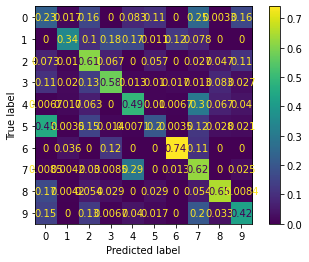

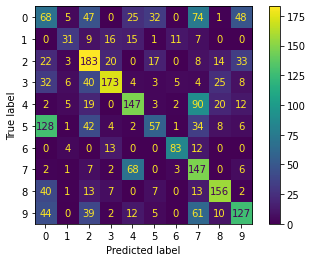

In [10]:
# Confusion matrix (eval)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, normalize="true")  
plt.show()  
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

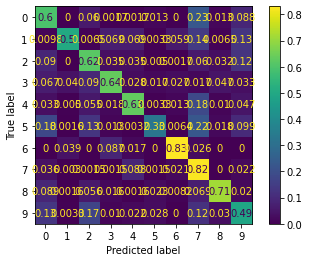

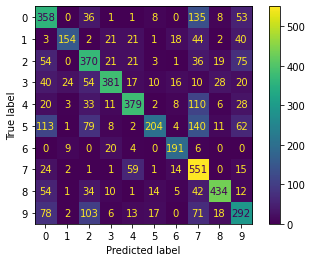

In [11]:
# Confusion matrix (train)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_train, y_train, normalize="true")  
plt.show()  
plot_confusion_matrix(clf, X_train, y_train)  
plt.show()  

## Hyperparameters' Analysis 

In [5]:
# GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm

model = svm.SVC()
kernel = ['poly', 'rbf']
C = [15, 10, 1.0]
gamma = ['scale']

grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted', verbose=10)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print(f"Best:{grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

Fitting 9 folds for each of 6 candidates, totalling 54 fits
Best:0.7265144538268293 using {'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}
0.6052767929937852 (0.018652911759766144) with: {'C': 15, 'gamma': 'scale', 'kernel': 'poly'}
0.7265144538268293 (0.011955270298873447) with: {'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}
0.5884914619558432 (0.018696433910685855) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.7110911982919221 (0.01758313481643762) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.4634074680240176 (0.024761917135725092) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.5265115581127123 (0.018206870765803802) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [8]:
# The best model according to F1-score
from datetime import datetime
print("pred_train")
now = datetime.now()
dt_string = now.strftime("%H:%M:%S")
print("and time =", dt_string)	
pred_train = grid_search.predict(X_train)
print("pred_test")
now = datetime.now()
dt_string = now.strftime("%H:%M:%S")
print("and time =", dt_string)	
pred_test = grid_search.predict(X_test)

pred_train
and time = 14:52:30
pred_test
and time = 14:53:44


In [9]:
# F1-score (train/eval)
from sklearn.metrics import f1_score
print("TRAIN")
print("micro_f1 =", f1_score(y_train, pred_train, average='micro'))
print("weighted_f1 =", f1_score(y_train, pred_train, average='weighted'))
print("class_f1 =", f1_score(y_train, pred_train, average=None))

print()
print("TEST")
print("micro_f1 =", f1_score(y_test, pred_test, average='micro'))
print("weighted_f1 =", f1_score(y_test, pred_test, average='weighted'))
print("class_f1 =", f1_score(y_test, pred_test, average=None))

TRAIN
micro_f1 = 0.85409383624655
weighted_f1 = 0.8544893172878992
class_f1 = [0.78721746 0.89597315 0.78174274 0.89105403 0.89401709 0.85831286
 0.95896328 0.86556927 0.93677205 0.75765529]

TEST
micro_f1 = 0.5410569105691057
weighted_f1 = 0.5337602717352155
class_f1 = [0.22689076 0.65217391 0.54654655 0.71833648 0.52159468 0.41762452
 0.85581395 0.54337152 0.67822736 0.48657718]


In [10]:
# Classification report (train/eval)
from sklearn.metrics import classification_report
print("TRAIN")
print(classification_report(y_train, pred_train, labels=[i for i in range(10)]))

print()
print("TEST")
print(classification_report(y_test, pred_test, labels=[i for i in range(10)]))

TRAIN
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       600
           1       0.92      0.87      0.90       306
           2       0.78      0.79      0.78       600
           3       0.95      0.84      0.89       600
           4       0.92      0.87      0.89       600
           5       0.88      0.84      0.86       624
           6       0.95      0.97      0.96       230
           7       0.80      0.94      0.87       668
           8       0.95      0.93      0.94       607
           9       0.80      0.72      0.76       600

    accuracy                           0.85      5435
   macro avg       0.87      0.86      0.86      5435
weighted avg       0.86      0.85      0.85      5435


TEST
              precision    recall  f1-score   support

           0       0.31      0.18      0.23       300
           1       0.64      0.67      0.65        90
           2       0.50      0.61      0.55       300
           3

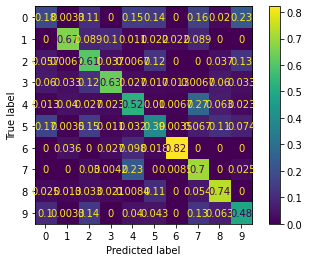

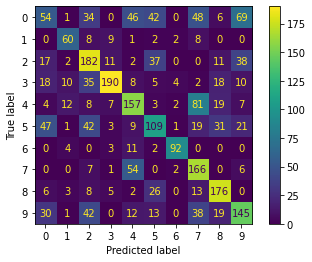

In [11]:
# Confusion matrix (eval)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid_search, X_test, y_test, normalize="true")  
plt.show()  
plot_confusion_matrix(grid_search, X_test, y_test)  
plt.show()  

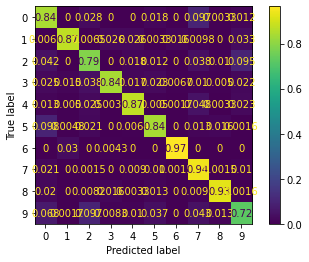

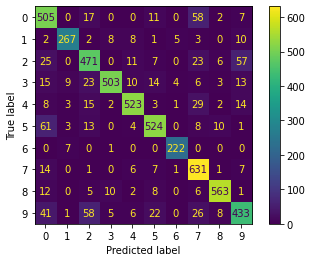

In [12]:
# Confusion matrix (train)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid_search, X_train, y_train, normalize="true")  
plt.show()  
plot_confusion_matrix(grid_search, X_train, y_train)  
plt.show()  